In [14]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import torch
import torch.nn as nn	# 各种层类型的实现
import torch.nn.functional as F	# 各中层函数的实现，与层类型对应，如：卷积函数、池化函数、归一化函数等等
import torch.optim as optim	# 实现各种优化算法的包
from torchvision import datasets, transforms
import numpy as np

import argparse
import sys


import numpy as np
from numpy.random import permutation
import matplotlib.pyplot as plt
from grid_data import GridData

from compute_mpe import CircuitMPE
import sys
sys.path.insert(0,'/root/gurobi903/linux64/lib/python3.6_utf32/gurobipy')
import gurobipy
cmpe = CircuitMPE('/root/PySDD/notebooks/syn200.vtree', '/root/PySDD/notebooks/syn200.sdd')
class para:
    def __init__(self):
        self.batch_size=16
        self.wmc=10
        self.solDim=200
        self.card=10
        self.test_batch_size=1000
        self.epochs=10
        self.lr=0.1
        self.momentum=0.5
        self.no_cuda='store_true'
        self.seed=1
        self.log_interval=10
        self.hidden_dim=10
args=para()
legalList={0: [24, 78], 1: [3, 29, 59, 83, 116], 2: [], 3: [1, 43, 64, 83, 90, 161], 4: [], 5: [], 6: [25, 151], 7: [12, 16, 19, 29, 36, 79, 118, 136, 166], 8: [], 9: [26, 30, 64], 10: [79, 109, 138, 181], 11: [], 12: [7, 17, 29, 31, 36, 79], 13: [197], 14: [], 15: [133, 148], 16: [7, 32], 17: [12, 31, 36, 82, 119], 18: [29, 182], 19: [7, 24, 36, 71, 85, 140, 183], 20: [29], 21: [46, 173, 193], 22: [], 23: [], 24: [0, 19, 30, 64], 25: [6, 54, 151], 26: [9, 40, 59, 64, 111, 145], 27: [69, 106], 28: [115], 29: [1, 7, 12, 18, 20, 43, 59, 83, 116, 136, 182, 185], 30: [9, 24, 156], 31: [12, 17, 164], 32: [16, 40, 64], 33: [94], 34: [], 35: [], 36: [7, 12, 17, 19, 82, 136], 37: [108, 124], 38: [121], 39: [], 40: [26, 32, 146], 41: [96], 42: [177], 43: [3, 29, 48, 83, 104, 128, 136, 182, 185], 44: [180], 45: [131, 137], 46: [21, 148, 178, 193], 47: [], 48: [43, 67, 104, 135], 49: [], 50: [], 51: [], 52: [], 53: [151], 54: [25, 136], 55: [129], 56: [137, 186], 57: [148], 58: [], 59: [1, 26, 29, 120, 185], 60: [143], 61: [], 62: [], 63: [67, 115, 155], 64: [3, 9, 24, 26, 32, 71], 65: [93, 97, 194], 66: [], 67: [48, 63, 135, 155], 68: [126], 69: [27], 70: [], 71: [19, 64, 156, 183], 72: [106, 123, 144, 194], 73: [94, 180, 196], 74: [], 75: [125], 76: [102], 77: [196], 78: [0, 127], 79: [7, 10, 12, 103], 80: [], 81: [125, 140], 82: [17, 36, 106, 112, 129], 83: [1, 3, 29, 43, 108, 116, 151, 182], 84: [89, 92, 157], 85: [19, 147, 195], 86: [117], 87: [111], 88: [158], 89: [84, 166], 90: [3], 91: [95], 92: [84, 149, 157], 93: [65], 94: [33, 73], 95: [91, 155], 96: [41], 97: [65, 100, 112, 123, 195], 98: [], 99: [], 100: [97, 101], 101: [100], 102: [76, 141], 103: [79, 122, 199], 104: [43, 48], 105: [], 106: [27, 72, 82, 123, 157, 188, 194], 107: [171], 108: [37, 83, 117], 109: [10, 181], 110: [146], 111: [26, 87, 130], 112: [82, 97, 145], 113: [145], 114: [], 115: [28, 63], 116: [1, 29, 83, 117], 117: [86, 108, 116], 118: [7, 122, 162, 167, 182], 119: [17, 122, 172], 120: [59], 121: [38, 130], 122: [103, 118, 119, 199], 123: [72, 97, 106, 129, 144, 157, 173, 194], 124: [37, 184, 187], 125: [75, 81, 140, 141, 154], 126: [68], 127: [78], 128: [43], 129: [55, 82, 123, 170, 194], 130: [111, 121], 131: [45], 132: [161], 133: [15, 155], 134: [195], 135: [48, 67, 155], 136: [7, 29, 36, 43, 54, 153], 137: [45, 56, 182], 138: [10], 139: [], 140: [19, 81, 125, 179, 183], 141: [102, 125], 142: [], 143: [60], 144: [72, 123, 194], 145: [26, 112, 113, 155], 146: [40, 110], 147: [85, 195], 148: [15, 46, 57, 188, 193], 149: [92, 157], 150: [189], 151: [6, 25, 53, 83, 159], 152: [], 153: [136, 155, 185], 154: [125, 183], 155: [63, 67, 95, 133, 135, 145, 153, 158, 178], 156: [30, 71], 157: [84, 92, 106, 123, 149], 158: [88, 155], 159: [151], 160: [193], 161: [3, 132], 162: [118, 167], 163: [], 164: [31], 165: [], 166: [7, 89], 167: [118, 162], 168: [], 169: [], 170: [129], 171: [107], 172: [119], 173: [21, 123], 174: [], 175: [], 176: [], 177: [42], 178: [46, 155], 179: [140], 180: [44, 73, 194, 196], 181: [10, 109], 182: [18, 29, 43, 83, 118, 137], 183: [19, 71, 140, 154], 184: [124], 185: [29, 43, 59, 153], 186: [56], 187: [124], 188: [106, 148], 189: [150], 190: [], 191: [], 192: [], 193: [21, 46, 148, 160], 194: [65, 72, 106, 123, 129, 144, 180, 195], 195: [85, 97, 134, 147, 194, 198], 196: [73, 77, 180], 197: [13], 198: [195], 199: [103, 122]}

def checkFea(x):
    cnt=0
    cntT=0
    for i in range(len(legalList.keys())):
        for j in legalList[i]:
            cntT+=1
            if x[j]+x[i]>1:
                cnt+=1
    return cnt/cntT/2+abs(x.sum()-args.card)/args.card/2
def CB(alpha,x,M):
    return alpha*np.sqrt(np.dot(np.dot(x.T,np.linalg.inv(M)),x))
def solver(theta,MODEL):

    import gurobipy
    import time
    s=time.time()
    # 创建模型
    variables=[]
    for i in range(args.solDim):
        variables.append(MODEL.addVar(vtype=gurobipy.GRB.BINARY, name='x'+'i'))
    # 更新变量环境
    MODEL.update()

    # 创建目标函数
    MODEL.setObjective(np.array(variables).dot(theta), sense=gurobipy.GRB.MAXIMIZE)

    # 创建约束条件
    cnt=0
    for i in range(args.solDim):
        if len(legalList)>0:
            for j in legalList[i]:
                MODEL.addConstr(-variables[i]-variables[j] >= -1, name=str(cnt))
                cnt+=1
    MODEL.addConstr(sum(variables) == args.card, name=str(cnt))
    f=time.time()
    # 执行最优化
    MODEL.optimize()
    return np.array(MODEL.x)
def solver_quad(Q,MODEL):

    import gurobipy
    import time
    s=time.time()
    # 创建模型
    variables=[]
    for i in range(args.solDim):
        variables.append(MODEL.addVar(vtype=gurobipy.GRB.BINARY, name='x'+'i'))
    # 更新变量环境
    MODEL.update()

    # 创建目标函数
    MODEL.setObjective(np.array(variables).dot(Q).dot(np.array(variables)), sense=gurobipy.GRB.MAXIMIZE)

    # 创建约束条件
    cnt=0
    for i in range(args.solDim):
        if len(legalList)>0:
            for j in legalList[i]:
                MODEL.addConstr(-variables[i]-variables[j] >= -1, name=str(cnt))
                cnt+=1
    MODEL.addConstr(sum(variables) == args.card, name=str(cnt))
    f=time.time()
    # 执行最优化
    
    print('??')
    MODEL.optimize()
    print('??')
    return np.array(MODEL.x)

In [15]:
import numpy as np
import torch.nn as nn
import torch.nn.functional as F

def inv_sherman_morrison(u, A_inv):
    """Inverse of a matrix with rank 1 update.
    """
    Au = np.dot(A_inv, u)
    A_inv -= np.outer(Au, Au)/(1+np.dot(u.T, Au))
    return A_inv

class Model(nn.Module):
    """Template for fully connected neural network for scalar approximation.
    """
    def __init__(self, 
                 input_size=1, 
                 hidden_size=2,
                 n_layers=1,
                 activation='ReLU',
                 p=0.0,
                ):
        super(Model, self).__init__()
        
        self.n_layers = n_layers
        
        if self.n_layers == 1:
            self.layers = [nn.Linear(input_size, 1)]
        else:
            size  = [input_size] + [hidden_size,] * (self.n_layers-1) + [1]
            self.layers = [nn.Linear(size[i], size[i+1]) for i in range(self.n_layers)]
        self.layers = nn.ModuleList(self.layers)
        
        # dropout layer
        self.dropout = nn.Dropout(p=p)
        
        # activation function
        if activation == 'sigmoid':
            self.activation = nn.Sigmoid()
        elif activation == 'ReLU':
            self.activation = nn.ReLU()
        elif activation == 'LeakyReLU':
            self.activation = nn.LeakyReLU(negative_slope=0.1)
        else:
            raise Exception('{} not an available activation'.format(activation))
            
    def forward(self, x):
        for i in range(self.n_layers-1):
            x = self.dropout(self.activation(self.layers[i](x)))
        x = self.layers[-1](x)
        return x


In [16]:
import numpy as np
import abc
from tqdm import tqdm

class UCB(abc.ABC):
    """Base class for UBC methods.
    """
    def __init__(self,
                 bandit,
                 reg_factor=1.0,
                 confidence_scaling_factor=-1.0,
                 delta=0.1,
                 train_every=1,
                 throttle=int(1e2),
                ):
        # bandit object, contains features and generated rewards
        self.bandit = bandit
        # L2 regularization strength
        self.reg_factor = reg_factor
        # Confidence bound with probability 1-delta
        self.delta = delta
        # multiplier for the confidence bound (default is bandit reward noise std dev)
        if confidence_scaling_factor == -1.0:
            confidence_scaling_factor = bandit.noise_std
        self.confidence_scaling_factor = confidence_scaling_factor
        
        # train approximator only every few rounds
        self.train_every = train_every
        self.best_recommended_reward =-200
        self.best_recommended_action =np.array([1]*args.card+[0]*(self.bandit.n_features-args.card))
        self.rewards_list=[]
        self.best_sample_rewards_list=[]
        self.feasi=[]
        # throttle tqdm updates
        self.throttle = throttle
        self.solverSol=None
        self.reset()
        
    def reset_upper_confidence_bounds(self):
        """Initialize upper confidence bounds and related quantities.
        """
        self.exploration_bonus = np.empty((self.bandit.T, self.bandit.n_arms))
        self.mu_hat = np.empty((self.bandit.T, self.bandit.n_arms)) 
        self.meta_mu_hat = np.empty(( self.bandit.n_features)) 
        self.cross_mu_hat = np.empty(( self.bandit.n_features**2)) 
        self.upper_confidence_bounds = np.ones((self.bandit.T, self.bandit.n_arms))
        self.meta_values= np.ones((self.bandit.n_features))
        self.cross_values= np.ones((self.bandit.n_features**2))
        self.knn_metabest=-100
        self.best_rewards_oracle=-100
    def reset_regrets(self):
        """Initialize regrets.
        """
        self.regrets = np.empty(self.bandit.T)

    def reset_actions(self):
        """Initialize cache of actions.
        """
        self.actions = np.empty(self.bandit.T).astype('int')
    
    def reset_A_inv(self):
        """Initialize n_arms square matrices representing the inverses
        of exploration bonus matrices.
        """
        self.A_inv = np.array(
            [
                np.eye(self.approximator_dim)/self.reg_factor for _ in self.bandit.arms
            ]
        )
    def reset_grad_approx(self):
        """Initialize the gradient of the approximator w.r.t its parameters.
        """
        self.grad_approx = np.zeros((self.bandit.n_arms, self.approximator_dim))

    def sample_action(self):
        """Return the action to play based on current estimates
        """
        if self.iteration>=max(self.bandit.n_features*4,200):
            return np.argmax(self.upper_confidence_bounds[self.iteration]).astype('int')
        else:
            return np.random.choice(self.bandit.n_arms)
    @abc.abstractmethod
    def reset(self):
        """Initialize variables of interest.
        To be defined in children classes.
        """
        pass

    @property
    @abc.abstractmethod
    def approximator_dim(self):
        """Number of parameters used in the approximator.
        """
        pass
    
    @property
    @abc.abstractmethod
    def confidence_multiplier(self):
        """Multiplier for the confidence exploration bonus.
        To be defined in children classes.
        """
        pass
    
    @abc.abstractmethod
    def update_confidence_bounds(self):
        """Update the confidence bounds for all arms at time t.
        To be defined in children classes.
        """
        pass

    @abc.abstractmethod
    def update_output_gradient(self):
        """Compute output gradient of the approximator w.r.t its parameters.
        """
        pass
    
    @abc.abstractmethod
    def train(self):
        """Update approximator.
        To be defined in children classes.
        """
        pass
    
    @abc.abstractmethod
    def predict(self):
        """Predict rewards based on an approximator.
        To be defined in children classes.
        """
        pass

    def update_confidence_bounds(self):
        """Update confidence bounds and related quantities for all arms.
        """
        
        if self.iteration>max(self.bandit.n_features*4,200):#self.bandit.n_features:
            self.bandit.features[self.iteration][2]=self.best_recommended_action
            self.bandit.features[self.iteration][0]=self.solverSol
            self.bandit.features[self.iteration][1]=self.solverSol_quad
            for j in range(3,self.bandit.n_arms//3):
                tmp=[np.random.beta(min(1-0.1,max(0.1,mm)),1-min(1-0.1,max(0.1,mm))) for mm in self.solverSol]#[self.meta_values[i]+2*np.sqrt(np.log(self.iteration+1)/self.cnt[i]/self.iteration) for i in range(self.bandit.n_features)]
                tmp2=sorted(tmp)[-args.card:] 
                self.bandit.features[self.iteration][j]= np.divide(np.array([1 if tmp[i] in tmp2 else 0 for i in range(self.bandit.n_features)]),np.sqrt(args.card))
            for j in range(n_arms//3,self.bandit.n_arms//2):
                tmp=[np.random.beta(min(1-0.1,max(0.1,mm)),1-min(1-0.1,max(0.1,mm))) for mm in self.solverSol_quad]#[self.meta_values[i]+2*np.sqrt(np.log(self.iteration+1)/self.cnt[i]/self.iteration) for i in range(self.bandit.n_features)]
                tmp2=sorted(tmp)[-args.card:] 
                self.bandit.features[self.iteration][j]= np.divide(np.array([1 if tmp[i] in tmp2 else 0 for i in range(self.bandit.n_features)]),np.sqrt(args.card))
            for j in range(n_arms//2,2*self.bandit.n_arms//3):
                tmp=self.bandit.features[self.iteration][j]+np.random.random()*(self.best_recommended_action-self.bandit.features[self.iteration][j])
                if self.model.forward(torch.FloatTensor(self.bandit.features[self.iteration][j]).to(self.device)).detach().squeeze()<self.model.forward(torch.FloatTensor(tmp).to(self.device)).detach().squeeze():
                    tmp2=sorted(tmp)[-args.card:] 
                    self.bandit.features[self.iteration][j]= np.divide(np.array([1 if tmp[i] in tmp2 else 0 for i in range(self.bandit.n_features)]),np.sqrt(args.card))
            if np.random.random()>0.4:
                a=np.random.choice(self.bandit.n_arms)
                b=np.random.choice(self.bandit.n_arms)
                if a!=b:
                    if  self.model.forward(torch.FloatTensor(self.bandit.features[self.iteration][a]).to(self.device)).detach().squeeze()>self.model.forward(torch.FloatTensor(self.bandit.features[self.iteration][b]).to(self.device)).detach().squeeze():
                        tmp=self.bandit.features[self.iteration][b]+np.random.random()*(a-b)
                        tmp2=sorted(tmp)[-args.card:] 
                        self.bandit.features[self.iteration][b]= np.divide(np.array([1 if tmp[i] in tmp2 else 0 for i in range(self.bandit.n_features)]),np.sqrt(args.card))

        self.update_output_gradient()
        # UCB exploration bonus
        self.exploration_bonus[self.iteration] = np.array(
            [
                500000*constraint(self.bandit.features[self.iteration][a])+self.confidence_multiplier * np.sqrt(np.dot(self.grad_approx[a], np.dot(self.A_inv[a], self.grad_approx[a].T))) for a in self.bandit.arms
            ]
        ) #500000*constraint(self.bandit.features[self.iteration][a])+
        # update reward prediction mu_hat
        self.predict()
        self.bandit.rewards[self.iteration]=np.array([self.bandit.h(self.bandit.features[self.iteration, k],self.iteration) + self.bandit.noise_std*np.random.randn() for k in range(self.bandit.n_arms)])
        self.bandit.rewards2[self.iteration]=np.array([self.bandit.hwithoutconstraints(self.bandit.features[self.iteration, k]) + self.bandit.noise_std*np.random.randn() for k in range(self.bandit.n_arms)])

        # estimated combined bound for reward
        self.meta_values=self.meta_mu_hat# + self.meta_exploration_bonus[self.iteration] 
        if self.iteration>=max(self.bandit.n_features*4,200):
            self.cross_values=self.cross_mu_hat
            for i in range(self.bandit.n_features):
                for j in range(self.bandit.n_features):
                    if i==j:
                        self.cross_values[i*self.bandit.n_features+j]=self.meta_mu_hat[i]
                    else:
                        self.cross_values[i*self.bandit.n_features+j]=(self.cross_mu_hat[i*self.bandit.n_features+j]-self.meta_mu_hat[i]-self.meta_mu_hat[j])/2
            self.cross_values=self.cross_values.reshape(self.bandit.n_features,self.bandit.n_features)
        with gurobipy.Env(empty=True) as env:
            env.setParam('OutputFlag', 0)
            env.setParam('IterationLimit',600)
            env.start()
            with gurobipy.Model(env=env) as m:
                self.solverSol=np.divide(solver(self.meta_values,m),np.sqrt(args.card))
        if self.iteration>=max(self.bandit.n_features*4,200):
            with gurobipy.Env(empty=True) as env:
                env.setParam('OutputFlag', 0)
                env.setParam('IterationLimit',600)
                env.start()
                with gurobipy.Model(env=env) as m:
                    self.solverSol_quad=np.divide(solver_quad(self.cross_values,m),np.sqrt(args.card))
                    print('solverSol_quad',self.bandit.hwithoutconstraints(self.solverSol_quad))
        tmp=sorted(self.meta_values )[-args.card:]   #后面记得加/改一下探索项！！！
        self.meta_values = np.array([1 if self.meta_values[i] in tmp else 0 for i in range(self.bandit.n_features)])
        if len(np.argwhere(self.meta_values==1)):
            metabest=np.argwhere(self.meta_values==1)[:args.card].reshape(args.card)
        else:
            metabest=list(range(self.bandit.n_features))
            np.random.shuffle(metabest)
            metabest=np.array(metabest[:args.card])
        knn_metabest={}
        import copy
        for i in range(10):
            tmp=metabest.copy()
            tmp[np.random.choice(range(args.card))]=np.random.choice(range(self.bandit.n_features))
            tmp=np.divide(np.array([1 if i in tmp else 0 for i in range(self.bandit.n_features)]),np.sqrt(args.card))
            tmpvalue=self.model.forward(
                    torch.FloatTensor(tmp).to(self.device)
                ).detach().squeeze()
            knn_metabest[tmpvalue]=tmp
        
        self.meta_values=np.divide(self.meta_values,np.sqrt(args.card))
        self.upper_confidence_bounds[self.iteration] = self.mu_hat[self.iteration] + self.exploration_bonus[self.iteration]
        self.knn_metabest=knn_metabest[max(knn_metabest.keys())]
        self.bandit.knn_metabestValue =self.bandit.h(self.knn_metabest,self.iteration)
        self.bandit.best_rewards_oracle =max( max(np.max(self.bandit.rewards, axis=1)),self.bandit.knn_metabestValue)
        self.best_rewards_oracle=max(max(self.best_rewards_oracle,self.bandit.best_rewards_oracle),self.bandit.hwithoutconstraints(self.knn_metabest))
        print('----------------',self.best_rewards_oracle,self.bandit.hwithoutconstraints(self.knn_metabest),checkFea(torch.from_numpy(self.knn_metabest)*np.sqrt(args.card)),self.bandit.hwithoutconstraints(self.solverSol),checkFea(np.sqrt(args.card)*torch.from_numpy(self.solverSol)))
    def update_A_inv(self):
        self.A_inv[self.action] = inv_sherman_morrison(
            self.grad_approx[self.action],
            self.A_inv[self.action]
        )
    def run(self):
        """Run an episode of bandit.
        """
        postfix = {
            'total regret': 0.0,
            '% optimal arm': 0.0,
        }
        with tqdm(total=self.bandit.T, postfix=postfix) as pbar:
            for t in range(self.bandit.T):
                # update confidence of all arms based on observed features at time t
                self.update_confidence_bounds()
                # pick action with the highest boosted estimated reward
                self.action = self.sample_action()
                self.actions[t] = self.action
                # update approximator
                if t % self.train_every == 0:
                    self.train()
                # update exploration indicator A_inv
                self.update_A_inv()
                # compute regret
                
                #print(t,self.action,self.bandit.best_rewards_oracle[t],self.bandit.rewards[t, self.action])
                print('hhhhh',self.bandit.hwithoutconstraints(self.bandit.features[self.iteration][self.action]),np.sqrt(args.card)*sum(self.bandit.features[self.iteration][self.action]),checkFea(torch.from_numpy(self.bandit.features[self.iteration][self.action])*np.sqrt(args.card)))
                self.regrets[t] = self.best_rewards_oracle-self.bandit.h(self.bandit.features[self.iteration][self.action],self.iteration)
                if self.best_recommended_reward<self.bandit.h(self.bandit.features[self.iteration][self.action],self.iteration):
                    self.best_recommended_reward=self.bandit.h(self.bandit.features[self.iteration][self.action],self.iteration)
                    self.best_recommended_action=self.bandit.features[self.iteration][self.action]
                self.best_sample_rewards_list.append( self.best_rewards_oracle)
                self.rewards_list.append(self.bandit.hwithoutconstraints(self.bandit.features[self.iteration][self.action]))
                self.feasi.append(checkFea(self.bandit.features[self.iteration][self.action]*np.sqrt(args.card)))
                # increment counter
                self.iteration += 1
                
                # log
                postfix['total regret'] += self.regrets[t]
                n_optimal_arm = np.sum(
                    self.actions[:self.iteration]==self.bandit.best_actions_oracle[:self.iteration]
                )
                postfix['% optimal arm'] = '{:.2%}'.format(n_optimal_arm / self.iteration)
                
                if t % self.throttle == 0:
                    pbar.set_postfix(postfix)
                    pbar.update(self.throttle)


In [17]:
import numpy as np
import itertools


class ContextualBandit():
    def __init__(self,
                 T,
                 n_arms,
                 n_features,
                 h,
                 hwithoutconstraints,
                 noise_std=1.0,
                ):
        # number of rounds
        self.T = T
        # number of arms
        self.n_arms = n_arms
        # number of features for each arm
        self.n_features = n_features
        # average reward function
        # h : R^d -> R
        self.h = h
        self.hwithoutconstraints=hwithoutconstraints
        self.knn_metabestValue=-100
        self.best_rewards_oracle = -100
        # standard deviation of Gaussian reward noise
        self.noise_std = noise_std
        # generate random features
        print('44-------------')
        self.reset()

    @property
    def arms(self):
        """Return [0, ...,n_arms-1]
        """
        return range(self.n_arms)
        
    def reset(self):
        """Generate new features and new rewards.
        """
        print('55-------------')
        self.reset_features()
        print('66-------------')
        self.reset_rewards()
        
    def reset_features(self):
        """Generate normalized random N(0,1) features.
        """
        x1,x2=[],[]
        for i in range(self.T):
            tmp1,tmp2=[],[]
            for j in range(self.n_arms):
                a=np.array([0]*(self.n_features-args.card)+[1]*args.card)
                np.random.shuffle(a)
                a=np.divide(a,np.sqrt(args.card))
                tmp1.append(a)
            for j in range(self.n_features):
                a=np.array([0.0]*j+[1.0]+[0.0]*(self.n_features-j-1))
                tmp2.append(a)
            x1.append(tmp1)
            x2.append(tmp2)
        x1,x2=np.array(x1),np.array(x2)
        #x /= np.repeat(np.linalg.norm(x, axis=-1, ord=2), self.n_features).reshape(self.T, self.n_arms, self.n_features)
        self.features = x1
        self.meta_features=x2
        self.cross_features=[]
        for i in range(self.n_features):
            for j in range(self.n_features):
                tmp=np.zeros(self.n_features)
                tmp[i]=1
                tmp[j]=1
                self.cross_features.append(tmp)
                
    def reset_rewards(self):
        """Generate rewards for each arm and each round,
        following the reward function h + Gaussian noise.
        """
        
        self.rewards = np.random.random([self.T, self.n_arms])
        self.rewards2 = np.random.random([self.T, self.n_arms])
        
        # to be used only to compute regret, NOT by the algorithm itself
        self.best_rewards_oracle =max( max(np.max(self.rewards, axis=1)),self.knn_metabestValue)
        self.best_actions_oracle = np.argmax(self.rewards, axis=1)


In [18]:
import numpy as np
import torch
import torch.nn as nn

class NeuralUCB(UCB):
    """Neural UCB.
    """
    def __init__(self,
                 bandit,
                 hidden_size=20,
                 n_layers=2,
                 reg_factor=1.0,
                 delta=0.01,
                 confidence_scaling_factor=-1.0,
                 training_window=100,
                 p=0.0,
                 learning_rate=0.01,
                 epochs=1,
                 train_every=1,
                 throttle=1,
                 use_cuda=False,
                ):

        # hidden size of the NN layers
        self.hidden_size = hidden_size
        # number of layers
        self.n_layers = n_layers
        
        # number of rewards in the training buffer
        self.training_window = training_window
        
        # NN parameters
        self.learning_rate = learning_rate
        self.epochs = epochs
        
        self.use_cuda = use_cuda
        if self.use_cuda:
            raise Exception(
                'Not yet CUDA compatible : TODO for later (not necessary to obtain good results')
        self.device = torch.device('cuda' if torch.cuda.is_available() and self.use_cuda else 'cpu')
    
        # dropout rate
        self.p = p

        # neural network
        self.model = Model(input_size=bandit.n_features, 
                           hidden_size=self.hidden_size,
                           n_layers=self.n_layers,
                           p=self.p
                          ).to(self.device)
        self.model2 = Model(input_size=bandit.n_features, 
                           hidden_size=self.hidden_size,
                           n_layers=self.n_layers,
                           p=self.p
                          ).to(self.device)
        self.optimizer = torch.optim.Adam(self.model.parameters(), lr=self.learning_rate)
        self.optimizer2 = torch.optim.Adam(self.model2.parameters(), lr=self.learning_rate)

        super().__init__(bandit, 
                         reg_factor=reg_factor,
                         confidence_scaling_factor=confidence_scaling_factor,
                         delta=delta,
                         throttle=throttle,
                         train_every=train_every,
                        )

    @property
    def approximator_dim(self):
        """Sum of the dimensions of all trainable layers in the network.
        """
        return sum(w.numel() for w in self.model.parameters() if w.requires_grad)
    
    @property
    def confidence_multiplier(self):
        """Constant equal to confidence_scaling_factor
        """
        return self.confidence_scaling_factor
    
    def update_output_gradient(self):
        """Get gradient of network prediction w.r.t network weights.
        """
        for a in self.bandit.arms:
            x = torch.FloatTensor(
                self.bandit.features[self.iteration, a].reshape(1,-1)
            ).to(self.device)
            
            self.model.zero_grad()
            y = self.model(x)
            y.backward()
            
            self.grad_approx[a] = torch.cat(
                [w.grad.detach().flatten() / np.sqrt(self.hidden_size) for w in self.model.parameters() if w.requires_grad]
            ).to(self.device)
        for a in range(self.bandit.n_features):
            x = torch.FloatTensor(
                self.bandit.meta_features[self.iteration, a].reshape(1,-1)
            ).to(self.device)
            
            self.model.zero_grad()
            y = self.model(x)
            y.backward()
        for a in self.bandit.arms:
            x = torch.FloatTensor(
                self.bandit.features[self.iteration, a].reshape(1,-1)
            ).to(self.device)
            
            self.model2.zero_grad()
            y = self.model2(x)
            y.backward()

        for a in range(self.bandit.n_features):
            x = torch.FloatTensor(
                self.bandit.meta_features[self.iteration, a].reshape(1,-1)
            ).to(self.device)
            
            self.model2.zero_grad()
            y = self.model2(x)
            y.backward()
            
    def reset(self):
        """Reset the internal estimates.
        """
        self.reset_upper_confidence_bounds()
        self.reset_regrets()
        self.reset_actions()
        self.reset_A_inv()
        self.reset_grad_approx()
        self.iteration = 0

    def train(self):
        """Train neural approximator.
        """
        iterations_so_far = range(np.max([0, self.iteration-self.training_window]), self.iteration+1)
        actions_so_far = self.actions[np.max([0, self.iteration-self.training_window]):self.iteration+1]

        x_train = torch.FloatTensor(self.bandit.features[iterations_so_far, actions_so_far]).to(self.device)
        y_train = torch.FloatTensor(self.bandit.rewards[iterations_so_far, actions_so_far]).squeeze().to(self.device)
        y_train2 = torch.FloatTensor(self.bandit.rewards2[iterations_so_far, actions_so_far]).squeeze().to(self.device)
        
        # train mode
        self.model.train()
        for _ in range(self.epochs):
            y_pred = self.model.forward(x_train).squeeze()
            loss = nn.MSELoss()(y_train2, y_pred)
            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()
        self.model2.train()
        for _ in range(self.epochs):
            y_pred = self.model2.forward(x_train).squeeze()
            loss = nn.MSELoss()(y_train2, y_pred)
            self.optimizer2.zero_grad()
            loss.backward()
            self.optimizer2.step()
        
        
    def predict(self):
        """Predict reward.
        """
        # eval mode
        self.model.eval()
        self.mu_hat[self.iteration] = self.model.forward(
            torch.FloatTensor(self.bandit.features[self.iteration]).to(self.device)
        ).detach().squeeze()
        self.meta_mu_hat = self.model2.forward(
            torch.FloatTensor(self.bandit.meta_features[self.iteration]).to(self.device)
        ).detach().squeeze()
        if self.iteration>=max(self.bandit.n_features*4,200):
            self.cross_mu_hat= self.model2.forward(
                torch.FloatTensor(self.bandit.cross_features).to(self.device)
            ).detach().squeeze()

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [20]:
T = int(12e2)
n_arms =40
n_features = 200
noise_std = 0.1

confidence_scaling_factor = noise_std

n_sim = 1

p = 0.2
hidden_size = 4#16
epochs = 100#100
train_every = 10#10
confidence_scaling_factor = 1.0
use_cuda = False

In [21]:
### mean reward function

a = np.random.random(200) #  np.load('rateListUsersYahoo.npy')[0]
a /= np.linalg.norm(a, ord=2)
Q=np.random.random([200,200]) #np.load('Q.npy')#Q=np.random.random([n_features,n_features])+100*np.diag(np.ones(n_features))
#h = lambda x:   100*a.dot(Q).dot(a)   #min(100*(np.dot(a, x)**(5)),10000)
#100*a.dot(Q).dot(a)
def h(x,iteration):
    yu=torch.unbind(torch.from_numpy(x))
    xu = torch.unbind(torch.from_numpy(np.array([0.02]*n_features).astype(np.float32)))
    wmc = cmpe.get_torch_ac([[1.0 - ny,ny] for ny in yu + xu]) 
    return  50000*(1/(1+np.exp(-iteration))-0.5)*torch.log(torch.mean(wmc)).float()+100*(x.dot(a))**3 
def constraint(x):
    yu=torch.unbind(torch.from_numpy(x))
    xu = torch.unbind(torch.from_numpy(np.array([0.02]*n_features).astype(np.float32)))
    wmc = cmpe.get_torch_ac([[1.0 - ny,ny] for ny in yu + xu]) 
    return  50000*torch.log(torch.mean(wmc)).float()
hwithoutconstraints = lambda x:100*(x.dot(a))**3    #100*(x.dot(a))**3  、100*x.dot(Q).dot(x)

In [22]:
with gurobipy.Env(empty=True) as env:
        env.setParam('OutputFlag', 0)
        env.setParam('IterationLimit',600)
        env.start()
        with gurobipy.Model(env=env) as m:
            action=solver(a,m)
hwithoutconstraints(action)/(np.sqrt(args.card))**3

4.958818076828772

In [23]:
with gurobipy.Env(empty=True) as env:
        env.setParam('OutputFlag', 0)
        env.setParam('IterationLimit',600)
        env.start()
        with gurobipy.Model(env=env) as m:
            action2=solver_quad(Q,m)
hwithoutconstraints(action2)/10

??
??


0.20369085172473103

In [24]:
bandit = ContextualBandit(T, n_arms, n_features, h,hwithoutconstraints, noise_std=noise_std)

regrets = np.empty((n_sim, T))

for i in range(n_sim):
    bandit.reset_rewards()
    model = NeuralUCB(bandit,
                      hidden_size=hidden_size,
                      reg_factor=1.0,
                      delta=0.1,
                      confidence_scaling_factor=confidence_scaling_factor,
                      training_window=100,
                      p=p,
                      learning_rate=0.01,
                      epochs=epochs,
                      train_every=train_every,
                      use_cuda=use_cuda
                     )
        
    model.run()
    regrets[i] = np.cumsum(model.regrets)

44-------------
55-------------
66-------------


  0%|          | 0/1200 [00:00<?, ?it/s, % optimal arm=0, total regret=0]

---------------- 1.7190463542938232 0.9305975570063185 tensor(0.0022, dtype=torch.float64) 0.42872361195880804 tensor(0., dtype=torch.float64)
hhhhh 0.517079623825912 10.000000000000002 tensor(0.0044, dtype=torch.float64)


  0%|          | 1/1200 [00:13<4:37:04, 13.87s/it, total regret=1.2, % optimal arm=0.00%]

---------------- 2.7021665573120117 1.111882499359935 tensor(0., dtype=torch.float64) 0.7225445992873798 tensor(0., dtype=torch.float64)
hhhhh 0.37152727320397844 10.000000000000002 tensor(0., dtype=torch.float64)


  0%|          | 2/1200 [00:28<4:39:02, 13.98s/it, total regret=3.53, % optimal arm=0.00%]

---------------- 2.7021665573120117 0.4770359089620714 tensor(0., dtype=torch.float64) 0.6589189613055939 tensor(0., dtype=torch.float64)
hhhhh 0.5513516756852488 10.000000000000002 tensor(0., dtype=torch.float64)


  0%|          | 3/1200 [00:42<4:39:37, 14.02s/it, total regret=5.68, % optimal arm=0.00%]

---------------- 2.7021665573120117 0.8589257377369526 tensor(0.0022, dtype=torch.float64) 0.6119886339471503 tensor(0., dtype=torch.float64)
hhhhh 0.39082253323988053 10.000000000000002 tensor(0.0022, dtype=torch.float64)


  0%|          | 4/1200 [00:55<4:35:39, 13.83s/it, total regret=2.39e+3, % optimal arm=0.00%]

---------------- 2.7021665573120117 0.7940232222264335 tensor(0., dtype=torch.float64) 0.8519770389250725 tensor(0., dtype=torch.float64)
hhhhh 1.1045935891503007 10.000000000000002 tensor(0., dtype=torch.float64)


  0%|          | 5/1200 [01:10<4:40:24, 14.08s/it, total regret=2.39e+3, % optimal arm=0.00%]

---------------- 2.7021665573120117 0.7736329208338323 tensor(0.0022, dtype=torch.float64) 0.5713963450315577 tensor(0., dtype=torch.float64)
hhhhh 0.9820095036084809 10.000000000000002 tensor(0.0044, dtype=torch.float64)


  0%|          | 6/1200 [01:24<4:42:21, 14.19s/it, total regret=7.59e+3, % optimal arm=0.00%]

---------------- 2.7021665573120117 1.0770197340982235 tensor(0., dtype=torch.float64) 0.7959322576735003 tensor(0., dtype=torch.float64)
hhhhh 0.7426632593788517 10.000000000000002 tensor(0., dtype=torch.float64)


  1%|          | 7/1200 [01:37<4:36:38, 13.91s/it, total regret=7.59e+3, % optimal arm=0.00%]

---------------- 2.7021665573120117 1.3604107045998297 tensor(0.0022, dtype=torch.float64) 1.373866094477829 tensor(0., dtype=torch.float64)
hhhhh 1.0134644495373306 10.000000000000002 tensor(0.0022, dtype=torch.float64)


  1%|          | 8/1200 [01:52<4:37:32, 13.97s/it, total regret=1.02e+4, % optimal arm=0.00%]

---------------- 2.7021665573120117 1.230996810235532 tensor(0.0022, dtype=torch.float64) 0.7122278206817513 tensor(0., dtype=torch.float64)
hhhhh 0.8047334673617023 10.000000000000002 tensor(0.0022, dtype=torch.float64)


  1%|          | 9/1200 [02:06<4:40:35, 14.14s/it, total regret=1.29e+4, % optimal arm=0.00%]

---------------- 2.7021665573120117 0.8988544366581163 tensor(0.0022, dtype=torch.float64) 0.6136777109632574 tensor(0., dtype=torch.float64)
hhhhh 1.2575189950575505 10.000000000000002 tensor(0., dtype=torch.float64)


  1%|          | 10/1200 [02:19<4:34:40, 13.85s/it, total regret=1.29e+4, % optimal arm=0.00%]

---------------- 2.7021665573120117 0.5679104291782798 tensor(0.0022, dtype=torch.float64) 0.3482661156741565 tensor(0., dtype=torch.float64)
hhhhh 0.6971686143708204 10.000000000000002 tensor(0., dtype=torch.float64)


  1%|          | 11/1200 [02:34<4:38:37, 14.06s/it, total regret=1.29e+4, % optimal arm=0.00%]

---------------- 2.7021665573120117 2.414184632275302 tensor(0., dtype=torch.float64) 1.740236352636858 tensor(0., dtype=torch.float64)
hhhhh 0.8977569750387073 10.000000000000002 tensor(0., dtype=torch.float64)


  1%|          | 12/1200 [02:49<4:44:44, 14.38s/it, total regret=1.29e+4, % optimal arm=0.00%]

---------------- 2.7021665573120117 1.4294992023255857 tensor(0., dtype=torch.float64) 1.578156823213103 tensor(0., dtype=torch.float64)
hhhhh 1.2162011138726332 10.000000000000002 tensor(0., dtype=torch.float64)


  1%|          | 13/1200 [03:04<4:47:27, 14.53s/it, total regret=1.29e+4, % optimal arm=0.00%]

---------------- 2.7021665573120117 1.4735012784817607 tensor(0.0500, dtype=torch.float64) 1.8641425894000025 tensor(0., dtype=torch.float64)
hhhhh 0.8455138311541776 10.000000000000002 tensor(0., dtype=torch.float64)


  1%|          | 14/1200 [03:20<4:55:04, 14.93s/it, total regret=1.29e+4, % optimal arm=0.00%]

---------------- 2.7021665573120117 1.6492207062540225 tensor(0., dtype=torch.float64) 1.684434134165896 tensor(0., dtype=torch.float64)
hhhhh 0.9154414825704927 10.000000000000002 tensor(0., dtype=torch.float64)


  1%|▏         | 15/1200 [03:34<4:53:31, 14.86s/it, total regret=1.29e+4, % optimal arm=0.00%]

---------------- 2.7021665573120117 1.3505748234851493 tensor(0., dtype=torch.float64) 1.3028069726090954 tensor(0., dtype=torch.float64)
hhhhh 0.495191970483355 10.000000000000002 tensor(0., dtype=torch.float64)


  1%|▏         | 16/1200 [03:49<4:49:43, 14.68s/it, total regret=1.29e+4, % optimal arm=0.00%]

---------------- 2.7021665573120117 1.0930472152545117 tensor(0., dtype=torch.float64) 1.5229093652020445 tensor(0., dtype=torch.float64)
hhhhh 0.5109051050536253 10.000000000000002 tensor(0.0022, dtype=torch.float64)


  1%|▏         | 17/1200 [04:03<4:44:44, 14.44s/it, total regret=1.55e+4, % optimal arm=0.00%]

---------------- 2.7021665573120117 1.1424162999794167 tensor(0., dtype=torch.float64) 0.7614040095911421 tensor(0., dtype=torch.float64)
hhhhh 0.37472863530398803 10.000000000000002 tensor(0.0022, dtype=torch.float64)


  2%|▏         | 18/1200 [04:17<4:42:31, 14.34s/it, total regret=1.81e+4, % optimal arm=0.00%]

---------------- 2.7021665573120117 0.7256573898586071 tensor(0., dtype=torch.float64) 0.85336824592677 tensor(0., dtype=torch.float64)
hhhhh 0.3184087526610634 10.000000000000002 tensor(0., dtype=torch.float64)


  2%|▏         | 19/1200 [04:32<4:49:31, 14.71s/it, total regret=1.81e+4, % optimal arm=0.00%]

---------------- 2.7021665573120117 1.1044975835351571 tensor(0., dtype=torch.float64) 1.147522388392407 tensor(0., dtype=torch.float64)
hhhhh 1.386833038288938 10.000000000000002 tensor(0.0022, dtype=torch.float64)


  2%|▏         | 20/1200 [04:46<4:42:08, 14.35s/it, total regret=2.08e+4, % optimal arm=0.00%]

---------------- 2.7021665573120117 1.2643539857141368 tensor(0.0022, dtype=torch.float64) 1.5719111627760844 tensor(0., dtype=torch.float64)
hhhhh 0.9191907281752738 10.000000000000002 tensor(0., dtype=torch.float64)


  2%|▏         | 21/1200 [04:59<4:37:24, 14.12s/it, total regret=2.08e+4, % optimal arm=0.00%]

---------------- 2.7021665573120117 1.7105996890592172 tensor(0.0522, dtype=torch.float64) 2.4721618576757667 tensor(0., dtype=torch.float64)
hhhhh 0.7869981430949562 10.000000000000002 tensor(0., dtype=torch.float64)


  2%|▏         | 22/1200 [05:13<4:36:11, 14.07s/it, total regret=2.08e+4, % optimal arm=0.00%]

---------------- tensor(2.8305) 2.8304957027534394 tensor(0., dtype=torch.float64) 3.0140486370025052 tensor(0., dtype=torch.float64)
hhhhh 0.865122077053891 10.000000000000002 tensor(0., dtype=torch.float64)


  2%|▏         | 23/1200 [05:26<4:29:50, 13.76s/it, total regret=2.08e+4, % optimal arm=0.00%]

---------------- tensor(2.8305) 1.3022314417481564 tensor(0., dtype=torch.float64) 1.343021504366801 tensor(0., dtype=torch.float64)
hhhhh 0.46870569164141695 10.000000000000002 tensor(0., dtype=torch.float64)


  2%|▏         | 24/1200 [05:40<4:29:49, 13.77s/it, total regret=2.08e+4, % optimal arm=0.00%]

---------------- tensor(2.8305) 1.5509532368176195 tensor(0.0022, dtype=torch.float64) 2.008266521670112 tensor(0., dtype=torch.float64)
hhhhh 0.8692681421359757 10.000000000000002 tensor(0., dtype=torch.float64)


  2%|▏         | 25/1200 [05:53<4:27:30, 13.66s/it, total regret=2.08e+4, % optimal arm=0.00%]

---------------- tensor(2.8305) 1.4471769968001142 tensor(0., dtype=torch.float64) 1.1781539085409987 tensor(0., dtype=torch.float64)
hhhhh 0.5442614301828217 10.000000000000002 tensor(0.0022, dtype=torch.float64)


  2%|▏         | 26/1200 [06:07<4:28:48, 13.74s/it, total regret=2.34e+4, % optimal arm=0.00%]

---------------- tensor(2.8305) 1.922856621089124 tensor(0., dtype=torch.float64) 1.3330087391696674 tensor(0., dtype=torch.float64)
hhhhh 1.1984288856660983 10.000000000000002 tensor(0.0022, dtype=torch.float64)


  2%|▏         | 27/1200 [06:21<4:28:43, 13.75s/it, total regret=2.61e+4, % optimal arm=0.00%]

---------------- tensor(2.8305) 1.4261034990098589 tensor(0., dtype=torch.float64) 1.2895618853300077 tensor(0., dtype=torch.float64)
hhhhh 0.5161896738489915 10.000000000000002 tensor(0.0022, dtype=torch.float64)


  2%|▏         | 28/1200 [06:34<4:24:36, 13.55s/it, total regret=2.87e+4, % optimal arm=0.00%]

---------------- tensor(2.8305) 1.8712373481973334 tensor(0., dtype=torch.float64) 1.838237004356367 tensor(0., dtype=torch.float64)
hhhhh 0.0804048798076481 10.000000000000002 tensor(0., dtype=torch.float64)


  2%|▏         | 29/1200 [06:47<4:21:39, 13.41s/it, total regret=2.87e+4, % optimal arm=0.00%]

---------------- tensor(2.8305) 2.2991403930880274 tensor(0.0022, dtype=torch.float64) 2.2892964373442974 tensor(0., dtype=torch.float64)
hhhhh 0.5157982724066618 10.000000000000002 tensor(0.0089, dtype=torch.float64)


  2%|▎         | 30/1200 [07:01<4:21:51, 13.43s/it, total regret=3.81e+4, % optimal arm=0.00%]

---------------- tensor(2.8305) 1.4307252230347256 tensor(0., dtype=torch.float64) 1.2774855825311218 tensor(0., dtype=torch.float64)
hhhhh 0.2557435014916738 10.000000000000002 tensor(0.0022, dtype=torch.float64)


  3%|▎         | 31/1200 [07:15<4:27:09, 13.71s/it, total regret=4.07e+4, % optimal arm=0.00%]

---------------- tensor(2.8305) 1.0658092146539624 tensor(0.0022, dtype=torch.float64) 1.3095184538823796 tensor(0., dtype=torch.float64)
hhhhh 0.9722790385938368 10.000000000000002 tensor(0.0022, dtype=torch.float64)


  3%|▎         | 32/1200 [07:28<4:24:24, 13.58s/it, total regret=4.34e+4, % optimal arm=0.00%]

---------------- tensor(2.8305) 0.8067130335296013 tensor(0.0067, dtype=torch.float64) 0.8584770069729739 tensor(0., dtype=torch.float64)
hhhhh 0.25727935193371937 10.000000000000002 tensor(0., dtype=torch.float64)


  3%|▎         | 33/1200 [07:42<4:24:43, 13.61s/it, total regret=4.34e+4, % optimal arm=0.00%]

---------------- tensor(2.8305) 1.709399131513876 tensor(0., dtype=torch.float64) 1.3307169473408433 tensor(0., dtype=torch.float64)
hhhhh 1.334049391908516 10.000000000000002 tensor(0., dtype=torch.float64)


  3%|▎         | 34/1200 [07:58<4:39:16, 14.37s/it, total regret=4.34e+4, % optimal arm=0.00%]

---------------- tensor(2.8305) 1.994216075074592 tensor(0., dtype=torch.float64) 1.4680756392732057 tensor(0., dtype=torch.float64)
hhhhh 0.797401916109681 10.000000000000002 tensor(0.0022, dtype=torch.float64)


  3%|▎         | 35/1200 [08:12<4:34:13, 14.12s/it, total regret=4.6e+4, % optimal arm=0.00%] 

---------------- tensor(2.8305) 1.8155548782058668 tensor(0.0022, dtype=torch.float64) 1.999033224533978 tensor(0., dtype=torch.float64)
hhhhh 0.7834327130957078 10.000000000000002 tensor(0.0022, dtype=torch.float64)


  3%|▎         | 36/1200 [08:29<4:53:50, 15.15s/it, total regret=4.86e+4, % optimal arm=0.00%]

---------------- tensor(2.8305) 2.17219774457234 tensor(0., dtype=torch.float64) 1.841124287831779 tensor(0., dtype=torch.float64)
hhhhh 0.9976011892148973 10.000000000000002 tensor(0., dtype=torch.float64)


  3%|▎         | 37/1200 [08:43<4:47:03, 14.81s/it, total regret=4.86e+4, % optimal arm=0.00%]

---------------- tensor(2.8305) 1.9011501343677593 tensor(0., dtype=torch.float64) 2.1608472083873425 tensor(0., dtype=torch.float64)
hhhhh 0.7374222877521274 10.000000000000002 tensor(0.0022, dtype=torch.float64)


  3%|▎         | 38/1200 [08:57<4:39:16, 14.42s/it, total regret=5.13e+4, % optimal arm=0.00%]

---------------- tensor(2.8305) 1.1709995778510296 tensor(0., dtype=torch.float64) 0.914785944264441 tensor(0., dtype=torch.float64)
hhhhh 0.1167752313511648 10.000000000000002 tensor(0.0022, dtype=torch.float64)


  3%|▎         | 39/1200 [09:11<4:35:25, 14.23s/it, total regret=5.39e+4, % optimal arm=0.00%]

---------------- tensor(2.8305) 2.2091387156780504 tensor(0., dtype=torch.float64) 1.788419952064587 tensor(0., dtype=torch.float64)
hhhhh 0.4236953512626057 10.000000000000002 tensor(0., dtype=torch.float64)


  3%|▎         | 40/1200 [09:25<4:33:03, 14.12s/it, total regret=5.39e+4, % optimal arm=0.00%]

---------------- tensor(2.8305) 1.7204302957960185 tensor(0., dtype=torch.float64) 1.8548098403992785 tensor(0., dtype=torch.float64)
hhhhh 0.6908250264173085 10.000000000000002 tensor(0.0022, dtype=torch.float64)


  3%|▎         | 41/1200 [09:39<4:35:33, 14.27s/it, total regret=5.66e+4, % optimal arm=0.00%]

---------------- tensor(2.8305) 1.673665062713802 tensor(0.0022, dtype=torch.float64) 1.7267574064517293 tensor(0., dtype=torch.float64)
hhhhh 0.4846103756504906 10.000000000000002 tensor(0., dtype=torch.float64)


  4%|▎         | 42/1200 [09:54<4:35:49, 14.29s/it, total regret=5.66e+4, % optimal arm=0.00%]

---------------- tensor(2.8305) 2.617589260627483 tensor(0.0022, dtype=torch.float64) 2.869831940756697 tensor(0., dtype=torch.float64)
hhhhh 1.499118657117163 10.000000000000002 tensor(0., dtype=torch.float64)


  4%|▎         | 43/1200 [10:07<4:30:56, 14.05s/it, total regret=5.66e+4, % optimal arm=0.00%]

---------------- tensor(2.8305) 1.7037220099393786 tensor(0., dtype=torch.float64) 1.2433423270285382 tensor(0., dtype=torch.float64)
hhhhh 0.7239789798595699 10.000000000000002 tensor(0., dtype=torch.float64)


  4%|▎         | 44/1200 [10:21<4:28:10, 13.92s/it, total regret=5.66e+4, % optimal arm=0.00%]

---------------- tensor(2.8305) 0.8082248160959913 tensor(0., dtype=torch.float64) 1.0405221343301545 tensor(0., dtype=torch.float64)
hhhhh 1.8238620763391684 10.000000000000002 tensor(0., dtype=torch.float64)


  4%|▍         | 45/1200 [10:36<4:35:51, 14.33s/it, total regret=5.66e+4, % optimal arm=0.00%]

---------------- tensor(2.8305) 0.8054355487403025 tensor(0., dtype=torch.float64) 1.1658059383013297 tensor(0., dtype=torch.float64)
hhhhh 1.0483931839691873 10.000000000000002 tensor(0.0022, dtype=torch.float64)


  4%|▍         | 46/1200 [10:49<4:27:40, 13.92s/it, total regret=5.92e+4, % optimal arm=0.00%]

---------------- tensor(2.8305) 0.9556645759677719 tensor(0.0022, dtype=torch.float64) 1.3804550868599617 tensor(0., dtype=torch.float64)
hhhhh 0.5340520710863647 10.000000000000002 tensor(0., dtype=torch.float64)


  4%|▍         | 47/1200 [11:03<4:29:50, 14.04s/it, total regret=5.92e+4, % optimal arm=0.00%]

---------------- tensor(2.8305) 0.9628264009900869 tensor(0., dtype=torch.float64) 1.1387855289312436 tensor(0., dtype=torch.float64)
hhhhh 0.6915533082449509 10.000000000000002 tensor(0.0044, dtype=torch.float64)


  4%|▍         | 48/1200 [11:17<4:27:54, 13.95s/it, total regret=6.38e+4, % optimal arm=0.00%]

---------------- tensor(2.8305) 0.7626612787478647 tensor(0., dtype=torch.float64) 0.77025204118284 tensor(0., dtype=torch.float64)
hhhhh 0.13302909454036654 10.000000000000002 tensor(0.0022, dtype=torch.float64)


  4%|▍         | 49/1200 [11:30<4:25:19, 13.83s/it, total regret=6.64e+4, % optimal arm=0.00%]

---------------- tensor(2.8305) 0.9350119232493691 tensor(0.0022, dtype=torch.float64) 0.9505516398267501 tensor(0., dtype=torch.float64)
hhhhh 0.5776336322411537 10.000000000000002 tensor(0., dtype=torch.float64)


  4%|▍         | 50/1200 [11:45<4:28:28, 14.01s/it, total regret=6.65e+4, % optimal arm=0.00%]

---------------- tensor(2.8305) 1.020836600036557 tensor(0., dtype=torch.float64) 1.1582218968242874 tensor(0., dtype=torch.float64)
hhhhh 0.19077227786821635 10.000000000000002 tensor(0., dtype=torch.float64)


  4%|▍         | 51/1200 [11:58<4:25:17, 13.85s/it, total regret=6.65e+4, % optimal arm=0.00%]

---------------- tensor(2.8305) 1.966363641432321 tensor(0.0022, dtype=torch.float64) 2.0868921152422217 tensor(0., dtype=torch.float64)
hhhhh 0.417810095975872 10.000000000000002 tensor(0.0022, dtype=torch.float64)


  4%|▍         | 52/1200 [12:14<4:32:19, 14.23s/it, total regret=6.91e+4, % optimal arm=0.00%]

---------------- tensor(3.0737) 3.0736637229368045 tensor(0., dtype=torch.float64) 2.7014182527268544 tensor(0., dtype=torch.float64)
hhhhh 1.4882630436451383 10.000000000000002 tensor(0., dtype=torch.float64)


  4%|▍         | 53/1200 [12:31<4:48:57, 15.12s/it, total regret=6.91e+4, % optimal arm=0.00%]

---------------- tensor(3.0737) 3.0485635537952804 tensor(0., dtype=torch.float64) 3.2327836578546085 tensor(0., dtype=torch.float64)
hhhhh 0.8237206229373746 10.000000000000002 tensor(0., dtype=torch.float64)


  4%|▍         | 54/1200 [12:46<4:48:22, 15.10s/it, total regret=6.91e+4, % optimal arm=0.00%]

---------------- tensor(3.0737) 2.089798556485828 tensor(0., dtype=torch.float64) 2.842727956842382 tensor(0., dtype=torch.float64)
hhhhh 0.5243551857744989 10.000000000000002 tensor(0., dtype=torch.float64)


  5%|▍         | 55/1200 [13:00<4:42:24, 14.80s/it, total regret=6.91e+4, % optimal arm=0.00%]

---------------- tensor(3.0737) 2.231765957740979 tensor(0., dtype=torch.float64) 2.8983128170981876 tensor(0., dtype=torch.float64)
hhhhh 0.5635195155787763 10.000000000000002 tensor(0., dtype=torch.float64)


  5%|▍         | 56/1200 [13:13<4:34:28, 14.40s/it, total regret=6.91e+4, % optimal arm=0.00%]

---------------- tensor(3.0737) 2.7564367924884916 tensor(0.0022, dtype=torch.float64) 2.7176192469204086 tensor(0., dtype=torch.float64)
hhhhh 1.2059841694755458 10.000000000000002 tensor(0., dtype=torch.float64)


  5%|▍         | 57/1200 [13:27<4:32:14, 14.29s/it, total regret=6.91e+4, % optimal arm=0.00%]

---------------- tensor(3.0737) 2.541923882061635 tensor(0.0022, dtype=torch.float64) 2.6664277895194877 tensor(0., dtype=torch.float64)
hhhhh 0.5916011185627982 10.000000000000002 tensor(0., dtype=torch.float64)


  5%|▍         | 58/1200 [13:42<4:31:13, 14.25s/it, total regret=6.91e+4, % optimal arm=0.00%]

---------------- tensor(3.0737) 2.6009383229692054 tensor(0.0022, dtype=torch.float64) 2.0511154990753893 tensor(0., dtype=torch.float64)
hhhhh 0.9005803236294593 10.000000000000002 tensor(0.0022, dtype=torch.float64)


  5%|▍         | 59/1200 [13:58<4:44:16, 14.95s/it, total regret=7.17e+4, % optimal arm=0.00%]

---------------- tensor(3.0737) 2.9895858510766513 tensor(0.0022, dtype=torch.float64) 1.970828674421139 tensor(0., dtype=torch.float64)
hhhhh 0.8776267377380553 10.000000000000002 tensor(0., dtype=torch.float64)


  5%|▌         | 60/1200 [14:13<4:42:13, 14.85s/it, total regret=7.17e+4, % optimal arm=0.00%]

---------------- tensor(3.0737) 2.078912186934689 tensor(0., dtype=torch.float64) 2.9592713427752675 tensor(0., dtype=torch.float64)
hhhhh 1.9236012177373962 10.000000000000002 tensor(0., dtype=torch.float64)


  5%|▌         | 61/1200 [14:26<4:35:38, 14.52s/it, total regret=7.17e+4, % optimal arm=0.00%]

---------------- 3.3043946082999867 3.3043946082999867 tensor(0.0022, dtype=torch.float64) 3.128751047442639 tensor(0., dtype=torch.float64)
hhhhh 0.7315997803509608 10.000000000000002 tensor(0., dtype=torch.float64)


  5%|▌         | 62/1200 [14:42<4:40:53, 14.81s/it, total regret=7.17e+4, % optimal arm=0.00%]

---------------- 3.3043946082999867 3.0893066982368973 tensor(0.0022, dtype=torch.float64) 3.130077883006243 tensor(0., dtype=torch.float64)
hhhhh 0.6997888349882815 10.000000000000002 tensor(0., dtype=torch.float64)


  5%|▌         | 63/1200 [14:55<4:32:17, 14.37s/it, total regret=7.17e+4, % optimal arm=0.00%]

---------------- 3.3043946082999867 2.8714598648352365 tensor(0.0022, dtype=torch.float64) 3.0257857634545906 tensor(0., dtype=torch.float64)
hhhhh 1.167369913372781 10.000000000000002 tensor(0.0022, dtype=torch.float64)


  5%|▌         | 64/1200 [15:10<4:32:22, 14.39s/it, total regret=7.44e+4, % optimal arm=1.56%]

---------------- 3.3287076294917144 3.3287076294917144 tensor(0.0022, dtype=torch.float64) 3.450248709639945 tensor(0., dtype=torch.float64)
hhhhh 0.914266324447648 10.000000000000002 tensor(0., dtype=torch.float64)


  5%|▌         | 65/1200 [15:23<4:27:10, 14.12s/it, total regret=7.44e+4, % optimal arm=1.54%]

---------------- 3.3287076294917144 2.680755305852001 tensor(0.0044, dtype=torch.float64) 3.5546061128480724 tensor(0., dtype=torch.float64)
hhhhh 0.728238201363371 10.000000000000002 tensor(0., dtype=torch.float64)


  6%|▌         | 66/1200 [15:37<4:26:38, 14.11s/it, total regret=7.44e+4, % optimal arm=1.52%]

---------------- 3.3287076294917144 2.9186921636234375 tensor(0., dtype=torch.float64) 3.4212418477586457 tensor(0., dtype=torch.float64)
hhhhh 0.3268655134198469 10.000000000000002 tensor(0.0022, dtype=torch.float64)


  6%|▌         | 67/1200 [15:52<4:27:01, 14.14s/it, total regret=7.7e+4, % optimal arm=1.49%] 

---------------- 3.3287076294917144 2.273172209797687 tensor(0.0022, dtype=torch.float64) 2.5329347119701273 tensor(0., dtype=torch.float64)
hhhhh 0.5737282842496232 10.000000000000002 tensor(0., dtype=torch.float64)


  6%|▌         | 68/1200 [16:05<4:21:39, 13.87s/it, total regret=7.7e+4, % optimal arm=1.47%]

---------------- 3.3287076294917144 2.3366116101588132 tensor(0., dtype=torch.float64) 2.9876298732423057 tensor(0., dtype=torch.float64)
hhhhh 0.35419578764725207 10.000000000000002 tensor(0., dtype=torch.float64)


  6%|▌         | 69/1200 [16:19<4:22:00, 13.90s/it, total regret=7.7e+4, % optimal arm=1.45%]

---------------- 3.3287076294917144 2.401498501089404 tensor(0.0022, dtype=torch.float64) 3.2056732319657124 tensor(0., dtype=torch.float64)
hhhhh 1.0722338086162682 10.000000000000002 tensor(0.0022, dtype=torch.float64)


  6%|▌         | 70/1200 [16:32<4:18:57, 13.75s/it, total regret=7.97e+4, % optimal arm=1.43%]

---------------- 3.3287076294917144 3.012966666575232 tensor(0., dtype=torch.float64) 2.772004088390844 tensor(0., dtype=torch.float64)
hhhhh 0.9988916843991877 10.000000000000002 tensor(0.0022, dtype=torch.float64)


  6%|▌         | 71/1200 [16:46<4:21:46, 13.91s/it, total regret=8.23e+4, % optimal arm=1.41%]

---------------- 3.3287076294917144 3.205944566087647 tensor(0.0022, dtype=torch.float64) 3.741564816552557 tensor(0., dtype=torch.float64)
hhhhh 0.2234576209997826 10.000000000000002 tensor(0., dtype=torch.float64)


  6%|▌         | 72/1200 [17:00<4:21:52, 13.93s/it, total regret=8.23e+4, % optimal arm=1.39%]

---------------- 3.3287076294917144 2.668513107886179 tensor(0.0022, dtype=torch.float64) 3.1351439561842636 tensor(0., dtype=torch.float64)
hhhhh 0.5898220281339424 10.000000000000002 tensor(0., dtype=torch.float64)


  6%|▌         | 73/1200 [17:14<4:17:55, 13.73s/it, total regret=8.23e+4, % optimal arm=1.37%]

---------------- 3.3287076294917144 2.262373442277451 tensor(0.0022, dtype=torch.float64) 2.7979838986792864 tensor(0., dtype=torch.float64)
hhhhh 0.608783629054385 10.000000000000002 tensor(0.0067, dtype=torch.float64)


  6%|▌         | 74/1200 [17:28<4:19:15, 13.81s/it, total regret=8.84e+4, % optimal arm=1.35%]

---------------- tensor(3.4284) 3.42843877807272 tensor(0., dtype=torch.float64) 3.0994238500012457 tensor(0., dtype=torch.float64)
hhhhh 1.3155954589984298 10.000000000000002 tensor(0., dtype=torch.float64)


  6%|▋         | 75/1200 [17:42<4:19:52, 13.86s/it, total regret=8.84e+4, % optimal arm=1.33%]

---------------- tensor(3.4284) 2.1472312800423916 tensor(0., dtype=torch.float64) 2.6634173380820596 tensor(0., dtype=torch.float64)
hhhhh 1.065794284749687 10.000000000000002 tensor(0., dtype=torch.float64)


  6%|▋         | 76/1200 [17:55<4:17:08, 13.73s/it, total regret=8.84e+4, % optimal arm=1.32%]

---------------- tensor(3.4284) 2.9930527764531756 tensor(0.0067, dtype=torch.float64) 3.1180487316010153 tensor(0., dtype=torch.float64)
hhhhh 0.8717324296152175 10.000000000000002 tensor(0., dtype=torch.float64)


  6%|▋         | 77/1200 [18:09<4:16:52, 13.72s/it, total regret=8.84e+4, % optimal arm=1.30%]

---------------- tensor(3.4284) 3.252243924633374 tensor(0., dtype=torch.float64) 3.470588129489608 tensor(0., dtype=torch.float64)
hhhhh 0.3836426047296826 10.000000000000002 tensor(0., dtype=torch.float64)


  6%|▋         | 78/1200 [18:22<4:16:32, 13.72s/it, total regret=8.84e+4, % optimal arm=1.28%]

---------------- tensor(3.4284) 2.87820785851267 tensor(0., dtype=torch.float64) 3.016868838932694 tensor(0., dtype=torch.float64)
hhhhh 1.1403911153797883 10.000000000000002 tensor(0.0044, dtype=torch.float64)


  7%|▋         | 79/1200 [18:36<4:17:41, 13.79s/it, total regret=9.37e+4, % optimal arm=1.27%]

---------------- tensor(3.4284) 2.7261569266206616 tensor(0.0022, dtype=torch.float64) 3.187745458911938 tensor(0., dtype=torch.float64)
hhhhh 1.082517770474961 10.000000000000002 tensor(0., dtype=torch.float64)


  7%|▋         | 80/1200 [18:50<4:18:21, 13.84s/it, total regret=9.37e+4, % optimal arm=1.25%]

---------------- 3.4418017019078873 3.4418017019078873 tensor(0.0044, dtype=torch.float64) 3.2057620404899354 tensor(0., dtype=torch.float64)
hhhhh 0.4659883204250399 10.000000000000002 tensor(0.0044, dtype=torch.float64)


  7%|▋         | 81/1200 [19:05<4:19:55, 13.94s/it, total regret=9.89e+4, % optimal arm=1.23%]

---------------- 3.4418017019078873 2.7766720144026853 tensor(0.0022, dtype=torch.float64) 3.46077116408784 tensor(0., dtype=torch.float64)
hhhhh 0.7039551264885199 10.000000000000002 tensor(0.0022, dtype=torch.float64)


  7%|▋         | 82/1200 [19:19<4:19:50, 13.95s/it, total regret=1.02e+5, % optimal arm=1.22%]

---------------- 3.4418017019078873 2.482815781185701 tensor(0.0500, dtype=torch.float64) 3.2073472237251752 tensor(0., dtype=torch.float64)
hhhhh 1.1263122950703688 10.000000000000002 tensor(0., dtype=torch.float64)


  7%|▋         | 83/1200 [19:32<4:19:20, 13.93s/it, total regret=1.02e+5, % optimal arm=1.20%]

---------------- 3.4418017019078873 2.3646706355066214 tensor(0., dtype=torch.float64) 3.3797440716804483 tensor(0., dtype=torch.float64)
hhhhh 1.647051986892937 10.000000000000002 tensor(0., dtype=torch.float64)


  7%|▋         | 84/1200 [19:46<4:16:44, 13.80s/it, total regret=1.02e+5, % optimal arm=1.19%]

---------------- 3.4418017019078873 3.1863876343350173 tensor(0., dtype=torch.float64) 3.111513208620397 tensor(0., dtype=torch.float64)
hhhhh 0.7253841900243848 10.000000000000002 tensor(0., dtype=torch.float64)


  7%|▋         | 85/1200 [20:00<4:18:31, 13.91s/it, total regret=1.02e+5, % optimal arm=1.18%]

---------------- 3.4418017019078873 3.4396841967458394 tensor(0., dtype=torch.float64) 3.1947182882222216 tensor(0., dtype=torch.float64)
hhhhh 2.126391008472419 10.000000000000002 tensor(0., dtype=torch.float64)


  7%|▋         | 86/1200 [20:14<4:15:35, 13.77s/it, total regret=1.02e+5, % optimal arm=1.16%]

---------------- 3.4418017019078873 2.2837547685186403 tensor(0.0522, dtype=torch.float64) 2.811369979282825 tensor(0., dtype=torch.float64)
hhhhh 0.3946268942144473 10.000000000000002 tensor(0., dtype=torch.float64)


  7%|▋         | 87/1200 [20:28<4:17:26, 13.88s/it, total regret=1.02e+5, % optimal arm=1.15%]

---------------- 3.4418017019078873 3.31833716509762 tensor(0.0022, dtype=torch.float64) 3.450860951839241 tensor(0., dtype=torch.float64)
hhhhh 0.7908878166186514 10.000000000000002 tensor(0.0022, dtype=torch.float64)


  7%|▋         | 88/1200 [20:41<4:12:41, 13.63s/it, total regret=1.04e+5, % optimal arm=1.14%]

---------------- 3.4418017019078873 3.3676120146796302 tensor(0.0022, dtype=torch.float64) 3.4366185855587594 tensor(0., dtype=torch.float64)
hhhhh 0.24204904901301816 10.000000000000002 tensor(0.0022, dtype=torch.float64)


  7%|▋         | 89/1200 [20:55<4:14:22, 13.74s/it, total regret=1.07e+5, % optimal arm=1.12%]

---------------- 3.4418017019078873 3.0709852329065797 tensor(0.0022, dtype=torch.float64) 3.186206529733048 tensor(0., dtype=torch.float64)
hhhhh 0.9310076969106476 10.000000000000002 tensor(0.0044, dtype=torch.float64)


  8%|▊         | 90/1200 [21:08<4:12:25, 13.65s/it, total regret=1.12e+5, % optimal arm=1.11%]

---------------- 3.4418017019078873 3.0770902029875855 tensor(0.0022, dtype=torch.float64) 3.1172549443701536 tensor(0., dtype=torch.float64)
hhhhh 0.7139552732761296 10.000000000000002 tensor(0.0022, dtype=torch.float64)


  8%|▊         | 91/1200 [21:22<4:14:11, 13.75s/it, total regret=1.15e+5, % optimal arm=1.10%]

---------------- 3.4418017019078873 3.3542467608220945 tensor(0.0067, dtype=torch.float64) 3.866252503433813 tensor(0., dtype=torch.float64)
hhhhh 0.5069984194190522 10.000000000000002 tensor(0., dtype=torch.float64)


  8%|▊         | 92/1200 [21:37<4:21:37, 14.17s/it, total regret=1.15e+5, % optimal arm=1.09%]

---------------- 3.5874067724190626 3.5874067724190626 tensor(0.0022, dtype=torch.float64) 3.182377107062378 tensor(0., dtype=torch.float64)
hhhhh 0.7024131284870436 10.000000000000002 tensor(0., dtype=torch.float64)


  8%|▊         | 93/1200 [21:52<4:22:23, 14.22s/it, total regret=1.15e+5, % optimal arm=1.08%]

---------------- 4.030561315594044 4.030561315594044 tensor(0.0022, dtype=torch.float64) 3.867638153334459 tensor(0., dtype=torch.float64)
hhhhh 0.30012939659085613 10.000000000000002 tensor(0., dtype=torch.float64)


  8%|▊         | 94/1200 [22:06<4:22:43, 14.25s/it, total regret=1.15e+5, % optimal arm=1.06%]

---------------- 4.030561315594044 2.897933296792625 tensor(0.0044, dtype=torch.float64) 3.6458281565557646 tensor(0., dtype=torch.float64)
hhhhh 0.4429614534471109 10.000000000000002 tensor(0., dtype=torch.float64)


  8%|▊         | 95/1200 [22:19<4:17:09, 13.96s/it, total regret=1.15e+5, % optimal arm=1.05%]

---------------- 4.030561315594044 3.4805452003275157 tensor(0.0022, dtype=torch.float64) 3.647525879906942 tensor(0., dtype=torch.float64)
hhhhh 0.7524103073264863 10.000000000000002 tensor(0., dtype=torch.float64)


  8%|▊         | 96/1200 [22:33<4:18:18, 14.04s/it, total regret=1.15e+5, % optimal arm=1.04%]

---------------- 4.030561315594044 3.180716642106271 tensor(0., dtype=torch.float64) 2.9165186777214145 tensor(0., dtype=torch.float64)
hhhhh 0.41491238735836256 10.000000000000002 tensor(0.0022, dtype=torch.float64)


  8%|▊         | 97/1200 [22:47<4:17:33, 14.01s/it, total regret=1.17e+5, % optimal arm=1.03%]

---------------- 4.030561315594044 3.3124221494587665 tensor(0., dtype=torch.float64) 3.3854482550763474 tensor(0., dtype=torch.float64)
hhhhh 0.5144285361565101 10.000000000000002 tensor(0., dtype=torch.float64)


  8%|▊         | 98/1200 [23:01<4:15:53, 13.93s/it, total regret=1.17e+5, % optimal arm=1.02%]

---------------- 4.030561315594044 3.126214612351523 tensor(0.0022, dtype=torch.float64) 3.3755343040364165 tensor(0., dtype=torch.float64)
hhhhh 1.0857952293110351 10.000000000000002 tensor(0., dtype=torch.float64)


  8%|▊         | 99/1200 [23:15<4:14:29, 13.87s/it, total regret=1.17e+5, % optimal arm=1.01%]

---------------- 4.030561315594044 3.3836871410668254 tensor(0., dtype=torch.float64) 3.1362943605689204 tensor(0., dtype=torch.float64)
hhhhh 1.7228649309405073 10.000000000000002 tensor(0.0022, dtype=torch.float64)


  8%|▊         | 100/1200 [23:28<4:11:11, 13.70s/it, total regret=1.2e+5, % optimal arm=1.00%]

---------------- 4.030561315594044 3.138732725192938 tensor(0., dtype=torch.float64) 2.903578838574092 tensor(0., dtype=torch.float64)
hhhhh 0.8144754922407387 10.000000000000002 tensor(0., dtype=torch.float64)


  8%|▊         | 101/1200 [23:42<4:14:21, 13.89s/it, total regret=1.2e+5, % optimal arm=0.99%]

---------------- 4.030561315594044 3.268198561356042 tensor(0.0044, dtype=torch.float64) 3.4312419683127393 tensor(0., dtype=torch.float64)
hhhhh 0.783782058222196 10.000000000000002 tensor(0., dtype=torch.float64)


  8%|▊         | 102/1200 [23:56<4:13:11, 13.84s/it, total regret=1.2e+5, % optimal arm=0.98%]

---------------- 4.030561315594044 2.2083507738105133 tensor(0., dtype=torch.float64) 3.0523706777314588 tensor(0., dtype=torch.float64)
hhhhh 0.3767973654740386 10.000000000000002 tensor(0.0022, dtype=torch.float64)


  9%|▊         | 103/1200 [24:10<4:12:45, 13.82s/it, total regret=1.23e+5, % optimal arm=0.97%]

---------------- 4.030561315594044 3.0059887693493734 tensor(0.0022, dtype=torch.float64) 3.1552043405777117 tensor(0., dtype=torch.float64)
hhhhh 0.3700159919781737 10.000000000000002 tensor(0., dtype=torch.float64)


  9%|▊         | 104/1200 [24:25<4:20:54, 14.28s/it, total regret=1.23e+5, % optimal arm=0.96%]

---------------- 4.030561315594044 2.180254781426041 tensor(0.0067, dtype=torch.float64) 2.310001656751525 tensor(0., dtype=torch.float64)
hhhhh 0.9221167165771788 10.000000000000002 tensor(0., dtype=torch.float64)


  9%|▉         | 105/1200 [24:39<4:15:13, 13.99s/it, total regret=1.23e+5, % optimal arm=0.95%]

---------------- 4.030561315594044 3.058847299878838 tensor(0., dtype=torch.float64) 3.046083377623252 tensor(0., dtype=torch.float64)
hhhhh 0.8088307440480376 10.000000000000002 tensor(0.0022, dtype=torch.float64)


  9%|▉         | 106/1200 [24:53<4:17:59, 14.15s/it, total regret=1.25e+5, % optimal arm=0.94%]

---------------- 4.030561315594044 3.49805797453947 tensor(0.0022, dtype=torch.float64) 3.498738627007133 tensor(0., dtype=torch.float64)
hhhhh 1.2458179514674281 10.000000000000002 tensor(0., dtype=torch.float64)


  9%|▉         | 107/1200 [25:08<4:19:24, 14.24s/it, total regret=1.25e+5, % optimal arm=0.93%]

---------------- 4.224765836927571 4.224765836927571 tensor(0.0022, dtype=torch.float64) 3.8072889551497666 tensor(0., dtype=torch.float64)
hhhhh 0.29364066479078654 10.000000000000002 tensor(0., dtype=torch.float64)


  9%|▉         | 108/1200 [25:21<4:14:11, 13.97s/it, total regret=1.25e+5, % optimal arm=0.93%]

---------------- 4.224765836927571 3.8748347507118934 tensor(0., dtype=torch.float64) 3.7995961577983475 tensor(0., dtype=torch.float64)
hhhhh 0.5795019309653697 10.000000000000002 tensor(0.0022, dtype=torch.float64)


  9%|▉         | 109/1200 [25:36<4:21:14, 14.37s/it, total regret=1.28e+5, % optimal arm=0.92%]

---------------- 4.224765836927571 2.150000665536071 tensor(0.0022, dtype=torch.float64) 3.520391574031249 tensor(0., dtype=torch.float64)
hhhhh 1.4166817638095175 10.000000000000002 tensor(0., dtype=torch.float64)


  9%|▉         | 110/1200 [25:50<4:19:24, 14.28s/it, total regret=1.28e+5, % optimal arm=0.91%]

---------------- 4.224765836927571 2.9502562785587507 tensor(0.0022, dtype=torch.float64) 3.16873413124857 tensor(0., dtype=torch.float64)
hhhhh 0.40085491026719944 10.000000000000002 tensor(0.0022, dtype=torch.float64)


  9%|▉         | 111/1200 [26:05<4:20:53, 14.37s/it, total regret=1.31e+5, % optimal arm=0.90%]

---------------- 4.224765836927571 3.9070723803039726 tensor(0., dtype=torch.float64) 4.073116561047177 tensor(0., dtype=torch.float64)
hhhhh 1.0372701825691542 10.000000000000002 tensor(0., dtype=torch.float64)


  9%|▉         | 112/1200 [26:21<4:28:04, 14.78s/it, total regret=1.31e+5, % optimal arm=0.89%]

---------------- 4.224765836927571 3.236377470559365 tensor(0.0022, dtype=torch.float64) 3.4562593871754164 tensor(0., dtype=torch.float64)
hhhhh 0.3227409336423087 10.000000000000002 tensor(0.0022, dtype=torch.float64)


  9%|▉         | 113/1200 [26:34<4:21:58, 14.46s/it, total regret=1.33e+5, % optimal arm=0.88%]

---------------- 4.224765836927571 3.8852733541908373 tensor(0.0022, dtype=torch.float64) 3.8910192494207885 tensor(0., dtype=torch.float64)
hhhhh 0.5314560410246931 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 10%|▉         | 114/1200 [26:49<4:20:30, 14.39s/it, total regret=1.38e+5, % optimal arm=0.88%]

---------------- 4.224765836927571 3.0005231597257795 tensor(0.0022, dtype=torch.float64) 2.3602129303737844 tensor(0., dtype=torch.float64)
hhhhh 0.9654552312782767 10.000000000000002 tensor(0., dtype=torch.float64)


 10%|▉         | 115/1200 [27:03<4:20:00, 14.38s/it, total regret=1.38e+5, % optimal arm=0.87%]

---------------- 4.224765836927571 4.062106809882842 tensor(0., dtype=torch.float64) 4.051461386197257 tensor(0., dtype=torch.float64)
hhhhh 0.6465119031816468 10.000000000000002 tensor(0., dtype=torch.float64)


 10%|▉         | 116/1200 [27:16<4:14:31, 14.09s/it, total regret=1.38e+5, % optimal arm=0.86%]

---------------- 4.224765836927571 2.6180057206577403 tensor(0.0022, dtype=torch.float64) 3.253734220959252 tensor(0., dtype=torch.float64)
hhhhh 0.8975677878120265 10.000000000000002 tensor(0., dtype=torch.float64)


 10%|▉         | 117/1200 [27:31<4:15:41, 14.17s/it, total regret=1.38e+5, % optimal arm=0.85%]

---------------- 4.224765836927571 3.3223784169621573 tensor(0.0044, dtype=torch.float64) 2.722651565937546 tensor(0., dtype=torch.float64)
hhhhh 1.3099470336610863 10.000000000000002 tensor(0., dtype=torch.float64)


 10%|▉         | 118/1200 [27:45<4:18:07, 14.31s/it, total regret=1.38e+5, % optimal arm=0.85%]

---------------- 4.224765836927571 3.677139511914661 tensor(0.0044, dtype=torch.float64) 3.7280740900732834 tensor(0., dtype=torch.float64)
hhhhh 0.7464153518098339 10.000000000000002 tensor(0., dtype=torch.float64)


 10%|▉         | 119/1200 [28:02<4:31:59, 15.10s/it, total regret=1.38e+5, % optimal arm=0.84%]

---------------- 4.224765836927571 3.220034446475881 tensor(0., dtype=torch.float64) 3.2024263034697777 tensor(0., dtype=torch.float64)
hhhhh 1.033902596443597 10.000000000000002 tensor(0., dtype=torch.float64)


 10%|█         | 120/1200 [28:16<4:24:12, 14.68s/it, total regret=1.38e+5, % optimal arm=0.83%]

---------------- 4.224765836927571 2.5088077558840673 tensor(0., dtype=torch.float64) 2.845122910790994 tensor(0., dtype=torch.float64)
hhhhh 0.5792273242410441 10.000000000000002 tensor(0., dtype=torch.float64)


 10%|█         | 121/1200 [28:30<4:22:59, 14.62s/it, total regret=1.38e+5, % optimal arm=0.83%]

---------------- 4.224765836927571 3.1743220854372645 tensor(0., dtype=torch.float64) 2.866799755517138 tensor(0., dtype=torch.float64)
hhhhh 1.867791070447202 10.000000000000002 tensor(0., dtype=torch.float64)


 10%|█         | 122/1200 [28:44<4:18:32, 14.39s/it, total regret=1.38e+5, % optimal arm=0.82%]

---------------- 4.224765836927571 3.0466179592933273 tensor(0., dtype=torch.float64) 3.5516865727456133 tensor(0., dtype=torch.float64)
hhhhh 0.3737075149038376 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 10%|█         | 123/1200 [28:58<4:13:26, 14.12s/it, total regret=1.41e+5, % optimal arm=0.81%]

---------------- 4.224765836927571 2.259405221911943 tensor(0.0044, dtype=torch.float64) 2.9272588370974524 tensor(0., dtype=torch.float64)
hhhhh 0.8548488577821142 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 10%|█         | 124/1200 [29:12<4:11:40, 14.03s/it, total regret=1.43e+5, % optimal arm=0.81%]

---------------- 4.224765836927571 2.853417733135098 tensor(0.0022, dtype=torch.float64) 3.113006017778513 tensor(0., dtype=torch.float64)
hhhhh 1.1582881138472443 10.000000000000002 tensor(0., dtype=torch.float64)


 10%|█         | 125/1200 [29:25<4:10:25, 13.98s/it, total regret=1.43e+5, % optimal arm=0.80%]

---------------- 4.224765836927571 3.4853802191645333 tensor(0.0022, dtype=torch.float64) 3.3649027448930426 tensor(0., dtype=torch.float64)
hhhhh 1.0783328085568296 10.000000000000002 tensor(0., dtype=torch.float64)


 10%|█         | 126/1200 [29:40<4:11:24, 14.05s/it, total regret=1.43e+5, % optimal arm=0.79%]

---------------- 4.224765836927571 2.5167151683833153 tensor(0.0044, dtype=torch.float64) 3.1297586276751477 tensor(0., dtype=torch.float64)
hhhhh 0.3664591867510137 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 11%|█         | 127/1200 [29:55<4:15:42, 14.30s/it, total regret=1.46e+5, % optimal arm=0.79%]

---------------- 4.224765836927571 2.7811263033336306 tensor(0.0089, dtype=torch.float64) 3.1472145793924065 tensor(0., dtype=torch.float64)
hhhhh 0.5458839306000074 10.000000000000002 tensor(0., dtype=torch.float64)


 11%|█         | 128/1200 [30:08<4:13:07, 14.17s/it, total regret=1.46e+5, % optimal arm=0.78%]

---------------- 4.224765836927571 2.684151362220171 tensor(0.0022, dtype=torch.float64) 3.2593111373440697 tensor(0., dtype=torch.float64)
hhhhh 0.2212182213775934 10.000000000000002 tensor(0., dtype=torch.float64)


 11%|█         | 129/1200 [30:26<4:30:07, 15.13s/it, total regret=1.46e+5, % optimal arm=0.78%]

---------------- 4.224765836927571 2.4890492364616037 tensor(0.0044, dtype=torch.float64) 3.6828987188920976 tensor(0., dtype=torch.float64)
hhhhh 0.3034716610371139 10.000000000000002 tensor(0., dtype=torch.float64)


 11%|█         | 130/1200 [30:43<4:41:04, 15.76s/it, total regret=1.46e+5, % optimal arm=0.77%]

---------------- 4.224765836927571 2.6660242320729854 tensor(0.0044, dtype=torch.float64) 3.3527807158825444 tensor(0., dtype=torch.float64)
hhhhh 0.588841976131625 10.000000000000002 tensor(0., dtype=torch.float64)


 11%|█         | 131/1200 [30:58<4:34:08, 15.39s/it, total regret=1.46e+5, % optimal arm=0.76%]

---------------- 4.224765836927571 2.8004984501650636 tensor(0.0022, dtype=torch.float64) 2.858813647741662 tensor(0., dtype=torch.float64)
hhhhh 0.2714652276947733 10.000000000000002 tensor(0., dtype=torch.float64)


 11%|█         | 132/1200 [31:11<4:22:06, 14.72s/it, total regret=1.46e+5, % optimal arm=0.76%]

---------------- 4.224765836927571 2.709499037644585 tensor(0.0022, dtype=torch.float64) 3.813305062748942 tensor(0., dtype=torch.float64)
hhhhh 0.3730951809906619 10.000000000000002 tensor(0., dtype=torch.float64)


 11%|█         | 133/1200 [31:25<4:16:52, 14.44s/it, total regret=1.46e+5, % optimal arm=0.75%]

---------------- 4.224765836927571 3.0181698681685645 tensor(0.0022, dtype=torch.float64) 3.230862529791541 tensor(0., dtype=torch.float64)
hhhhh 0.7562010754439967 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 11%|█         | 134/1200 [31:39<4:14:14, 14.31s/it, total regret=1.48e+5, % optimal arm=0.75%]

---------------- 4.224765836927571 2.4646133947395454 tensor(0.0022, dtype=torch.float64) 3.5851692841179132 tensor(0., dtype=torch.float64)
hhhhh 1.6173570270582125 10.000000000000002 tensor(0., dtype=torch.float64)


 11%|█▏        | 135/1200 [31:56<4:28:30, 15.13s/it, total regret=1.48e+5, % optimal arm=0.74%]

---------------- 4.224765836927571 2.8571194175406207 tensor(0.0044, dtype=torch.float64) 2.5854736389498685 tensor(0., dtype=torch.float64)
hhhhh 0.6884228088400424 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 11%|█▏        | 136/1200 [32:11<4:31:03, 15.29s/it, total regret=1.51e+5, % optimal arm=1.47%]

---------------- 4.224765836927571 2.861216929216989 tensor(0.0022, dtype=torch.float64) 2.51782974368903 tensor(0., dtype=torch.float64)
hhhhh 0.563021225951281 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 11%|█▏        | 137/1200 [32:26<4:30:10, 15.25s/it, total regret=1.54e+5, % optimal arm=1.46%]

---------------- 4.224765836927571 2.5367207575714485 tensor(0.0022, dtype=torch.float64) 3.2855087959490015 tensor(0., dtype=torch.float64)
hhhhh 0.8564574426731475 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 12%|█▏        | 138/1200 [32:41<4:24:12, 14.93s/it, total regret=1.56e+5, % optimal arm=1.45%]

---------------- 4.224765836927571 2.931007408385255 tensor(0.0067, dtype=torch.float64) 3.1275992307163 tensor(0., dtype=torch.float64)
hhhhh 1.1247385094726687 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 12%|█▏        | 139/1200 [32:54<4:14:26, 14.39s/it, total regret=1.59e+5, % optimal arm=1.44%]

---------------- 4.224765836927571 3.12628371736932 tensor(0.0022, dtype=torch.float64) 3.3665504050660107 tensor(0., dtype=torch.float64)
hhhhh 0.6675741360326685 10.000000000000002 tensor(0., dtype=torch.float64)


 12%|█▏        | 140/1200 [33:08<4:11:42, 14.25s/it, total regret=1.59e+5, % optimal arm=1.43%]

---------------- 4.224765836927571 3.34914146366887 tensor(0.0044, dtype=torch.float64) 3.3517696567017716 tensor(0., dtype=torch.float64)
hhhhh 0.7090507110210542 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 12%|█▏        | 141/1200 [33:24<4:22:34, 14.88s/it, total regret=1.62e+5, % optimal arm=1.42%]

---------------- 4.224765836927571 3.4975552850473974 tensor(0., dtype=torch.float64) 3.2449564354256575 tensor(0., dtype=torch.float64)
hhhhh 1.296561573918157 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 12%|█▏        | 142/1200 [33:38<4:20:07, 14.75s/it, total regret=1.66e+5, % optimal arm=1.41%]

---------------- 4.224765836927571 3.372046373351212 tensor(0., dtype=torch.float64) 3.1916040344476695 tensor(0., dtype=torch.float64)
hhhhh 0.2948962598732439 10.000000000000002 tensor(0., dtype=torch.float64)


 12%|█▏        | 143/1200 [33:52<4:14:20, 14.44s/it, total regret=1.66e+5, % optimal arm=1.40%]

---------------- 4.224765836927571 2.793737782216962 tensor(0., dtype=torch.float64) 2.6824356218054075 tensor(0., dtype=torch.float64)
hhhhh 0.3727973039300555 10.000000000000002 tensor(0., dtype=torch.float64)


 12%|█▏        | 144/1200 [34:06<4:09:27, 14.17s/it, total regret=1.66e+5, % optimal arm=1.39%]

---------------- 4.224765836927571 3.3481231371232525 tensor(0., dtype=torch.float64) 2.6842675175672386 tensor(0., dtype=torch.float64)
hhhhh 1.0946558267515487 10.000000000000002 tensor(0.0067, dtype=torch.float64)


 12%|█▏        | 145/1200 [34:19<4:05:00, 13.93s/it, total regret=1.73e+5, % optimal arm=1.38%]

---------------- 4.224765836927571 2.6672088415631947 tensor(0.0044, dtype=torch.float64) 3.121830046959185 tensor(0., dtype=torch.float64)
hhhhh 0.3120654865889708 10.000000000000002 tensor(0., dtype=torch.float64)


 12%|█▏        | 146/1200 [34:34<4:07:27, 14.09s/it, total regret=1.73e+5, % optimal arm=1.37%]

---------------- 4.224765836927571 3.4209334097966475 tensor(0., dtype=torch.float64) 3.4501426970163105 tensor(0., dtype=torch.float64)
hhhhh 0.5755673118816951 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 12%|█▏        | 147/1200 [34:49<4:13:34, 14.45s/it, total regret=1.76e+5, % optimal arm=1.36%]

---------------- 4.224765836927571 2.1456082593768486 tensor(0., dtype=torch.float64) 2.8852002540218593 tensor(0., dtype=torch.float64)
hhhhh 0.7592707088362375 10.000000000000002 tensor(0., dtype=torch.float64)


 12%|█▏        | 148/1200 [35:02<4:06:05, 14.04s/it, total regret=1.76e+5, % optimal arm=1.35%]

---------------- 4.224765836927571 2.819066685340016 tensor(0., dtype=torch.float64) 2.600700062059709 tensor(0., dtype=torch.float64)
hhhhh 1.957897899223388 10.000000000000002 tensor(0., dtype=torch.float64)


 12%|█▏        | 149/1200 [35:16<4:04:43, 13.97s/it, total regret=1.76e+5, % optimal arm=1.34%]

---------------- 4.224765836927571 2.5778965248063845 tensor(0.0022, dtype=torch.float64) 2.907130610259863 tensor(0., dtype=torch.float64)
hhhhh 1.7045222903373995 10.000000000000002 tensor(0., dtype=torch.float64)


 12%|█▎        | 150/1200 [35:29<4:02:38, 13.87s/it, total regret=1.76e+5, % optimal arm=1.33%]

---------------- 4.224765836927571 2.904991208109034 tensor(0.0022, dtype=torch.float64) 3.293214507175836 tensor(0., dtype=torch.float64)
hhhhh 1.304073334912797 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 13%|█▎        | 151/1200 [35:43<4:03:18, 13.92s/it, total regret=1.78e+5, % optimal arm=1.32%]

---------------- 4.224765836927571 4.094144499544724 tensor(0., dtype=torch.float64) 4.082283737237803 tensor(0., dtype=torch.float64)
hhhhh 1.1896956577704323 10.000000000000002 tensor(0., dtype=torch.float64)


 13%|█▎        | 152/1200 [35:57<4:03:32, 13.94s/it, total regret=1.78e+5, % optimal arm=1.32%]

---------------- 4.224765836927571 2.793615358505085 tensor(0., dtype=torch.float64) 2.77468816884304 tensor(0., dtype=torch.float64)
hhhhh 0.561145234829555 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 13%|█▎        | 153/1200 [36:11<4:02:31, 13.90s/it, total regret=1.81e+5, % optimal arm=1.31%]

---------------- 4.224765836927571 3.105065202041626 tensor(0., dtype=torch.float64) 3.405217200492751 tensor(0., dtype=torch.float64)
hhhhh 0.9071354827604227 10.000000000000002 tensor(0., dtype=torch.float64)


 13%|█▎        | 154/1200 [36:25<4:03:50, 13.99s/it, total regret=1.81e+5, % optimal arm=1.30%]

---------------- 4.224765836927571 3.2288045555100764 tensor(0.0022, dtype=torch.float64) 3.783995109471313 tensor(0., dtype=torch.float64)
hhhhh 1.8386849528688027 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 13%|█▎        | 155/1200 [36:40<4:04:38, 14.05s/it, total regret=1.84e+5, % optimal arm=1.29%]

---------------- 4.224765836927571 2.478348172763482 tensor(0.0022, dtype=torch.float64) 2.571463447526688 tensor(0., dtype=torch.float64)
hhhhh 0.5749283208973403 10.000000000000002 tensor(0., dtype=torch.float64)


 13%|█▎        | 156/1200 [36:54<4:08:51, 14.30s/it, total regret=1.84e+5, % optimal arm=1.28%]

---------------- 4.224765836927571 2.4236139992859846 tensor(0., dtype=torch.float64) 2.9419981312432313 tensor(0., dtype=torch.float64)
hhhhh 0.5652645399606248 10.000000000000002 tensor(0., dtype=torch.float64)


 13%|█▎        | 157/1200 [37:08<4:06:25, 14.18s/it, total regret=1.84e+5, % optimal arm=1.27%]

---------------- 4.224765836927571 2.940721929364783 tensor(0.0022, dtype=torch.float64) 2.755367671435201 tensor(0., dtype=torch.float64)
hhhhh 0.5710665068366062 10.000000000000002 tensor(0., dtype=torch.float64)


 13%|█▎        | 158/1200 [37:22<4:05:23, 14.13s/it, total regret=1.84e+5, % optimal arm=1.27%]

---------------- 4.224765836927571 3.521014182194103 tensor(0.0022, dtype=torch.float64) 2.826674236303757 tensor(0., dtype=torch.float64)
hhhhh 0.44472850724771573 10.000000000000002 tensor(0.0067, dtype=torch.float64)


 13%|█▎        | 159/1200 [37:37<4:05:50, 14.17s/it, total regret=1.9e+5, % optimal arm=1.26%] 

---------------- 4.224765836927571 2.8141257597685665 tensor(0.0022, dtype=torch.float64) 2.6720368110196624 tensor(0., dtype=torch.float64)
hhhhh 1.5691565375596177 10.000000000000002 tensor(0., dtype=torch.float64)


 13%|█▎        | 160/1200 [37:50<4:01:14, 13.92s/it, total regret=1.9e+5, % optimal arm=1.25%]

---------------- 4.224765836927571 3.1159576683123675 tensor(0., dtype=torch.float64) 2.798332698300642 tensor(0., dtype=torch.float64)
hhhhh 0.8094742348567961 10.000000000000002 tensor(0., dtype=torch.float64)


 13%|█▎        | 161/1200 [38:04<4:01:05, 13.92s/it, total regret=1.9e+5, % optimal arm=1.24%]

---------------- 4.224765836927571 3.148237945893758 tensor(0.0022, dtype=torch.float64) 3.7430459956499034 tensor(0., dtype=torch.float64)
hhhhh 0.5527432618677469 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 14%|█▎        | 162/1200 [38:17<3:58:58, 13.81s/it, total regret=1.94e+5, % optimal arm=1.23%]

---------------- 4.224765836927571 2.386641621595663 tensor(0.0022, dtype=torch.float64) 2.658996724398965 tensor(0., dtype=torch.float64)
hhhhh 0.4243419180712278 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 14%|█▎        | 163/1200 [38:31<3:59:50, 13.88s/it, total regret=1.99e+5, % optimal arm=1.23%]

---------------- 4.224765836927571 2.4867881745495684 tensor(0.0022, dtype=torch.float64) 2.42221063390997 tensor(0., dtype=torch.float64)
hhhhh 0.9737628540704131 10.000000000000002 tensor(0., dtype=torch.float64)


 14%|█▎        | 164/1200 [38:45<3:55:44, 13.65s/it, total regret=1.99e+5, % optimal arm=1.83%]

---------------- 4.224765836927571 3.5158915559369044 tensor(0., dtype=torch.float64) 3.9594467192084157 tensor(0., dtype=torch.float64)
hhhhh 1.310130583437693 10.000000000000002 tensor(0., dtype=torch.float64)


 14%|█▍        | 165/1200 [38:58<3:56:41, 13.72s/it, total regret=1.99e+5, % optimal arm=1.82%]

---------------- 4.224765836927571 3.3536582936042487 tensor(0., dtype=torch.float64) 3.4352911849014567 tensor(0., dtype=torch.float64)
hhhhh 0.447479322554304 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 14%|█▍        | 166/1200 [39:12<3:55:20, 13.66s/it, total regret=2.02e+5, % optimal arm=1.81%]

---------------- 4.224765836927571 3.5227092424872506 tensor(0., dtype=torch.float64) 3.2180381947248433 tensor(0., dtype=torch.float64)
hhhhh 0.648540519576688 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 14%|█▍        | 167/1200 [39:27<4:01:51, 14.05s/it, total regret=2.04e+5, % optimal arm=1.80%]

---------------- 4.224765836927571 2.644047945891192 tensor(0.0022, dtype=torch.float64) 2.9352953327135247 tensor(0., dtype=torch.float64)
hhhhh 1.447914868982105 10.000000000000002 tensor(0., dtype=torch.float64)


 14%|█▍        | 168/1200 [39:40<3:58:09, 13.85s/it, total regret=2.04e+5, % optimal arm=1.79%]

---------------- 4.224765836927571 2.823191517086279 tensor(0.0022, dtype=torch.float64) 2.2177075822717236 tensor(0., dtype=torch.float64)
hhhhh 0.5537597304799564 10.000000000000002 tensor(0., dtype=torch.float64)


 14%|█▍        | 169/1200 [39:55<4:03:11, 14.15s/it, total regret=2.04e+5, % optimal arm=1.78%]

---------------- 4.224765836927571 3.4451962722543783 tensor(0., dtype=torch.float64) 3.5119440684455716 tensor(0., dtype=torch.float64)
hhhhh 0.8343510378381552 10.000000000000002 tensor(0., dtype=torch.float64)


 14%|█▍        | 170/1200 [40:09<4:01:55, 14.09s/it, total regret=2.04e+5, % optimal arm=1.76%]

---------------- 4.224765836927571 2.0753426271004485 tensor(0., dtype=torch.float64) 2.224227278603348 tensor(0., dtype=torch.float64)
hhhhh 0.42775615657561367 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 14%|█▍        | 171/1200 [40:24<4:04:15, 14.24s/it, total regret=2.07e+5, % optimal arm=1.75%]

---------------- 4.224765836927571 3.4986397774914377 tensor(0., dtype=torch.float64) 3.4498414908389514 tensor(0., dtype=torch.float64)
hhhhh 0.6574862897306212 10.000000000000002 tensor(0., dtype=torch.float64)


 14%|█▍        | 172/1200 [40:38<4:06:39, 14.40s/it, total regret=2.07e+5, % optimal arm=1.74%]

---------------- 4.224765836927571 3.1049298989246554 tensor(0.0022, dtype=torch.float64) 3.301187303346107 tensor(0., dtype=torch.float64)
hhhhh 1.3605479440195194 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 14%|█▍        | 173/1200 [40:52<4:03:13, 14.21s/it, total regret=2.09e+5, % optimal arm=1.73%]

---------------- 4.224765836927571 2.5751604801397434 tensor(0.0044, dtype=torch.float64) 2.977472657340074 tensor(0., dtype=torch.float64)
hhhhh 0.20542014796105282 10.000000000000002 tensor(0., dtype=torch.float64)


 14%|█▍        | 174/1200 [41:07<4:03:17, 14.23s/it, total regret=2.09e+5, % optimal arm=1.72%]

---------------- 4.224765836927571 3.662821473312726 tensor(0.0044, dtype=torch.float64) 3.517625455472647 tensor(0., dtype=torch.float64)
hhhhh 1.2998552914104016 10.000000000000002 tensor(0., dtype=torch.float64)


 15%|█▍        | 175/1200 [41:22<4:10:29, 14.66s/it, total regret=2.1e+5, % optimal arm=1.71%] 

---------------- 4.224765836927571 3.4471115745772494 tensor(0.0022, dtype=torch.float64) 3.6437071215839514 tensor(0., dtype=torch.float64)
hhhhh 0.2561249299876472 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 15%|█▍        | 176/1200 [41:35<4:02:14, 14.19s/it, total regret=2.12e+5, % optimal arm=1.70%]

---------------- 4.224765836927571 3.2253701747849703 tensor(0., dtype=torch.float64) 3.2761724012663307 tensor(0., dtype=torch.float64)
hhhhh 0.20746410098406504 10.000000000000002 tensor(0., dtype=torch.float64)


 15%|█▍        | 177/1200 [41:50<4:05:41, 14.41s/it, total regret=2.12e+5, % optimal arm=1.69%]

---------------- 4.224765836927571 3.3375329700480716 tensor(0., dtype=torch.float64) 3.469680988553925 tensor(0., dtype=torch.float64)
hhhhh 0.6529550238715435 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 15%|█▍        | 178/1200 [42:04<4:00:10, 14.10s/it, total regret=2.15e+5, % optimal arm=1.69%]

---------------- 4.224765836927571 2.958106034695677 tensor(0.0044, dtype=torch.float64) 3.1889343259809473 tensor(0., dtype=torch.float64)
hhhhh 0.6806609474957258 10.000000000000002 tensor(0., dtype=torch.float64)


 15%|█▍        | 179/1200 [42:17<3:55:34, 13.84s/it, total regret=2.15e+5, % optimal arm=1.68%]

---------------- 4.224765836927571 2.6918859033647906 tensor(0.0044, dtype=torch.float64) 3.2987360876364074 tensor(0., dtype=torch.float64)
hhhhh 0.5359753368289598 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 15%|█▌        | 180/1200 [42:30<3:53:24, 13.73s/it, total regret=2.17e+5, % optimal arm=1.67%]

---------------- 4.224765836927571 3.005026008674761 tensor(0., dtype=torch.float64) 3.5325820554121243 tensor(0., dtype=torch.float64)
hhhhh 0.7754051933971927 10.000000000000002 tensor(0., dtype=torch.float64)


 15%|█▌        | 181/1200 [42:45<4:00:00, 14.13s/it, total regret=2.17e+5, % optimal arm=1.66%]

---------------- 4.224765836927571 3.051996419930329 tensor(0., dtype=torch.float64) 3.4731436291083946 tensor(0., dtype=torch.float64)
hhhhh 1.2106260434300127 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 15%|█▌        | 182/1200 [43:00<4:04:06, 14.39s/it, total regret=2.2e+5, % optimal arm=2.20%] 

---------------- 4.224765836927571 3.614023470590528 tensor(0.0044, dtype=torch.float64) 3.461370250281793 tensor(0., dtype=torch.float64)
hhhhh 0.930134785973227 10.000000000000002 tensor(0., dtype=torch.float64)


 15%|█▌        | 183/1200 [43:13<3:57:29, 14.01s/it, total regret=2.2e+5, % optimal arm=2.19%]

---------------- 4.224765836927571 2.3040277685393002 tensor(0., dtype=torch.float64) 3.1283863282443023 tensor(0., dtype=torch.float64)
hhhhh 0.564413764599954 10.000000000000002 tensor(0., dtype=torch.float64)


 15%|█▌        | 184/1200 [43:28<3:59:49, 14.16s/it, total regret=2.2e+5, % optimal arm=2.17%]

---------------- 4.224765836927571 3.44865330110571 tensor(0.0022, dtype=torch.float64) 3.3379446410214944 tensor(0., dtype=torch.float64)
hhhhh 0.7348226287767404 10.000000000000002 tensor(0., dtype=torch.float64)


 15%|█▌        | 185/1200 [43:42<3:57:29, 14.04s/it, total regret=2.2e+5, % optimal arm=2.16%]

---------------- 4.224765836927571 3.727291211281641 tensor(0.0022, dtype=torch.float64) 3.543905059257673 tensor(0., dtype=torch.float64)
hhhhh 0.5927380980460898 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 16%|█▌        | 186/1200 [43:55<3:52:20, 13.75s/it, total regret=2.23e+5, % optimal arm=2.15%]

---------------- 4.224765836927571 3.393962120788252 tensor(0., dtype=torch.float64) 3.4186835164297777 tensor(0., dtype=torch.float64)
hhhhh 0.8656703455885916 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 16%|█▌        | 187/1200 [44:08<3:50:13, 13.64s/it, total regret=2.27e+5, % optimal arm=2.14%]

---------------- 4.224765836927571 3.082856461097593 tensor(0., dtype=torch.float64) 3.480299772790872 tensor(0., dtype=torch.float64)
hhhhh 0.6931351603838459 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 16%|█▌        | 188/1200 [44:22<3:49:59, 13.64s/it, total regret=2.32e+5, % optimal arm=2.66%]

---------------- 4.224765836927571 2.843674084699901 tensor(0.0022, dtype=torch.float64) 3.1214459870487468 tensor(0., dtype=torch.float64)
hhhhh 0.47935746900592874 10.000000000000002 tensor(0., dtype=torch.float64)


 16%|█▌        | 189/1200 [44:36<3:50:21, 13.67s/it, total regret=2.32e+5, % optimal arm=2.65%]

---------------- 4.224765836927571 2.7489702548945005 tensor(0., dtype=torch.float64) 3.105829422488865 tensor(0., dtype=torch.float64)
hhhhh 0.9900906930340098 10.000000000000002 tensor(0., dtype=torch.float64)


 16%|█▌        | 190/1200 [44:49<3:50:50, 13.71s/it, total regret=2.32e+5, % optimal arm=2.63%]

---------------- 4.224765836927571 2.729611021441244 tensor(0.0022, dtype=torch.float64) 3.3415517790031033 tensor(0., dtype=torch.float64)
hhhhh 0.8035502811287301 10.000000000000002 tensor(0., dtype=torch.float64)


 16%|█▌        | 191/1200 [45:06<4:06:51, 14.68s/it, total regret=2.32e+5, % optimal arm=2.62%]

---------------- 4.224765836927571 3.5801121850708273 tensor(0., dtype=torch.float64) 3.6221173516355143 tensor(0., dtype=torch.float64)
hhhhh 0.1425607696486679 10.000000000000002 tensor(0., dtype=torch.float64)


 16%|█▌        | 192/1200 [45:19<3:58:48, 14.21s/it, total regret=2.32e+5, % optimal arm=2.60%]

---------------- 4.224765836927571 3.212564410846737 tensor(0.0022, dtype=torch.float64) 3.3070710057024755 tensor(0., dtype=torch.float64)
hhhhh 0.6822512583734488 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 16%|█▌        | 193/1200 [45:34<4:00:51, 14.35s/it, total regret=2.37e+5, % optimal arm=2.59%]

---------------- 4.224765836927571 3.713073298415636 tensor(0., dtype=torch.float64) 3.706088239860615 tensor(0., dtype=torch.float64)
hhhhh 0.5882557533418009 10.000000000000002 tensor(0., dtype=torch.float64)


 16%|█▌        | 194/1200 [45:48<3:57:20, 14.16s/it, total regret=2.37e+5, % optimal arm=2.58%]

---------------- 4.224765836927571 2.877207340664014 tensor(0.0022, dtype=torch.float64) 3.4424631110034625 tensor(0., dtype=torch.float64)
hhhhh 0.2539294083444347 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 16%|█▋        | 195/1200 [46:01<3:53:28, 13.94s/it, total regret=2.41e+5, % optimal arm=2.56%]

---------------- 4.224765836927571 3.807526142052383 tensor(0., dtype=torch.float64) 3.792755410886274 tensor(0., dtype=torch.float64)
hhhhh 0.9500342227100003 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 16%|█▋        | 196/1200 [46:16<3:56:10, 14.11s/it, total regret=2.46e+5, % optimal arm=2.55%]

---------------- 4.224765836927571 3.4501745320368387 tensor(0.0022, dtype=torch.float64) 3.32796676644225 tensor(0., dtype=torch.float64)
hhhhh 0.454263074267716 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 16%|█▋        | 197/1200 [46:29<3:49:47, 13.75s/it, total regret=2.48e+5, % optimal arm=2.54%]

---------------- 4.224765836927571 3.650311061882473 tensor(0., dtype=torch.float64) 3.917565073919735 tensor(0., dtype=torch.float64)
hhhhh 1.087867512808213 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 16%|█▋        | 198/1200 [46:43<3:50:01, 13.77s/it, total regret=2.51e+5, % optimal arm=2.53%]

---------------- 4.224765836927571 3.1218710613515657 tensor(0.0022, dtype=torch.float64) 3.32210393044158 tensor(0., dtype=torch.float64)
hhhhh 1.1559257196972383 10.000000000000002 tensor(0., dtype=torch.float64)


 17%|█▋        | 199/1200 [46:56<3:50:22, 13.81s/it, total regret=2.51e+5, % optimal arm=2.51%]

---------------- 4.224765836927571 3.429941013630345 tensor(0.0022, dtype=torch.float64) 3.656608617941315 tensor(0., dtype=torch.float64)
hhhhh 0.8362252867183799 10.000000000000002 tensor(0., dtype=torch.float64)


 17%|█▋        | 200/1200 [47:10<3:47:21, 13.64s/it, total regret=2.51e+5, % optimal arm=2.50%]

---------------- 4.224765836927571 3.582698892935339 tensor(0., dtype=torch.float64) 3.6406816394430086 tensor(0., dtype=torch.float64)
hhhhh 1.73870797756027 10.000000000000002 tensor(0., dtype=torch.float64)


 17%|█▋        | 201/1200 [47:26<4:00:23, 14.44s/it, total regret=2.51e+5, % optimal arm=2.49%]

---------------- 4.224765836927571 3.500638357910423 tensor(0., dtype=torch.float64) 3.599772666255007 tensor(0., dtype=torch.float64)
hhhhh 0.7814343329865346 10.000000000000002 tensor(0., dtype=torch.float64)


 17%|█▋        | 202/1200 [47:40<3:57:36, 14.28s/it, total regret=2.51e+5, % optimal arm=2.48%]

---------------- 4.224765836927571 3.4382467724135632 tensor(0., dtype=torch.float64) 4.146529171784429 tensor(0., dtype=torch.float64)
hhhhh 0.6267541427751384 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 17%|█▋        | 203/1200 [47:54<3:55:10, 14.15s/it, total regret=2.56e+5, % optimal arm=2.46%]

---------------- 4.224765836927571 2.970364996892079 tensor(0., dtype=torch.float64) 3.604085852021452 tensor(0., dtype=torch.float64)
hhhhh 0.5183262915197926 10.000000000000002 tensor(0., dtype=torch.float64)


 17%|█▋        | 204/1200 [48:07<3:52:04, 13.98s/it, total regret=2.56e+5, % optimal arm=2.45%]

---------------- 4.224765836927571 3.312807583415011 tensor(0., dtype=torch.float64) 3.715963992718338 tensor(0., dtype=torch.float64)
hhhhh 1.581073666869511 10.000000000000002 tensor(0., dtype=torch.float64)


 17%|█▋        | 205/1200 [48:21<3:50:26, 13.90s/it, total regret=2.56e+5, % optimal arm=2.44%]

---------------- 4.224765836927571 4.153942267600327 tensor(0., dtype=torch.float64) 4.316706743644116 tensor(0., dtype=torch.float64)
hhhhh 0.1606813915223189 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 17%|█▋        | 206/1200 [48:35<3:52:48, 14.05s/it, total regret=2.58e+5, % optimal arm=2.43%]

---------------- 4.224765836927571 3.57789133416054 tensor(0., dtype=torch.float64) 3.6045198757640917 tensor(0., dtype=torch.float64)
hhhhh 0.4824947229698456 10.000000000000002 tensor(0., dtype=torch.float64)


 17%|█▋        | 207/1200 [48:49<3:51:27, 13.99s/it, total regret=2.58e+5, % optimal arm=2.42%]

---------------- 4.224765836927571 3.0694907877309086 tensor(0., dtype=torch.float64) 3.9095875100681012 tensor(0., dtype=torch.float64)
hhhhh 1.0215156109992285 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 17%|█▋        | 208/1200 [49:03<3:50:34, 13.95s/it, total regret=2.61e+5, % optimal arm=2.40%]

---------------- 4.224765836927571 3.7404027071663593 tensor(0., dtype=torch.float64) 3.648070630398701 tensor(0., dtype=torch.float64)
hhhhh 0.6231836472999718 10.000000000000002 tensor(0., dtype=torch.float64)


 17%|█▋        | 209/1200 [49:18<3:53:53, 14.16s/it, total regret=2.61e+5, % optimal arm=2.39%]

---------------- 4.224765836927571 3.3552423686909 tensor(0., dtype=torch.float64) 3.904197173044631 tensor(0., dtype=torch.float64)
hhhhh 0.8982670138125365 10.000000000000002 tensor(0., dtype=torch.float64)


 18%|█▊        | 210/1200 [49:32<3:52:13, 14.07s/it, total regret=2.61e+5, % optimal arm=2.38%]

---------------- 4.224765836927571 3.532042056261764 tensor(0., dtype=torch.float64) 3.61155331305471 tensor(0., dtype=torch.float64)
hhhhh 0.9020862086229637 10.000000000000002 tensor(0., dtype=torch.float64)


 18%|█▊        | 211/1200 [49:45<3:48:50, 13.88s/it, total regret=2.61e+5, % optimal arm=2.37%]

---------------- 4.224765836927571 3.674991062618332 tensor(0., dtype=torch.float64) 3.842904109768599 tensor(0., dtype=torch.float64)
hhhhh 0.8097314349294473 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 18%|█▊        | 212/1200 [49:59<3:49:46, 13.95s/it, total regret=2.64e+5, % optimal arm=2.36%]

---------------- 4.224765836927571 3.9765185576915307 tensor(0., dtype=torch.float64) 4.008248955367068 tensor(0., dtype=torch.float64)
hhhhh 0.9498281251785421 10.000000000000002 tensor(0., dtype=torch.float64)


 18%|█▊        | 213/1200 [50:13<3:48:47, 13.91s/it, total regret=2.64e+5, % optimal arm=2.35%]

---------------- 4.224765836927571 3.8332507934810294 tensor(0., dtype=torch.float64) 3.910431710177046 tensor(0., dtype=torch.float64)
hhhhh 0.3853062248685515 10.000000000000002 tensor(0., dtype=torch.float64)


 18%|█▊        | 214/1200 [50:26<3:44:42, 13.67s/it, total regret=2.64e+5, % optimal arm=2.34%]

---------------- 4.224765836927571 3.733148155802916 tensor(0., dtype=torch.float64) 3.546625507214509 tensor(0., dtype=torch.float64)
hhhhh 1.5031490991829848 10.000000000000002 tensor(0., dtype=torch.float64)


 18%|█▊        | 215/1200 [50:40<3:46:41, 13.81s/it, total regret=2.64e+5, % optimal arm=2.33%]

---------------- 4.224765836927571 3.8372908462759114 tensor(0., dtype=torch.float64) 3.6440853975871157 tensor(0., dtype=torch.float64)
hhhhh 0.9586791411736286 10.000000000000002 tensor(0., dtype=torch.float64)


 18%|█▊        | 216/1200 [50:56<3:54:53, 14.32s/it, total regret=2.64e+5, % optimal arm=2.31%]

---------------- 4.224765836927571 2.828810634734833 tensor(0.0500, dtype=torch.float64) 3.6095119228385335 tensor(0., dtype=torch.float64)
hhhhh 0.926376735139846 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 18%|█▊        | 217/1200 [51:10<3:52:13, 14.17s/it, total regret=2.68e+5, % optimal arm=2.30%]

---------------- 4.224765836927571 3.368055681225431 tensor(0., dtype=torch.float64) 3.689824459123175 tensor(0., dtype=torch.float64)
hhhhh 0.9278560783287904 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 18%|█▊        | 218/1200 [51:23<3:49:16, 14.01s/it, total regret=2.71e+5, % optimal arm=2.29%]

---------------- 4.224765836927571 3.3917812502593896 tensor(0., dtype=torch.float64) 3.6682958040277525 tensor(0., dtype=torch.float64)
hhhhh 0.5214581154632942 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 18%|█▊        | 219/1200 [51:37<3:48:49, 14.00s/it, total regret=2.74e+5, % optimal arm=2.28%]

---------------- 4.224765836927571 3.8855944449420794 tensor(0., dtype=torch.float64) 3.8374021666771405 tensor(0., dtype=torch.float64)
hhhhh 0.9566467703511057 10.000000000000002 tensor(0., dtype=torch.float64)


 18%|█▊        | 220/1200 [51:51<3:46:37, 13.88s/it, total regret=2.74e+5, % optimal arm=2.27%]

---------------- 4.224765836927571 3.301700068732205 tensor(0., dtype=torch.float64) 3.422586775910884 tensor(0., dtype=torch.float64)
hhhhh 0.5368266686940801 10.000000000000002 tensor(0.0067, dtype=torch.float64)


 18%|█▊        | 221/1200 [52:06<3:51:08, 14.17s/it, total regret=2.81e+5, % optimal arm=2.26%]

---------------- 4.224765836927571 3.641161886985153 tensor(0., dtype=torch.float64) 3.9919381767248714 tensor(0., dtype=torch.float64)
hhhhh 1.8776115532856301 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 18%|█▊        | 222/1200 [52:19<3:48:45, 14.03s/it, total regret=2.83e+5, % optimal arm=2.25%]

---------------- 4.224765836927571 3.0386326106488775 tensor(0., dtype=torch.float64) 3.3711774481344747 tensor(0., dtype=torch.float64)
hhhhh 0.22858642865447373 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 19%|█▊        | 223/1200 [52:33<3:45:34, 13.85s/it, total regret=2.86e+5, % optimal arm=2.24%]

---------------- 4.224765836927571 3.6899682784148533 tensor(0., dtype=torch.float64) 3.733348328271923 tensor(0., dtype=torch.float64)
hhhhh 1.036456171361952 10.000000000000002 tensor(0., dtype=torch.float64)


 19%|█▊        | 224/1200 [52:47<3:49:19, 14.10s/it, total regret=2.86e+5, % optimal arm=2.23%]

---------------- 4.224765836927571 4.028097924014914 tensor(0., dtype=torch.float64) 3.9781938315878924 tensor(0., dtype=torch.float64)
hhhhh 0.5150956407320183 10.000000000000002 tensor(0., dtype=torch.float64)


 19%|█▉        | 225/1200 [53:01<3:47:45, 14.02s/it, total regret=2.86e+5, % optimal arm=2.22%]

---------------- 4.224765836927571 2.881366043590468 tensor(0., dtype=torch.float64) 3.655100334608321 tensor(0., dtype=torch.float64)
hhhhh 0.7822794492890851 10.000000000000002 tensor(0., dtype=torch.float64)


 19%|█▉        | 226/1200 [53:15<3:47:02, 13.99s/it, total regret=2.86e+5, % optimal arm=2.21%]

---------------- 4.224765836927571 3.7743054728796426 tensor(0., dtype=torch.float64) 3.764537078262282 tensor(0., dtype=torch.float64)
hhhhh 0.9770022750584328 10.000000000000002 tensor(0., dtype=torch.float64)


 19%|█▉        | 227/1200 [53:31<3:58:00, 14.68s/it, total regret=2.86e+5, % optimal arm=2.20%]

---------------- 4.224765836927571 3.9177909766659273 tensor(0., dtype=torch.float64) 3.555692818421015 tensor(0., dtype=torch.float64)
hhhhh 1.4012925976536155 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 19%|█▉        | 228/1200 [53:45<3:53:10, 14.39s/it, total regret=2.89e+5, % optimal arm=2.19%]

---------------- 4.224765836927571 3.7997463956411015 tensor(0., dtype=torch.float64) 3.6895649640675807 tensor(0., dtype=torch.float64)
hhhhh 1.443448395523221 10.000000000000002 tensor(0., dtype=torch.float64)


 19%|█▉        | 229/1200 [53:59<3:51:02, 14.28s/it, total regret=2.89e+5, % optimal arm=2.18%]

---------------- 4.224765836927571 2.6906479498825115 tensor(0., dtype=torch.float64) 3.304961733196971 tensor(0., dtype=torch.float64)
hhhhh 0.31845092400229125 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 19%|█▉        | 230/1200 [54:16<4:01:21, 14.93s/it, total regret=2.91e+5, % optimal arm=2.17%]

---------------- 4.224765836927571 3.5329903260675226 tensor(0., dtype=torch.float64) 3.721915779771819 tensor(0., dtype=torch.float64)
hhhhh 0.22350886484929483 10.000000000000002 tensor(0.0067, dtype=torch.float64)


 19%|█▉        | 231/1200 [54:30<3:56:20, 14.63s/it, total regret=2.99e+5, % optimal arm=2.16%]

---------------- 4.224765836927571 3.728785616307944 tensor(0., dtype=torch.float64) 3.8802104670017448 tensor(0., dtype=torch.float64)
hhhhh 0.9946626494071014 10.000000000000002 tensor(0., dtype=torch.float64)


 19%|█▉        | 232/1200 [54:44<3:56:07, 14.64s/it, total regret=2.99e+5, % optimal arm=2.16%]

---------------- 4.224765836927571 3.264961333378275 tensor(0., dtype=torch.float64) 3.7177532772361146 tensor(0., dtype=torch.float64)
hhhhh 0.7850813950281369 10.000000000000002 tensor(0., dtype=torch.float64)


 19%|█▉        | 233/1200 [54:58<3:53:49, 14.51s/it, total regret=2.99e+5, % optimal arm=2.15%]

---------------- 4.224765836927571 3.5640835951257688 tensor(0., dtype=torch.float64) 3.696554878957392 tensor(0., dtype=torch.float64)
hhhhh 0.7038028444692277 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 20%|█▉        | 234/1200 [55:12<3:47:49, 14.15s/it, total regret=3.05e+5, % optimal arm=2.14%]

---------------- 4.224765836927571 4.05189142739154 tensor(0., dtype=torch.float64) 4.05189142739154 tensor(0., dtype=torch.float64)
hhhhh 0.2418932144872762 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 20%|█▉        | 235/1200 [55:26<3:45:57, 14.05s/it, total regret=3.07e+5, % optimal arm=2.13%]

---------------- 4.224765836927571 3.9825077599819902 tensor(0., dtype=torch.float64) 3.761427933451407 tensor(0., dtype=torch.float64)
hhhhh 1.2113960834916788 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 20%|█▉        | 236/1200 [55:39<3:44:25, 13.97s/it, total regret=3.1e+5, % optimal arm=2.12%] 

---------------- 4.224765836927571 3.76269943257216 tensor(0., dtype=torch.float64) 3.7851944050144755 tensor(0., dtype=torch.float64)
hhhhh 0.42571379932025294 10.000000000000002 tensor(0., dtype=torch.float64)


 20%|█▉        | 237/1200 [55:54<3:48:09, 14.22s/it, total regret=3.1e+5, % optimal arm=2.11%]

---------------- 4.224765836927571 3.8808360227891714 tensor(0., dtype=torch.float64) 3.840112136805649 tensor(0., dtype=torch.float64)
hhhhh 1.3241441795293492 10.000000000000002 tensor(0., dtype=torch.float64)


 20%|█▉        | 238/1200 [56:08<3:46:24, 14.12s/it, total regret=3.1e+5, % optimal arm=2.10%]

---------------- 4.224765836927571 3.730566414103964 tensor(0., dtype=torch.float64) 3.8888306595837014 tensor(0., dtype=torch.float64)
hhhhh 0.2953205596268558 10.000000000000002 tensor(0., dtype=torch.float64)


 20%|█▉        | 239/1200 [56:22<3:44:35, 14.02s/it, total regret=3.1e+5, % optimal arm=2.09%]

---------------- 4.224765836927571 3.7714710028232963 tensor(0., dtype=torch.float64) 3.8505800184100396 tensor(0., dtype=torch.float64)
hhhhh 0.7261165506823033 10.000000000000002 tensor(0., dtype=torch.float64)


 20%|██        | 240/1200 [56:35<3:40:29, 13.78s/it, total regret=3.1e+5, % optimal arm=2.08%]

---------------- 4.224765836927571 3.800585006886377 tensor(0., dtype=torch.float64) 3.6353213717759805 tensor(0., dtype=torch.float64)
hhhhh 0.6564853679205505 10.000000000000002 tensor(0., dtype=torch.float64)


 20%|██        | 241/1200 [56:49<3:41:28, 13.86s/it, total regret=3.1e+5, % optimal arm=2.07%]

---------------- 4.224765836927571 3.78463099744158 tensor(0.0022, dtype=torch.float64) 3.757082624267975 tensor(0., dtype=torch.float64)
hhhhh 0.6745613150830012 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 20%|██        | 242/1200 [57:03<3:41:05, 13.85s/it, total regret=3.12e+5, % optimal arm=2.07%]

---------------- 4.224765836927571 3.352005207717824 tensor(0., dtype=torch.float64) 3.52566781847009 tensor(0., dtype=torch.float64)
hhhhh 0.3003820749686358 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 20%|██        | 243/1200 [57:17<3:40:31, 13.83s/it, total regret=3.15e+5, % optimal arm=2.06%]

---------------- 4.224765836927571 2.7969759376384786 tensor(0., dtype=torch.float64) 2.8387708903824813 tensor(0., dtype=torch.float64)
hhhhh 0.9383083957565963 10.000000000000002 tensor(0., dtype=torch.float64)


 20%|██        | 244/1200 [57:31<3:41:44, 13.92s/it, total regret=3.15e+5, % optimal arm=2.05%]

---------------- 4.224765836927571 3.4845592399196943 tensor(0., dtype=torch.float64) 3.6970855711816486 tensor(0., dtype=torch.float64)
hhhhh 0.6963743697492291 10.000000000000002 tensor(0., dtype=torch.float64)


 20%|██        | 245/1200 [57:45<3:43:01, 14.01s/it, total regret=3.15e+5, % optimal arm=2.04%]

---------------- 4.224765836927571 3.767677422826369 tensor(0., dtype=torch.float64) 3.8110076293955513 tensor(0., dtype=torch.float64)
hhhhh 0.7979544823815249 10.000000000000002 tensor(0., dtype=torch.float64)


 20%|██        | 246/1200 [57:59<3:40:31, 13.87s/it, total regret=3.15e+5, % optimal arm=2.03%]

---------------- 4.224765836927571 3.083220960568265 tensor(0., dtype=torch.float64) 3.4734903627035227 tensor(0., dtype=torch.float64)
hhhhh 0.6092965140208626 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 21%|██        | 247/1200 [58:12<3:38:14, 13.74s/it, total regret=3.18e+5, % optimal arm=2.02%]

---------------- 4.224765836927571 3.77041480051009 tensor(0., dtype=torch.float64) 3.797802142905938 tensor(0., dtype=torch.float64)
hhhhh 0.8877237521125271 10.000000000000002 tensor(0., dtype=torch.float64)


 21%|██        | 248/1200 [58:29<3:52:48, 14.67s/it, total regret=3.18e+5, % optimal arm=2.02%]

---------------- 4.224765836927571 3.6545139351940543 tensor(0.0044, dtype=torch.float64) 3.887345685573103 tensor(0., dtype=torch.float64)
hhhhh 0.4332820346311077 10.000000000000002 tensor(0., dtype=torch.float64)


 21%|██        | 249/1200 [58:45<3:58:07, 15.02s/it, total regret=3.18e+5, % optimal arm=2.01%]

---------------- 4.224765836927571 3.026136102710609 tensor(0.0500, dtype=torch.float64) 3.7899093727819113 tensor(0., dtype=torch.float64)
hhhhh 1.123330872216412 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 21%|██        | 250/1200 [58:58<3:51:02, 14.59s/it, total regret=3.2e+5, % optimal arm=2.00%] 

---------------- 4.224765836927571 3.3307423109805994 tensor(0., dtype=torch.float64) 3.5684544366752182 tensor(0., dtype=torch.float64)
hhhhh 0.8373007931416673 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 21%|██        | 251/1200 [59:12<3:48:43, 14.46s/it, total regret=3.23e+5, % optimal arm=1.99%]

---------------- 4.224765836927571 3.5470280366646665 tensor(0., dtype=torch.float64) 3.5402528708504835 tensor(0., dtype=torch.float64)
hhhhh 0.6333228836180862 10.000000000000002 tensor(0., dtype=torch.float64)


 21%|██        | 252/1200 [59:26<3:45:07, 14.25s/it, total regret=3.23e+5, % optimal arm=1.98%]

---------------- 4.224765836927571 3.9240611318291054 tensor(0.0022, dtype=torch.float64) 3.8837019135090216 tensor(0., dtype=torch.float64)
hhhhh 1.0634520893390553 10.000000000000002 tensor(0., dtype=torch.float64)


 21%|██        | 253/1200 [59:42<3:50:58, 14.63s/it, total regret=3.23e+5, % optimal arm=2.37%]

---------------- 4.224765836927571 3.338101175353862 tensor(0.0022, dtype=torch.float64) 3.397568972615414 tensor(0., dtype=torch.float64)
hhhhh 0.4140931681548974 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 21%|██        | 254/1200 [59:56<3:51:01, 14.65s/it, total regret=3.26e+5, % optimal arm=2.36%]

---------------- 4.224765836927571 3.493914929841002 tensor(0., dtype=torch.float64) 3.604644973546852 tensor(0., dtype=torch.float64)
hhhhh 0.13219640712937816 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 21%|██▏       | 255/1200 [1:00:10<3:45:08, 14.30s/it, total regret=3.28e+5, % optimal arm=2.35%]

---------------- 4.224765836927571 2.947719256985108 tensor(0., dtype=torch.float64) 3.181762155717972 tensor(0., dtype=torch.float64)
hhhhh 0.6220675692248321 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 21%|██▏       | 256/1200 [1:00:25<3:46:42, 14.41s/it, total regret=3.31e+5, % optimal arm=2.34%]

---------------- 4.224765836927571 2.8305107998531307 tensor(0.0022, dtype=torch.float64) 3.300244416066226 tensor(0., dtype=torch.float64)
hhhhh 1.0311704030891373 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 21%|██▏       | 257/1200 [1:00:38<3:42:00, 14.13s/it, total regret=3.34e+5, % optimal arm=2.33%]

---------------- 4.224765836927571 3.5349333576358424 tensor(0., dtype=torch.float64) 3.5282715586139357 tensor(0., dtype=torch.float64)
hhhhh 0.7694946975910587 10.000000000000002 tensor(0., dtype=torch.float64)


 22%|██▏       | 258/1200 [1:00:52<3:38:37, 13.93s/it, total regret=3.34e+5, % optimal arm=2.33%]

---------------- 4.224765836927571 2.686620188183565 tensor(0., dtype=torch.float64) 3.4091673533845297 tensor(0., dtype=torch.float64)
hhhhh 0.38485118731139745 10.000000000000002 tensor(0.0067, dtype=torch.float64)


 22%|██▏       | 259/1200 [1:01:06<3:41:23, 14.12s/it, total regret=3.41e+5, % optimal arm=2.32%]

---------------- 4.224765836927571 3.709062626820324 tensor(0., dtype=torch.float64) 3.56287135521038 tensor(0., dtype=torch.float64)
hhhhh 0.48419139515254067 10.000000000000002 tensor(0., dtype=torch.float64)


 22%|██▏       | 260/1200 [1:01:20<3:41:16, 14.12s/it, total regret=3.41e+5, % optimal arm=2.31%]

---------------- 4.224765836927571 2.966264619225906 tensor(0., dtype=torch.float64) 3.113916309531072 tensor(0., dtype=torch.float64)
hhhhh 0.8978814581561513 10.000000000000002 tensor(0., dtype=torch.float64)


 22%|██▏       | 261/1200 [1:01:35<3:44:18, 14.33s/it, total regret=3.41e+5, % optimal arm=2.30%]

---------------- 4.224765836927571 3.425884838358205 tensor(0., dtype=torch.float64) 3.637406986567267 tensor(0., dtype=torch.float64)
hhhhh 1.0267458020157256 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 22%|██▏       | 262/1200 [1:01:50<3:45:24, 14.42s/it, total regret=3.43e+5, % optimal arm=2.29%]

---------------- 4.224765836927571 3.2683379717070062 tensor(0., dtype=torch.float64) 3.4713613848277647 tensor(0., dtype=torch.float64)
hhhhh 1.0628750802246159 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 22%|██▏       | 263/1200 [1:02:03<3:38:18, 13.98s/it, total regret=3.46e+5, % optimal arm=2.28%]

---------------- 4.224765836927571 3.344134954463043 tensor(0., dtype=torch.float64) 3.461708682483612 tensor(0., dtype=torch.float64)
hhhhh 0.877107224801591 10.000000000000002 tensor(0.0067, dtype=torch.float64)


 22%|██▏       | 264/1200 [1:02:17<3:37:48, 13.96s/it, total regret=3.52e+5, % optimal arm=2.27%]

---------------- 4.224765836927571 3.268155219094976 tensor(0., dtype=torch.float64) 3.473564461359324 tensor(0., dtype=torch.float64)
hhhhh 0.7463668091525598 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 22%|██▏       | 265/1200 [1:02:33<3:47:16, 14.58s/it, total regret=3.57e+5, % optimal arm=2.26%]

---------------- 4.224765836927571 3.30792552826935 tensor(0., dtype=torch.float64) 3.294928400008379 tensor(0., dtype=torch.float64)
hhhhh 0.6952942932302703 10.000000000000002 tensor(0., dtype=torch.float64)


 22%|██▏       | 266/1200 [1:02:47<3:44:26, 14.42s/it, total regret=3.57e+5, % optimal arm=2.26%]

---------------- 4.224765836927571 3.9137684904995003 tensor(0., dtype=torch.float64) 3.522140444209497 tensor(0., dtype=torch.float64)
hhhhh 1.0327016670287377 10.000000000000002 tensor(0., dtype=torch.float64)


 22%|██▏       | 267/1200 [1:03:00<3:39:53, 14.14s/it, total regret=3.57e+5, % optimal arm=2.25%]

---------------- 4.224765836927571 3.6056028894808163 tensor(0., dtype=torch.float64) 3.5496096980842973 tensor(0., dtype=torch.float64)
hhhhh 1.1068973014423646 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 22%|██▏       | 268/1200 [1:03:14<3:38:27, 14.06s/it, total regret=3.6e+5, % optimal arm=2.24%] 

---------------- 4.224765836927571 3.267576679463133 tensor(0., dtype=torch.float64) 3.4961701182407614 tensor(0., dtype=torch.float64)
hhhhh 0.6901767980918151 10.000000000000002 tensor(0., dtype=torch.float64)


 22%|██▏       | 269/1200 [1:03:27<3:35:15, 13.87s/it, total regret=3.6e+5, % optimal arm=2.23%]

---------------- 4.224765836927571 2.936687472156964 tensor(0., dtype=torch.float64) 3.670762550259528 tensor(0., dtype=torch.float64)
hhhhh 1.1024756577592525 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 22%|██▎       | 270/1200 [1:03:43<3:43:31, 14.42s/it, total regret=3.63e+5, % optimal arm=2.22%]

---------------- 4.224765836927571 3.8074281201896376 tensor(0., dtype=torch.float64) 3.6464750672454147 tensor(0., dtype=torch.float64)
hhhhh 0.517836586508174 10.000000000000002 tensor(0., dtype=torch.float64)


 23%|██▎       | 271/1200 [1:03:57<3:39:45, 14.19s/it, total regret=3.63e+5, % optimal arm=2.21%]

---------------- 4.224765836927571 3.6810945507525332 tensor(0., dtype=torch.float64) 3.6387356951538155 tensor(0., dtype=torch.float64)
hhhhh 1.0737868327084252 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 23%|██▎       | 272/1200 [1:04:10<3:37:23, 14.05s/it, total regret=3.65e+5, % optimal arm=2.21%]

---------------- 4.224765836927571 3.609963196926047 tensor(0., dtype=torch.float64) 3.7435619747023767 tensor(0., dtype=torch.float64)
hhhhh 0.2119713435200005 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 23%|██▎       | 273/1200 [1:04:25<3:38:07, 14.12s/it, total regret=3.68e+5, % optimal arm=2.20%]

---------------- 4.224765836927571 3.733845022007732 tensor(0., dtype=torch.float64) 3.8455171885314607 tensor(0., dtype=torch.float64)
hhhhh 1.0984289525737723 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 23%|██▎       | 274/1200 [1:04:38<3:34:27, 13.90s/it, total regret=3.71e+5, % optimal arm=2.19%]

---------------- 4.224765836927571 3.295745637199433 tensor(0., dtype=torch.float64) 3.530998345413146 tensor(0., dtype=torch.float64)
hhhhh 0.7373994015699393 10.000000000000002 tensor(0., dtype=torch.float64)


 23%|██▎       | 275/1200 [1:04:52<3:35:09, 13.96s/it, total regret=3.71e+5, % optimal arm=2.18%]

---------------- 4.224765836927571 3.165929543713089 tensor(0., dtype=torch.float64) 3.774989752084505 tensor(0., dtype=torch.float64)
hhhhh 0.31287015540229135 10.000000000000002 tensor(0., dtype=torch.float64)


 23%|██▎       | 276/1200 [1:05:06<3:33:58, 13.89s/it, total regret=3.71e+5, % optimal arm=2.17%]

---------------- 4.224765836927571 3.4870005576290426 tensor(0., dtype=torch.float64) 3.902412057189418 tensor(0., dtype=torch.float64)
hhhhh 1.7328215186056624 10.000000000000002 tensor(0., dtype=torch.float64)


 23%|██▎       | 277/1200 [1:05:21<3:38:30, 14.20s/it, total regret=3.71e+5, % optimal arm=2.17%]

---------------- 4.224765836927571 3.6657139359235464 tensor(0., dtype=torch.float64) 3.9017070959462656 tensor(0., dtype=torch.float64)
hhhhh 0.34813716249675347 10.000000000000002 tensor(0.0067, dtype=torch.float64)


 23%|██▎       | 278/1200 [1:05:36<3:40:53, 14.37s/it, total regret=3.78e+5, % optimal arm=2.16%]

---------------- 4.224765836927571 3.1349351008410262 tensor(0.0022, dtype=torch.float64) 3.7924018627460434 tensor(0., dtype=torch.float64)
hhhhh 0.506021532021616 10.000000000000002 tensor(0., dtype=torch.float64)


 23%|██▎       | 279/1200 [1:05:50<3:41:04, 14.40s/it, total regret=3.78e+5, % optimal arm=2.15%]

---------------- 4.224765836927571 3.48554304672756 tensor(0., dtype=torch.float64) 3.6602721515965797 tensor(0., dtype=torch.float64)
hhhhh 0.22587819653098826 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 23%|██▎       | 280/1200 [1:06:04<3:39:07, 14.29s/it, total regret=3.81e+5, % optimal arm=2.14%]

---------------- 4.224765836927571 3.573573911942883 tensor(0., dtype=torch.float64) 3.6718726244549393 tensor(0., dtype=torch.float64)
hhhhh 1.0883957527344168 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 23%|██▎       | 281/1200 [1:06:18<3:37:16, 14.19s/it, total regret=3.86e+5, % optimal arm=2.14%]

---------------- 4.224765836927571 2.9892743836728077 tensor(0., dtype=torch.float64) 3.532305396777709 tensor(0., dtype=torch.float64)
hhhhh 1.135005658269552 10.000000000000002 tensor(0., dtype=torch.float64)


 24%|██▎       | 282/1200 [1:06:32<3:37:09, 14.19s/it, total regret=3.86e+5, % optimal arm=2.13%]

---------------- 4.224765836927571 3.5376339141549398 tensor(0., dtype=torch.float64) 3.5376339141549398 tensor(0., dtype=torch.float64)
hhhhh 1.0464597619304536 10.000000000000002 tensor(0., dtype=torch.float64)


 24%|██▎       | 283/1200 [1:06:46<3:32:39, 13.91s/it, total regret=3.86e+5, % optimal arm=2.12%]

---------------- 4.224765836927571 3.8682737988615594 tensor(0., dtype=torch.float64) 3.840320520972625 tensor(0., dtype=torch.float64)
hhhhh 1.265908708271007 10.000000000000002 tensor(0., dtype=torch.float64)


 24%|██▎       | 284/1200 [1:06:59<3:31:56, 13.88s/it, total regret=3.86e+5, % optimal arm=2.11%]

---------------- 4.224765836927571 3.634714341627644 tensor(0., dtype=torch.float64) 3.634714341627644 tensor(0., dtype=torch.float64)
hhhhh 0.5800522769003329 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 24%|██▍       | 285/1200 [1:07:14<3:36:27, 14.19s/it, total regret=3.88e+5, % optimal arm=2.11%]

---------------- 4.224765836927571 3.4302062831897557 tensor(0., dtype=torch.float64) 3.4827006809254373 tensor(0., dtype=torch.float64)
hhhhh 1.113330032392006 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 24%|██▍       | 286/1200 [1:07:27<3:30:59, 13.85s/it, total regret=3.91e+5, % optimal arm=2.10%]

---------------- 4.224765836927571 3.0317388116273967 tensor(0.0022, dtype=torch.float64) 3.1854412418959983 tensor(0., dtype=torch.float64)
hhhhh 0.4997303428762414 10.000000000000002 tensor(0., dtype=torch.float64)


 24%|██▍       | 287/1200 [1:07:41<3:31:45, 13.92s/it, total regret=3.91e+5, % optimal arm=2.09%]

---------------- 4.224765836927571 3.3618543983779294 tensor(0., dtype=torch.float64) 3.336044163697182 tensor(0., dtype=torch.float64)
hhhhh 0.2938763870565201 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 24%|██▍       | 288/1200 [1:07:56<3:36:08, 14.22s/it, total regret=3.94e+5, % optimal arm=2.08%]

---------------- 4.224765836927571 3.3604386343502455 tensor(0., dtype=torch.float64) 3.516792679604149 tensor(0., dtype=torch.float64)
hhhhh 0.5037063417075968 10.000000000000002 tensor(0., dtype=torch.float64)


 24%|██▍       | 289/1200 [1:08:11<3:35:40, 14.20s/it, total regret=3.94e+5, % optimal arm=2.08%]

---------------- 4.224765836927571 3.810066203634693 tensor(0.0022, dtype=torch.float64) 3.782394389302015 tensor(0., dtype=torch.float64)
hhhhh 1.2707451401578713 10.000000000000002 tensor(0., dtype=torch.float64)


 24%|██▍       | 290/1200 [1:08:25<3:37:16, 14.33s/it, total regret=3.94e+5, % optimal arm=2.07%]

---------------- 4.224765836927571 3.8391503861774248 tensor(0., dtype=torch.float64) 3.967112133762811 tensor(0., dtype=torch.float64)
hhhhh 0.6888755822155262 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 24%|██▍       | 291/1200 [1:08:39<3:34:49, 14.18s/it, total regret=3.98e+5, % optimal arm=2.06%]

---------------- 4.224765836927571 3.0481122053216887 tensor(0., dtype=torch.float64) 3.3867349674681426 tensor(0., dtype=torch.float64)
hhhhh 0.14297912378736038 10.000000000000002 tensor(0., dtype=torch.float64)


 24%|██▍       | 292/1200 [1:08:53<3:33:41, 14.12s/it, total regret=3.98e+5, % optimal arm=2.05%]

---------------- 4.224765836927571 3.3711387271324043 tensor(0., dtype=torch.float64) 3.7169692320401495 tensor(0., dtype=torch.float64)
hhhhh 0.889010433837944 10.000000000000002 tensor(0., dtype=torch.float64)


 24%|██▍       | 293/1200 [1:09:07<3:30:51, 13.95s/it, total regret=3.98e+5, % optimal arm=2.05%]

---------------- 4.224765836927571 3.7625150305553774 tensor(0., dtype=torch.float64) 3.6199377659190373 tensor(0., dtype=torch.float64)
hhhhh 0.5699810068225104 10.000000000000002 tensor(0., dtype=torch.float64)


 24%|██▍       | 294/1200 [1:09:22<3:36:21, 14.33s/it, total regret=3.98e+5, % optimal arm=2.04%]

---------------- 4.224765836927571 3.2555227867972416 tensor(0., dtype=torch.float64) 3.752160110240605 tensor(0., dtype=torch.float64)
hhhhh 0.782936649814485 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 25%|██▍       | 295/1200 [1:09:37<3:39:45, 14.57s/it, total regret=4.01e+5, % optimal arm=2.03%]

---------------- 4.224765836927571 3.666591743120017 tensor(0., dtype=torch.float64) 3.6484770591586266 tensor(0., dtype=torch.float64)
hhhhh 0.30620626776684384 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 25%|██▍       | 296/1200 [1:09:52<3:40:08, 14.61s/it, total regret=4.04e+5, % optimal arm=2.03%]

---------------- 4.224765836927571 3.294588744670008 tensor(0., dtype=torch.float64) 3.3565617935368843 tensor(0., dtype=torch.float64)
hhhhh 1.2997386683888323 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 25%|██▍       | 297/1200 [1:10:05<3:34:23, 14.25s/it, total regret=4.06e+5, % optimal arm=2.02%]

---------------- 4.224765836927571 3.9641201033576765 tensor(0., dtype=torch.float64) 4.054651444212738 tensor(0., dtype=torch.float64)
hhhhh 0.6355423118686233 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 25%|██▍       | 298/1200 [1:10:18<3:29:05, 13.91s/it, total regret=4.09e+5, % optimal arm=2.01%]

---------------- 4.224765836927571 3.802137175091589 tensor(0., dtype=torch.float64) 3.5384400239930023 tensor(0., dtype=torch.float64)
hhhhh 0.4025653886387819 10.000000000000002 tensor(0., dtype=torch.float64)


 25%|██▍       | 299/1200 [1:10:32<3:27:37, 13.83s/it, total regret=4.09e+5, % optimal arm=2.01%]

---------------- 4.224765836927571 3.492659167613768 tensor(0., dtype=torch.float64) 3.667709001070154 tensor(0., dtype=torch.float64)
hhhhh 0.6038492804710514 10.000000000000002 tensor(0., dtype=torch.float64)


 25%|██▌       | 300/1200 [1:10:46<3:28:21, 13.89s/it, total regret=4.09e+5, % optimal arm=2.00%]

---------------- tensor(4.2595) 4.2595241022035175 tensor(0., dtype=torch.float64) 4.174267000666103 tensor(0., dtype=torch.float64)
hhhhh 1.2145272320303164 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 25%|██▌       | 301/1200 [1:10:59<3:26:01, 13.75s/it, total regret=4.12e+5, % optimal arm=1.99%]

---------------- tensor(4.2595) 3.08138688856146 tensor(0., dtype=torch.float64) 3.440130992262471 tensor(0., dtype=torch.float64)
hhhhh 0.9002524397334298 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 25%|██▌       | 302/1200 [1:11:13<3:24:40, 13.68s/it, total regret=4.14e+5, % optimal arm=1.99%]

---------------- tensor(4.2595) 3.038708898379257 tensor(0., dtype=torch.float64) 3.0720225456866075 tensor(0., dtype=torch.float64)
hhhhh 1.501503723108721 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 25%|██▌       | 303/1200 [1:11:26<3:23:44, 13.63s/it, total regret=4.17e+5, % optimal arm=1.98%]

---------------- tensor(4.2595) 2.7892103159766606 tensor(0., dtype=torch.float64) 3.468159525899645 tensor(0., dtype=torch.float64)
hhhhh 0.5228146397157826 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 25%|██▌       | 304/1200 [1:11:40<3:23:30, 13.63s/it, total regret=4.19e+5, % optimal arm=2.30%]

---------------- tensor(4.2595) 3.6901340847868758 tensor(0., dtype=torch.float64) 3.4788067942367418 tensor(0., dtype=torch.float64)
hhhhh 0.4179911099672078 10.000000000000002 tensor(0., dtype=torch.float64)


 25%|██▌       | 305/1200 [1:11:54<3:27:49, 13.93s/it, total regret=4.19e+5, % optimal arm=2.30%]

---------------- tensor(4.2595) 3.0682159456130167 tensor(0.0022, dtype=torch.float64) 3.28458773685976 tensor(0., dtype=torch.float64)
hhhhh 0.344158428021054 10.000000000000002 tensor(0., dtype=torch.float64)


 26%|██▌       | 306/1200 [1:12:08<3:27:20, 13.92s/it, total regret=4.19e+5, % optimal arm=2.29%]

---------------- tensor(4.2595) 3.6080561163534317 tensor(0.0022, dtype=torch.float64) 3.365653854061211 tensor(0., dtype=torch.float64)
hhhhh 0.41993451450150654 10.000000000000002 tensor(0., dtype=torch.float64)


 26%|██▌       | 307/1200 [1:12:22<3:24:44, 13.76s/it, total regret=4.19e+5, % optimal arm=2.28%]

---------------- tensor(4.2595) 3.4812333714974586 tensor(0., dtype=torch.float64) 3.481401164902423 tensor(0., dtype=torch.float64)
hhhhh 0.8319201969921727 10.000000000000002 tensor(0., dtype=torch.float64)


 26%|██▌       | 308/1200 [1:12:36<3:26:20, 13.88s/it, total regret=4.19e+5, % optimal arm=2.27%]

---------------- tensor(4.2595) 2.839360841046337 tensor(0., dtype=torch.float64) 3.280341013328197 tensor(0., dtype=torch.float64)
hhhhh 0.8153391162369412 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 26%|██▌       | 309/1200 [1:12:50<3:27:52, 14.00s/it, total regret=4.22e+5, % optimal arm=2.27%]

---------------- tensor(4.2595) 3.791439704454608 tensor(0., dtype=torch.float64) 4.0244313570091075 tensor(0., dtype=torch.float64)
hhhhh 0.5135995258677498 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 26%|██▌       | 310/1200 [1:13:04<3:28:43, 14.07s/it, total regret=4.25e+5, % optimal arm=2.26%]

---------------- tensor(4.2595) 3.7521009990942726 tensor(0., dtype=torch.float64) 3.150531857543406 tensor(0., dtype=torch.float64)
hhhhh 0.3220032770695779 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 26%|██▌       | 311/1200 [1:13:19<3:28:33, 14.08s/it, total regret=4.27e+5, % optimal arm=2.25%]

---------------- tensor(4.2595) 3.6849536743168847 tensor(0., dtype=torch.float64) 3.9032213741294473 tensor(0., dtype=torch.float64)
hhhhh 2.2273592137008955 10.000000000000002 tensor(0., dtype=torch.float64)


 26%|██▌       | 312/1200 [1:13:34<3:33:39, 14.44s/it, total regret=4.27e+5, % optimal arm=2.24%]

---------------- tensor(4.2595) 4.093264871743361 tensor(0., dtype=torch.float64) 4.0131811181981165 tensor(0., dtype=torch.float64)
hhhhh 0.8473330383081169 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 26%|██▌       | 313/1200 [1:13:47<3:29:02, 14.14s/it, total regret=4.3e+5, % optimal arm=2.24%] 

---------------- tensor(4.2595) 3.725953782203363 tensor(0., dtype=torch.float64) 3.35875392518548 tensor(0., dtype=torch.float64)
hhhhh 0.8670243961491495 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 26%|██▌       | 314/1200 [1:14:01<3:28:01, 14.09s/it, total regret=4.33e+5, % optimal arm=2.23%]

---------------- tensor(4.2595) 3.4077097275461465 tensor(0., dtype=torch.float64) 3.059633391502195 tensor(0., dtype=torch.float64)
hhhhh 0.2350503390862446 10.000000000000002 tensor(0., dtype=torch.float64)


 26%|██▋       | 315/1200 [1:14:15<3:25:13, 13.91s/it, total regret=4.33e+5, % optimal arm=2.22%]

---------------- tensor(4.2595) 3.408165308529678 tensor(0., dtype=torch.float64) 3.2295950519021255 tensor(0., dtype=torch.float64)
hhhhh 1.0447168984200874 10.000000000000002 tensor(0., dtype=torch.float64)


 26%|██▋       | 316/1200 [1:14:29<3:24:31, 13.88s/it, total regret=4.33e+5, % optimal arm=2.22%]

---------------- tensor(4.2595) 3.4559552247273397 tensor(0., dtype=torch.float64) 3.4162791533348225 tensor(0., dtype=torch.float64)
hhhhh 2.082262289920981 10.000000000000002 tensor(0., dtype=torch.float64)


 26%|██▋       | 317/1200 [1:14:44<3:30:39, 14.31s/it, total regret=4.33e+5, % optimal arm=2.21%]

---------------- tensor(4.2595) 4.033193164312216 tensor(0., dtype=torch.float64) 3.931531046588626 tensor(0., dtype=torch.float64)
hhhhh 0.7510654801180567 10.000000000000002 tensor(0., dtype=torch.float64)


 26%|██▋       | 318/1200 [1:14:57<3:25:44, 14.00s/it, total regret=4.33e+5, % optimal arm=2.20%]

---------------- tensor(4.2595) 2.882965180858497 tensor(0., dtype=torch.float64) 3.61255437480911 tensor(0., dtype=torch.float64)
hhhhh 0.19104737909398614 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 27%|██▋       | 319/1200 [1:15:10<3:22:29, 13.79s/it, total regret=4.38e+5, % optimal arm=2.19%]

---------------- tensor(4.2595) 3.9970421251622943 tensor(0., dtype=torch.float64) 3.9166028852654087 tensor(0., dtype=torch.float64)
hhhhh 0.7014639589410298 10.000000000000002 tensor(0., dtype=torch.float64)


 27%|██▋       | 320/1200 [1:15:24<3:23:08, 13.85s/it, total regret=4.38e+5, % optimal arm=2.19%]

---------------- tensor(4.2595) 3.161381329413205 tensor(0., dtype=torch.float64) 3.3468077916708743 tensor(0., dtype=torch.float64)
hhhhh 0.8645342659364322 10.000000000000002 tensor(0., dtype=torch.float64)


 27%|██▋       | 321/1200 [1:15:38<3:21:53, 13.78s/it, total regret=4.38e+5, % optimal arm=2.18%]

---------------- tensor(4.2595) 2.956788346942145 tensor(0., dtype=torch.float64) 3.2159533857075413 tensor(0., dtype=torch.float64)
hhhhh 0.33186757516187865 10.000000000000002 tensor(0., dtype=torch.float64)


 27%|██▋       | 322/1200 [1:15:53<3:25:39, 14.05s/it, total regret=4.38e+5, % optimal arm=2.17%]

---------------- tensor(4.2595) 3.412925323362669 tensor(0., dtype=torch.float64) 3.3084067182120647 tensor(0., dtype=torch.float64)
hhhhh 0.3551815297643517 10.000000000000002 tensor(0., dtype=torch.float64)


 27%|██▋       | 323/1200 [1:16:06<3:21:20, 13.77s/it, total regret=4.38e+5, % optimal arm=2.17%]

---------------- tensor(4.2595) 3.8627330919870717 tensor(0., dtype=torch.float64) 3.735786904449988 tensor(0., dtype=torch.float64)
hhhhh 0.4007453367000419 10.000000000000002 tensor(0., dtype=torch.float64)


 27%|██▋       | 324/1200 [1:16:20<3:21:08, 13.78s/it, total regret=4.38e+5, % optimal arm=2.16%]

---------------- tensor(4.2595) 2.6324629236442623 tensor(0., dtype=torch.float64) 3.2780898449757907 tensor(0., dtype=torch.float64)
hhhhh 1.0817749384291218 10.000000000000002 tensor(0., dtype=torch.float64)


 27%|██▋       | 325/1200 [1:16:33<3:19:34, 13.69s/it, total regret=4.38e+5, % optimal arm=2.15%]

---------------- tensor(4.2595) 3.1849306244398385 tensor(0., dtype=torch.float64) 3.19417442437138 tensor(0., dtype=torch.float64)
hhhhh 0.7500103904139452 10.000000000000002 tensor(0., dtype=torch.float64)


 27%|██▋       | 326/1200 [1:16:47<3:19:01, 13.66s/it, total regret=4.38e+5, % optimal arm=2.45%]

---------------- tensor(4.2595) 3.3464074334713017 tensor(0., dtype=torch.float64) 3.4790983513296716 tensor(0., dtype=torch.float64)
hhhhh 1.2564341691741894 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 27%|██▋       | 327/1200 [1:17:00<3:18:49, 13.67s/it, total regret=4.41e+5, % optimal arm=2.45%]

---------------- tensor(4.2595) 3.348573434447065 tensor(0.0022, dtype=torch.float64) 3.564328390879137 tensor(0., dtype=torch.float64)
hhhhh 0.5965979521035659 10.000000000000002 tensor(0., dtype=torch.float64)


 27%|██▋       | 328/1200 [1:17:14<3:17:32, 13.59s/it, total regret=4.41e+5, % optimal arm=2.44%]

---------------- tensor(4.2595) 3.7385116884982437 tensor(0., dtype=torch.float64) 3.8972366936732423 tensor(0., dtype=torch.float64)
hhhhh 1.2207927237557938 10.000000000000002 tensor(0.0067, dtype=torch.float64)


 27%|██▋       | 329/1200 [1:17:28<3:21:12, 13.86s/it, total regret=4.48e+5, % optimal arm=2.43%]

---------------- tensor(4.2595) 2.9535642879662927 tensor(0., dtype=torch.float64) 3.1708070923064526 tensor(0., dtype=torch.float64)
hhhhh 0.9135680206559299 10.000000000000002 tensor(0., dtype=torch.float64)


 28%|██▊       | 330/1200 [1:17:43<3:23:57, 14.07s/it, total regret=4.48e+5, % optimal arm=2.42%]

---------------- tensor(4.2595) 3.952451179556584 tensor(0., dtype=torch.float64) 3.859955913716099 tensor(0., dtype=torch.float64)
hhhhh 0.5841172388162734 10.000000000000002 tensor(0., dtype=torch.float64)


 28%|██▊       | 331/1200 [1:17:59<3:34:48, 14.83s/it, total regret=4.48e+5, % optimal arm=2.42%]

---------------- tensor(4.2595) 3.9431935242902374 tensor(0., dtype=torch.float64) 4.011054946799913 tensor(0., dtype=torch.float64)
hhhhh 0.7161731453583153 10.000000000000002 tensor(0., dtype=torch.float64)


 28%|██▊       | 332/1200 [1:18:13<3:29:20, 14.47s/it, total regret=4.48e+5, % optimal arm=2.41%]

---------------- tensor(4.2595) 2.971636233833288 tensor(0., dtype=torch.float64) 3.3097326497191326 tensor(0., dtype=torch.float64)
hhhhh 0.2101641745827637 10.000000000000002 tensor(0., dtype=torch.float64)


 28%|██▊       | 333/1200 [1:18:27<3:28:12, 14.41s/it, total regret=4.48e+5, % optimal arm=2.40%]

---------------- tensor(4.2595) 3.258396803719081 tensor(0., dtype=torch.float64) 3.9037889218747637 tensor(0., dtype=torch.float64)
hhhhh 1.1702576637758624 10.000000000000002 tensor(0., dtype=torch.float64)


 28%|██▊       | 334/1200 [1:18:41<3:26:49, 14.33s/it, total regret=4.48e+5, % optimal arm=2.40%]

---------------- tensor(4.2595) 3.8608340698577983 tensor(0., dtype=torch.float64) 3.7579792675728294 tensor(0., dtype=torch.float64)
hhhhh 1.0006348075821436 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 28%|██▊       | 335/1200 [1:18:55<3:23:10, 14.09s/it, total regret=4.51e+5, % optimal arm=2.39%]

---------------- tensor(4.2595) 3.5695907352578673 tensor(0., dtype=torch.float64) 3.4831929700720834 tensor(0., dtype=torch.float64)
hhhhh 0.5318643685165935 10.000000000000002 tensor(0., dtype=torch.float64)


 28%|██▊       | 336/1200 [1:19:10<3:27:50, 14.43s/it, total regret=4.51e+5, % optimal arm=2.38%]

---------------- tensor(4.2595) 2.8983627054221337 tensor(0.0022, dtype=torch.float64) 3.7696826840555517 tensor(0., dtype=torch.float64)
hhhhh 0.8965844595577366 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 28%|██▊       | 337/1200 [1:19:24<3:24:46, 14.24s/it, total regret=4.56e+5, % optimal arm=2.37%]

---------------- tensor(4.2595) 3.747033694314492 tensor(0., dtype=torch.float64) 3.7706089077506286 tensor(0., dtype=torch.float64)
hhhhh 0.7796129932443252 10.000000000000002 tensor(0., dtype=torch.float64)


 28%|██▊       | 338/1200 [1:19:38<3:24:27, 14.23s/it, total regret=4.56e+5, % optimal arm=2.37%]

---------------- tensor(4.2595) 3.467651596101033 tensor(0., dtype=torch.float64) 3.618667601065865 tensor(0., dtype=torch.float64)
hhhhh 1.2443043813821528 10.000000000000002 tensor(0.0067, dtype=torch.float64)


 28%|██▊       | 339/1200 [1:19:53<3:25:01, 14.29s/it, total regret=4.64e+5, % optimal arm=2.36%]

---------------- tensor(4.2595) 3.5626672269739306 tensor(0., dtype=torch.float64) 3.4207811846628235 tensor(0., dtype=torch.float64)
hhhhh 1.017371813616094 10.000000000000002 tensor(0., dtype=torch.float64)


 28%|██▊       | 340/1200 [1:20:06<3:21:39, 14.07s/it, total regret=4.64e+5, % optimal arm=2.35%]

---------------- tensor(4.2595) 3.681829492249919 tensor(0., dtype=torch.float64) 3.5380510477845086 tensor(0., dtype=torch.float64)
hhhhh 0.1669589843339678 10.000000000000002 tensor(0., dtype=torch.float64)


 28%|██▊       | 341/1200 [1:20:21<3:23:12, 14.19s/it, total regret=4.64e+5, % optimal arm=2.35%]

---------------- tensor(4.2595) 3.6179278072562293 tensor(0., dtype=torch.float64) 3.952529946604729 tensor(0., dtype=torch.float64)
hhhhh 0.8107978423986264 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 28%|██▊       | 342/1200 [1:20:35<3:21:43, 14.11s/it, total regret=4.66e+5, % optimal arm=2.34%]

---------------- tensor(4.2595) 3.0481027197846897 tensor(0., dtype=torch.float64) 3.1707233874993292 tensor(0., dtype=torch.float64)
hhhhh 0.7464184539131006 10.000000000000002 tensor(0., dtype=torch.float64)


 29%|██▊       | 343/1200 [1:20:49<3:22:12, 14.16s/it, total regret=4.66e+5, % optimal arm=2.33%]

---------------- tensor(4.2595) 3.192346449003309 tensor(0.0022, dtype=torch.float64) 3.6487449166636385 tensor(0., dtype=torch.float64)
hhhhh 0.8495513554394575 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 29%|██▊       | 344/1200 [1:21:03<3:21:52, 14.15s/it, total regret=4.69e+5, % optimal arm=2.33%]

---------------- tensor(4.2595) 3.118164130662002 tensor(0.0022, dtype=torch.float64) 3.5485616625657004 tensor(0., dtype=torch.float64)
hhhhh 0.3486116787861517 10.000000000000002 tensor(0., dtype=torch.float64)


 29%|██▉       | 345/1200 [1:21:17<3:21:53, 14.17s/it, total regret=4.69e+5, % optimal arm=2.32%]

---------------- tensor(4.2595) 3.121729026358275 tensor(0.0022, dtype=torch.float64) 3.451037520962541 tensor(0., dtype=torch.float64)
hhhhh 0.6760761255890753 10.000000000000002 tensor(0., dtype=torch.float64)


 29%|██▉       | 346/1200 [1:21:31<3:19:20, 14.01s/it, total regret=4.69e+5, % optimal arm=2.31%]

---------------- tensor(4.2595) 2.902395973813345 tensor(0.0022, dtype=torch.float64) 3.673764135936761 tensor(0., dtype=torch.float64)
hhhhh 0.6131969429093003 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 29%|██▉       | 347/1200 [1:21:45<3:20:25, 14.10s/it, total regret=4.72e+5, % optimal arm=2.31%]

---------------- tensor(4.2595) 3.3098171062247785 tensor(0.0044, dtype=torch.float64) 3.5634722024460537 tensor(0., dtype=torch.float64)
hhhhh 0.43844551627509887 10.000000000000002 tensor(0., dtype=torch.float64)


 29%|██▉       | 348/1200 [1:22:00<3:23:50, 14.35s/it, total regret=4.72e+5, % optimal arm=2.30%]

---------------- tensor(4.2595) 3.000230629540686 tensor(0., dtype=torch.float64) 3.000230629540686 tensor(0., dtype=torch.float64)
hhhhh 0.66611567767825 10.000000000000002 tensor(0., dtype=torch.float64)


 29%|██▉       | 349/1200 [1:22:14<3:20:21, 14.13s/it, total regret=4.72e+5, % optimal arm=2.29%]

---------------- tensor(4.2595) 3.4928844286626943 tensor(0.0022, dtype=torch.float64) 3.416787639716449 tensor(0., dtype=torch.float64)
hhhhh 0.37230764392543975 10.000000000000002 tensor(0., dtype=torch.float64)


 29%|██▉       | 350/1200 [1:22:28<3:20:52, 14.18s/it, total regret=4.72e+5, % optimal arm=2.29%]

---------------- tensor(4.2595) 3.9601950490725666 tensor(0., dtype=torch.float64) 3.8752069885957736 tensor(0., dtype=torch.float64)
hhhhh 0.530369047094291 10.000000000000002 tensor(0., dtype=torch.float64)


 29%|██▉       | 351/1200 [1:22:42<3:20:11, 14.15s/it, total regret=4.72e+5, % optimal arm=2.28%]

---------------- tensor(4.2595) 3.9917199074163285 tensor(0., dtype=torch.float64) 3.9627748262857874 tensor(0., dtype=torch.float64)
hhhhh 0.9277859365642694 10.000000000000002 tensor(0., dtype=torch.float64)


 29%|██▉       | 352/1200 [1:22:55<3:16:17, 13.89s/it, total regret=4.72e+5, % optimal arm=2.27%]

---------------- tensor(4.2595) 3.132126658874505 tensor(0.0022, dtype=torch.float64) 3.6232091251513237 tensor(0., dtype=torch.float64)
hhhhh 1.188113355195338 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 29%|██▉       | 353/1200 [1:23:09<3:16:26, 13.92s/it, total regret=4.74e+5, % optimal arm=2.27%]

---------------- tensor(4.2595) 3.0258772681582733 tensor(0.0022, dtype=torch.float64) 3.2994846458328753 tensor(0., dtype=torch.float64)
hhhhh 0.9975223291820721 10.000000000000002 tensor(0., dtype=torch.float64)


 30%|██▉       | 354/1200 [1:23:23<3:14:29, 13.79s/it, total regret=4.74e+5, % optimal arm=2.26%]

---------------- tensor(4.2595) 3.8163175030777285 tensor(0., dtype=torch.float64) 3.832746231322457 tensor(0., dtype=torch.float64)
hhhhh 0.6434859409942846 10.000000000000002 tensor(0., dtype=torch.float64)


 30%|██▉       | 355/1200 [1:23:37<3:16:09, 13.93s/it, total regret=4.74e+5, % optimal arm=2.25%]

---------------- tensor(4.2595) 4.042453377865696 tensor(0., dtype=torch.float64) 3.6582429637777794 tensor(0., dtype=torch.float64)
hhhhh 0.9760231432108395 10.000000000000002 tensor(0., dtype=torch.float64)


 30%|██▉       | 356/1200 [1:23:51<3:17:14, 14.02s/it, total regret=4.74e+5, % optimal arm=2.25%]

---------------- tensor(4.2595) 3.436723154783141 tensor(0., dtype=torch.float64) 3.2442212982006216 tensor(0., dtype=torch.float64)
hhhhh 0.6701313694615909 10.000000000000002 tensor(0., dtype=torch.float64)


 30%|██▉       | 357/1200 [1:24:06<3:18:07, 14.10s/it, total regret=4.74e+5, % optimal arm=2.24%]

---------------- tensor(4.2595) 3.402334671773155 tensor(0., dtype=torch.float64) 3.574294519182436 tensor(0., dtype=torch.float64)
hhhhh 0.658566686165602 10.000000000000002 tensor(0., dtype=torch.float64)


 30%|██▉       | 358/1200 [1:24:21<3:21:26, 14.35s/it, total regret=4.74e+5, % optimal arm=2.23%]

---------------- tensor(4.2595) 3.3867924002229683 tensor(0.0022, dtype=torch.float64) 3.791678734294796 tensor(0., dtype=torch.float64)
hhhhh 0.5395986012482251 10.000000000000002 tensor(0., dtype=torch.float64)


 30%|██▉       | 359/1200 [1:24:35<3:19:58, 14.27s/it, total regret=4.74e+5, % optimal arm=2.23%]

---------------- tensor(4.2595) 3.7717066708266884 tensor(0., dtype=torch.float64) 3.501627928305894 tensor(0., dtype=torch.float64)
hhhhh 0.48216807802872325 10.000000000000002 tensor(0., dtype=torch.float64)


 30%|███       | 360/1200 [1:24:48<3:17:25, 14.10s/it, total regret=4.74e+5, % optimal arm=2.22%]

---------------- tensor(4.2595) 3.3333221924938505 tensor(0., dtype=torch.float64) 3.5941115644874593 tensor(0., dtype=torch.float64)
hhhhh 1.3074657603818942 10.000000000000002 tensor(0., dtype=torch.float64)


 30%|███       | 361/1200 [1:25:02<3:15:50, 14.01s/it, total regret=4.74e+5, % optimal arm=2.22%]

---------------- tensor(4.2595) 3.5956988116975355 tensor(0., dtype=torch.float64) 3.705709867890275 tensor(0., dtype=torch.float64)
hhhhh 0.8210009813379047 10.000000000000002 tensor(0., dtype=torch.float64)


 30%|███       | 362/1200 [1:25:17<3:17:44, 14.16s/it, total regret=4.74e+5, % optimal arm=2.21%]

---------------- tensor(4.2595) 3.9651005848013647 tensor(0., dtype=torch.float64) 3.901321231497886 tensor(0., dtype=torch.float64)
hhhhh 1.1782127585131856 10.000000000000002 tensor(0., dtype=torch.float64)


 30%|███       | 363/1200 [1:25:29<3:11:47, 13.75s/it, total regret=4.74e+5, % optimal arm=2.20%]

---------------- tensor(4.2595) 3.6426858445717047 tensor(0., dtype=torch.float64) 3.5689275980187416 tensor(0., dtype=torch.float64)
hhhhh 1.61944359804486 10.000000000000002 tensor(0., dtype=torch.float64)


 30%|███       | 364/1200 [1:25:43<3:12:47, 13.84s/it, total regret=4.74e+5, % optimal arm=2.20%]

---------------- tensor(4.2595) 3.065781204261789 tensor(0.0044, dtype=torch.float64) 3.859693708374986 tensor(0., dtype=torch.float64)
hhhhh 0.6378237289880603 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 30%|███       | 365/1200 [1:25:59<3:18:44, 14.28s/it, total regret=4.77e+5, % optimal arm=2.19%]

---------------- tensor(4.2595) 2.9711241097542316 tensor(0., dtype=torch.float64) 4.010053222128385 tensor(0., dtype=torch.float64)
hhhhh 0.38806623182660677 10.000000000000002 tensor(0., dtype=torch.float64)


 30%|███       | 366/1200 [1:26:13<3:20:12, 14.40s/it, total regret=4.77e+5, % optimal arm=2.19%]

---------------- tensor(4.2595) 3.3234604292879015 tensor(0., dtype=torch.float64) 3.7929817690068006 tensor(0., dtype=torch.float64)
hhhhh 0.8450770368348511 10.000000000000002 tensor(0., dtype=torch.float64)


 31%|███       | 367/1200 [1:26:27<3:15:38, 14.09s/it, total regret=4.77e+5, % optimal arm=2.18%]

---------------- tensor(4.2595) 2.998552205995609 tensor(0., dtype=torch.float64) 3.461049474628777 tensor(0., dtype=torch.float64)
hhhhh 0.9303979106660467 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 31%|███       | 368/1200 [1:26:41<3:14:11, 14.00s/it, total regret=4.82e+5, % optimal arm=2.17%]

---------------- tensor(4.2595) 3.081694042638181 tensor(0.0022, dtype=torch.float64) 3.58697503210219 tensor(0., dtype=torch.float64)
hhhhh 0.8663889610948071 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 31%|███       | 369/1200 [1:26:55<3:15:22, 14.11s/it, total regret=4.84e+5, % optimal arm=2.17%]

---------------- tensor(4.2595) 3.214756600969791 tensor(0., dtype=torch.float64) 3.6465184135792703 tensor(0., dtype=torch.float64)
hhhhh 0.9385645071938693 10.000000000000002 tensor(0., dtype=torch.float64)


 31%|███       | 370/1200 [1:27:08<3:11:49, 13.87s/it, total regret=4.84e+5, % optimal arm=2.16%]

---------------- tensor(4.2595) 3.6149136298114892 tensor(0., dtype=torch.float64) 3.790837047203139 tensor(0., dtype=torch.float64)
hhhhh 1.1358906418231713 10.000000000000002 tensor(0., dtype=torch.float64)


 31%|███       | 371/1200 [1:27:23<3:14:21, 14.07s/it, total regret=4.84e+5, % optimal arm=2.16%]

---------------- tensor(4.2595) 3.950915709009074 tensor(0., dtype=torch.float64) 3.893202725658439 tensor(0., dtype=torch.float64)
hhhhh 0.9698887254892751 10.000000000000002 tensor(0., dtype=torch.float64)


 31%|███       | 372/1200 [1:27:37<3:13:03, 13.99s/it, total regret=4.84e+5, % optimal arm=2.15%]

---------------- tensor(4.2595) 3.4223959000360593 tensor(0., dtype=torch.float64) 3.7550962646555703 tensor(0., dtype=torch.float64)
hhhhh 1.117850613142047 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 31%|███       | 373/1200 [1:27:50<3:10:11, 13.80s/it, total regret=4.87e+5, % optimal arm=2.14%]

---------------- tensor(4.2595) 3.639717462077826 tensor(0., dtype=torch.float64) 3.6136768939664297 tensor(0., dtype=torch.float64)
hhhhh 0.6598686755324372 10.000000000000002 tensor(0., dtype=torch.float64)


 31%|███       | 374/1200 [1:28:04<3:11:47, 13.93s/it, total regret=4.87e+5, % optimal arm=2.14%]

---------------- tensor(4.2595) 4.084864796692403 tensor(0.0022, dtype=torch.float64) 3.564525015236698 tensor(0., dtype=torch.float64)
hhhhh 0.26615404483108734 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 31%|███▏      | 375/1200 [1:28:17<3:07:15, 13.62s/it, total regret=4.92e+5, % optimal arm=2.13%]

---------------- tensor(4.2595) 3.332243494915246 tensor(0.0022, dtype=torch.float64) 3.7921720159191077 tensor(0., dtype=torch.float64)
hhhhh 0.4253532642934289 10.000000000000002 tensor(0., dtype=torch.float64)


 31%|███▏      | 376/1200 [1:28:31<3:07:28, 13.65s/it, total regret=4.92e+5, % optimal arm=2.13%]

---------------- tensor(4.2595) 3.6254902353770166 tensor(0., dtype=torch.float64) 3.3276028148912618 tensor(0., dtype=torch.float64)
hhhhh 0.8168203608023349 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 31%|███▏      | 377/1200 [1:28:45<3:08:17, 13.73s/it, total regret=4.97e+5, % optimal arm=2.39%]

---------------- tensor(4.2595) 3.10692809686449 tensor(0., dtype=torch.float64) 3.665489594379164 tensor(0., dtype=torch.float64)
hhhhh 1.6861500487764753 10.000000000000002 tensor(0., dtype=torch.float64)


 32%|███▏      | 378/1200 [1:28:58<3:04:38, 13.48s/it, total regret=4.97e+5, % optimal arm=2.38%]

---------------- tensor(4.2595) 3.6080849739797936 tensor(0., dtype=torch.float64) 3.722174241554209 tensor(0., dtype=torch.float64)
hhhhh 1.4983534863948773 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 32%|███▏      | 379/1200 [1:29:12<3:08:43, 13.79s/it, total regret=5e+5, % optimal arm=2.37%]   

---------------- tensor(4.2595) 2.9657666234681055 tensor(0., dtype=torch.float64) 3.585458409735731 tensor(0., dtype=torch.float64)
hhhhh 0.5611825557205641 10.000000000000002 tensor(0., dtype=torch.float64)


 32%|███▏      | 380/1200 [1:29:26<3:07:20, 13.71s/it, total regret=5e+5, % optimal arm=2.37%]

---------------- tensor(4.2595) 3.392683344040698 tensor(0., dtype=torch.float64) 3.7931949329000174 tensor(0., dtype=torch.float64)
hhhhh 0.3592956538098471 10.000000000000002 tensor(0., dtype=torch.float64)


 32%|███▏      | 381/1200 [1:29:40<3:11:00, 13.99s/it, total regret=5e+5, % optimal arm=2.36%]

---------------- tensor(4.2595) 3.7049365430279355 tensor(0.0022, dtype=torch.float64) 3.3888684093395414 tensor(0., dtype=torch.float64)
hhhhh 1.1168870097624626 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 32%|███▏      | 382/1200 [1:29:53<3:07:06, 13.72s/it, total regret=5.03e+5, % optimal arm=2.36%]

---------------- tensor(4.2595) 3.7386384542111317 tensor(0.0022, dtype=torch.float64) 3.5048507766398207 tensor(0., dtype=torch.float64)
hhhhh 1.0783035445222724 10.000000000000002 tensor(0., dtype=torch.float64)


 32%|███▏      | 383/1200 [1:30:07<3:05:14, 13.60s/it, total regret=5.03e+5, % optimal arm=2.35%]

---------------- tensor(4.2595) 3.7896512335832186 tensor(0., dtype=torch.float64) 3.687674635253991 tensor(0., dtype=torch.float64)
hhhhh 1.1078686958384387 10.000000000000002 tensor(0., dtype=torch.float64)


 32%|███▏      | 384/1200 [1:30:21<3:06:16, 13.70s/it, total regret=5.03e+5, % optimal arm=2.34%]

---------------- tensor(4.2595) 3.124384843029035 tensor(0.0022, dtype=torch.float64) 3.1214077100148323 tensor(0., dtype=torch.float64)
hhhhh 0.1991981111377477 10.000000000000002 tensor(0., dtype=torch.float64)


 32%|███▏      | 385/1200 [1:30:35<3:06:32, 13.73s/it, total regret=5.03e+5, % optimal arm=2.34%]

---------------- tensor(4.2595) 3.8420105145612324 tensor(0., dtype=torch.float64) 3.8420105145612324 tensor(0., dtype=torch.float64)
hhhhh 0.4464691074702042 10.000000000000002 tensor(0., dtype=torch.float64)


 32%|███▏      | 386/1200 [1:30:49<3:08:31, 13.90s/it, total regret=5.03e+5, % optimal arm=2.33%]

---------------- tensor(4.2595) 3.595159165938685 tensor(0.0022, dtype=torch.float64) 3.2634351255364127 tensor(0., dtype=torch.float64)
hhhhh 0.6205119875090427 10.000000000000002 tensor(0., dtype=torch.float64)


 32%|███▏      | 387/1200 [1:31:02<3:06:49, 13.79s/it, total regret=5.03e+5, % optimal arm=2.33%]

---------------- tensor(4.2595) 3.4194272210185077 tensor(0., dtype=torch.float64) 3.7313005265885333 tensor(0., dtype=torch.float64)
hhhhh 0.4536332752464881 10.000000000000002 tensor(0., dtype=torch.float64)


 32%|███▏      | 388/1200 [1:31:21<3:26:09, 15.23s/it, total regret=5.03e+5, % optimal arm=2.32%]

---------------- tensor(4.2595) 2.2788882780453608 tensor(0.0522, dtype=torch.float64) 3.2985390983790284 tensor(0., dtype=torch.float64)
hhhhh 0.16695482792690433 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 32%|███▏      | 389/1200 [1:31:35<3:20:52, 14.86s/it, total regret=5.05e+5, % optimal arm=2.31%]

---------------- tensor(4.2595) 3.351209213319252 tensor(0., dtype=torch.float64) 3.5087079220035733 tensor(0., dtype=torch.float64)
hhhhh 0.37781461062361976 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 32%|███▎      | 390/1200 [1:31:49<3:18:17, 14.69s/it, total regret=5.08e+5, % optimal arm=2.31%]

---------------- tensor(4.2595) 3.7179668656749794 tensor(0., dtype=torch.float64) 3.2583419985064985 tensor(0., dtype=torch.float64)
hhhhh 1.7769507070298725 10.000000000000002 tensor(0., dtype=torch.float64)


 33%|███▎      | 391/1200 [1:32:03<3:13:52, 14.38s/it, total regret=5.08e+5, % optimal arm=2.30%]

---------------- tensor(4.2595) 3.9247463010862917 tensor(0., dtype=torch.float64) 3.901882274404848 tensor(0., dtype=torch.float64)
hhhhh 1.7010785797013674 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 33%|███▎      | 392/1200 [1:32:17<3:11:50, 14.25s/it, total regret=5.13e+5, % optimal arm=2.30%]

---------------- tensor(4.2595) 3.183715099292301 tensor(0.0022, dtype=torch.float64) 3.5521006297490207 tensor(0., dtype=torch.float64)
hhhhh 0.6846676599179725 10.000000000000002 tensor(0., dtype=torch.float64)


 33%|███▎      | 393/1200 [1:32:32<3:15:37, 14.54s/it, total regret=5.13e+5, % optimal arm=2.29%]

---------------- tensor(4.2595) 3.5226350697249544 tensor(0., dtype=torch.float64) 3.9220245804446363 tensor(0., dtype=torch.float64)
hhhhh 0.6991120213289136 10.000000000000002 tensor(0., dtype=torch.float64)


 33%|███▎      | 394/1200 [1:32:45<3:10:30, 14.18s/it, total regret=5.13e+5, % optimal arm=2.28%]

---------------- tensor(4.2595) 3.4336225197996564 tensor(0.0022, dtype=torch.float64) 3.193271108088267 tensor(0., dtype=torch.float64)
hhhhh 0.6580547414087897 10.000000000000002 tensor(0., dtype=torch.float64)


 33%|███▎      | 395/1200 [1:32:59<3:08:25, 14.04s/it, total regret=5.13e+5, % optimal arm=2.28%]

---------------- tensor(4.2595) 3.555692000629529 tensor(0., dtype=torch.float64) 3.717803208579547 tensor(0., dtype=torch.float64)
hhhhh 1.457188730914595 10.000000000000002 tensor(0., dtype=torch.float64)


 33%|███▎      | 396/1200 [1:33:14<3:13:04, 14.41s/it, total regret=5.13e+5, % optimal arm=2.27%]

---------------- tensor(4.2595) 3.543603426306146 tensor(0., dtype=torch.float64) 3.7885493254303486 tensor(0., dtype=torch.float64)
hhhhh 0.8075436450852677 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 33%|███▎      | 397/1200 [1:33:28<3:09:37, 14.17s/it, total regret=5.16e+5, % optimal arm=2.27%]

---------------- tensor(4.2595) 3.12800759524477 tensor(0.0022, dtype=torch.float64) 3.5346491478141187 tensor(0., dtype=torch.float64)
hhhhh 0.11496748463270766 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 33%|███▎      | 398/1200 [1:33:42<3:07:08, 14.00s/it, total regret=5.19e+5, % optimal arm=2.26%]

---------------- tensor(4.2595) 3.311131423742957 tensor(0.0022, dtype=torch.float64) 3.198654256695135 tensor(0., dtype=torch.float64)
hhhhh 0.3878313710243365 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 33%|███▎      | 399/1200 [1:33:58<3:15:59, 14.68s/it, total regret=5.21e+5, % optimal arm=2.26%]

---------------- tensor(4.2595) 3.849934276766181 tensor(0.0022, dtype=torch.float64) 3.2727228141115963 tensor(0., dtype=torch.float64)
hhhhh 0.9422111868192921 10.000000000000002 tensor(0., dtype=torch.float64)


 33%|███▎      | 400/1200 [1:34:12<3:12:20, 14.43s/it, total regret=5.21e+5, % optimal arm=2.25%]

---------------- tensor(4.2595) 3.466345482210004 tensor(0.0022, dtype=torch.float64) 3.3130212507756998 tensor(0., dtype=torch.float64)
hhhhh 0.7779208670113572 10.000000000000002 tensor(0., dtype=torch.float64)


 33%|███▎      | 401/1200 [1:34:26<3:13:06, 14.50s/it, total regret=5.21e+5, % optimal arm=2.24%]

---------------- tensor(4.2595) 3.667670036193546 tensor(0., dtype=torch.float64) 3.5741555235495075 tensor(0., dtype=torch.float64)
hhhhh 1.0872002741710527 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 34%|███▎      | 402/1200 [1:34:40<3:09:56, 14.28s/it, total regret=5.24e+5, % optimal arm=2.24%]

---------------- tensor(4.2595) 3.2437455039200422 tensor(0.0022, dtype=torch.float64) 3.5510343515830085 tensor(0., dtype=torch.float64)
hhhhh 0.7566131738524653 10.000000000000002 tensor(0., dtype=torch.float64)


 34%|███▎      | 403/1200 [1:34:56<3:14:19, 14.63s/it, total regret=5.24e+5, % optimal arm=2.23%]

---------------- tensor(4.2595) 3.74677615217053 tensor(0., dtype=torch.float64) 3.718593723746771 tensor(0., dtype=torch.float64)
hhhhh 0.22033898417934172 10.000000000000002 tensor(0., dtype=torch.float64)


 34%|███▎      | 404/1200 [1:35:10<3:12:39, 14.52s/it, total regret=5.24e+5, % optimal arm=2.23%]

---------------- tensor(4.2595) 4.018609331469642 tensor(0., dtype=torch.float64) 3.8412629354383263 tensor(0., dtype=torch.float64)
hhhhh 0.6944512942366191 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 34%|███▍      | 405/1200 [1:35:26<3:19:08, 15.03s/it, total regret=5.27e+5, % optimal arm=2.22%]

---------------- tensor(4.2595) 3.4149487483527556 tensor(0., dtype=torch.float64) 3.555285044249132 tensor(0., dtype=torch.float64)
hhhhh 0.38011655112961 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 34%|███▍      | 406/1200 [1:35:40<3:15:33, 14.78s/it, total regret=5.29e+5, % optimal arm=2.22%]

---------------- tensor(4.2595) 3.6081676012793107 tensor(0.0022, dtype=torch.float64) 3.810524168023049 tensor(0., dtype=torch.float64)
hhhhh 0.6575443552022167 10.000000000000002 tensor(0., dtype=torch.float64)


 34%|███▍      | 407/1200 [1:35:54<3:11:14, 14.47s/it, total regret=5.29e+5, % optimal arm=2.21%]

---------------- tensor(4.2595) 3.8175385910752655 tensor(0., dtype=torch.float64) 3.3495645926852475 tensor(0., dtype=torch.float64)
hhhhh 1.7251818599181594 10.000000000000002 tensor(0., dtype=torch.float64)


 34%|███▍      | 408/1200 [1:36:08<3:07:25, 14.20s/it, total regret=5.29e+5, % optimal arm=2.21%]

---------------- tensor(4.2595) 3.0549057741956234 tensor(0., dtype=torch.float64) 3.4480081762480665 tensor(0., dtype=torch.float64)
hhhhh 0.5282082088012598 10.000000000000002 tensor(0., dtype=torch.float64)


 34%|███▍      | 409/1200 [1:36:22<3:06:43, 14.16s/it, total regret=5.29e+5, % optimal arm=2.20%]

---------------- tensor(4.2595) 3.090773500398604 tensor(0., dtype=torch.float64) 3.3709738615015 tensor(0., dtype=torch.float64)
hhhhh 0.802900351170483 10.000000000000002 tensor(0., dtype=torch.float64)


 34%|███▍      | 410/1200 [1:36:35<3:05:03, 14.05s/it, total regret=5.29e+5, % optimal arm=2.20%]

---------------- tensor(4.2595) 3.7603086692820926 tensor(0., dtype=torch.float64) 3.9284457333024254 tensor(0., dtype=torch.float64)
hhhhh 1.5119066477914314 10.000000000000002 tensor(0., dtype=torch.float64)


 34%|███▍      | 411/1200 [1:36:50<3:06:44, 14.20s/it, total regret=5.29e+5, % optimal arm=2.19%]

---------------- tensor(4.2595) 4.186229990976516 tensor(0., dtype=torch.float64) 4.072551040857986 tensor(0., dtype=torch.float64)
hhhhh 0.8151060525185513 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 34%|███▍      | 412/1200 [1:37:04<3:03:56, 14.01s/it, total regret=5.32e+5, % optimal arm=2.18%]

---------------- tensor(4.2595) 3.680127973127096 tensor(0.0022, dtype=torch.float64) 3.661927496126802 tensor(0., dtype=torch.float64)
hhhhh 1.1420414384272226 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 34%|███▍      | 413/1200 [1:37:17<3:00:58, 13.80s/it, total regret=5.34e+5, % optimal arm=2.18%]

---------------- tensor(4.2595) 3.671842480898547 tensor(0., dtype=torch.float64) 3.957619787222935 tensor(0., dtype=torch.float64)
hhhhh 0.40303858000783793 10.000000000000002 tensor(0., dtype=torch.float64)


 34%|███▍      | 414/1200 [1:37:31<3:02:39, 13.94s/it, total regret=5.34e+5, % optimal arm=2.17%]

---------------- tensor(4.2595) 4.021367842809053 tensor(0., dtype=torch.float64) 4.284233075227019 tensor(0., dtype=torch.float64)
hhhhh 0.4117005361581017 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 35%|███▍      | 415/1200 [1:37:44<2:59:59, 13.76s/it, total regret=5.37e+5, % optimal arm=2.17%]

---------------- tensor(4.2595) 4.129344317691209 tensor(0., dtype=torch.float64) 4.0195993835081 tensor(0., dtype=torch.float64)
hhhhh 0.4812803583443679 10.000000000000002 tensor(0., dtype=torch.float64)


 35%|███▍      | 416/1200 [1:37:59<3:01:25, 13.88s/it, total regret=5.37e+5, % optimal arm=2.16%]

---------------- tensor(4.2595) 4.022552951626862 tensor(0.0022, dtype=torch.float64) 4.076744809179282 tensor(0., dtype=torch.float64)
hhhhh 0.5501462565981542 10.000000000000002 tensor(0., dtype=torch.float64)


 35%|███▍      | 417/1200 [1:38:12<3:00:40, 13.85s/it, total regret=5.37e+5, % optimal arm=2.16%]

---------------- tensor(4.2595) 3.7719509075414894 tensor(0., dtype=torch.float64) 4.283745671763151 tensor(0., dtype=torch.float64)
hhhhh 0.9995071482479417 10.000000000000002 tensor(0.0067, dtype=torch.float64)


 35%|███▍      | 418/1200 [1:38:26<3:00:22, 13.84s/it, total regret=5.44e+5, % optimal arm=2.15%]

---------------- tensor(4.2595) 2.983291799734844 tensor(0., dtype=torch.float64) 3.261173741424329 tensor(0., dtype=torch.float64)
hhhhh 0.9704430084246655 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 35%|███▍      | 419/1200 [1:38:40<2:59:12, 13.77s/it, total regret=5.47e+5, % optimal arm=2.15%]

---------------- tensor(4.2595) 3.598454163542158 tensor(0., dtype=torch.float64) 3.882406728695102 tensor(0., dtype=torch.float64)
hhhhh 0.27732693198689135 10.000000000000002 tensor(0., dtype=torch.float64)


 35%|███▌      | 420/1200 [1:38:56<3:06:46, 14.37s/it, total regret=5.47e+5, % optimal arm=2.14%]

---------------- tensor(4.2595) 3.5938287723382047 tensor(0.0022, dtype=torch.float64) 4.284144788203897 tensor(0., dtype=torch.float64)
hhhhh 1.086040490159875 10.000000000000002 tensor(0.0067, dtype=torch.float64)


 35%|███▌      | 421/1200 [1:39:08<2:58:15, 13.73s/it, total regret=5.54e+5, % optimal arm=2.14%]

---------------- tensor(4.2595) 3.7452394820093597 tensor(0.0022, dtype=torch.float64) 3.960750117665992 tensor(0., dtype=torch.float64)
hhhhh 0.23817267002937498 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 35%|███▌      | 422/1200 [1:39:20<2:52:10, 13.28s/it, total regret=5.57e+5, % optimal arm=2.13%]

---------------- tensor(4.2595) 4.107581913388074 tensor(0., dtype=torch.float64) 4.143825144624448 tensor(0., dtype=torch.float64)
hhhhh 0.6034093119033788 10.000000000000002 tensor(0., dtype=torch.float64)


 35%|███▌      | 423/1200 [1:39:33<2:50:02, 13.13s/it, total regret=5.57e+5, % optimal arm=2.13%]

---------------- tensor(4.2595) 3.549611959714179 tensor(0., dtype=torch.float64) 3.8352066053151828 tensor(0., dtype=torch.float64)
hhhhh 0.5744007901638737 10.000000000000002 tensor(0., dtype=torch.float64)


 35%|███▌      | 424/1200 [1:39:51<3:10:38, 14.74s/it, total regret=5.57e+5, % optimal arm=2.12%]

---------------- tensor(4.2595) 3.414279371137402 tensor(0.0022, dtype=torch.float64) 4.116492718380141 tensor(0., dtype=torch.float64)
hhhhh 1.1422435469348025 10.000000000000002 tensor(0., dtype=torch.float64)


 35%|███▌      | 425/1200 [1:40:10<3:24:03, 15.80s/it, total regret=5.57e+5, % optimal arm=2.12%]

---------------- tensor(4.2595) 3.7335806269613676 tensor(0.0022, dtype=torch.float64) 3.9353723201358495 tensor(0., dtype=torch.float64)
hhhhh 1.3334192237430522 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 36%|███▌      | 426/1200 [1:40:28<3:32:51, 16.50s/it, total regret=5.6e+5, % optimal arm=2.11%] 

---------------- tensor(4.2595) 3.842253000705268 tensor(0., dtype=torch.float64) 3.8943311642029097 tensor(0., dtype=torch.float64)
hhhhh 0.2851128531246364 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 36%|███▌      | 427/1200 [1:40:40<3:15:55, 15.21s/it, total regret=5.62e+5, % optimal arm=2.34%]

---------------- tensor(4.2595) 3.8816565044573608 tensor(0., dtype=torch.float64) 3.8721418447665203 tensor(0., dtype=torch.float64)
hhhhh 0.8275529043621613 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 36%|███▌      | 428/1200 [1:40:52<3:03:32, 14.27s/it, total regret=5.65e+5, % optimal arm=2.34%]

---------------- tensor(4.2595) 2.870633710649196 tensor(0., dtype=torch.float64) 3.6715822664332607 tensor(0., dtype=torch.float64)
hhhhh 0.3847589486073117 10.000000000000002 tensor(0., dtype=torch.float64)


 36%|███▌      | 429/1200 [1:41:04<2:54:42, 13.60s/it, total regret=5.65e+5, % optimal arm=2.33%]

---------------- tensor(4.2595) 3.790044718382818 tensor(0.0022, dtype=torch.float64) 4.107332659318217 tensor(0., dtype=torch.float64)
hhhhh 0.84319351513565 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 36%|███▌      | 430/1200 [1:41:16<2:48:55, 13.16s/it, total regret=5.67e+5, % optimal arm=2.33%]

---------------- tensor(4.2595) 3.4319234234022646 tensor(0., dtype=torch.float64) 4.031403112067233 tensor(0., dtype=torch.float64)
hhhhh 0.6937174551516299 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 36%|███▌      | 431/1200 [1:41:29<2:45:46, 12.93s/it, total regret=5.7e+5, % optimal arm=2.32%] 

---------------- tensor(4.2595) 3.295124651914607 tensor(0.0022, dtype=torch.float64) 3.403171373069029 tensor(0., dtype=torch.float64)
hhhhh 1.459995461824402 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 36%|███▌      | 432/1200 [1:41:41<2:42:04, 12.66s/it, total regret=5.73e+5, % optimal arm=2.31%]

---------------- tensor(4.3258) 4.3258243302265456 tensor(0., dtype=torch.float64) 4.198892850224035 tensor(0., dtype=torch.float64)
hhhhh 0.7638586503861925 10.000000000000002 tensor(0., dtype=torch.float64)


 36%|███▌      | 433/1200 [1:41:53<2:39:15, 12.46s/it, total regret=5.73e+5, % optimal arm=2.31%]

---------------- tensor(4.3258) 3.9721085531312776 tensor(0., dtype=torch.float64) 4.017573509388972 tensor(0., dtype=torch.float64)
hhhhh 0.8121023861924083 10.000000000000002 tensor(0., dtype=torch.float64)


 36%|███▌      | 434/1200 [1:42:05<2:37:09, 12.31s/it, total regret=5.73e+5, % optimal arm=2.30%]

---------------- tensor(4.3258) 3.626836186558617 tensor(0., dtype=torch.float64) 3.754614586615842 tensor(0., dtype=torch.float64)
hhhhh 0.7307394560041671 10.000000000000002 tensor(0., dtype=torch.float64)


 36%|███▋      | 435/1200 [1:42:17<2:35:38, 12.21s/it, total regret=5.73e+5, % optimal arm=2.30%]

---------------- tensor(4.3258) 3.5761603472272356 tensor(0., dtype=torch.float64) 3.631572747445712 tensor(0., dtype=torch.float64)
hhhhh 1.091456144187187 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 36%|███▋      | 436/1200 [1:42:29<2:34:36, 12.14s/it, total regret=5.75e+5, % optimal arm=2.29%]

---------------- tensor(4.3258) 3.140718663091241 tensor(0., dtype=torch.float64) 3.8642011305380253 tensor(0., dtype=torch.float64)
hhhhh 0.6308098421653777 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 36%|███▋      | 437/1200 [1:42:41<2:34:34, 12.16s/it, total regret=5.78e+5, % optimal arm=2.29%]

---------------- tensor(4.3258) 3.009793866934809 tensor(0.0022, dtype=torch.float64) 3.3769500218835895 tensor(0., dtype=torch.float64)
hhhhh 0.7183224612066929 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 36%|███▋      | 438/1200 [1:42:53<2:33:45, 12.11s/it, total regret=5.83e+5, % optimal arm=2.28%]

---------------- tensor(4.3258) 3.9844980660450635 tensor(0., dtype=torch.float64) 3.9121090355533226 tensor(0., dtype=torch.float64)
hhhhh 0.6974404448219045 10.000000000000002 tensor(0., dtype=torch.float64)


 37%|███▋      | 439/1200 [1:43:05<2:33:06, 12.07s/it, total regret=5.83e+5, % optimal arm=2.28%]

---------------- tensor(4.3258) 3.7035136655987593 tensor(0.0022, dtype=torch.float64) 3.701687348730857 tensor(0., dtype=torch.float64)
hhhhh 1.5281691773222938 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 37%|███▋      | 440/1200 [1:43:17<2:32:32, 12.04s/it, total regret=5.85e+5, % optimal arm=2.27%]

---------------- tensor(4.3258) 3.7711479549687046 tensor(0., dtype=torch.float64) 3.7826848407442832 tensor(0., dtype=torch.float64)
hhhhh 0.857965274220814 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 37%|███▋      | 441/1200 [1:43:29<2:33:48, 12.16s/it, total regret=5.88e+5, % optimal arm=2.27%]

---------------- tensor(4.3258) 4.0273636812428135 tensor(0., dtype=torch.float64) 3.9156843144073243 tensor(0., dtype=torch.float64)
hhhhh 0.311138075934294 10.000000000000002 tensor(0., dtype=torch.float64)


 37%|███▋      | 442/1200 [1:43:41<2:33:52, 12.18s/it, total regret=5.88e+5, % optimal arm=2.26%]

---------------- tensor(4.3258) 3.597472499234517 tensor(0., dtype=torch.float64) 3.867819894595962 tensor(0., dtype=torch.float64)
hhhhh 0.12613810307426168 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 37%|███▋      | 443/1200 [1:43:54<2:33:48, 12.19s/it, total regret=5.93e+5, % optimal arm=2.26%]

---------------- tensor(4.3258) 4.058294860469734 tensor(0.0022, dtype=torch.float64) 4.254884362533143 tensor(0., dtype=torch.float64)
hhhhh 0.6391806182334776 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 37%|███▋      | 444/1200 [1:44:06<2:33:43, 12.20s/it, total regret=5.96e+5, % optimal arm=2.25%]

---------------- tensor(4.3258) 4.196799674281934 tensor(0., dtype=torch.float64) 4.288184378500888 tensor(0., dtype=torch.float64)
hhhhh 0.4485475878601529 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 37%|███▋      | 445/1200 [1:44:18<2:33:08, 12.17s/it, total regret=5.98e+5, % optimal arm=2.25%]

---------------- tensor(4.3258) 3.513884816578529 tensor(0., dtype=torch.float64) 3.6806133108812955 tensor(0., dtype=torch.float64)
hhhhh 0.5129885419369202 10.000000000000002 tensor(0., dtype=torch.float64)


 37%|███▋      | 446/1200 [1:44:30<2:32:25, 12.13s/it, total regret=5.98e+5, % optimal arm=2.24%]

---------------- tensor(4.3258) 3.226150691094001 tensor(0.0022, dtype=torch.float64) 4.201607871747854 tensor(0., dtype=torch.float64)
hhhhh 0.6257286223749872 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 37%|███▋      | 447/1200 [1:44:42<2:31:25, 12.07s/it, total regret=6.01e+5, % optimal arm=2.24%]

---------------- tensor(4.3258) 3.542652769003295 tensor(0., dtype=torch.float64) 4.043940527047505 tensor(0., dtype=torch.float64)
hhhhh 0.8921677492118042 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 37%|███▋      | 448/1200 [1:44:54<2:31:16, 12.07s/it, total regret=6.04e+5, % optimal arm=2.23%]

---------------- tensor(4.3258) 3.7133887614860694 tensor(0.0022, dtype=torch.float64) 3.9740840076538677 tensor(0., dtype=torch.float64)
hhhhh 0.27506756362779183 10.000000000000002 tensor(0., dtype=torch.float64)


 37%|███▋      | 449/1200 [1:45:06<2:31:17, 12.09s/it, total regret=6.04e+5, % optimal arm=2.23%]

---------------- tensor(4.3258) 3.639459735849434 tensor(0.0022, dtype=torch.float64) 4.379289629639386 tensor(0., dtype=torch.float64)
hhhhh 0.524048453020637 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 38%|███▊      | 450/1200 [1:45:18<2:31:15, 12.10s/it, total regret=6.09e+5, % optimal arm=2.22%]

---------------- tensor(4.3258) 3.7790545865127685 tensor(0., dtype=torch.float64) 4.011543628412527 tensor(0., dtype=torch.float64)
hhhhh 0.4407596908770657 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 38%|███▊      | 451/1200 [1:45:30<2:31:24, 12.13s/it, total regret=6.12e+5, % optimal arm=2.22%]

---------------- tensor(4.3258) 3.829797563595886 tensor(0.0044, dtype=torch.float64) 3.942883948802891 tensor(0., dtype=torch.float64)
hhhhh 0.3901246726110267 10.000000000000002 tensor(0., dtype=torch.float64)


 38%|███▊      | 452/1200 [1:45:42<2:31:01, 12.11s/it, total regret=6.12e+5, % optimal arm=2.21%]

---------------- tensor(4.3258) 4.053428706612423 tensor(0., dtype=torch.float64) 4.236682779227495 tensor(0., dtype=torch.float64)
hhhhh 1.1391087566940654 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 38%|███▊      | 453/1200 [1:45:55<2:30:49, 12.11s/it, total regret=6.14e+5, % optimal arm=2.21%]

---------------- tensor(4.3258) 3.1667452879175295 tensor(0.0522, dtype=torch.float64) 4.2375663230816 tensor(0., dtype=torch.float64)
hhhhh 0.3734049756773933 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 38%|███▊      | 454/1200 [1:46:07<2:30:38, 12.12s/it, total regret=6.17e+5, % optimal arm=2.20%]

---------------- 4.536488676161015 4.536488676161015 tensor(0.0044, dtype=torch.float64) 4.0765648500748135 tensor(0., dtype=torch.float64)
hhhhh 0.23985262813849187 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 38%|███▊      | 455/1200 [1:46:19<2:30:23, 12.11s/it, total regret=6.22e+5, % optimal arm=2.20%]

---------------- 4.536488676161015 3.989713184145563 tensor(0.0022, dtype=torch.float64) 3.921050547554851 tensor(0., dtype=torch.float64)
hhhhh 0.17553257921105775 10.000000000000002 tensor(0., dtype=torch.float64)


 38%|███▊      | 456/1200 [1:46:31<2:30:05, 12.10s/it, total regret=6.22e+5, % optimal arm=2.19%]

---------------- 4.536488676161015 4.007408062711397 tensor(0., dtype=torch.float64) 4.016854038877223 tensor(0., dtype=torch.float64)
hhhhh 0.4406633596226646 10.000000000000002 tensor(0., dtype=torch.float64)


 38%|███▊      | 457/1200 [1:46:43<2:30:11, 12.13s/it, total regret=6.22e+5, % optimal arm=2.19%]

---------------- 4.536488676161015 4.229597791047921 tensor(0., dtype=torch.float64) 4.438750174569115 tensor(0., dtype=torch.float64)
hhhhh 0.8925220915134934 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 38%|███▊      | 458/1200 [1:46:55<2:29:29, 12.09s/it, total regret=6.25e+5, % optimal arm=2.18%]

---------------- 4.536488676161015 4.102495732613612 tensor(0., dtype=torch.float64) 4.0032790695200795 tensor(0., dtype=torch.float64)
hhhhh 0.7452619382070103 10.000000000000002 tensor(0., dtype=torch.float64)


 38%|███▊      | 459/1200 [1:47:07<2:29:16, 12.09s/it, total regret=6.25e+5, % optimal arm=2.18%]

---------------- 4.536488676161015 4.066246031165341 tensor(0., dtype=torch.float64) 4.101429064659678 tensor(0., dtype=torch.float64)
hhhhh 0.5337668741290917 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 38%|███▊      | 460/1200 [1:47:19<2:29:12, 12.10s/it, total regret=6.27e+5, % optimal arm=2.17%]

---------------- 4.536488676161015 3.87349670276568 tensor(0., dtype=torch.float64) 4.018450995953336 tensor(0., dtype=torch.float64)
hhhhh 0.5763290747258668 10.000000000000002 tensor(0., dtype=torch.float64)


 38%|███▊      | 461/1200 [1:47:31<2:29:35, 12.15s/it, total regret=6.27e+5, % optimal arm=2.17%]

---------------- 4.536488676161015 3.4630327832848953 tensor(0.0022, dtype=torch.float64) 3.5929677751413056 tensor(0., dtype=torch.float64)
hhhhh 1.240744738298509 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 38%|███▊      | 462/1200 [1:47:47<2:40:27, 13.05s/it, total regret=6.33e+5, % optimal arm=2.16%]

---------------- 4.536488676161015 4.09532609927458 tensor(0., dtype=torch.float64) 3.9993042834639376 tensor(0., dtype=torch.float64)
hhhhh 0.6776539003975389 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 39%|███▊      | 463/1200 [1:47:59<2:37:13, 12.80s/it, total regret=6.35e+5, % optimal arm=2.16%]

---------------- 4.536488676161015 3.515964060213687 tensor(0., dtype=torch.float64) 3.7875093416303582 tensor(0., dtype=torch.float64)
hhhhh 0.41354762959793373 10.000000000000002 tensor(0., dtype=torch.float64)


 39%|███▊      | 464/1200 [1:48:11<2:34:38, 12.61s/it, total regret=6.35e+5, % optimal arm=2.16%]

---------------- 4.536488676161015 4.243314153416266 tensor(0.0022, dtype=torch.float64) 4.285532185733695 tensor(0., dtype=torch.float64)
hhhhh 1.2097434719631006 10.000000000000002 tensor(0., dtype=torch.float64)


 39%|███▉      | 465/1200 [1:48:23<2:33:04, 12.50s/it, total regret=6.35e+5, % optimal arm=2.15%]

---------------- 4.536488676161015 4.4124634496804145 tensor(0., dtype=torch.float64) 4.488828652023895 tensor(0., dtype=torch.float64)
hhhhh 0.6613599904949921 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 39%|███▉      | 466/1200 [1:48:35<2:31:54, 12.42s/it, total regret=6.38e+5, % optimal arm=2.15%]

---------------- 4.536488676161015 4.45793014979279 tensor(0.0044, dtype=torch.float64) 4.163003852763105 tensor(0., dtype=torch.float64)
hhhhh 1.1546141262935568 10.000000000000002 tensor(0., dtype=torch.float64)


 39%|███▉      | 467/1200 [1:48:47<2:30:10, 12.29s/it, total regret=6.38e+5, % optimal arm=2.14%]

---------------- 4.536488676161015 3.935014851733482 tensor(0., dtype=torch.float64) 4.401169843910648 tensor(0., dtype=torch.float64)
hhhhh 1.5148820719138303 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 39%|███▉      | 468/1200 [1:48:59<2:28:56, 12.21s/it, total regret=6.41e+5, % optimal arm=2.14%]

---------------- 4.536488676161015 3.8509863216935156 tensor(0.0022, dtype=torch.float64) 4.236106975258671 tensor(0., dtype=torch.float64)
hhhhh 0.7262670951603157 10.000000000000002 tensor(0., dtype=torch.float64)


 39%|███▉      | 469/1200 [1:49:11<2:27:58, 12.15s/it, total regret=6.41e+5, % optimal arm=2.13%]

---------------- 4.536488676161015 4.248209109546179 tensor(0.0022, dtype=torch.float64) 4.243478403505367 tensor(0., dtype=torch.float64)
hhhhh 1.1075302161617697 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 39%|███▉      | 470/1200 [1:49:24<2:29:33, 12.29s/it, total regret=6.43e+5, % optimal arm=2.13%]

---------------- 4.536488676161015 4.097159342544726 tensor(0.0022, dtype=torch.float64) 4.085508584645535 tensor(0., dtype=torch.float64)
hhhhh 1.1258010821051208 10.000000000000002 tensor(0., dtype=torch.float64)


 39%|███▉      | 471/1200 [1:49:37<2:30:36, 12.40s/it, total regret=6.43e+5, % optimal arm=2.12%]

---------------- 4.536488676161015 3.775353245778754 tensor(0.0022, dtype=torch.float64) 4.225037857041263 tensor(0., dtype=torch.float64)
hhhhh 0.5741176590123662 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 39%|███▉      | 472/1200 [1:49:49<2:29:27, 12.32s/it, total regret=6.46e+5, % optimal arm=2.12%]

---------------- 4.536488676161015 3.4363047808396683 tensor(0.0044, dtype=torch.float64) 3.8498824559368927 tensor(0., dtype=torch.float64)
hhhhh 0.5009047327301465 10.000000000000002 tensor(0., dtype=torch.float64)


 39%|███▉      | 473/1200 [1:50:01<2:28:41, 12.27s/it, total regret=6.46e+5, % optimal arm=2.11%]

---------------- 4.536488676161015 3.2414592762111587 tensor(0.0022, dtype=torch.float64) 3.741868961852768 tensor(0., dtype=torch.float64)
hhhhh 1.5793659513083584 10.000000000000002 tensor(0., dtype=torch.float64)


 40%|███▉      | 474/1200 [1:50:13<2:28:13, 12.25s/it, total regret=6.46e+5, % optimal arm=2.32%]

---------------- 4.536488676161015 4.29099580501045 tensor(0.0022, dtype=torch.float64) 4.163163779738673 tensor(0., dtype=torch.float64)
hhhhh 1.0708515025841903 10.000000000000002 tensor(0., dtype=torch.float64)


 40%|███▉      | 475/1200 [1:50:25<2:27:28, 12.20s/it, total regret=6.46e+5, % optimal arm=2.32%]

---------------- 4.536488676161015 3.8956982724793816 tensor(0.0022, dtype=torch.float64) 4.074175160634954 tensor(0., dtype=torch.float64)
hhhhh 2.005327748729109 10.000000000000002 tensor(0., dtype=torch.float64)


 40%|███▉      | 476/1200 [1:50:38<2:27:20, 12.21s/it, total regret=6.46e+5, % optimal arm=2.31%]

---------------- 4.536488676161015 3.554060767744667 tensor(0.0022, dtype=torch.float64) 3.953292213142142 tensor(0., dtype=torch.float64)
hhhhh 0.44345404302433034 10.000000000000002 tensor(0., dtype=torch.float64)


 40%|███▉      | 477/1200 [1:50:50<2:26:42, 12.17s/it, total regret=6.46e+5, % optimal arm=2.31%]

---------------- 4.536488676161015 3.2988665201029166 tensor(0., dtype=torch.float64) 3.574723717348823 tensor(0., dtype=torch.float64)
hhhhh 0.3664551128918292 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 40%|███▉      | 478/1200 [1:51:02<2:26:42, 12.19s/it, total regret=6.51e+5, % optimal arm=2.30%]

---------------- 4.536488676161015 3.640811783570077 tensor(0.0022, dtype=torch.float64) 4.1326702618327396 tensor(0., dtype=torch.float64)
hhhhh 0.13906774273819095 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 40%|███▉      | 479/1200 [1:51:14<2:25:53, 12.14s/it, total regret=6.54e+5, % optimal arm=2.30%]

---------------- 4.536488676161015 3.843609045277003 tensor(0.0044, dtype=torch.float64) 4.079410833443556 tensor(0., dtype=torch.float64)
hhhhh 0.7676037949315835 10.000000000000002 tensor(0., dtype=torch.float64)


 40%|████      | 480/1200 [1:51:27<2:28:08, 12.35s/it, total regret=6.54e+5, % optimal arm=2.29%]

---------------- 4.536488676161015 3.8071474874494693 tensor(0.0022, dtype=torch.float64) 3.8920140477244494 tensor(0., dtype=torch.float64)
hhhhh 1.2367052520608326 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 40%|████      | 481/1200 [1:51:39<2:29:22, 12.46s/it, total regret=6.57e+5, % optimal arm=2.29%]

---------------- 4.536488676161015 3.609890844350516 tensor(0.0022, dtype=torch.float64) 3.6929553401320367 tensor(0., dtype=torch.float64)
hhhhh 0.8546866848789361 10.000000000000002 tensor(0., dtype=torch.float64)


 40%|████      | 482/1200 [1:51:52<2:27:56, 12.36s/it, total regret=6.57e+5, % optimal arm=2.28%]

---------------- 4.536488676161015 4.203635823132553 tensor(0., dtype=torch.float64) 4.230111668873182 tensor(0., dtype=torch.float64)
hhhhh 0.24695673950982938 10.000000000000002 tensor(0., dtype=torch.float64)


 40%|████      | 483/1200 [1:52:04<2:27:14, 12.32s/it, total regret=6.57e+5, % optimal arm=2.28%]

---------------- 4.536488676161015 2.7668716720695574 tensor(0.0022, dtype=torch.float64) 3.707752487899075 tensor(0., dtype=torch.float64)
hhhhh 0.4747065239736636 10.000000000000002 tensor(0., dtype=torch.float64)


 40%|████      | 484/1200 [1:52:16<2:27:16, 12.34s/it, total regret=6.57e+5, % optimal arm=2.27%]

---------------- 4.536488676161015 3.7948945950779676 tensor(0.0022, dtype=torch.float64) 3.953005885259602 tensor(0., dtype=torch.float64)
hhhhh 0.6032670726553352 10.000000000000002 tensor(0., dtype=torch.float64)


 40%|████      | 485/1200 [1:52:29<2:27:26, 12.37s/it, total regret=6.57e+5, % optimal arm=2.27%]

---------------- 4.536488676161015 3.686210028960585 tensor(0., dtype=torch.float64) 3.7724750499656614 tensor(0., dtype=torch.float64)
hhhhh 0.7386474171434745 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 40%|████      | 486/1200 [1:52:41<2:26:49, 12.34s/it, total regret=6.61e+5, % optimal arm=2.26%]

---------------- 4.536488676161015 3.3929883806143346 tensor(0., dtype=torch.float64) 3.783585640826797 tensor(0., dtype=torch.float64)
hhhhh 0.5460636798250886 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 41%|████      | 487/1200 [1:52:53<2:26:54, 12.36s/it, total regret=6.66e+5, % optimal arm=2.26%]

---------------- 4.536488676161015 4.096598466252549 tensor(0.0022, dtype=torch.float64) 4.011746346125125 tensor(0., dtype=torch.float64)
hhhhh 0.08454657928335424 10.000000000000002 tensor(0.0067, dtype=torch.float64)


 41%|████      | 488/1200 [1:53:06<2:26:16, 12.33s/it, total regret=6.73e+5, % optimal arm=2.25%]

---------------- 4.536488676161015 3.8436489268205127 tensor(0., dtype=torch.float64) 3.9452625005054096 tensor(0., dtype=torch.float64)
hhhhh 0.3834804784377381 10.000000000000002 tensor(0., dtype=torch.float64)


 41%|████      | 489/1200 [1:53:18<2:25:05, 12.24s/it, total regret=6.73e+5, % optimal arm=2.25%]

---------------- 4.536488676161015 3.2143444577946636 tensor(0.0022, dtype=torch.float64) 3.5203672693145958 tensor(0., dtype=torch.float64)
hhhhh 1.2114772615492564 10.000000000000002 tensor(0., dtype=torch.float64)


 41%|████      | 490/1200 [1:53:30<2:24:15, 12.19s/it, total regret=6.73e+5, % optimal arm=2.24%]

---------------- 4.536488676161015 4.286928761164717 tensor(0., dtype=torch.float64) 4.308941105397322 tensor(0., dtype=torch.float64)
hhhhh 1.203722569720636 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 41%|████      | 491/1200 [1:53:42<2:24:10, 12.20s/it, total regret=6.76e+5, % optimal arm=2.24%]

---------------- 4.536488676161015 3.6107022996609133 tensor(0., dtype=torch.float64) 4.246909731652624 tensor(0., dtype=torch.float64)
hhhhh 1.1113941987115736 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 41%|████      | 492/1200 [1:53:54<2:23:38, 12.17s/it, total regret=6.78e+5, % optimal arm=2.24%]

---------------- 4.536488676161015 3.484489030527059 tensor(0.0022, dtype=torch.float64) 3.821051669443483 tensor(0., dtype=torch.float64)
hhhhh 0.43069356112875196 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 41%|████      | 493/1200 [1:54:06<2:23:58, 12.22s/it, total regret=6.84e+5, % optimal arm=2.43%]

---------------- 4.536488676161015 3.9383075169495503 tensor(0., dtype=torch.float64) 4.1702170756584 tensor(0., dtype=torch.float64)
hhhhh 1.2289630693520661 10.000000000000002 tensor(0., dtype=torch.float64)


 41%|████      | 494/1200 [1:54:18<2:23:14, 12.17s/it, total regret=6.84e+5, % optimal arm=2.43%]

---------------- 4.536488676161015 4.150066314524125 tensor(0.0044, dtype=torch.float64) 4.035479200145337 tensor(0., dtype=torch.float64)
hhhhh 1.5047807014265602 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 41%|████▏     | 495/1200 [1:54:30<2:22:36, 12.14s/it, total regret=6.89e+5, % optimal arm=2.42%]

---------------- 4.536488676161015 3.7793162664876125 tensor(0., dtype=torch.float64) 4.135028125148408 tensor(0., dtype=torch.float64)
hhhhh 1.0310031010834406 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 41%|████▏     | 496/1200 [1:54:42<2:21:39, 12.07s/it, total regret=6.91e+5, % optimal arm=2.42%]

---------------- 4.536488676161015 4.081370076535077 tensor(0.0022, dtype=torch.float64) 3.979593180509423 tensor(0., dtype=torch.float64)
hhhhh 0.5731449532547024 10.000000000000002 tensor(0., dtype=torch.float64)


 41%|████▏     | 497/1200 [1:54:55<2:21:38, 12.09s/it, total regret=6.91e+5, % optimal arm=2.62%]

---------------- 4.536488676161015 3.9290692215351317 tensor(0.0022, dtype=torch.float64) 4.091797977954339 tensor(0., dtype=torch.float64)
hhhhh 1.1927667529267265 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 42%|████▏     | 498/1200 [1:55:07<2:21:40, 12.11s/it, total regret=6.94e+5, % optimal arm=2.61%]

---------------- 4.536488676161015 3.7661351297292387 tensor(0.0022, dtype=torch.float64) 3.910330151876034 tensor(0., dtype=torch.float64)
hhhhh 0.7957751303816099 10.000000000000002 tensor(0., dtype=torch.float64)


 42%|████▏     | 499/1200 [1:55:19<2:21:32, 12.12s/it, total regret=6.94e+5, % optimal arm=2.61%]

---------------- 4.536488676161015 3.5357935959565516 tensor(0., dtype=torch.float64) 4.074144855895788 tensor(0., dtype=torch.float64)
hhhhh 0.5322970119128521 10.000000000000002 tensor(0., dtype=torch.float64)


 42%|████▏     | 500/1200 [1:55:31<2:21:38, 12.14s/it, total regret=6.94e+5, % optimal arm=2.60%]

---------------- 4.536488676161015 3.461317011511525 tensor(0., dtype=torch.float64) 3.9211073822871154 tensor(0., dtype=torch.float64)
hhhhh 1.0155322136797418 10.000000000000002 tensor(0., dtype=torch.float64)


 42%|████▏     | 501/1200 [1:55:43<2:22:26, 12.23s/it, total regret=6.94e+5, % optimal arm=2.59%]

---------------- 4.536488676161015 4.22964065823717 tensor(0., dtype=torch.float64) 4.140818796685775 tensor(0., dtype=torch.float64)
hhhhh 0.45466769478891156 10.000000000000002 tensor(0., dtype=torch.float64)


 42%|████▏     | 502/1200 [1:55:56<2:21:58, 12.20s/it, total regret=6.94e+5, % optimal arm=2.59%]

---------------- 4.536488676161015 3.6115050730569913 tensor(0., dtype=torch.float64) 3.8284358783332832 tensor(0., dtype=torch.float64)
hhhhh 1.5287522818289612 10.000000000000002 tensor(0., dtype=torch.float64)


 42%|████▏     | 503/1200 [1:56:08<2:21:18, 12.16s/it, total regret=6.94e+5, % optimal arm=2.58%]

---------------- 4.536488676161015 3.658803240209776 tensor(0., dtype=torch.float64) 3.6949943315265537 tensor(0., dtype=torch.float64)
hhhhh 0.679648567874242 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 42%|████▏     | 504/1200 [1:56:20<2:20:43, 12.13s/it, total regret=6.97e+5, % optimal arm=2.58%]

---------------- 4.536488676161015 3.895287293957992 tensor(0., dtype=torch.float64) 4.219015256371534 tensor(0., dtype=torch.float64)
hhhhh 1.3539261529363629 10.000000000000002 tensor(0., dtype=torch.float64)


 42%|████▏     | 505/1200 [1:56:32<2:20:59, 12.17s/it, total regret=6.97e+5, % optimal arm=2.57%]

---------------- 4.536488676161015 3.5082918338791584 tensor(0., dtype=torch.float64) 3.885441176932116 tensor(0., dtype=torch.float64)
hhhhh 0.4314735896382354 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 42%|████▏     | 506/1200 [1:56:44<2:20:40, 12.16s/it, total regret=6.99e+5, % optimal arm=2.57%]

---------------- 4.536488676161015 3.7112435226116047 tensor(0., dtype=torch.float64) 3.767527120956475 tensor(0., dtype=torch.float64)
hhhhh 0.6845905183472728 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 42%|████▏     | 507/1200 [1:56:56<2:19:54, 12.11s/it, total regret=7.02e+5, % optimal arm=2.56%]

---------------- 4.536488676161015 3.310473806014047 tensor(0.0022, dtype=torch.float64) 3.826816751281009 tensor(0., dtype=torch.float64)
hhhhh 0.42459985199719996 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 42%|████▏     | 508/1200 [1:57:08<2:20:32, 12.19s/it, total regret=7.07e+5, % optimal arm=2.56%]

---------------- 4.536488676161015 3.967982172631356 tensor(0., dtype=torch.float64) 4.086634243935188 tensor(0., dtype=torch.float64)
hhhhh 0.5638167682535143 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 42%|████▏     | 509/1200 [1:57:20<2:19:37, 12.12s/it, total regret=7.12e+5, % optimal arm=2.55%]

---------------- 4.536488676161015 3.598127396446313 tensor(0., dtype=torch.float64) 4.2021625845740544 tensor(0., dtype=torch.float64)
hhhhh 1.2795809477849505 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 42%|████▎     | 510/1200 [1:57:33<2:19:24, 12.12s/it, total regret=7.15e+5, % optimal arm=2.55%]

---------------- 4.536488676161015 4.028606743334845 tensor(0.0022, dtype=torch.float64) 3.8513510815154333 tensor(0., dtype=torch.float64)
hhhhh 0.42584698851312897 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 43%|████▎     | 511/1200 [1:57:45<2:19:56, 12.19s/it, total regret=7.17e+5, % optimal arm=2.54%]

---------------- 4.536488676161015 3.96918501296619 tensor(0., dtype=torch.float64) 4.280248771863281 tensor(0., dtype=torch.float64)
hhhhh 0.6410521358050867 10.000000000000002 tensor(0., dtype=torch.float64)


 43%|████▎     | 512/1200 [1:57:57<2:19:29, 12.16s/it, total regret=7.17e+5, % optimal arm=2.54%]

---------------- 4.536488676161015 3.747067871790042 tensor(0., dtype=torch.float64) 3.8642411349941472 tensor(0., dtype=torch.float64)
hhhhh 0.25305373706463363 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 43%|████▎     | 513/1200 [1:58:09<2:19:08, 12.15s/it, total regret=7.22e+5, % optimal arm=2.53%]

---------------- 4.536488676161015 4.170196874949369 tensor(0., dtype=torch.float64) 4.2803438056193 tensor(0., dtype=torch.float64)
hhhhh 1.1769497846678703 10.000000000000002 tensor(0.0067, dtype=torch.float64)


 43%|████▎     | 514/1200 [1:58:21<2:19:01, 12.16s/it, total regret=7.3e+5, % optimal arm=2.53%] 

---------------- 4.536488676161015 3.5224067775355175 tensor(0., dtype=torch.float64) 3.7897004836057415 tensor(0., dtype=torch.float64)
hhhhh 0.28903753948985944 10.000000000000002 tensor(0., dtype=torch.float64)


 43%|████▎     | 515/1200 [1:58:33<2:18:25, 12.12s/it, total regret=7.3e+5, % optimal arm=2.52%]

---------------- 4.536488676161015 4.070799267032042 tensor(0., dtype=torch.float64) 3.9688576854447044 tensor(0., dtype=torch.float64)
hhhhh 0.36958098257469313 10.000000000000002 tensor(0., dtype=torch.float64)


 43%|████▎     | 516/1200 [1:58:45<2:18:06, 12.11s/it, total regret=7.3e+5, % optimal arm=2.52%]

---------------- 4.536488676161015 4.2690080055649675 tensor(0., dtype=torch.float64) 4.12989344087056 tensor(0., dtype=torch.float64)
hhhhh 0.6017209366230347 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 43%|████▎     | 517/1200 [1:58:58<2:18:02, 12.13s/it, total regret=7.32e+5, % optimal arm=2.51%]

---------------- 4.536488676161015 3.9288271219282254 tensor(0.0022, dtype=torch.float64) 3.930115672672094 tensor(0., dtype=torch.float64)
hhhhh 0.9208730779101467 10.000000000000002 tensor(0., dtype=torch.float64)


 43%|████▎     | 518/1200 [1:59:10<2:17:57, 12.14s/it, total regret=7.32e+5, % optimal arm=2.51%]

---------------- 4.536488676161015 4.089184304718471 tensor(0.0022, dtype=torch.float64) 3.978194066858467 tensor(0., dtype=torch.float64)
hhhhh 0.7707083237097198 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 43%|████▎     | 519/1200 [1:59:22<2:18:08, 12.17s/it, total regret=7.35e+5, % optimal arm=2.50%]

---------------- 4.536488676161015 3.3994327518226437 tensor(0., dtype=torch.float64) 3.923462192078922 tensor(0., dtype=torch.float64)
hhhhh 0.26912587989012904 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 43%|████▎     | 520/1200 [1:59:34<2:17:44, 12.15s/it, total regret=7.38e+5, % optimal arm=2.50%]

---------------- 4.536488676161015 4.1798121244697555 tensor(0., dtype=torch.float64) 4.149495312168868 tensor(0., dtype=torch.float64)
hhhhh 0.7889608351961813 10.000000000000002 tensor(0., dtype=torch.float64)


 43%|████▎     | 521/1200 [1:59:47<2:19:01, 12.29s/it, total regret=7.38e+5, % optimal arm=2.50%]

---------------- 4.536488676161015 3.6109054654220514 tensor(0.0022, dtype=torch.float64) 3.9546337635874 tensor(0., dtype=torch.float64)
hhhhh 0.44562180242084126 10.000000000000002 tensor(0., dtype=torch.float64)


 44%|████▎     | 522/1200 [1:59:59<2:18:53, 12.29s/it, total regret=7.38e+5, % optimal arm=2.49%]

---------------- 4.536488676161015 3.9639436024271357 tensor(0., dtype=torch.float64) 3.840114873034856 tensor(0., dtype=torch.float64)
hhhhh 0.9427512139298051 10.000000000000002 tensor(0., dtype=torch.float64)


 44%|████▎     | 523/1200 [2:00:11<2:18:52, 12.31s/it, total regret=7.38e+5, % optimal arm=2.49%]

---------------- 4.536488676161015 3.656526004012369 tensor(0., dtype=torch.float64) 4.052398162953673 tensor(0., dtype=torch.float64)
hhhhh 1.4345212434859893 10.000000000000002 tensor(0., dtype=torch.float64)


 44%|████▎     | 524/1200 [2:00:23<2:17:35, 12.21s/it, total regret=7.38e+5, % optimal arm=2.48%]

---------------- 4.536488676161015 4.160330575672245 tensor(0.0022, dtype=torch.float64) 4.043505845872092 tensor(0., dtype=torch.float64)
hhhhh 1.3872610276252042 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 44%|████▍     | 525/1200 [2:00:35<2:16:36, 12.14s/it, total regret=7.43e+5, % optimal arm=2.48%]

---------------- 4.536488676161015 3.4638674990085465 tensor(0., dtype=torch.float64) 3.7038325971946833 tensor(0., dtype=torch.float64)
hhhhh 0.7281247007625504 10.000000000000002 tensor(0., dtype=torch.float64)


 44%|████▍     | 526/1200 [2:00:47<2:15:42, 12.08s/it, total regret=7.43e+5, % optimal arm=2.47%]

---------------- 4.536488676161015 4.37378440367606 tensor(0.0022, dtype=torch.float64) 4.1597578420864565 tensor(0., dtype=torch.float64)
hhhhh 1.4218904280911326 10.000000000000002 tensor(0., dtype=torch.float64)


 44%|████▍     | 527/1200 [2:00:59<2:15:12, 12.05s/it, total regret=7.43e+5, % optimal arm=2.47%]

---------------- 4.536488676161015 3.787130721614451 tensor(0., dtype=torch.float64) 3.90774906349229 tensor(0., dtype=torch.float64)
hhhhh 0.6628129514247427 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 44%|████▍     | 528/1200 [2:01:11<2:14:52, 12.04s/it, total regret=7.48e+5, % optimal arm=2.46%]

---------------- 4.536488676161015 3.701099020314412 tensor(0., dtype=torch.float64) 3.670650664880709 tensor(0., dtype=torch.float64)
hhhhh 0.4897938383554253 10.000000000000002 tensor(0., dtype=torch.float64)


 44%|████▍     | 529/1200 [2:01:23<2:14:15, 12.01s/it, total regret=7.48e+5, % optimal arm=2.65%]

---------------- 4.536488676161015 4.094613662740156 tensor(0.0022, dtype=torch.float64) 4.342507915215637 tensor(0., dtype=torch.float64)
hhhhh 1.3330384548840613 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 44%|████▍     | 530/1200 [2:01:35<2:13:49, 11.98s/it, total regret=7.5e+5, % optimal arm=2.64%] 

---------------- 4.536488676161015 3.857649287049654 tensor(0.0022, dtype=torch.float64) 3.9149213249044514 tensor(0., dtype=torch.float64)
hhhhh 1.172919783670389 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 44%|████▍     | 531/1200 [2:01:47<2:14:14, 12.04s/it, total regret=7.53e+5, % optimal arm=2.64%]

---------------- 4.536488676161015 4.097147507691713 tensor(0., dtype=torch.float64) 4.134246998450643 tensor(0., dtype=torch.float64)
hhhhh 1.0159140212375084 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 44%|████▍     | 532/1200 [2:01:59<2:13:57, 12.03s/it, total regret=7.55e+5, % optimal arm=2.63%]

---------------- 4.536488676161015 3.695076907531923 tensor(0., dtype=torch.float64) 4.360390872988601 tensor(0., dtype=torch.float64)
hhhhh 0.192274783579306 10.000000000000002 tensor(0., dtype=torch.float64)


 44%|████▍     | 533/1200 [2:02:11<2:13:20, 12.00s/it, total regret=7.55e+5, % optimal arm=2.63%]

---------------- 4.536488676161015 4.01897240992959 tensor(0., dtype=torch.float64) 4.111029777673839 tensor(0., dtype=torch.float64)
hhhhh 0.15913449117904277 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 44%|████▍     | 534/1200 [2:02:23<2:13:06, 11.99s/it, total regret=7.58e+5, % optimal arm=2.62%]

---------------- 4.536488676161015 3.575043070376739 tensor(0.0022, dtype=torch.float64) 4.008561126148196 tensor(0., dtype=torch.float64)
hhhhh 1.154967347598696 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 45%|████▍     | 535/1200 [2:02:35<2:12:54, 11.99s/it, total regret=7.61e+5, % optimal arm=2.62%]

---------------- 4.536488676161015 3.914940982573657 tensor(0.0022, dtype=torch.float64) 4.284886542839552 tensor(0., dtype=torch.float64)
hhhhh 0.5118599870029151 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 45%|████▍     | 536/1200 [2:02:47<2:12:37, 11.98s/it, total regret=7.63e+5, % optimal arm=2.61%]

---------------- 4.536488676161015 4.342692629822088 tensor(0.0022, dtype=torch.float64) 4.398712150029845 tensor(0., dtype=torch.float64)
hhhhh 0.42141775224788686 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 45%|████▍     | 537/1200 [2:02:59<2:13:22, 12.07s/it, total regret=7.66e+5, % optimal arm=2.61%]

---------------- 4.536488676161015 3.962461120397364 tensor(0., dtype=torch.float64) 4.189949475025164 tensor(0., dtype=torch.float64)
hhhhh 0.5378458587795356 10.000000000000002 tensor(0., dtype=torch.float64)


 45%|████▍     | 538/1200 [2:03:12<2:13:53, 12.14s/it, total regret=7.66e+5, % optimal arm=2.60%]

---------------- 4.536488676161015 4.305942228086615 tensor(0.0022, dtype=torch.float64) 4.415632990296373 tensor(0., dtype=torch.float64)
hhhhh 0.8626001933385774 10.000000000000002 tensor(0., dtype=torch.float64)


 45%|████▍     | 539/1200 [2:03:24<2:14:01, 12.17s/it, total regret=7.66e+5, % optimal arm=2.60%]

---------------- 4.536488676161015 4.15432272402744 tensor(0.0022, dtype=torch.float64) 4.13185482068776 tensor(0., dtype=torch.float64)
hhhhh 0.7237119669147057 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 45%|████▌     | 540/1200 [2:03:36<2:13:45, 12.16s/it, total regret=7.69e+5, % optimal arm=2.59%]

---------------- 4.536488676161015 3.414782207029542 tensor(0.0022, dtype=torch.float64) 3.906628036198783 tensor(0., dtype=torch.float64)
hhhhh 0.5273058752873452 10.000000000000002 tensor(0.0067, dtype=torch.float64)


 45%|████▌     | 541/1200 [2:03:48<2:13:56, 12.20s/it, total regret=7.76e+5, % optimal arm=2.59%]

---------------- 4.536488676161015 3.467396266844204 tensor(0.0022, dtype=torch.float64) 3.816729387909819 tensor(0., dtype=torch.float64)
hhhhh 0.32500183100850905 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 45%|████▌     | 542/1200 [2:04:00<2:13:01, 12.13s/it, total regret=7.79e+5, % optimal arm=2.58%]

---------------- 4.536488676161015 3.788667168115888 tensor(0., dtype=torch.float64) 4.09459204821307 tensor(0., dtype=torch.float64)
hhhhh 0.967161454365225 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 45%|████▌     | 543/1200 [2:04:13<2:12:53, 12.14s/it, total regret=7.81e+5, % optimal arm=2.58%]

---------------- 4.536488676161015 4.096418927776663 tensor(0., dtype=torch.float64) 4.2875126180510135 tensor(0., dtype=torch.float64)
hhhhh 0.40062997820508117 10.000000000000002 tensor(0., dtype=torch.float64)


 45%|████▌     | 544/1200 [2:04:25<2:12:08, 12.09s/it, total regret=7.81e+5, % optimal arm=2.57%]

---------------- 4.536488676161015 3.773384639446221 tensor(0., dtype=torch.float64) 3.876458885193501 tensor(0., dtype=torch.float64)
hhhhh 1.3781211218308715 10.000000000000002 tensor(0., dtype=torch.float64)


 45%|████▌     | 545/1200 [2:04:37<2:11:53, 12.08s/it, total regret=7.81e+5, % optimal arm=2.57%]

---------------- 4.536488676161015 4.419102337674191 tensor(0., dtype=torch.float64) 4.460139569154077 tensor(0., dtype=torch.float64)
hhhhh 0.4381087397762884 10.000000000000002 tensor(0., dtype=torch.float64)


 46%|████▌     | 546/1200 [2:04:49<2:11:33, 12.07s/it, total regret=7.81e+5, % optimal arm=2.56%]

---------------- 4.536488676161015 4.199719216014217 tensor(0.0022, dtype=torch.float64) 4.1395349543596724 tensor(0., dtype=torch.float64)
hhhhh 0.6360000320306142 10.000000000000002 tensor(0., dtype=torch.float64)


 46%|████▌     | 547/1200 [2:05:01<2:11:40, 12.10s/it, total regret=7.81e+5, % optimal arm=2.56%]

---------------- 4.536488676161015 3.4995448439361936 tensor(0., dtype=torch.float64) 3.845537523321268 tensor(0., dtype=torch.float64)
hhhhh 1.2691657865195902 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 46%|████▌     | 548/1200 [2:05:13<2:11:34, 12.11s/it, total regret=7.86e+5, % optimal arm=2.55%]

---------------- 4.536488676161015 3.925554322048027 tensor(0., dtype=torch.float64) 4.216396207039573 tensor(0., dtype=torch.float64)
hhhhh 0.6997707162991516 10.000000000000002 tensor(0., dtype=torch.float64)


 46%|████▌     | 549/1200 [2:05:25<2:11:47, 12.15s/it, total regret=7.86e+5, % optimal arm=2.55%]

---------------- 4.536488676161015 3.96454769757321 tensor(0., dtype=torch.float64) 4.035435009004155 tensor(0., dtype=torch.float64)
hhhhh 1.0966522223195838 10.000000000000002 tensor(0., dtype=torch.float64)


 46%|████▌     | 550/1200 [2:05:37<2:11:50, 12.17s/it, total regret=7.86e+5, % optimal arm=2.55%]

---------------- 4.536488676161015 3.857827459605289 tensor(0.0022, dtype=torch.float64) 4.166540030841196 tensor(0., dtype=torch.float64)
hhhhh 0.3982952684807535 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 46%|████▌     | 551/1200 [2:05:50<2:12:02, 12.21s/it, total regret=7.89e+5, % optimal arm=2.54%]

---------------- 4.536488676161015 3.7498364942608595 tensor(0., dtype=torch.float64) 3.9573332716674354 tensor(0., dtype=torch.float64)
hhhhh 0.9048180917366335 10.000000000000002 tensor(0., dtype=torch.float64)


 46%|████▌     | 552/1200 [2:06:02<2:11:41, 12.19s/it, total regret=7.89e+5, % optimal arm=2.72%]

---------------- 4.536488676161015 3.0737224979160547 tensor(0.0022, dtype=torch.float64) 3.799850727262468 tensor(0., dtype=torch.float64)
hhhhh 1.480739956727618 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 46%|████▌     | 553/1200 [2:06:14<2:11:11, 12.17s/it, total regret=7.92e+5, % optimal arm=2.71%]

---------------- 4.536488676161015 3.985831514416062 tensor(0., dtype=torch.float64) 4.0424231932381804 tensor(0., dtype=torch.float64)
hhhhh 0.8844821679568429 10.000000000000002 tensor(0., dtype=torch.float64)


 46%|████▌     | 554/1200 [2:06:26<2:10:38, 12.13s/it, total regret=7.92e+5, % optimal arm=2.71%]

---------------- 4.536488676161015 4.219384940417843 tensor(0.0022, dtype=torch.float64) 4.328282871816458 tensor(0., dtype=torch.float64)
hhhhh 0.4294440378088217 10.000000000000002 tensor(0., dtype=torch.float64)


 46%|████▋     | 555/1200 [2:06:38<2:10:14, 12.12s/it, total regret=7.92e+5, % optimal arm=2.70%]

---------------- 4.536488676161015 3.4123517501362626 tensor(0.0022, dtype=torch.float64) 3.8683899553230523 tensor(0., dtype=torch.float64)
hhhhh 0.3545268836213499 10.000000000000002 tensor(0., dtype=torch.float64)


 46%|████▋     | 556/1200 [2:06:50<2:09:57, 12.11s/it, total regret=7.92e+5, % optimal arm=2.70%]

---------------- 4.536488676161015 4.030906889403199 tensor(0., dtype=torch.float64) 4.1445028884725925 tensor(0., dtype=torch.float64)
hhhhh 0.486485614970687 10.000000000000002 tensor(0., dtype=torch.float64)


 46%|████▋     | 557/1200 [2:07:02<2:09:51, 12.12s/it, total regret=7.92e+5, % optimal arm=2.69%]

---------------- 4.536488676161015 3.8389669451485955 tensor(0.0022, dtype=torch.float64) 3.916387651356771 tensor(0., dtype=torch.float64)
hhhhh 1.2819341567074056 10.000000000000002 tensor(0., dtype=torch.float64)


 46%|████▋     | 558/1200 [2:07:14<2:09:47, 12.13s/it, total regret=7.92e+5, % optimal arm=2.69%]

---------------- 4.536488676161015 4.129828291872985 tensor(0., dtype=torch.float64) 4.321951668109576 tensor(0., dtype=torch.float64)
hhhhh 1.0193845706250861 10.000000000000002 tensor(0., dtype=torch.float64)


 47%|████▋     | 559/1200 [2:07:27<2:10:13, 12.19s/it, total regret=7.92e+5, % optimal arm=2.86%]

---------------- 4.536488676161015 4.257106718582928 tensor(0., dtype=torch.float64) 4.394114014942498 tensor(0., dtype=torch.float64)
hhhhh 0.4362358093688156 10.000000000000002 tensor(0., dtype=torch.float64)


 47%|████▋     | 560/1200 [2:07:39<2:09:08, 12.11s/it, total regret=7.92e+5, % optimal arm=2.86%]

---------------- 4.536488676161015 3.590121877852225 tensor(0., dtype=torch.float64) 3.81301863696107 tensor(0., dtype=torch.float64)
hhhhh 1.262603373886246 10.000000000000002 tensor(0., dtype=torch.float64)


 47%|████▋     | 561/1200 [2:07:51<2:08:58, 12.11s/it, total regret=7.92e+5, % optimal arm=2.85%]

---------------- 4.536488676161015 4.1830066392408956 tensor(0.0022, dtype=torch.float64) 3.9975007040061254 tensor(0., dtype=torch.float64)
hhhhh 1.1224969369158597 10.000000000000002 tensor(0., dtype=torch.float64)


 47%|████▋     | 562/1200 [2:08:03<2:08:19, 12.07s/it, total regret=7.92e+5, % optimal arm=2.85%]

---------------- 4.536488676161015 3.8733120439063025 tensor(0.0022, dtype=torch.float64) 3.9321084778878093 tensor(0., dtype=torch.float64)
hhhhh 0.6338816748189877 10.000000000000002 tensor(0., dtype=torch.float64)


 47%|████▋     | 563/1200 [2:08:15<2:07:50, 12.04s/it, total regret=7.92e+5, % optimal arm=2.84%]

---------------- 4.536488676161015 4.052683721163926 tensor(0., dtype=torch.float64) 3.992613436055665 tensor(0., dtype=torch.float64)
hhhhh 1.0276020279011118 10.000000000000002 tensor(0., dtype=torch.float64)


 47%|████▋     | 564/1200 [2:08:27<2:08:23, 12.11s/it, total regret=7.92e+5, % optimal arm=2.84%]

---------------- 4.536488676161015 3.1322593318921723 tensor(0.0500, dtype=torch.float64) 4.1559896552427675 tensor(0., dtype=torch.float64)
hhhhh 0.694203747855164 10.000000000000002 tensor(0., dtype=torch.float64)


 47%|████▋     | 565/1200 [2:08:39<2:08:29, 12.14s/it, total regret=7.92e+5, % optimal arm=2.83%]

---------------- 4.536488676161015 4.149081869756892 tensor(0., dtype=torch.float64) 4.321866157435045 tensor(0., dtype=torch.float64)
hhhhh 0.7759440610444407 10.000000000000002 tensor(0., dtype=torch.float64)


 47%|████▋     | 566/1200 [2:08:52<2:11:05, 12.41s/it, total regret=7.92e+5, % optimal arm=2.83%]

---------------- 4.536488676161015 3.371346751816436 tensor(0.0022, dtype=torch.float64) 3.6885081776601103 tensor(0., dtype=torch.float64)
hhhhh 0.08213923776476942 10.000000000000002 tensor(0., dtype=torch.float64)


 47%|████▋     | 567/1200 [2:09:04<2:09:28, 12.27s/it, total regret=7.92e+5, % optimal arm=2.82%]

---------------- 4.536488676161015 3.9575038513325964 tensor(0., dtype=torch.float64) 3.9928331202650456 tensor(0., dtype=torch.float64)
hhhhh 0.9874566671100673 10.000000000000002 tensor(0., dtype=torch.float64)


 47%|████▋     | 568/1200 [2:09:16<2:09:07, 12.26s/it, total regret=7.92e+5, % optimal arm=2.82%]

---------------- 4.536488676161015 3.756532159170663 tensor(0., dtype=torch.float64) 4.159538399817284 tensor(0., dtype=torch.float64)
hhhhh 0.1636701589866073 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 47%|████▋     | 569/1200 [2:09:29<2:08:56, 12.26s/it, total regret=7.94e+5, % optimal arm=2.81%]

---------------- 4.536488676161015 4.152052279938879 tensor(0., dtype=torch.float64) 4.285669599587199 tensor(0., dtype=torch.float64)
hhhhh 1.3309501453829227 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 48%|████▊     | 570/1200 [2:09:41<2:08:17, 12.22s/it, total regret=7.97e+5, % optimal arm=2.81%]

---------------- 4.536488676161015 4.420937617130858 tensor(0.0022, dtype=torch.float64) 4.316892653854882 tensor(0., dtype=torch.float64)
hhhhh 0.7134418327299913 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 48%|████▊     | 571/1200 [2:09:53<2:08:30, 12.26s/it, total regret=8e+5, % optimal arm=2.80%]   

---------------- 4.536488676161015 4.115616359413735 tensor(0., dtype=torch.float64) 4.328282871816458 tensor(0., dtype=torch.float64)
hhhhh 1.3230109988265233 10.000000000000002 tensor(0., dtype=torch.float64)


 48%|████▊     | 572/1200 [2:10:05<2:08:14, 12.25s/it, total regret=8e+5, % optimal arm=2.80%]

---------------- 4.536488676161015 3.596753602307419 tensor(0.0022, dtype=torch.float64) 3.868683603875612 tensor(0., dtype=torch.float64)
hhhhh 0.6413569368714921 10.000000000000002 tensor(0., dtype=torch.float64)


 48%|████▊     | 573/1200 [2:10:18<2:07:58, 12.25s/it, total regret=8e+5, % optimal arm=2.79%]

---------------- 4.536488676161015 4.028289433808159 tensor(0., dtype=torch.float64) 4.368756773392044 tensor(0., dtype=torch.float64)
hhhhh 0.7924681048492952 10.000000000000002 tensor(0., dtype=torch.float64)


 48%|████▊     | 574/1200 [2:10:30<2:07:39, 12.24s/it, total regret=8e+5, % optimal arm=2.79%]

---------------- 4.536488676161015 3.845511694590416 tensor(0.0044, dtype=torch.float64) 3.646899559534428 tensor(0., dtype=torch.float64)
hhhhh 0.6531840557536084 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 48%|████▊     | 575/1200 [2:10:42<2:07:28, 12.24s/it, total regret=8.02e+5, % optimal arm=2.78%]

---------------- 4.536488676161015 3.8664346046900064 tensor(0., dtype=torch.float64) 3.957273300826012 tensor(0., dtype=torch.float64)
hhhhh 1.984984968593598 10.000000000000002 tensor(0., dtype=torch.float64)


 48%|████▊     | 576/1200 [2:10:54<2:07:30, 12.26s/it, total regret=8.02e+5, % optimal arm=2.78%]

---------------- 4.536488676161015 3.829138123736316 tensor(0.0022, dtype=torch.float64) 3.918284274907498 tensor(0., dtype=torch.float64)
hhhhh 0.5953867722678292 10.000000000000002 tensor(0., dtype=torch.float64)


 48%|████▊     | 577/1200 [2:11:07<2:07:28, 12.28s/it, total regret=8.02e+5, % optimal arm=2.77%]

---------------- 4.536488676161015 3.0203260670781416 tensor(0.0522, dtype=torch.float64) 4.148594432416599 tensor(0., dtype=torch.float64)
hhhhh 0.633547878752809 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 48%|████▊     | 578/1200 [2:11:19<2:07:31, 12.30s/it, total regret=8.05e+5, % optimal arm=2.77%]

---------------- 4.536488676161015 3.6594798940621662 tensor(0.0044, dtype=torch.float64) 4.11994160783704 tensor(0., dtype=torch.float64)
hhhhh 0.7927047012217489 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 48%|████▊     | 579/1200 [2:11:32<2:07:36, 12.33s/it, total regret=8.08e+5, % optimal arm=2.76%]

---------------- 4.536488676161015 4.011796519005616 tensor(0., dtype=torch.float64) 4.005763237025473 tensor(0., dtype=torch.float64)
hhhhh 0.3395477384293823 10.000000000000002 tensor(0., dtype=torch.float64)


 48%|████▊     | 580/1200 [2:11:44<2:08:25, 12.43s/it, total regret=8.08e+5, % optimal arm=2.76%]

---------------- 4.536488676161015 4.140280140761086 tensor(0.0022, dtype=torch.float64) 4.177639161486557 tensor(0., dtype=torch.float64)
hhhhh 0.3813726595861155 10.000000000000002 tensor(0., dtype=torch.float64)


 48%|████▊     | 581/1200 [2:11:59<2:14:31, 13.04s/it, total regret=8.08e+5, % optimal arm=2.75%]

---------------- 4.536488676161015 4.362117787238453 tensor(0., dtype=torch.float64) 4.288906182832694 tensor(0., dtype=torch.float64)
hhhhh 1.124462160648431 10.000000000000002 tensor(0., dtype=torch.float64)


 48%|████▊     | 582/1200 [2:12:11<2:11:43, 12.79s/it, total regret=8.08e+5, % optimal arm=2.75%]

---------------- 4.536488676161015 3.948973013534788 tensor(0., dtype=torch.float64) 4.211171390032654 tensor(0., dtype=torch.float64)
hhhhh 0.5216807395452424 10.000000000000002 tensor(0., dtype=torch.float64)


 49%|████▊     | 583/1200 [2:12:23<2:09:35, 12.60s/it, total regret=8.08e+5, % optimal arm=2.74%]

---------------- 4.536488676161015 3.8744247661124276 tensor(0., dtype=torch.float64) 3.9981796427983776 tensor(0., dtype=torch.float64)
hhhhh 0.40314639640749683 10.000000000000002 tensor(0., dtype=torch.float64)


 49%|████▊     | 584/1200 [2:12:35<2:08:09, 12.48s/it, total regret=8.08e+5, % optimal arm=2.74%]

---------------- 4.536488676161015 4.351939245313697 tensor(0., dtype=torch.float64) 4.211131697669643 tensor(0., dtype=torch.float64)
hhhhh 0.8151620870464383 10.000000000000002 tensor(0., dtype=torch.float64)


 49%|████▉     | 585/1200 [2:12:47<2:06:33, 12.35s/it, total regret=8.08e+5, % optimal arm=2.74%]

---------------- 4.536488676161015 4.262807713873134 tensor(0.0044, dtype=torch.float64) 4.315067077607111 tensor(0., dtype=torch.float64)
hhhhh 0.47255665457448737 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 49%|████▉     | 586/1200 [2:12:59<2:05:29, 12.26s/it, total regret=8.12e+5, % optimal arm=2.73%]

---------------- 4.536488676161015 4.107215906273847 tensor(0., dtype=torch.float64) 4.224640052861712 tensor(0., dtype=torch.float64)
hhhhh 0.9803007297510028 10.000000000000002 tensor(0., dtype=torch.float64)


 49%|████▉     | 587/1200 [2:13:11<2:04:51, 12.22s/it, total regret=8.12e+5, % optimal arm=2.73%]

---------------- 4.536488676161015 4.190051756669167 tensor(0.0022, dtype=torch.float64) 4.626497878882571 tensor(0., dtype=torch.float64)
hhhhh 0.8441677300812409 10.000000000000002 tensor(0., dtype=torch.float64)


 49%|████▉     | 588/1200 [2:13:24<2:05:32, 12.31s/it, total regret=8.12e+5, % optimal arm=2.72%]

---------------- 4.536488676161015 4.058163000729648 tensor(0., dtype=torch.float64) 4.0210944192704625 tensor(0., dtype=torch.float64)
hhhhh 0.3006932894242562 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 49%|████▉     | 589/1200 [2:13:36<2:05:16, 12.30s/it, total regret=8.15e+5, % optimal arm=2.72%]

---------------- 4.536488676161015 3.8751975146759663 tensor(0., dtype=torch.float64) 4.2458386093170075 tensor(0., dtype=torch.float64)
hhhhh 0.17159565785358913 10.000000000000002 tensor(0., dtype=torch.float64)


 49%|████▉     | 590/1200 [2:13:48<2:04:42, 12.27s/it, total regret=8.15e+5, % optimal arm=2.71%]

---------------- 4.536488676161015 3.739292322466982 tensor(0., dtype=torch.float64) 3.8278259101033587 tensor(0., dtype=torch.float64)
hhhhh 0.32783455392253813 10.000000000000002 tensor(0., dtype=torch.float64)


 49%|████▉     | 591/1200 [2:14:01<2:04:56, 12.31s/it, total regret=8.15e+5, % optimal arm=2.71%]

---------------- 4.536488676161015 3.8438652664390496 tensor(0., dtype=torch.float64) 4.303511973717989 tensor(0., dtype=torch.float64)
hhhhh 0.8068258002939696 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 49%|████▉     | 592/1200 [2:14:13<2:04:10, 12.25s/it, total regret=8.18e+5, % optimal arm=2.70%]

---------------- 4.536488676161015 3.8939918953733867 tensor(0.0022, dtype=torch.float64) 4.199926998363937 tensor(0., dtype=torch.float64)
hhhhh 1.3793268860543966 10.000000000000002 tensor(0., dtype=torch.float64)


 49%|████▉     | 593/1200 [2:14:25<2:03:38, 12.22s/it, total regret=8.18e+5, % optimal arm=2.70%]

---------------- tensor(4.5863) 4.586327727923402 tensor(0., dtype=torch.float64) 4.508814936421079 tensor(0., dtype=torch.float64)
hhhhh 1.1015543951206512 10.000000000000002 tensor(0., dtype=torch.float64)


 50%|████▉     | 594/1200 [2:14:37<2:03:46, 12.26s/it, total regret=8.18e+5, % optimal arm=2.69%]

---------------- tensor(4.5863) 4.251280661837105 tensor(0., dtype=torch.float64) 4.275878526108173 tensor(0., dtype=torch.float64)
hhhhh 1.223629517087764 10.000000000000002 tensor(0., dtype=torch.float64)


 50%|████▉     | 595/1200 [2:14:50<2:05:13, 12.42s/it, total regret=8.18e+5, % optimal arm=2.69%]

---------------- tensor(4.5863) 3.7147425767328914 tensor(0.0022, dtype=torch.float64) 4.31656612426552 tensor(0., dtype=torch.float64)
hhhhh 0.7669777141708748 10.000000000000002 tensor(0., dtype=torch.float64)


 50%|████▉     | 596/1200 [2:15:02<2:04:02, 12.32s/it, total regret=8.18e+5, % optimal arm=2.68%]

---------------- tensor(4.5863) 4.196411754462548 tensor(0., dtype=torch.float64) 4.195533940665014 tensor(0., dtype=torch.float64)
hhhhh 0.2961502964837117 10.000000000000002 tensor(0., dtype=torch.float64)


 50%|████▉     | 597/1200 [2:15:14<2:03:01, 12.24s/it, total regret=8.18e+5, % optimal arm=2.68%]

---------------- tensor(4.5863) 4.511076948407209 tensor(0.0022, dtype=torch.float64) 4.59886529970069 tensor(0., dtype=torch.float64)
hhhhh 0.7048061191561656 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 50%|████▉     | 598/1200 [2:15:27<2:03:36, 12.32s/it, total regret=8.22e+5, % optimal arm=2.68%]

---------------- tensor(4.5863) 3.9295111179769684 tensor(0.0044, dtype=torch.float64) 4.0417529421668625 tensor(0., dtype=torch.float64)
hhhhh 0.5342612794439783 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 50%|████▉     | 599/1200 [2:15:39<2:03:17, 12.31s/it, total regret=8.25e+5, % optimal arm=2.67%]

---------------- tensor(4.5863) 3.8509325600742663 tensor(0.0044, dtype=torch.float64) 4.28454488846073 tensor(0., dtype=torch.float64)
hhhhh 1.4216897743271941 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 50%|█████     | 600/1200 [2:15:51<2:02:32, 12.25s/it, total regret=8.28e+5, % optimal arm=2.67%]

---------------- tensor(4.5863) 3.6864073994012787 tensor(0.0022, dtype=torch.float64) 4.187878342362696 tensor(0., dtype=torch.float64)
hhhhh 1.4091961345363415 10.000000000000002 tensor(0., dtype=torch.float64)


 50%|█████     | 601/1200 [2:16:04<2:02:26, 12.26s/it, total regret=8.28e+5, % optimal arm=2.66%]

---------------- tensor(4.5863) 3.936112240597304 tensor(0.0044, dtype=torch.float64) 4.3359139358163254 tensor(0., dtype=torch.float64)
hhhhh 0.9973273958136516 10.000000000000002 tensor(0., dtype=torch.float64)


 50%|█████     | 602/1200 [2:16:16<2:02:15, 12.27s/it, total regret=8.28e+5, % optimal arm=2.66%]

---------------- tensor(4.5863) 4.271655250875885 tensor(0.0022, dtype=torch.float64) 4.4484392197902904 tensor(0., dtype=torch.float64)
hhhhh 0.6718462736244342 10.000000000000002 tensor(0., dtype=torch.float64)


 50%|█████     | 603/1200 [2:16:28<2:02:42, 12.33s/it, total regret=8.28e+5, % optimal arm=2.65%]

---------------- tensor(4.5863) 4.1406823949386045 tensor(0., dtype=torch.float64) 4.1406823949386045 tensor(0., dtype=torch.float64)
hhhhh 1.1586835537034794 10.000000000000002 tensor(0., dtype=torch.float64)


 50%|█████     | 604/1200 [2:16:42<2:05:39, 12.65s/it, total regret=8.28e+5, % optimal arm=2.65%]

---------------- tensor(4.5863) 4.063990192502576 tensor(0.0022, dtype=torch.float64) 4.396611180286088 tensor(0., dtype=torch.float64)
hhhhh 1.1005227166383185 10.000000000000002 tensor(0., dtype=torch.float64)


 50%|█████     | 605/1200 [2:16:54<2:03:44, 12.48s/it, total regret=8.28e+5, % optimal arm=2.64%]

---------------- tensor(4.5863) 4.157859808643724 tensor(0.0022, dtype=torch.float64) 4.4881891653323045 tensor(0., dtype=torch.float64)
hhhhh 1.0338634471369337 10.000000000000002 tensor(0., dtype=torch.float64)


 50%|█████     | 606/1200 [2:17:06<2:02:32, 12.38s/it, total regret=8.28e+5, % optimal arm=2.64%]

---------------- tensor(4.5863) 4.2579006665591805 tensor(0., dtype=torch.float64) 4.499395405014431 tensor(0., dtype=torch.float64)
hhhhh 0.19835417690362006 10.000000000000002 tensor(0., dtype=torch.float64)


 51%|█████     | 607/1200 [2:17:18<2:02:14, 12.37s/it, total regret=8.28e+5, % optimal arm=2.64%]

---------------- tensor(4.5863) 3.4385290365627283 tensor(0., dtype=torch.float64) 3.8543867782015733 tensor(0., dtype=torch.float64)
hhhhh 0.5234735559339961 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 51%|█████     | 608/1200 [2:17:31<2:02:00, 12.36s/it, total regret=8.3e+5, % optimal arm=2.63%] 

---------------- tensor(4.6455) 4.645459733936221 tensor(0., dtype=torch.float64) 4.352246012243271 tensor(0., dtype=torch.float64)
hhhhh 0.6080645215397699 10.000000000000002 tensor(0., dtype=torch.float64)


 51%|█████     | 609/1200 [2:17:43<2:00:44, 12.26s/it, total regret=8.3e+5, % optimal arm=2.63%]

---------------- tensor(4.6455) 4.1290963357766435 tensor(0., dtype=torch.float64) 4.142514528562057 tensor(0., dtype=torch.float64)
hhhhh 0.8255927100133293 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 51%|█████     | 610/1200 [2:17:55<2:00:01, 12.21s/it, total regret=8.33e+5, % optimal arm=2.62%]

---------------- tensor(4.6455) 3.712388212560769 tensor(0., dtype=torch.float64) 3.906402653966619 tensor(0., dtype=torch.float64)
hhhhh 0.5618559569966183 10.000000000000002 tensor(0., dtype=torch.float64)


 51%|█████     | 611/1200 [2:18:07<2:01:15, 12.35s/it, total regret=8.33e+5, % optimal arm=2.62%]

---------------- tensor(4.6455) 3.6534795513380653 tensor(0.0022, dtype=torch.float64) 4.390561235151629 tensor(0., dtype=torch.float64)
hhhhh 0.4154177855231982 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 51%|█████     | 612/1200 [2:18:20<2:01:00, 12.35s/it, total regret=8.35e+5, % optimal arm=2.61%]

---------------- tensor(4.6455) 4.365203424362515 tensor(0., dtype=torch.float64) 4.332648243799985 tensor(0., dtype=torch.float64)
hhhhh 0.9787744079545925 10.000000000000002 tensor(0., dtype=torch.float64)


 51%|█████     | 613/1200 [2:18:32<2:00:39, 12.33s/it, total regret=8.35e+5, % optimal arm=2.61%]

---------------- tensor(4.6455) 4.306348808809606 tensor(0., dtype=torch.float64) 4.737682676339826 tensor(0., dtype=torch.float64)
hhhhh 0.4502079304683052 10.000000000000002 tensor(0., dtype=torch.float64)


 51%|█████     | 614/1200 [2:18:44<2:00:08, 12.30s/it, total regret=8.35e+5, % optimal arm=2.61%]

---------------- tensor(4.6455) 4.611963413982155 tensor(0.0022, dtype=torch.float64) 4.452432539198077 tensor(0., dtype=torch.float64)
hhhhh 0.7181039986921267 10.000000000000002 tensor(0., dtype=torch.float64)


 51%|█████▏    | 615/1200 [2:18:57<1:59:49, 12.29s/it, total regret=8.35e+5, % optimal arm=2.60%]

---------------- tensor(4.6455) 4.066747354899788 tensor(0.0022, dtype=torch.float64) 4.2821730555258455 tensor(0., dtype=torch.float64)
hhhhh 0.5008917778122499 10.000000000000002 tensor(0., dtype=torch.float64)


 51%|█████▏    | 616/1200 [2:19:09<1:59:06, 12.24s/it, total regret=8.35e+5, % optimal arm=2.60%]

---------------- tensor(4.6455) 3.842685002206239 tensor(0., dtype=torch.float64) 4.3771168084046845 tensor(0., dtype=torch.float64)
hhhhh 0.7033863335379739 10.000000000000002 tensor(0., dtype=torch.float64)


 51%|█████▏    | 617/1200 [2:19:21<1:58:36, 12.21s/it, total regret=8.35e+5, % optimal arm=2.59%]

---------------- tensor(4.6455) 4.083043186423301 tensor(0.0022, dtype=torch.float64) 4.072446792280235 tensor(0., dtype=torch.float64)
hhhhh 1.2859439222071467 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 52%|█████▏    | 618/1200 [2:19:33<1:58:49, 12.25s/it, total regret=8.38e+5, % optimal arm=2.59%]

---------------- tensor(4.6455) 3.752052990467583 tensor(0., dtype=torch.float64) 3.9253473143845046 tensor(0., dtype=torch.float64)
hhhhh 1.1548188985701218 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 52%|█████▏    | 619/1200 [2:19:45<1:58:26, 12.23s/it, total regret=8.41e+5, % optimal arm=2.58%]

---------------- tensor(4.6455) 4.019436896898026 tensor(0.0022, dtype=torch.float64) 4.048064384136346 tensor(0., dtype=torch.float64)
hhhhh 1.134426366988487 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 52%|█████▏    | 620/1200 [2:19:58<1:58:01, 12.21s/it, total regret=8.43e+5, % optimal arm=2.58%]

---------------- tensor(4.6455) 4.269174491774912 tensor(0.0022, dtype=torch.float64) 4.60317909055827 tensor(0., dtype=torch.float64)
hhhhh 1.4318149938696283 10.000000000000002 tensor(0., dtype=torch.float64)


 52%|█████▏    | 621/1200 [2:20:10<1:57:48, 12.21s/it, total regret=8.43e+5, % optimal arm=2.58%]

---------------- tensor(4.6455) 4.210769928961115 tensor(0., dtype=torch.float64) 4.622383916856527 tensor(0., dtype=torch.float64)
hhhhh 0.6624316403832095 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 52%|█████▏    | 622/1200 [2:20:22<1:57:12, 12.17s/it, total regret=8.46e+5, % optimal arm=2.57%]

---------------- tensor(4.6455) 3.9108703396636244 tensor(0., dtype=torch.float64) 4.318413978141389 tensor(0., dtype=torch.float64)
hhhhh 1.6879378033589991 10.000000000000002 tensor(0., dtype=torch.float64)


 52%|█████▏    | 623/1200 [2:20:35<1:59:58, 12.48s/it, total regret=8.46e+5, % optimal arm=2.57%]

---------------- tensor(4.6455) 4.253767614365067 tensor(0., dtype=torch.float64) 4.082155930767043 tensor(0., dtype=torch.float64)
hhhhh 0.6812648885581698 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 52%|█████▏    | 624/1200 [2:20:47<1:59:11, 12.42s/it, total regret=8.49e+5, % optimal arm=2.56%]

---------------- tensor(4.6455) 3.822014640426355 tensor(0.0044, dtype=torch.float64) 4.679174467177032 tensor(0., dtype=torch.float64)
hhhhh 0.8874058236396751 10.000000000000002 tensor(0., dtype=torch.float64)


 52%|█████▏    | 625/1200 [2:20:59<1:58:24, 12.35s/it, total regret=8.49e+5, % optimal arm=2.56%]

---------------- tensor(4.6455) 3.8702947298545944 tensor(0.0022, dtype=torch.float64) 3.8900232545783107 tensor(0., dtype=torch.float64)
hhhhh 0.6555694409144012 10.000000000000002 tensor(0., dtype=torch.float64)


 52%|█████▏    | 626/1200 [2:21:12<1:57:47, 12.31s/it, total regret=8.49e+5, % optimal arm=2.56%]

---------------- tensor(4.6455) 4.115745673585418 tensor(0., dtype=torch.float64) 4.299980492495354 tensor(0., dtype=torch.float64)
hhhhh 1.2181869227406696 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 52%|█████▏    | 627/1200 [2:21:27<2:05:06, 13.10s/it, total regret=8.54e+5, % optimal arm=2.55%]

---------------- tensor(4.6455) 3.8417620596765443 tensor(0., dtype=torch.float64) 4.426914543798644 tensor(0., dtype=torch.float64)
hhhhh 0.8315004518917275 10.000000000000002 tensor(0.0067, dtype=torch.float64)


 52%|█████▏    | 628/1200 [2:21:39<2:01:35, 12.75s/it, total regret=8.61e+5, % optimal arm=2.55%]

---------------- tensor(4.6455) 3.8921455323332377 tensor(0., dtype=torch.float64) 4.418892965298491 tensor(0., dtype=torch.float64)
hhhhh 1.1652402193754015 10.000000000000002 tensor(0., dtype=torch.float64)


 52%|█████▏    | 629/1200 [2:21:51<1:59:17, 12.53s/it, total regret=8.61e+5, % optimal arm=2.54%]

---------------- tensor(4.6455) 3.8873142495794997 tensor(0., dtype=torch.float64) 4.140795925308288 tensor(0., dtype=torch.float64)
hhhhh 0.5623524679719726 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 52%|█████▎    | 630/1200 [2:22:03<1:57:54, 12.41s/it, total regret=8.63e+5, % optimal arm=2.54%]

---------------- tensor(4.6455) 4.223093881869816 tensor(0.0022, dtype=torch.float64) 4.477821151314662 tensor(0., dtype=torch.float64)
hhhhh 0.7012295486520391 10.000000000000002 tensor(0., dtype=torch.float64)


 53%|█████▎    | 631/1200 [2:22:15<1:57:38, 12.40s/it, total regret=8.63e+5, % optimal arm=2.54%]

---------------- tensor(4.6455) 4.305323659655161 tensor(0.0022, dtype=torch.float64) 4.335291378400126 tensor(0., dtype=torch.float64)
hhhhh 0.4057810650702948 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 53%|█████▎    | 632/1200 [2:22:27<1:57:00, 12.36s/it, total regret=8.68e+5, % optimal arm=2.53%]

---------------- tensor(4.6455) 4.409396529447115 tensor(0., dtype=torch.float64) 4.276407499196277 tensor(0., dtype=torch.float64)
hhhhh 0.7250311022994032 10.000000000000002 tensor(0., dtype=torch.float64)


 53%|█████▎    | 633/1200 [2:22:39<1:55:45, 12.25s/it, total regret=8.68e+5, % optimal arm=2.53%]

---------------- tensor(4.6455) 4.6371542363210425 tensor(0., dtype=torch.float64) 4.622809537296331 tensor(0., dtype=torch.float64)
hhhhh 0.6505944567173049 10.000000000000002 tensor(0., dtype=torch.float64)


 53%|█████▎    | 634/1200 [2:22:51<1:55:09, 12.21s/it, total regret=8.68e+5, % optimal arm=2.52%]

---------------- tensor(4.6455) 4.5674073614257225 tensor(0.0022, dtype=torch.float64) 4.432866907060917 tensor(0., dtype=torch.float64)
hhhhh 0.21428917001240344 10.000000000000002 tensor(0., dtype=torch.float64)


 53%|█████▎    | 635/1200 [2:23:03<1:54:22, 12.15s/it, total regret=8.68e+5, % optimal arm=2.52%]

---------------- tensor(4.6455) 3.86651838019755 tensor(0., dtype=torch.float64) 4.217467194228325 tensor(0., dtype=torch.float64)
hhhhh 0.5096608614511557 10.000000000000002 tensor(0., dtype=torch.float64)


 53%|█████▎    | 636/1200 [2:23:15<1:53:41, 12.09s/it, total regret=8.68e+5, % optimal arm=2.52%]

---------------- tensor(4.6455) 3.6484976565871796 tensor(0., dtype=torch.float64) 4.224446026096918 tensor(0., dtype=torch.float64)
hhhhh 0.375491203309304 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 53%|█████▎    | 637/1200 [2:23:27<1:53:17, 12.07s/it, total regret=8.71e+5, % optimal arm=2.51%]

---------------- tensor(4.6455) 4.31655765100936 tensor(0.0022, dtype=torch.float64) 4.262494324753688 tensor(0., dtype=torch.float64)
hhhhh 0.14658227519370037 10.000000000000002 tensor(0., dtype=torch.float64)


 53%|█████▎    | 638/1200 [2:23:39<1:52:47, 12.04s/it, total regret=8.71e+5, % optimal arm=2.51%]

---------------- tensor(4.6455) 4.171579372726026 tensor(0.0044, dtype=torch.float64) 4.2450798245047014 tensor(0., dtype=torch.float64)
hhhhh 0.45763842014802936 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 53%|█████▎    | 639/1200 [2:23:51<1:52:19, 12.01s/it, total regret=8.73e+5, % optimal arm=2.50%]

---------------- tensor(4.6455) 4.279997947488838 tensor(0., dtype=torch.float64) 4.294691919219151 tensor(0., dtype=torch.float64)
hhhhh 0.28018246107806927 10.000000000000002 tensor(0., dtype=torch.float64)


 53%|█████▎    | 640/1200 [2:24:03<1:51:56, 11.99s/it, total regret=8.73e+5, % optimal arm=2.50%]

---------------- tensor(4.6455) 4.229184086556338 tensor(0.0022, dtype=torch.float64) 4.22824882917591 tensor(0., dtype=torch.float64)
hhhhh 0.7959150676111564 10.000000000000002 tensor(0., dtype=torch.float64)


 53%|█████▎    | 641/1200 [2:24:16<1:52:32, 12.08s/it, total regret=8.73e+5, % optimal arm=2.50%]

---------------- tensor(4.6455) 3.982405534701308 tensor(0.0022, dtype=torch.float64) 4.302141401326726 tensor(0., dtype=torch.float64)
hhhhh 0.971969367174476 10.000000000000002 tensor(0., dtype=torch.float64)


 54%|█████▎    | 642/1200 [2:24:28<1:52:34, 12.10s/it, total regret=8.73e+5, % optimal arm=2.49%]

---------------- tensor(4.6455) 3.874119035264316 tensor(0.0022, dtype=torch.float64) 4.54715788650674 tensor(0., dtype=torch.float64)
hhhhh 1.3090665208789083 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 54%|█████▎    | 643/1200 [2:24:40<1:51:57, 12.06s/it, total regret=8.76e+5, % optimal arm=2.64%]

---------------- tensor(4.6455) 3.4649352393022683 tensor(0., dtype=torch.float64) 3.8499691291908347 tensor(0., dtype=torch.float64)
hhhhh 0.3235574591998417 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 54%|█████▎    | 644/1200 [2:24:52<1:51:50, 12.07s/it, total regret=8.79e+5, % optimal arm=2.64%]

---------------- tensor(4.6455) 3.9100351846802295 tensor(0.0022, dtype=torch.float64) 4.331283751250626 tensor(0., dtype=torch.float64)
hhhhh 0.7955649989826378 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 54%|█████▍    | 645/1200 [2:25:04<1:52:00, 12.11s/it, total regret=8.81e+5, % optimal arm=2.64%]

---------------- tensor(4.6455) 4.041933962647272 tensor(0., dtype=torch.float64) 4.355686972208883 tensor(0., dtype=torch.float64)
hhhhh 2.0601628126071465 10.000000000000002 tensor(0., dtype=torch.float64)


 54%|█████▍    | 646/1200 [2:25:16<1:52:20, 12.17s/it, total regret=8.81e+5, % optimal arm=2.63%]

---------------- tensor(4.6455) 3.9657543581604755 tensor(0., dtype=torch.float64) 4.194867444576829 tensor(0., dtype=torch.float64)
hhhhh 0.7455827178344121 10.000000000000002 tensor(0., dtype=torch.float64)


 54%|█████▍    | 647/1200 [2:25:29<1:52:36, 12.22s/it, total regret=8.81e+5, % optimal arm=2.63%]

---------------- tensor(4.6455) 4.0611222183677835 tensor(0.0022, dtype=torch.float64) 4.6491395935817295 tensor(0., dtype=torch.float64)
hhhhh 0.5608474517191095 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 54%|█████▍    | 648/1200 [2:25:41<1:52:13, 12.20s/it, total regret=8.84e+5, % optimal arm=2.62%]

---------------- tensor(4.6455) 3.5638947664472247 tensor(0.0022, dtype=torch.float64) 3.9878818257123743 tensor(0., dtype=torch.float64)
hhhhh 1.0253643623740327 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 54%|█████▍    | 649/1200 [2:25:53<1:51:32, 12.15s/it, total regret=8.86e+5, % optimal arm=2.62%]

---------------- tensor(4.6455) 4.370179258979474 tensor(0., dtype=torch.float64) 4.2732280582572315 tensor(0., dtype=torch.float64)
hhhhh 1.1563587604554293 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 54%|█████▍    | 650/1200 [2:26:05<1:51:08, 12.12s/it, total regret=8.92e+5, % optimal arm=2.62%]

---------------- tensor(4.6455) 4.567874853720998 tensor(0., dtype=torch.float64) 4.25885990031452 tensor(0., dtype=torch.float64)
hhhhh 0.9352076672299876 10.000000000000002 tensor(0., dtype=torch.float64)


 54%|█████▍    | 651/1200 [2:26:17<1:51:25, 12.18s/it, total regret=8.92e+5, % optimal arm=2.61%]

---------------- tensor(4.6455) 3.367969769409071 tensor(0., dtype=torch.float64) 3.981246308560751 tensor(0., dtype=torch.float64)
hhhhh 1.3248043274696384 10.000000000000002 tensor(0., dtype=torch.float64)


 54%|█████▍    | 652/1200 [2:26:29<1:50:50, 12.14s/it, total regret=8.92e+5, % optimal arm=2.61%]

---------------- tensor(4.6455) 4.593145320129973 tensor(0.0022, dtype=torch.float64) 4.777311513999986 tensor(0., dtype=torch.float64)
hhhhh 1.1342491477427603 10.000000000000002 tensor(0., dtype=torch.float64)


 54%|█████▍    | 653/1200 [2:26:41<1:50:07, 12.08s/it, total regret=8.92e+5, % optimal arm=2.60%]

---------------- tensor(4.6455) 3.8659652176571324 tensor(0.0022, dtype=torch.float64) 4.447185555627985 tensor(0., dtype=torch.float64)
hhhhh 1.5919994425076185 10.000000000000002 tensor(0., dtype=torch.float64)


 55%|█████▍    | 654/1200 [2:26:53<1:49:34, 12.04s/it, total regret=8.92e+5, % optimal arm=2.60%]

---------------- tensor(4.6455) 2.942825651047431 tensor(0.0522, dtype=torch.float64) 4.168871948122652 tensor(0., dtype=torch.float64)
hhhhh 0.49565438130121514 10.000000000000002 tensor(0., dtype=torch.float64)


 55%|█████▍    | 655/1200 [2:27:05<1:50:06, 12.12s/it, total regret=8.92e+5, % optimal arm=2.60%]

---------------- tensor(4.6455) 2.9687422138685347 tensor(0., dtype=torch.float64) 3.9909658055838246 tensor(0., dtype=torch.float64)
hhhhh 0.838261365505491 10.000000000000002 tensor(0., dtype=torch.float64)


 55%|█████▍    | 656/1200 [2:27:18<1:50:09, 12.15s/it, total regret=8.92e+5, % optimal arm=2.59%]

---------------- tensor(4.7453) 4.745250107551705 tensor(0., dtype=torch.float64) 4.708214879991593 tensor(0., dtype=torch.float64)
hhhhh 1.9422020236420743 10.000000000000002 tensor(0., dtype=torch.float64)


 55%|█████▍    | 657/1200 [2:27:30<1:50:29, 12.21s/it, total regret=8.92e+5, % optimal arm=2.59%]

---------------- tensor(4.7453) 4.542530574574742 tensor(0.0044, dtype=torch.float64) 4.33306241817462 tensor(0., dtype=torch.float64)
hhhhh 1.0118327777419212 10.000000000000002 tensor(0., dtype=torch.float64)


 55%|█████▍    | 658/1200 [2:27:42<1:50:17, 12.21s/it, total regret=8.92e+5, % optimal arm=2.58%]

---------------- tensor(4.7453) 4.088890435288708 tensor(0., dtype=torch.float64) 4.424581509545206 tensor(0., dtype=torch.float64)
hhhhh 0.27977733261402976 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 55%|█████▍    | 659/1200 [2:27:55<1:50:40, 12.27s/it, total regret=8.94e+5, % optimal arm=2.58%]

---------------- tensor(4.7453) 4.186325599651759 tensor(0.0022, dtype=torch.float64) 4.1244738675154595 tensor(0., dtype=torch.float64)
hhhhh 0.4849707139010998 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 55%|█████▌    | 660/1200 [2:28:08<1:53:06, 12.57s/it, total regret=8.97e+5, % optimal arm=2.58%]

---------------- tensor(4.7453) 4.237829135569765 tensor(0., dtype=torch.float64) 4.736315068353338 tensor(0., dtype=torch.float64)
hhhhh 0.6712335668330033 10.000000000000002 tensor(0., dtype=torch.float64)


 55%|█████▌    | 661/1200 [2:28:20<1:52:34, 12.53s/it, total regret=8.97e+5, % optimal arm=2.57%]

---------------- tensor(4.7453) 4.360435507813016 tensor(0.0022, dtype=torch.float64) 4.728061347933962 tensor(0., dtype=torch.float64)
hhhhh 1.0054108421421615 10.000000000000002 tensor(0., dtype=torch.float64)


 55%|█████▌    | 662/1200 [2:28:33<1:51:38, 12.45s/it, total regret=8.97e+5, % optimal arm=2.57%]

---------------- tensor(4.7453) 4.227649041251015 tensor(0.0022, dtype=torch.float64) 4.433526328343636 tensor(0., dtype=torch.float64)
hhhhh 0.2098679465634089 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 55%|█████▌    | 663/1200 [2:28:45<1:51:19, 12.44s/it, total regret=9e+5, % optimal arm=2.56%]   

---------------- tensor(4.7453) 4.258387545856408 tensor(0., dtype=torch.float64) 4.432539774478796 tensor(0., dtype=torch.float64)
hhhhh 0.9894205926009904 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 55%|█████▌    | 664/1200 [2:28:58<1:51:38, 12.50s/it, total regret=9.02e+5, % optimal arm=2.56%]

---------------- tensor(4.7453) 3.8683748591769236 tensor(0.0022, dtype=torch.float64) 3.717650436727577 tensor(0., dtype=torch.float64)
hhhhh 0.9043517559400145 10.000000000000002 tensor(0., dtype=torch.float64)


 55%|█████▌    | 665/1200 [2:29:10<1:50:50, 12.43s/it, total regret=9.02e+5, % optimal arm=2.56%]

---------------- tensor(4.7453) 4.452336818304445 tensor(0., dtype=torch.float64) 4.607318566068554 tensor(0., dtype=torch.float64)
hhhhh 0.7169863040314657 10.000000000000002 tensor(0., dtype=torch.float64)


 56%|█████▌    | 666/1200 [2:29:22<1:50:21, 12.40s/it, total regret=9.02e+5, % optimal arm=2.55%]

---------------- tensor(4.7453) 4.322799411298856 tensor(0., dtype=torch.float64) 4.758005382338308 tensor(0., dtype=torch.float64)
hhhhh 1.0981146018805428 10.000000000000002 tensor(0., dtype=torch.float64)


 56%|█████▌    | 667/1200 [2:29:35<1:50:03, 12.39s/it, total regret=9.02e+5, % optimal arm=2.55%]

---------------- tensor(4.7453) 4.589523762805533 tensor(0.0044, dtype=torch.float64) 4.771527704667097 tensor(0., dtype=torch.float64)
hhhhh 1.2931761694899597 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 56%|█████▌    | 668/1200 [2:29:47<1:49:39, 12.37s/it, total regret=9.05e+5, % optimal arm=2.54%]

---------------- tensor(4.7453) 4.470608890533146 tensor(0., dtype=torch.float64) 4.32027556062546 tensor(0., dtype=torch.float64)
hhhhh 0.7675177410187809 10.000000000000002 tensor(0., dtype=torch.float64)


 56%|█████▌    | 669/1200 [2:29:59<1:48:48, 12.29s/it, total regret=9.05e+5, % optimal arm=2.54%]

---------------- tensor(4.7453) 3.864570288061501 tensor(0., dtype=torch.float64) 3.972248787888466 tensor(0., dtype=torch.float64)
hhhhh 0.38392256856997814 10.000000000000002 tensor(0., dtype=torch.float64)


 56%|█████▌    | 670/1200 [2:30:11<1:48:08, 12.24s/it, total regret=9.05e+5, % optimal arm=2.54%]

---------------- tensor(4.7453) 4.151980188540203 tensor(0.0044, dtype=torch.float64) 4.5938867538899215 tensor(0., dtype=torch.float64)
hhhhh 1.468780806105818 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 56%|█████▌    | 671/1200 [2:30:23<1:47:58, 12.25s/it, total regret=9.08e+5, % optimal arm=2.53%]

---------------- tensor(4.7453) 4.542395152480918 tensor(0.0022, dtype=torch.float64) 4.7915662932813845 tensor(0., dtype=torch.float64)
hhhhh 0.6028485237773811 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 56%|█████▌    | 672/1200 [2:30:36<1:47:40, 12.24s/it, total regret=9.1e+5, % optimal arm=2.53%] 

---------------- tensor(4.7453) 3.9458605100439614 tensor(0., dtype=torch.float64) 4.360722529024059 tensor(0., dtype=torch.float64)
hhhhh 1.0959945365205395 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 56%|█████▌    | 673/1200 [2:30:48<1:46:59, 12.18s/it, total regret=9.13e+5, % optimal arm=2.53%]

---------------- tensor(4.7453) 4.61143718550408 tensor(0., dtype=torch.float64) 4.630507060789037 tensor(0., dtype=torch.float64)
hhhhh 0.9901856280597772 10.000000000000002 tensor(0., dtype=torch.float64)


 56%|█████▌    | 674/1200 [2:31:00<1:47:16, 12.24s/it, total regret=9.13e+5, % optimal arm=2.52%]

---------------- tensor(4.7453) 4.3821929788178675 tensor(0.0022, dtype=torch.float64) 4.499049628007093 tensor(0., dtype=torch.float64)
hhhhh 0.20654001742992337 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 56%|█████▋    | 675/1200 [2:31:12<1:47:12, 12.25s/it, total regret=9.18e+5, % optimal arm=2.52%]

---------------- tensor(4.7453) 4.474208006296422 tensor(0., dtype=torch.float64) 4.439464328005332 tensor(0., dtype=torch.float64)
hhhhh 0.2505475384760333 10.000000000000002 tensor(0., dtype=torch.float64)


 56%|█████▋    | 676/1200 [2:31:27<1:53:54, 13.04s/it, total regret=9.18e+5, % optimal arm=2.51%]

---------------- tensor(4.7453) 4.240742242548071 tensor(0.0022, dtype=torch.float64) 4.683579435858284 tensor(0., dtype=torch.float64)
hhhhh 1.1996458141127218 10.000000000000002 tensor(0., dtype=torch.float64)


 56%|█████▋    | 677/1200 [2:31:40<1:51:36, 12.80s/it, total regret=9.18e+5, % optimal arm=2.51%]

---------------- tensor(4.7453) 4.16616074323767 tensor(0.0067, dtype=torch.float64) 4.192771108539676 tensor(0., dtype=torch.float64)
hhhhh 0.5551192595160691 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 56%|█████▋    | 678/1200 [2:31:52<1:49:58, 12.64s/it, total regret=9.21e+5, % optimal arm=2.51%]

---------------- tensor(4.7453) 4.521508016723077 tensor(0., dtype=torch.float64) 4.699417575794053 tensor(0., dtype=torch.float64)
hhhhh 0.294326246630799 10.000000000000002 tensor(0., dtype=torch.float64)


 57%|█████▋    | 679/1200 [2:32:07<1:57:32, 13.54s/it, total regret=9.21e+5, % optimal arm=2.50%]

---------------- tensor(4.7453) 4.354209563531055 tensor(0.0022, dtype=torch.float64) 4.751644552282769 tensor(0., dtype=torch.float64)
hhhhh 2.080210304671311 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 57%|█████▋    | 680/1200 [2:32:20<1:53:59, 13.15s/it, total regret=9.25e+5, % optimal arm=2.50%]

---------------- tensor(4.7453) 3.967353560749555 tensor(0., dtype=torch.float64) 4.103888654704725 tensor(0., dtype=torch.float64)
hhhhh 0.973107885298556 10.000000000000002 tensor(0., dtype=torch.float64)


 57%|█████▋    | 681/1200 [2:32:32<1:52:24, 13.00s/it, total regret=9.25e+5, % optimal arm=2.50%]

---------------- tensor(4.7453) 4.127546257009196 tensor(0.0044, dtype=torch.float64) 4.418637227586042 tensor(0., dtype=torch.float64)
hhhhh 1.299368177560251 10.000000000000002 tensor(0., dtype=torch.float64)


 57%|█████▋    | 682/1200 [2:32:47<1:56:34, 13.50s/it, total regret=9.25e+5, % optimal arm=2.49%]

---------------- tensor(4.7453) 4.552322121147509 tensor(0.0022, dtype=torch.float64) 4.684994460876475 tensor(0., dtype=torch.float64)
hhhhh 0.3026183497947779 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 57%|█████▋    | 683/1200 [2:32:59<1:52:53, 13.10s/it, total regret=9.28e+5, % optimal arm=2.49%]

---------------- tensor(4.7453) 4.158770727834537 tensor(0.0022, dtype=torch.float64) 4.265857660401067 tensor(0., dtype=torch.float64)
hhhhh 0.7922476488365897 10.000000000000002 tensor(0., dtype=torch.float64)


 57%|█████▋    | 684/1200 [2:33:11<1:50:06, 12.80s/it, total regret=9.28e+5, % optimal arm=2.49%]

---------------- tensor(4.7453) 4.438066312226916 tensor(0.0022, dtype=torch.float64) 4.613441025316695 tensor(0., dtype=torch.float64)
hhhhh 0.6795606645605358 10.000000000000002 tensor(0., dtype=torch.float64)


 57%|█████▋    | 685/1200 [2:33:24<1:49:15, 12.73s/it, total regret=9.28e+5, % optimal arm=2.48%]

---------------- tensor(4.7453) 4.135684412521287 tensor(0.0022, dtype=torch.float64) 4.262426437613209 tensor(0., dtype=torch.float64)
hhhhh 1.1828645458864262 10.000000000000002 tensor(0., dtype=torch.float64)


 57%|█████▋    | 686/1200 [2:33:36<1:48:13, 12.63s/it, total regret=9.28e+5, % optimal arm=2.48%]

---------------- tensor(4.7453) 4.414384208044172 tensor(0.0044, dtype=torch.float64) 4.164035491310534 tensor(0., dtype=torch.float64)
hhhhh 0.37384038335734343 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 57%|█████▋    | 687/1200 [2:33:49<1:49:01, 12.75s/it, total regret=9.31e+5, % optimal arm=2.47%]

---------------- tensor(4.7453) 4.110961443285812 tensor(0.0022, dtype=torch.float64) 4.3372818050703685 tensor(0., dtype=torch.float64)
hhhhh 0.666778375665285 10.000000000000002 tensor(0., dtype=torch.float64)


 57%|█████▋    | 688/1200 [2:34:02<1:49:04, 12.78s/it, total regret=9.31e+5, % optimal arm=2.47%]

---------------- tensor(4.7453) 3.8403313891151347 tensor(0.0044, dtype=torch.float64) 4.044625653439049 tensor(0., dtype=torch.float64)
hhhhh 0.8750576282565438 10.000000000000002 tensor(0., dtype=torch.float64)


 57%|█████▋    | 689/1200 [2:34:14<1:47:12, 12.59s/it, total regret=9.31e+5, % optimal arm=2.47%]

---------------- tensor(4.7453) 4.187351449357622 tensor(0.0022, dtype=torch.float64) 4.235877533990761 tensor(0., dtype=torch.float64)
hhhhh 0.552284499073577 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 57%|█████▊    | 690/1200 [2:34:31<1:58:23, 13.93s/it, total regret=9.33e+5, % optimal arm=2.46%]

---------------- tensor(4.7453) 4.213303645861876 tensor(0.0022, dtype=torch.float64) 4.545983337205134 tensor(0., dtype=torch.float64)
hhhhh 0.5830069889648748 10.000000000000002 tensor(0., dtype=torch.float64)


 58%|█████▊    | 691/1200 [2:34:44<1:54:27, 13.49s/it, total regret=9.33e+5, % optimal arm=2.46%]

---------------- tensor(4.7453) 3.6131517865232348 tensor(0.0022, dtype=torch.float64) 3.803449740819683 tensor(0., dtype=torch.float64)
hhhhh 0.783415195548499 10.000000000000002 tensor(0., dtype=torch.float64)


 58%|█████▊    | 692/1200 [2:34:57<1:52:30, 13.29s/it, total regret=9.33e+5, % optimal arm=2.46%]

---------------- tensor(4.7453) 4.183993810827661 tensor(0., dtype=torch.float64) 4.214496061020882 tensor(0., dtype=torch.float64)
hhhhh 0.8737960482192253 10.000000000000002 tensor(0., dtype=torch.float64)


 58%|█████▊    | 693/1200 [2:35:11<1:54:49, 13.59s/it, total regret=9.33e+5, % optimal arm=2.45%]

---------------- tensor(4.7453) 4.305966221256958 tensor(0., dtype=torch.float64) 4.003447932257085 tensor(0., dtype=torch.float64)
hhhhh 0.47956022350640015 10.000000000000002 tensor(0., dtype=torch.float64)


 58%|█████▊    | 694/1200 [2:35:23<1:51:19, 13.20s/it, total regret=9.33e+5, % optimal arm=2.45%]

---------------- tensor(4.7453) 4.494329995179772 tensor(0., dtype=torch.float64) 4.499688968888899 tensor(0., dtype=torch.float64)
hhhhh 0.27005137542422286 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 58%|█████▊    | 695/1200 [2:35:35<1:48:26, 12.88s/it, total regret=9.39e+5, % optimal arm=2.45%]

---------------- tensor(4.7453) 4.308446568955176 tensor(0.0022, dtype=torch.float64) 4.489848660698828 tensor(0., dtype=torch.float64)
hhhhh 0.4677596200226192 10.000000000000002 tensor(0., dtype=torch.float64)


 58%|█████▊    | 696/1200 [2:35:49<1:49:33, 13.04s/it, total regret=9.39e+5, % optimal arm=2.44%]

---------------- tensor(4.7453) 4.1486852209913785 tensor(0.0022, dtype=torch.float64) 4.390046127636278 tensor(0., dtype=torch.float64)
hhhhh 0.5203884695533479 10.000000000000002 tensor(0., dtype=torch.float64)


 58%|█████▊    | 697/1200 [2:36:01<1:47:17, 12.80s/it, total regret=9.39e+5, % optimal arm=2.44%]

---------------- tensor(4.7453) 4.4925729344336975 tensor(0., dtype=torch.float64) 4.4925729344336975 tensor(0., dtype=torch.float64)
hhhhh 0.6063369706597426 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 58%|█████▊    | 698/1200 [2:36:13<1:45:35, 12.62s/it, total regret=9.41e+5, % optimal arm=2.44%]

---------------- tensor(4.7453) 4.515927317249227 tensor(0., dtype=torch.float64) 4.505587790221491 tensor(0., dtype=torch.float64)
hhhhh 1.0171002094530968 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 58%|█████▊    | 699/1200 [2:36:25<1:44:23, 12.50s/it, total regret=9.44e+5, % optimal arm=2.43%]

---------------- tensor(4.7453) 4.449870637181105 tensor(0., dtype=torch.float64) 4.260474304638841 tensor(0., dtype=torch.float64)
hhhhh 2.5240866222684994 10.000000000000002 tensor(0., dtype=torch.float64)


 58%|█████▊    | 700/1200 [2:36:38<1:43:46, 12.45s/it, total regret=9.44e+5, % optimal arm=2.43%]

---------------- tensor(4.7453) 4.497713663796144 tensor(0.0022, dtype=torch.float64) 4.624087404624557 tensor(0., dtype=torch.float64)
hhhhh 0.5400464459441191 10.000000000000002 tensor(0., dtype=torch.float64)


 58%|█████▊    | 701/1200 [2:36:50<1:44:04, 12.51s/it, total regret=9.44e+5, % optimal arm=2.43%]

---------------- tensor(4.7453) 4.501848516765847 tensor(0., dtype=torch.float64) 4.539406632838514 tensor(0., dtype=torch.float64)
hhhhh 0.8905242892591894 10.000000000000002 tensor(0., dtype=torch.float64)


 58%|█████▊    | 702/1200 [2:37:03<1:43:29, 12.47s/it, total regret=9.44e+5, % optimal arm=2.42%]

---------------- tensor(4.7453) 4.405385728873624 tensor(0., dtype=torch.float64) 4.4318373915284495 tensor(0., dtype=torch.float64)
hhhhh 0.3110446347863348 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 59%|█████▊    | 703/1200 [2:37:15<1:43:01, 12.44s/it, total regret=9.49e+5, % optimal arm=2.42%]

---------------- tensor(4.7453) 4.4170795849582545 tensor(0.0022, dtype=torch.float64) 4.006373612930663 tensor(0., dtype=torch.float64)
hhhhh 0.663735333213873 10.000000000000002 tensor(0., dtype=torch.float64)


 59%|█████▊    | 704/1200 [2:37:28<1:45:08, 12.72s/it, total regret=9.49e+5, % optimal arm=2.56%]

---------------- tensor(4.7453) 4.383894654042867 tensor(0., dtype=torch.float64) 4.093252996857474 tensor(0., dtype=torch.float64)
hhhhh 0.7453919381401809 10.000000000000002 tensor(0., dtype=torch.float64)


 59%|█████▉    | 705/1200 [2:37:41<1:43:27, 12.54s/it, total regret=9.49e+5, % optimal arm=2.55%]

---------------- tensor(4.7453) 4.468697628843919 tensor(0.0022, dtype=torch.float64) 4.8198639255587885 tensor(0., dtype=torch.float64)
hhhhh 0.7009532111084188 10.000000000000002 tensor(0., dtype=torch.float64)


 59%|█████▉    | 706/1200 [2:37:55<1:48:25, 13.17s/it, total regret=9.49e+5, % optimal arm=2.55%]

---------------- tensor(4.7453) 4.231544211889837 tensor(0.0022, dtype=torch.float64) 4.053236305207527 tensor(0., dtype=torch.float64)
hhhhh 0.6351600503786964 10.000000000000002 tensor(0., dtype=torch.float64)


 59%|█████▉    | 708/1200 [2:38:20<1:44:00, 12.68s/it, total regret=9.49e+5, % optimal arm=2.54%]

---------------- tensor(4.7453) 4.309124339294054 tensor(0., dtype=torch.float64) 4.435308983283583 tensor(0., dtype=torch.float64)
hhhhh 0.4720143503647885 10.000000000000002 tensor(0., dtype=torch.float64)


 59%|█████▉    | 709/1200 [2:38:34<1:47:54, 13.19s/it, total regret=9.49e+5, % optimal arm=2.54%]

---------------- tensor(4.7453) 4.340079227596295 tensor(0., dtype=torch.float64) 4.138437957971586 tensor(0., dtype=torch.float64)
hhhhh 0.2221613584518945 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 59%|█████▉    | 710/1200 [2:38:47<1:45:57, 12.97s/it, total regret=9.51e+5, % optimal arm=2.54%]

---------------- tensor(4.7453) 3.9686766840713754 tensor(0.0022, dtype=torch.float64) 4.061114751577619 tensor(0., dtype=torch.float64)
hhhhh 1.2528674744154673 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 59%|█████▉    | 711/1200 [2:38:59<1:44:12, 12.79s/it, total regret=9.54e+5, % optimal arm=2.53%]

---------------- tensor(4.7453) 4.616844748220542 tensor(0., dtype=torch.float64) 4.714656244826063 tensor(0., dtype=torch.float64)
hhhhh 1.5421368263655713 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 59%|█████▉    | 712/1200 [2:39:11<1:42:12, 12.57s/it, total regret=9.57e+5, % optimal arm=2.53%]

---------------- tensor(4.7453) 4.057511948875982 tensor(0., dtype=torch.float64) 4.613441025316695 tensor(0., dtype=torch.float64)
hhhhh 0.287523649247052 10.000000000000002 tensor(0., dtype=torch.float64)


 59%|█████▉    | 713/1200 [2:39:23<1:41:40, 12.53s/it, total regret=9.57e+5, % optimal arm=2.52%]

---------------- tensor(4.7453) 3.5061774806141752 tensor(0., dtype=torch.float64) 4.058328568157314 tensor(0., dtype=torch.float64)
hhhhh 0.7342063691766018 10.000000000000002 tensor(0., dtype=torch.float64)


 60%|█████▉    | 714/1200 [2:39:36<1:40:54, 12.46s/it, total regret=9.57e+5, % optimal arm=2.52%]

---------------- tensor(4.7453) 4.326770086584675 tensor(0., dtype=torch.float64) 4.606841052109193 tensor(0., dtype=torch.float64)
hhhhh 0.9868313316978569 10.000000000000002 tensor(0., dtype=torch.float64)


 60%|█████▉    | 715/1200 [2:39:48<1:39:55, 12.36s/it, total regret=9.57e+5, % optimal arm=2.52%]

---------------- tensor(4.7453) 3.9377887104174185 tensor(0.0022, dtype=torch.float64) 3.954356342944864 tensor(0., dtype=torch.float64)
hhhhh 0.5492507436820324 10.000000000000002 tensor(0., dtype=torch.float64)


 60%|█████▉    | 716/1200 [2:40:00<1:39:05, 12.28s/it, total regret=9.57e+5, % optimal arm=2.51%]

---------------- tensor(4.7453) 4.554732802808994 tensor(0., dtype=torch.float64) 4.410741460121113 tensor(0., dtype=torch.float64)
hhhhh 0.7246177001712981 10.000000000000002 tensor(0., dtype=torch.float64)


 60%|█████▉    | 717/1200 [2:40:12<1:38:24, 12.23s/it, total regret=9.57e+5, % optimal arm=2.51%]

---------------- tensor(4.7453) 4.526325383303671 tensor(0.0022, dtype=torch.float64) 4.557981248006568 tensor(0., dtype=torch.float64)
hhhhh 0.806436493099533 10.000000000000002 tensor(0., dtype=torch.float64)


 60%|█████▉    | 718/1200 [2:40:24<1:37:54, 12.19s/it, total regret=9.57e+5, % optimal arm=2.51%]

---------------- tensor(4.7453) 4.347591936904509 tensor(0., dtype=torch.float64) 4.640933097384183 tensor(0., dtype=torch.float64)
hhhhh 0.25918669714846676 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 60%|█████▉    | 719/1200 [2:40:36<1:37:47, 12.20s/it, total regret=9.59e+5, % optimal arm=2.50%]

---------------- tensor(4.7453) 4.250603206013779 tensor(0., dtype=torch.float64) 4.287582341473979 tensor(0., dtype=torch.float64)
hhhhh 0.513027274971693 10.000000000000002 tensor(0., dtype=torch.float64)


 60%|██████    | 720/1200 [2:40:49<1:37:46, 12.22s/it, total regret=9.59e+5, % optimal arm=2.50%]

---------------- tensor(4.7453) 3.544981314242783 tensor(0., dtype=torch.float64) 4.213191586937808 tensor(0., dtype=torch.float64)
hhhhh 0.97576026552949 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 60%|██████    | 721/1200 [2:41:01<1:38:13, 12.30s/it, total regret=9.62e+5, % optimal arm=2.50%]

---------------- tensor(4.7453) 4.16908887428685 tensor(0.0022, dtype=torch.float64) 4.51260107031244 tensor(0., dtype=torch.float64)
hhhhh 0.9325620054750868 10.000000000000002 tensor(0., dtype=torch.float64)


 60%|██████    | 722/1200 [2:41:13<1:37:29, 12.24s/it, total regret=9.62e+5, % optimal arm=2.49%]

---------------- tensor(4.7453) 4.728922110472702 tensor(0.0022, dtype=torch.float64) 4.710756303719302 tensor(0., dtype=torch.float64)
hhhhh 1.5695984556989038 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 60%|██████    | 723/1200 [2:41:25<1:36:55, 12.19s/it, total regret=9.66e+5, % optimal arm=2.49%]

---------------- tensor(4.7453) 4.485678613454529 tensor(0.0022, dtype=torch.float64) 4.645515471673595 tensor(0., dtype=torch.float64)
hhhhh 1.200157273440877 10.000000000000002 tensor(0., dtype=torch.float64)


 60%|██████    | 724/1200 [2:41:38<1:37:14, 12.26s/it, total regret=9.66e+5, % optimal arm=2.49%]

---------------- tensor(4.7453) 4.3090940600622005 tensor(0., dtype=torch.float64) 4.552857562119905 tensor(0., dtype=torch.float64)
hhhhh 1.1566999493496182 10.000000000000002 tensor(0., dtype=torch.float64)


 60%|██████    | 725/1200 [2:41:50<1:36:43, 12.22s/it, total regret=9.66e+5, % optimal arm=2.48%]

---------------- tensor(4.7453) 4.382784838303317 tensor(0., dtype=torch.float64) 4.405790439539945 tensor(0., dtype=torch.float64)
hhhhh 0.7120400077277264 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 60%|██████    | 726/1200 [2:42:02<1:35:58, 12.15s/it, total regret=9.69e+5, % optimal arm=2.48%]

---------------- tensor(4.7453) 4.655606846331053 tensor(0.0022, dtype=torch.float64) 4.501886103265719 tensor(0., dtype=torch.float64)
hhhhh 1.4444948641004431 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 61%|██████    | 727/1200 [2:42:14<1:35:21, 12.10s/it, total regret=9.72e+5, % optimal arm=2.48%]

---------------- tensor(4.7453) 4.698079581627723 tensor(0., dtype=torch.float64) 4.672985468156822 tensor(0., dtype=torch.float64)
hhhhh 0.6888147827374085 10.000000000000002 tensor(0., dtype=torch.float64)


 61%|██████    | 728/1200 [2:42:27<1:36:42, 12.29s/it, total regret=9.72e+5, % optimal arm=2.47%]

---------------- tensor(4.7453) 4.23264710091665 tensor(0.0022, dtype=torch.float64) 4.690591646301648 tensor(0., dtype=torch.float64)
hhhhh 1.2437756793613868 10.000000000000002 tensor(0., dtype=torch.float64)


 61%|██████    | 729/1200 [2:42:39<1:35:46, 12.20s/it, total regret=9.72e+5, % optimal arm=2.47%]

---------------- tensor(4.7453) 4.425608466006654 tensor(0., dtype=torch.float64) 4.63255543673325 tensor(0., dtype=torch.float64)
hhhhh 0.44581760575944435 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 61%|██████    | 730/1200 [2:42:51<1:35:17, 12.16s/it, total regret=9.74e+5, % optimal arm=2.47%]

---------------- tensor(4.7453) 4.009646746248287 tensor(0., dtype=torch.float64) 4.038819345508196 tensor(0., dtype=torch.float64)
hhhhh 0.44716464288172847 10.000000000000002 tensor(0., dtype=torch.float64)


 61%|██████    | 731/1200 [2:43:03<1:35:44, 12.25s/it, total regret=9.74e+5, % optimal arm=2.46%]

---------------- tensor(4.7453) 4.152674047201378 tensor(0., dtype=torch.float64) 4.189083827439462 tensor(0., dtype=torch.float64)
hhhhh 0.48158724423965316 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 61%|██████    | 732/1200 [2:43:15<1:35:57, 12.30s/it, total regret=9.77e+5, % optimal arm=2.46%]

---------------- tensor(4.7453) 4.378844458353574 tensor(0., dtype=torch.float64) 4.237453983903968 tensor(0., dtype=torch.float64)
hhhhh 0.46994711793022625 10.000000000000002 tensor(0., dtype=torch.float64)


 61%|██████    | 733/1200 [2:43:27<1:35:06, 12.22s/it, total regret=9.77e+5, % optimal arm=2.46%]

---------------- tensor(4.7453) 4.045810570449055 tensor(0., dtype=torch.float64) 4.561942122659824 tensor(0., dtype=torch.float64)
hhhhh 0.34896625379356644 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 61%|██████    | 734/1200 [2:43:40<1:34:33, 12.18s/it, total regret=9.82e+5, % optimal arm=2.45%]

---------------- tensor(4.7453) 4.431644450986375 tensor(0., dtype=torch.float64) 4.417578512556149 tensor(0., dtype=torch.float64)
hhhhh 0.3018550481848589 10.000000000000002 tensor(0., dtype=torch.float64)


 61%|██████▏   | 735/1200 [2:43:52<1:33:59, 12.13s/it, total regret=9.82e+5, % optimal arm=2.45%]

---------------- tensor(4.7453) 4.277503569051312 tensor(0., dtype=torch.float64) 4.522525355162178 tensor(0., dtype=torch.float64)
hhhhh 0.696817192527697 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 61%|██████▏   | 736/1200 [2:44:04<1:33:52, 12.14s/it, total regret=9.85e+5, % optimal arm=2.58%]

---------------- tensor(4.7453) 3.7823018046469135 tensor(0., dtype=torch.float64) 4.488080805018948 tensor(0., dtype=torch.float64)
hhhhh 0.9678787206693464 10.000000000000002 tensor(0., dtype=torch.float64)


 61%|██████▏   | 737/1200 [2:44:16<1:33:24, 12.10s/it, total regret=9.85e+5, % optimal arm=2.58%]

---------------- tensor(4.7453) 4.326488268690497 tensor(0.0022, dtype=torch.float64) 4.480213007624441 tensor(0., dtype=torch.float64)
hhhhh 0.11163319389106843 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 62%|██████▏   | 738/1200 [2:44:28<1:33:09, 12.10s/it, total regret=9.88e+5, % optimal arm=2.57%]

---------------- tensor(4.7453) 4.11775500399966 tensor(0., dtype=torch.float64) 4.527214116499969 tensor(0., dtype=torch.float64)
hhhhh 0.560064118352088 10.000000000000002 tensor(0., dtype=torch.float64)


 62%|██████▏   | 739/1200 [2:44:40<1:32:35, 12.05s/it, total regret=9.88e+5, % optimal arm=2.57%]

---------------- tensor(4.7453) 3.892637282992161 tensor(0., dtype=torch.float64) 4.364177097620971 tensor(0., dtype=torch.float64)
hhhhh 0.6085524706898412 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 62%|██████▏   | 740/1200 [2:44:52<1:32:22, 12.05s/it, total regret=9.9e+5, % optimal arm=2.57%] 

---------------- tensor(4.7453) 4.510028813872902 tensor(0., dtype=torch.float64) 4.620321085641046 tensor(0., dtype=torch.float64)
hhhhh 0.42161379075664596 10.000000000000002 tensor(0., dtype=torch.float64)


 62%|██████▏   | 741/1200 [2:45:04<1:32:34, 12.10s/it, total regret=9.9e+5, % optimal arm=2.56%]

---------------- tensor(4.7453) 4.220638318884248 tensor(0., dtype=torch.float64) 4.620001847660282 tensor(0., dtype=torch.float64)
hhhhh 0.8182555854745329 10.000000000000002 tensor(0., dtype=torch.float64)


 62%|██████▏   | 742/1200 [2:45:16<1:32:34, 12.13s/it, total regret=9.9e+5, % optimal arm=2.56%]

---------------- tensor(4.7453) 4.390357090625127 tensor(0., dtype=torch.float64) 4.350679793350158 tensor(0., dtype=torch.float64)
hhhhh 0.8285779207911426 10.000000000000002 tensor(0., dtype=torch.float64)


 62%|██████▏   | 743/1200 [2:45:28<1:32:26, 12.14s/it, total regret=9.9e+5, % optimal arm=2.56%]

---------------- tensor(4.7453) 4.30283608499589 tensor(0.0022, dtype=torch.float64) 4.445803089691429 tensor(0., dtype=torch.float64)
hhhhh 0.592065631703993 10.000000000000002 tensor(0., dtype=torch.float64)


 62%|██████▏   | 744/1200 [2:45:40<1:31:51, 12.09s/it, total regret=9.9e+5, % optimal arm=2.55%]

---------------- tensor(4.7453) 4.476426890177999 tensor(0., dtype=torch.float64) 4.535942639978197 tensor(0., dtype=torch.float64)
hhhhh 0.34465088434767815 10.000000000000002 tensor(0., dtype=torch.float64)


 62%|██████▏   | 745/1200 [2:45:52<1:31:36, 12.08s/it, total regret=9.9e+5, % optimal arm=2.55%]

---------------- tensor(4.7453) 4.304986806858908 tensor(0., dtype=torch.float64) 4.691787147027879 tensor(0., dtype=torch.float64)
hhhhh 0.1989158688423893 10.000000000000002 tensor(0., dtype=torch.float64)


 62%|██████▏   | 746/1200 [2:46:05<1:32:15, 12.19s/it, total regret=9.9e+5, % optimal arm=2.55%]

---------------- tensor(4.7453) 4.45764996023891 tensor(0.0022, dtype=torch.float64) 4.483349684467584 tensor(0., dtype=torch.float64)
hhhhh 0.3156283192753159 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 62%|██████▏   | 747/1200 [2:46:17<1:31:54, 12.17s/it, total regret=9.96e+5, % optimal arm=2.54%]

---------------- tensor(4.7453) 4.696831744491532 tensor(0.0022, dtype=torch.float64) 4.719275175477688 tensor(0., dtype=torch.float64)
hhhhh 0.12935811739882885 10.000000000000002 tensor(0., dtype=torch.float64)


 62%|██████▏   | 748/1200 [2:46:29<1:31:46, 12.18s/it, total regret=9.96e+5, % optimal arm=2.54%]

---------------- tensor(4.7453) 4.411618962667733 tensor(0., dtype=torch.float64) 4.648201217579713 tensor(0., dtype=torch.float64)
hhhhh 0.6778371697426018 10.000000000000002 tensor(0., dtype=torch.float64)


 62%|██████▏   | 749/1200 [2:46:41<1:31:32, 12.18s/it, total regret=9.96e+5, % optimal arm=2.54%]

---------------- tensor(4.7453) 4.323003519896376 tensor(0.0044, dtype=torch.float64) 4.451229255739115 tensor(0., dtype=torch.float64)
hhhhh 0.9403812618404929 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 62%|██████▎   | 750/1200 [2:46:53<1:30:51, 12.11s/it, total regret=9.98e+5, % optimal arm=2.53%]

---------------- tensor(4.7453) 4.071342367320239 tensor(0., dtype=torch.float64) 4.35502477283466 tensor(0., dtype=torch.float64)
hhhhh 0.7717114764154305 10.000000000000002 tensor(0., dtype=torch.float64)


 63%|██████▎   | 751/1200 [2:47:06<1:30:53, 12.15s/it, total regret=9.98e+5, % optimal arm=2.53%]

---------------- tensor(4.7453) 4.2175752917013325 tensor(0., dtype=torch.float64) 4.318515346189549 tensor(0., dtype=torch.float64)
hhhhh 1.2369063024142652 10.000000000000002 tensor(0., dtype=torch.float64)


 63%|██████▎   | 752/1200 [2:47:18<1:30:27, 12.11s/it, total regret=9.98e+5, % optimal arm=2.53%]

---------------- tensor(4.7453) 4.517378735576783 tensor(0.0022, dtype=torch.float64) 4.511298646967538 tensor(0., dtype=torch.float64)
hhhhh 0.6013849379410002 10.000000000000002 tensor(0., dtype=torch.float64)


 63%|██████▎   | 753/1200 [2:47:30<1:30:01, 12.08s/it, total regret=9.98e+5, % optimal arm=2.52%]

---------------- tensor(4.7453) 4.523853898247939 tensor(0., dtype=torch.float64) 4.509714676760789 tensor(0., dtype=torch.float64)
hhhhh 0.7334025776541903 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 63%|██████▎   | 754/1200 [2:47:42<1:29:45, 12.07s/it, total regret=1e+6, % optimal arm=2.52%]   

---------------- tensor(4.7453) 4.508092308820881 tensor(0.0022, dtype=torch.float64) 4.525441177327438 tensor(0., dtype=torch.float64)
hhhhh 0.723273437213635 10.000000000000002 tensor(0., dtype=torch.float64)


 63%|██████▎   | 755/1200 [2:47:54<1:29:21, 12.05s/it, total regret=1e+6, % optimal arm=2.52%]

---------------- tensor(4.7453) 4.135116978164455 tensor(0., dtype=torch.float64) 4.329593191608759 tensor(0., dtype=torch.float64)
hhhhh 0.6767328543409348 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 63%|██████▎   | 756/1200 [2:48:06<1:29:22, 12.08s/it, total regret=1e+6, % optimal arm=2.51%]

---------------- tensor(4.7453) 3.918887573616381 tensor(0., dtype=torch.float64) 4.430360583558966 tensor(0., dtype=torch.float64)
hhhhh 0.9507325483808988 10.000000000000002 tensor(0., dtype=torch.float64)


 63%|██████▎   | 757/1200 [2:48:18<1:29:18, 12.10s/it, total regret=1e+6, % optimal arm=2.51%]

---------------- tensor(4.7453) 3.9791521507034937 tensor(0., dtype=torch.float64) 4.187512870822617 tensor(0., dtype=torch.float64)
hhhhh 0.49578667099396706 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 63%|██████▎   | 758/1200 [2:48:30<1:29:15, 12.12s/it, total regret=1.01e+6, % optimal arm=2.51%]

---------------- tensor(4.7453) 4.4071544922688535 tensor(0., dtype=torch.float64) 4.410574579775404 tensor(0., dtype=torch.float64)
hhhhh 0.5204357043902119 10.000000000000002 tensor(0., dtype=torch.float64)


 63%|██████▎   | 759/1200 [2:48:42<1:29:21, 12.16s/it, total regret=1.01e+6, % optimal arm=2.50%]

---------------- tensor(4.7453) 4.088116238538703 tensor(0., dtype=torch.float64) 4.435506127328857 tensor(0., dtype=torch.float64)
hhhhh 0.24380822681437359 10.000000000000002 tensor(0., dtype=torch.float64)


 63%|██████▎   | 760/1200 [2:48:55<1:29:19, 12.18s/it, total regret=1.01e+6, % optimal arm=2.50%]

---------------- tensor(4.7453) 3.8585576764371736 tensor(0.0022, dtype=torch.float64) 4.306437066227589 tensor(0., dtype=torch.float64)
hhhhh 0.5544505194801348 10.000000000000002 tensor(0., dtype=torch.float64)


 63%|██████▎   | 761/1200 [2:49:07<1:29:42, 12.26s/it, total regret=1.01e+6, % optimal arm=2.50%]

---------------- tensor(4.7453) 4.263928230516664 tensor(0.0022, dtype=torch.float64) 4.662721078224539 tensor(0., dtype=torch.float64)
hhhhh 1.6114410759167166 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 64%|██████▎   | 762/1200 [2:49:19<1:29:22, 12.24s/it, total regret=1.01e+6, % optimal arm=2.49%]

---------------- tensor(4.7453) 4.218199304322425 tensor(0., dtype=torch.float64) 4.190268695494027 tensor(0., dtype=torch.float64)
hhhhh 1.3084956076174574 10.000000000000002 tensor(0., dtype=torch.float64)


 64%|██████▎   | 763/1200 [2:49:32<1:29:57, 12.35s/it, total regret=1.01e+6, % optimal arm=2.49%]

---------------- tensor(4.7453) 4.064949500178078 tensor(0.0022, dtype=torch.float64) 4.1203791556643985 tensor(0., dtype=torch.float64)
hhhhh 0.36910664991705494 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 64%|██████▎   | 764/1200 [2:49:44<1:29:21, 12.30s/it, total regret=1.01e+6, % optimal arm=2.49%]

---------------- tensor(4.7453) 4.643102062676466 tensor(0., dtype=torch.float64) 4.598818110683391 tensor(0., dtype=torch.float64)
hhhhh 1.7163696498556809 10.000000000000002 tensor(0., dtype=torch.float64)


 64%|██████▍   | 765/1200 [2:49:56<1:28:42, 12.23s/it, total regret=1.01e+6, % optimal arm=2.48%]

---------------- tensor(4.7453) 4.407134306256785 tensor(0., dtype=torch.float64) 4.716948465839498 tensor(0., dtype=torch.float64)
hhhhh 0.5350893547929508 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 64%|██████▍   | 766/1200 [2:50:08<1:27:57, 12.16s/it, total regret=1.01e+6, % optimal arm=2.48%]

---------------- tensor(4.7453) 4.596405031179949 tensor(0.0022, dtype=torch.float64) 4.360438649261134 tensor(0., dtype=torch.float64)
hhhhh 0.7457772474063012 10.000000000000002 tensor(0., dtype=torch.float64)


 64%|██████▍   | 767/1200 [2:50:20<1:27:31, 12.13s/it, total regret=1.01e+6, % optimal arm=2.48%]

---------------- tensor(4.7453) 4.255685368883992 tensor(0., dtype=torch.float64) 4.617775934713888 tensor(0., dtype=torch.float64)
hhhhh 1.0641885009412246 10.000000000000002 tensor(0., dtype=torch.float64)


 64%|██████▍   | 768/1200 [2:50:32<1:27:41, 12.18s/it, total regret=1.01e+6, % optimal arm=2.47%]

---------------- tensor(4.7453) 4.4889651895982 tensor(0., dtype=torch.float64) 4.576725656328957 tensor(0., dtype=torch.float64)
hhhhh 0.47748110622677886 10.000000000000002 tensor(0., dtype=torch.float64)


 64%|██████▍   | 769/1200 [2:50:45<1:27:24, 12.17s/it, total regret=1.01e+6, % optimal arm=2.47%]

---------------- tensor(4.7453) 4.486906639652664 tensor(0., dtype=torch.float64) 4.504728962492409 tensor(0., dtype=torch.float64)
hhhhh 0.1725814221334094 10.000000000000002 tensor(0., dtype=torch.float64)


 64%|██████▍   | 770/1200 [2:50:57<1:27:03, 12.15s/it, total regret=1.01e+6, % optimal arm=2.47%]

---------------- tensor(4.7453) 4.4870993219217175 tensor(0.0022, dtype=torch.float64) 4.581908634302476 tensor(0., dtype=torch.float64)
hhhhh 0.2619075873996236 10.000000000000002 tensor(0., dtype=torch.float64)


 64%|██████▍   | 771/1200 [2:51:09<1:27:17, 12.21s/it, total regret=1.01e+6, % optimal arm=2.46%]

---------------- tensor(4.7453) 4.439339202360318 tensor(0., dtype=torch.float64) 4.585114733098995 tensor(0., dtype=torch.float64)
hhhhh 0.4444885300627593 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 64%|██████▍   | 772/1200 [2:51:21<1:26:49, 12.17s/it, total regret=1.02e+6, % optimal arm=2.46%]

---------------- tensor(4.7453) 4.661431089142689 tensor(0.0022, dtype=torch.float64) 4.54981170306639 tensor(0., dtype=torch.float64)
hhhhh 0.5466162618886972 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 64%|██████▍   | 773/1200 [2:51:33<1:26:16, 12.12s/it, total regret=1.02e+6, % optimal arm=2.46%]

---------------- tensor(4.7453) 4.270732425426483 tensor(0.0044, dtype=torch.float64) 4.554649648140264 tensor(0., dtype=torch.float64)
hhhhh 0.7332283528659871 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 64%|██████▍   | 774/1200 [2:51:45<1:26:06, 12.13s/it, total regret=1.02e+6, % optimal arm=2.45%]

---------------- tensor(4.7453) 4.280988749799194 tensor(0.0022, dtype=torch.float64) 4.505731124552015 tensor(0., dtype=torch.float64)
hhhhh 0.3957494595653515 10.000000000000002 tensor(0., dtype=torch.float64)


 65%|██████▍   | 775/1200 [2:51:58<1:26:09, 12.16s/it, total regret=1.02e+6, % optimal arm=2.45%]

---------------- tensor(4.7453) 4.2732679893543315 tensor(0., dtype=torch.float64) 4.632232398140714 tensor(0., dtype=torch.float64)
hhhhh 0.6454697401226799 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 65%|██████▍   | 776/1200 [2:52:10<1:26:02, 12.18s/it, total regret=1.02e+6, % optimal arm=2.45%]

---------------- tensor(4.7453) 4.041443358333924 tensor(0.0022, dtype=torch.float64) 4.485873709939075 tensor(0., dtype=torch.float64)
hhhhh 0.5019025858004825 10.000000000000002 tensor(0., dtype=torch.float64)


 65%|██████▍   | 777/1200 [2:52:22<1:25:57, 12.19s/it, total regret=1.02e+6, % optimal arm=2.45%]

---------------- tensor(4.7453) 4.039826549278857 tensor(0.0022, dtype=torch.float64) 4.105895812817006 tensor(0., dtype=torch.float64)
hhhhh 0.3152376885014225 10.000000000000002 tensor(0., dtype=torch.float64)


 65%|██████▍   | 778/1200 [2:52:34<1:25:46, 12.20s/it, total regret=1.02e+6, % optimal arm=2.44%]

---------------- tensor(4.7453) 3.92098942642752 tensor(0.0022, dtype=torch.float64) 4.11108605781691 tensor(0., dtype=torch.float64)
hhhhh 0.5402914039047252 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 65%|██████▍   | 779/1200 [2:52:46<1:25:17, 12.16s/it, total regret=1.03e+6, % optimal arm=2.44%]

---------------- tensor(4.7453) 4.209031478648787 tensor(0., dtype=torch.float64) 4.097764016056048 tensor(0., dtype=torch.float64)
hhhhh 0.8402126538868003 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 65%|██████▌   | 780/1200 [2:52:58<1:24:42, 12.10s/it, total regret=1.03e+6, % optimal arm=2.44%]

---------------- tensor(4.7453) 3.9467286099945666 tensor(0.0022, dtype=torch.float64) 4.3276970601973925 tensor(0., dtype=torch.float64)
hhhhh 0.36593789921084197 10.000000000000002 tensor(0., dtype=torch.float64)


 65%|██████▌   | 781/1200 [2:53:11<1:24:57, 12.17s/it, total regret=1.03e+6, % optimal arm=2.43%]

---------------- tensor(4.7453) 4.2611338315499365 tensor(0.0022, dtype=torch.float64) 4.69554021422236 tensor(0., dtype=torch.float64)
hhhhh 0.3617399573036814 10.000000000000002 tensor(0., dtype=torch.float64)


 65%|██████▌   | 782/1200 [2:53:23<1:24:35, 12.14s/it, total regret=1.03e+6, % optimal arm=2.43%]

---------------- tensor(4.7453) 4.519486371838712 tensor(0.0022, dtype=torch.float64) 4.364210782827859 tensor(0., dtype=torch.float64)
hhhhh 0.19547136586426728 10.000000000000002 tensor(0., dtype=torch.float64)


 65%|██████▌   | 783/1200 [2:53:35<1:24:46, 12.20s/it, total regret=1.03e+6, % optimal arm=2.43%]

---------------- tensor(4.7453) 4.328428305505404 tensor(0., dtype=torch.float64) 4.596989719296269 tensor(0., dtype=torch.float64)
hhhhh 0.7125187220331347 10.000000000000002 tensor(0., dtype=torch.float64)


 65%|██████▌   | 784/1200 [2:53:47<1:24:17, 12.16s/it, total regret=1.03e+6, % optimal arm=2.42%]

---------------- tensor(4.7453) 4.333254489626269 tensor(0., dtype=torch.float64) 4.356993047554173 tensor(0., dtype=torch.float64)
hhhhh 2.1103276583163213 10.000000000000002 tensor(0., dtype=torch.float64)


 65%|██████▌   | 785/1200 [2:53:59<1:23:42, 12.10s/it, total regret=1.03e+6, % optimal arm=2.42%]

---------------- tensor(4.7453) 3.980050435788739 tensor(0.0022, dtype=torch.float64) 4.633251384544304 tensor(0., dtype=torch.float64)
hhhhh 0.6995408936189782 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 66%|██████▌   | 786/1200 [2:54:11<1:23:12, 12.06s/it, total regret=1.03e+6, % optimal arm=2.42%]

---------------- tensor(4.7453) 4.217097642409794 tensor(0., dtype=torch.float64) 4.602993509260773 tensor(0., dtype=torch.float64)
hhhhh 0.5402413823039554 10.000000000000002 tensor(0., dtype=torch.float64)


 66%|██████▌   | 787/1200 [2:54:23<1:22:48, 12.03s/it, total regret=1.03e+6, % optimal arm=2.41%]

---------------- tensor(4.7453) 4.642694444613535 tensor(0.0022, dtype=torch.float64) 4.541558662570267 tensor(0., dtype=torch.float64)
hhhhh 1.0909310797143255 10.000000000000002 tensor(0., dtype=torch.float64)


 66%|██████▌   | 788/1200 [2:54:35<1:23:21, 12.14s/it, total regret=1.03e+6, % optimal arm=2.41%]

---------------- tensor(4.7453) 4.442519026464896 tensor(0.0022, dtype=torch.float64) 4.28142641905486 tensor(0., dtype=torch.float64)
hhhhh 0.4099514594880235 10.000000000000002 tensor(0., dtype=torch.float64)


 66%|██████▌   | 789/1200 [2:54:47<1:22:51, 12.10s/it, total regret=1.03e+6, % optimal arm=2.41%]

---------------- tensor(4.7453) 4.368722143173289 tensor(0., dtype=torch.float64) 4.794389589916696 tensor(0., dtype=torch.float64)
hhhhh 0.4256260303242105 10.000000000000002 tensor(0., dtype=torch.float64)


 66%|██████▌   | 790/1200 [2:54:59<1:22:21, 12.05s/it, total regret=1.03e+6, % optimal arm=2.41%]

---------------- tensor(4.7453) 4.429362879887274 tensor(0.0022, dtype=torch.float64) 4.586006284152581 tensor(0., dtype=torch.float64)
hhhhh 0.5755999125457598 10.000000000000002 tensor(0., dtype=torch.float64)


 66%|██████▌   | 791/1200 [2:55:12<1:22:41, 12.13s/it, total regret=1.03e+6, % optimal arm=2.40%]

---------------- tensor(4.7453) 4.522549326290946 tensor(0., dtype=torch.float64) 4.476897251281025 tensor(0., dtype=torch.float64)
hhhhh 0.5026025418380158 10.000000000000002 tensor(0., dtype=torch.float64)


 66%|██████▌   | 792/1200 [2:55:24<1:22:41, 12.16s/it, total regret=1.03e+6, % optimal arm=2.40%]

---------------- tensor(4.7453) 4.2954041511269265 tensor(0.0022, dtype=torch.float64) 4.407981420607816 tensor(0., dtype=torch.float64)
hhhhh 0.4937962846177708 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 66%|██████▌   | 793/1200 [2:55:36<1:22:31, 12.16s/it, total regret=1.04e+6, % optimal arm=2.40%]

---------------- tensor(4.7453) 4.425380429129257 tensor(0.0022, dtype=torch.float64) 4.285434325927844 tensor(0., dtype=torch.float64)
hhhhh 0.5626804223680434 10.000000000000002 tensor(0., dtype=torch.float64)


 66%|██████▌   | 794/1200 [2:55:48<1:22:03, 12.13s/it, total regret=1.04e+6, % optimal arm=2.39%]

---------------- tensor(4.7453) 4.648311115682808 tensor(0.0022, dtype=torch.float64) 4.489258323958058 tensor(0., dtype=torch.float64)
hhhhh 0.35387225656574234 10.000000000000002 tensor(0., dtype=torch.float64)


 66%|██████▋   | 795/1200 [2:56:00<1:21:37, 12.09s/it, total regret=1.04e+6, % optimal arm=2.39%]

---------------- tensor(4.7453) 4.301998789670967 tensor(0., dtype=torch.float64) 4.3833334532677375 tensor(0., dtype=torch.float64)
hhhhh 0.4618955687953021 10.000000000000002 tensor(0., dtype=torch.float64)


 66%|██████▋   | 796/1200 [2:56:12<1:21:34, 12.12s/it, total regret=1.04e+6, % optimal arm=2.39%]

---------------- tensor(4.7453) 3.5547262622712337 tensor(0., dtype=torch.float64) 4.224694388651201 tensor(0., dtype=torch.float64)
hhhhh 0.5764239238498522 10.000000000000002 tensor(0., dtype=torch.float64)


 66%|██████▋   | 797/1200 [2:56:25<1:22:09, 12.23s/it, total regret=1.04e+6, % optimal arm=2.38%]

---------------- tensor(4.7453) 4.291520586901198 tensor(0.0022, dtype=torch.float64) 4.27806619771534 tensor(0., dtype=torch.float64)
hhhhh 0.5723353905613543 10.000000000000002 tensor(0., dtype=torch.float64)


 66%|██████▋   | 798/1200 [2:56:37<1:22:04, 12.25s/it, total regret=1.04e+6, % optimal arm=2.38%]

---------------- tensor(4.7453) 4.435240037598931 tensor(0.0022, dtype=torch.float64) 4.243888098304697 tensor(0., dtype=torch.float64)
hhhhh 1.1764586206193706 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 67%|██████▋   | 799/1200 [2:56:49<1:21:35, 12.21s/it, total regret=1.04e+6, % optimal arm=2.38%]

---------------- tensor(4.7453) 4.282513697280834 tensor(0., dtype=torch.float64) 4.583999294809906 tensor(0., dtype=torch.float64)
hhhhh 1.1660286913609708 10.000000000000002 tensor(0., dtype=torch.float64)


 67%|██████▋   | 800/1200 [2:57:01<1:20:57, 12.14s/it, total regret=1.04e+6, % optimal arm=2.38%]

??
??
solverSol_quad 3.441758676063951
---------------- tensor(4.7453) 4.350921353371 tensor(0., dtype=torch.float64) 4.350921353371 tensor(0., dtype=torch.float64)
hhhhh 1.502905024994281 10.000000000000002 tensor(0., dtype=torch.float64)


 67%|██████▋   | 801/1200 [2:57:16<1:26:10, 12.96s/it, total regret=1.04e+6, % optimal arm=2.37%]

??
??
solverSol_quad 4.029579515351917
---------------- tensor(4.7453) 3.5690590080271383 tensor(0., dtype=torch.float64) 4.272628687818403 tensor(0., dtype=torch.float64)
hhhhh 2.5240866222684994 10.000000000000002 tensor(0., dtype=torch.float64)


 67%|██████▋   | 802/1200 [2:57:31<1:29:23, 13.48s/it, total regret=1.04e+6, % optimal arm=2.37%]

??
??
solverSol_quad 3.2026663774159414
---------------- tensor(4.7453) 4.4977414236464215 tensor(0.0022, dtype=torch.float64) 4.492982624559579 tensor(0., dtype=torch.float64)
hhhhh 4.272628687818403 10.000000000000002 tensor(0., dtype=torch.float64)


 67%|██████▋   | 803/1200 [2:57:45<1:31:51, 13.88s/it, total regret=1.04e+6, % optimal arm=2.37%]

??
??
solverSol_quad 2.9011857246878665
---------------- tensor(4.7453) 4.406124166899196 tensor(0., dtype=torch.float64) 4.51476490499873 tensor(0., dtype=torch.float64)
hhhhh 4.272628687818403 10.000000000000002 tensor(0., dtype=torch.float64)


 67%|██████▋   | 804/1200 [2:58:00<1:33:14, 14.13s/it, total regret=1.04e+6, % optimal arm=2.36%]

??
??
solverSol_quad 3.396550592693717
---------------- tensor(4.7453) 4.6922263481123565 tensor(0.0022, dtype=torch.float64) 4.448230926930605 tensor(0., dtype=torch.float64)
hhhhh 4.272628687818403 10.000000000000002 tensor(0., dtype=torch.float64)


 67%|██████▋   | 805/1200 [2:58:15<1:34:32, 14.36s/it, total regret=1.04e+6, % optimal arm=2.36%]

??
??
solverSol_quad 2.9623378069076116
---------------- tensor(4.7453) 3.9616677553992883 tensor(0.0044, dtype=torch.float64) 4.329494227459087 tensor(0., dtype=torch.float64)
hhhhh 4.272628687818403 10.000000000000002 tensor(0., dtype=torch.float64)


 67%|██████▋   | 806/1200 [2:58:30<1:35:06, 14.48s/it, total regret=1.04e+6, % optimal arm=2.36%]

??
??
solverSol_quad 2.871160207168443
---------------- tensor(4.7453) 4.546203818260806 tensor(0.0022, dtype=torch.float64) 4.630907071647184 tensor(0., dtype=torch.float64)
hhhhh 4.272628687818403 10.000000000000002 tensor(0., dtype=torch.float64)


 67%|██████▋   | 807/1200 [2:58:44<1:35:07, 14.52s/it, total regret=1.04e+6, % optimal arm=2.35%]

??
??
solverSol_quad 3.289944892811546
---------------- tensor(4.7453) 4.567193292119705 tensor(0., dtype=torch.float64) 4.710756303719302 tensor(0., dtype=torch.float64)
hhhhh 4.272628687818403 10.000000000000002 tensor(0., dtype=torch.float64)


 67%|██████▋   | 808/1200 [2:58:59<1:34:51, 14.52s/it, total regret=1.04e+6, % optimal arm=2.35%]

??
??
solverSol_quad 3.1310570744958257
---------------- 4.751622200012207 4.52345875382432 tensor(0., dtype=torch.float64) 4.522606451336025 tensor(0., dtype=torch.float64)
hhhhh 4.710756303719302 10.000000000000002 tensor(0., dtype=torch.float64)


 67%|██████▋   | 809/1200 [2:59:14<1:35:05, 14.59s/it, total regret=1.04e+6, % optimal arm=2.35%]

??
??
solverSol_quad 3.058226544863817
---------------- 4.751622200012207 4.380045723389437 tensor(0., dtype=torch.float64) 4.5453500726519875 tensor(0., dtype=torch.float64)
hhhhh 4.710756303719302 10.000000000000002 tensor(0., dtype=torch.float64)


 68%|██████▊   | 810/1200 [2:59:28<1:34:51, 14.59s/it, total regret=1.04e+6, % optimal arm=2.35%]

??
??
solverSol_quad 3.2283425482584867
---------------- 4.751622200012207 4.603067340212158 tensor(0.0044, dtype=torch.float64) 4.467663043882994 tensor(0., dtype=torch.float64)
hhhhh 4.710756303719302 10.000000000000002 tensor(0., dtype=torch.float64)


 68%|██████▊   | 811/1200 [2:59:43<1:35:03, 14.66s/it, total regret=1.04e+6, % optimal arm=2.34%]

??
??
solverSol_quad 3.2232768193610846
---------------- 4.751622200012207 4.68843950880571 tensor(0., dtype=torch.float64) 4.617257989773663 tensor(0., dtype=torch.float64)
hhhhh 4.710756303719302 10.000000000000002 tensor(0., dtype=torch.float64)


 68%|██████▊   | 812/1200 [2:59:58<1:34:56, 14.68s/it, total regret=1.04e+6, % optimal arm=2.34%]

??
??
solverSol_quad 3.6711055219965227
---------------- 4.774046897888184 4.328500082259457 tensor(0., dtype=torch.float64) 4.588484778772389 tensor(0., dtype=torch.float64)
hhhhh 4.710756303719302 10.000000000000002 tensor(0., dtype=torch.float64)


 68%|██████▊   | 813/1200 [3:00:13<1:34:54, 14.71s/it, total regret=1.04e+6, % optimal arm=2.34%]

??
??
solverSol_quad 4.001610041450192
---------------- 4.796449184417725 3.6439385030734086 tensor(0.0022, dtype=torch.float64) 3.9200902308695698 tensor(0., dtype=torch.float64)
hhhhh 4.710756303719302 10.000000000000002 tensor(0., dtype=torch.float64)


 68%|██████▊   | 814/1200 [3:00:31<1:42:34, 15.94s/it, total regret=1.04e+6, % optimal arm=2.33%]

??
??
solverSol_quad 3.3500973244564842
---------------- 4.836583614349365 4.5155427621339586 tensor(0., dtype=torch.float64) 4.488758740321375 tensor(0., dtype=torch.float64)
hhhhh 4.710756303719302 10.000000000000002 tensor(0., dtype=torch.float64)


 68%|██████▊   | 815/1200 [3:00:46<1:40:03, 15.59s/it, total regret=1.04e+6, % optimal arm=2.33%]

??
??
solverSol_quad 3.606637015509789
---------------- 4.891122817993164 4.14470810946314 tensor(0., dtype=torch.float64) 4.382289047288683 tensor(0., dtype=torch.float64)
hhhhh 4.710756303719302 10.000000000000002 tensor(0., dtype=torch.float64)


 68%|██████▊   | 816/1200 [3:01:01<1:38:37, 15.41s/it, total regret=1.04e+6, % optimal arm=2.33%]

??
??
solverSol_quad 2.898809430109866
---------------- 4.891122817993164 4.185339919142614 tensor(0.0022, dtype=torch.float64) 4.526100497346514 tensor(0., dtype=torch.float64)
hhhhh 4.710756303719302 10.000000000000002 tensor(0., dtype=torch.float64)


 68%|██████▊   | 817/1200 [3:01:16<1:37:17, 15.24s/it, total regret=1.04e+6, % optimal arm=2.33%]

??
??
solverSol_quad 3.8486090652824547
---------------- 4.891122817993164 3.9811884190592903 tensor(0.0022, dtype=torch.float64) 4.218033053826956 tensor(0., dtype=torch.float64)
hhhhh 4.710756303719302 10.000000000000002 tensor(0., dtype=torch.float64)


 68%|██████▊   | 818/1200 [3:01:31<1:36:30, 15.16s/it, total regret=1.04e+6, % optimal arm=2.32%]

??
??
solverSol_quad 3.659768257821431
---------------- 4.891122817993164 3.8857388375978124 tensor(0., dtype=torch.float64) 4.189385460875257 tensor(0., dtype=torch.float64)
hhhhh 4.710756303719302 10.000000000000002 tensor(0., dtype=torch.float64)


 68%|██████▊   | 819/1200 [3:01:46<1:35:58, 15.11s/it, total regret=1.04e+6, % optimal arm=2.32%]

??
??
solverSol_quad 3.2693759158118603
---------------- 4.891122817993164 4.087355351866152 tensor(0., dtype=torch.float64) 4.457354060520757 tensor(0., dtype=torch.float64)
hhhhh 4.710756303719302 10.000000000000002 tensor(0., dtype=torch.float64)


 68%|██████▊   | 820/1200 [3:02:02<1:36:20, 15.21s/it, total regret=1.04e+6, % optimal arm=2.32%]

??
??
solverSol_quad 3.271056253378684
---------------- 4.891122817993164 4.53699612047441 tensor(0., dtype=torch.float64) 4.585911352065709 tensor(0., dtype=torch.float64)
hhhhh 4.710756303719302 10.000000000000002 tensor(0., dtype=torch.float64)


 68%|██████▊   | 821/1200 [3:02:17<1:35:45, 15.16s/it, total regret=1.04e+6, % optimal arm=2.31%]

??
??
solverSol_quad 3.6094381302033596
---------------- 4.938363075256348 4.183737706680876 tensor(0., dtype=torch.float64) 4.140810342334901 tensor(0., dtype=torch.float64)
hhhhh 4.710756303719302 10.000000000000002 tensor(0., dtype=torch.float64)


 68%|██████▊   | 822/1200 [3:02:31<1:35:07, 15.10s/it, total regret=1.04e+6, % optimal arm=2.31%]

??
??
solverSol_quad 3.3822797056860727
---------------- 4.938363075256348 3.608773843144121 tensor(0., dtype=torch.float64) 4.037832303370479 tensor(0., dtype=torch.float64)
hhhhh 4.710756303719302 10.000000000000002 tensor(0., dtype=torch.float64)


 69%|██████▊   | 823/1200 [3:02:46<1:34:17, 15.01s/it, total regret=1.04e+6, % optimal arm=2.31%]

??
??
solverSol_quad 3.5729548864816336
---------------- 4.938363075256348 4.398279327025218 tensor(0., dtype=torch.float64) 4.407676050759048 tensor(0., dtype=torch.float64)
hhhhh 4.710756303719302 10.000000000000002 tensor(0., dtype=torch.float64)


 69%|██████▊   | 824/1200 [3:03:01<1:33:14, 14.88s/it, total regret=1.04e+6, % optimal arm=2.31%]

??
??
solverSol_quad 3.6376581011668114
---------------- 4.938363075256348 4.05336349845647 tensor(0.0022, dtype=torch.float64) 4.410212249784244 tensor(0., dtype=torch.float64)
hhhhh 4.710756303719302 10.000000000000002 tensor(0., dtype=torch.float64)


 69%|██████▉   | 825/1200 [3:03:15<1:32:30, 14.80s/it, total regret=1.04e+6, % optimal arm=2.30%]

??
??
solverSol_quad 3.7609400746847066
---------------- 4.938363075256348 4.339606021238715 tensor(0.0022, dtype=torch.float64) 4.424179276101958 tensor(0., dtype=torch.float64)
hhhhh 4.710756303719302 10.000000000000002 tensor(0., dtype=torch.float64)


 69%|██████▉   | 826/1200 [3:03:30<1:31:59, 14.76s/it, total regret=1.04e+6, % optimal arm=2.30%]

??
??
solverSol_quad 3.7304904515047017
---------------- 4.938363075256348 4.47427675860985 tensor(0.0022, dtype=torch.float64) 4.4286630362285715 tensor(0., dtype=torch.float64)
hhhhh 3.7609400746847066 10.000000000000002 tensor(0., dtype=torch.float64)


 69%|██████▉   | 827/1200 [3:03:45<1:31:53, 14.78s/it, total regret=1.04e+6, % optimal arm=2.30%]

??
??
solverSol_quad 3.461952676406832
---------------- 4.938363075256348 4.045525783228182 tensor(0., dtype=torch.float64) 4.208777730838192 tensor(0., dtype=torch.float64)
hhhhh 4.710756303719302 10.000000000000002 tensor(0., dtype=torch.float64)


 69%|██████▉   | 828/1200 [3:04:02<1:35:57, 15.48s/it, total regret=1.04e+6, % optimal arm=2.29%]

??
??
solverSol_quad 3.64195237815004
---------------- 4.938363075256348 4.243360907155331 tensor(0., dtype=torch.float64) 4.131486558295669 tensor(0., dtype=torch.float64)
hhhhh 4.710756303719302 10.000000000000002 tensor(0., dtype=torch.float64)


 69%|██████▉   | 829/1200 [3:04:17<1:34:46, 15.33s/it, total regret=1.04e+6, % optimal arm=2.29%]

??
??
solverSol_quad 3.6006666824732423
---------------- 4.961676597595215 4.273973773848402 tensor(0.0022, dtype=torch.float64) 4.561103131667997 tensor(0., dtype=torch.float64)
hhhhh 4.710756303719302 10.000000000000002 tensor(0., dtype=torch.float64)


 69%|██████▉   | 830/1200 [3:04:32<1:33:53, 15.23s/it, total regret=1.04e+6, % optimal arm=2.29%]

??
??
solverSol_quad 3.329707328854496
---------------- 4.961676597595215 4.536743212718157 tensor(0., dtype=torch.float64) 4.56121856725291 tensor(0., dtype=torch.float64)
hhhhh 4.710756303719302 10.000000000000002 tensor(0., dtype=torch.float64)


 69%|██████▉   | 831/1200 [3:04:47<1:33:31, 15.21s/it, total regret=1.04e+6, % optimal arm=2.29%]

??
??
solverSol_quad 3.5519522193729447
---------------- 4.961676597595215 4.1938993550993775 tensor(0., dtype=torch.float64) 4.286061185938853 tensor(0., dtype=torch.float64)
hhhhh 4.710756303719302 10.000000000000002 tensor(0., dtype=torch.float64)


 69%|██████▉   | 832/1200 [3:05:02<1:32:16, 15.05s/it, total regret=1.04e+6, % optimal arm=2.28%]

??
??
solverSol_quad 3.4101383157083567
---------------- 4.961676597595215 4.705886024025222 tensor(0.0022, dtype=torch.float64) 4.526686355640511 tensor(0., dtype=torch.float64)
hhhhh 4.710756303719302 10.000000000000002 tensor(0., dtype=torch.float64)


 69%|██████▉   | 833/1200 [3:05:17<1:31:40, 14.99s/it, total regret=1.04e+6, % optimal arm=2.28%]

??
??
solverSol_quad 3.498536173461278
---------------- 4.961676597595215 3.876122737887859 tensor(0.0022, dtype=torch.float64) 4.3681669586478025 tensor(0., dtype=torch.float64)
hhhhh 4.710756303719302 10.000000000000002 tensor(0., dtype=torch.float64)


 70%|██████▉   | 834/1200 [3:05:32<1:31:05, 14.93s/it, total regret=1.04e+6, % optimal arm=2.28%]

??
??
solverSol_quad 3.258387363763704
---------------- 4.961676597595215 4.663306789779134 tensor(0.0022, dtype=torch.float64) 4.388091786856356 tensor(0., dtype=torch.float64)
hhhhh 4.710756303719302 10.000000000000002 tensor(0., dtype=torch.float64)


 70%|██████▉   | 835/1200 [3:05:46<1:30:11, 14.82s/it, total regret=1.04e+6, % optimal arm=2.28%]

??
??
solverSol_quad 3.4235457827908737
---------------- 4.961676597595215 4.586791446197163 tensor(0., dtype=torch.float64) 4.433183521742227 tensor(0., dtype=torch.float64)
hhhhh 4.710756303719302 10.000000000000002 tensor(0., dtype=torch.float64)


 70%|██████▉   | 836/1200 [3:06:01<1:29:52, 14.81s/it, total regret=1.04e+6, % optimal arm=2.27%]

??
??
solverSol_quad 3.8608682982003715
---------------- 4.961676597595215 4.486357771949767 tensor(0., dtype=torch.float64) 4.655350541251788 tensor(0., dtype=torch.float64)
hhhhh 4.710756303719302 10.000000000000002 tensor(0., dtype=torch.float64)


 70%|██████▉   | 837/1200 [3:06:16<1:29:21, 14.77s/it, total regret=1.04e+6, % optimal arm=2.27%]

??
??
solverSol_quad 3.5640726476019853
---------------- 4.961676597595215 4.485623355038116 tensor(0., dtype=torch.float64) 4.747292523898533 tensor(0., dtype=torch.float64)
hhhhh 4.655350541251788 10.000000000000002 tensor(0., dtype=torch.float64)


 70%|██████▉   | 838/1200 [3:06:30<1:28:52, 14.73s/it, total regret=1.04e+6, % optimal arm=2.27%]

??
??
solverSol_quad 3.3028111245753324
---------------- 4.9842848777771 4.562422488724728 tensor(0.0022, dtype=torch.float64) 4.542145800339363 tensor(0., dtype=torch.float64)
hhhhh 4.747292523898533 10.000000000000002 tensor(0., dtype=torch.float64)


 70%|██████▉   | 839/1200 [3:06:45<1:28:39, 14.73s/it, total regret=1.04e+6, % optimal arm=2.26%]

??
??
solverSol_quad 3.707508558987142
---------------- 4.9842848777771 4.329307344356867 tensor(0., dtype=torch.float64) 4.24939208337025 tensor(0., dtype=torch.float64)
hhhhh 4.747292523898533 10.000000000000002 tensor(0., dtype=torch.float64)


 70%|███████   | 840/1200 [3:07:00<1:28:33, 14.76s/it, total regret=1.04e+6, % optimal arm=2.26%]

??
??
solverSol_quad 2.91281873394625
---------------- 4.9842848777771 4.430760785643087 tensor(0., dtype=torch.float64) 4.36316166436391 tensor(0., dtype=torch.float64)
hhhhh 4.747292523898533 10.000000000000002 tensor(0., dtype=torch.float64)


 70%|███████   | 841/1200 [3:07:15<1:28:55, 14.86s/it, total regret=1.04e+6, % optimal arm=2.26%]

??
??
solverSol_quad 3.3114042653710296
---------------- 4.9842848777771 3.6825874286640317 tensor(0., dtype=torch.float64) 4.599258549106871 tensor(0., dtype=torch.float64)
hhhhh 4.747292523898533 10.000000000000002 tensor(0., dtype=torch.float64)


 70%|███████   | 842/1200 [3:07:30<1:28:38, 14.85s/it, total regret=1.04e+6, % optimal arm=2.26%]

??
??
solverSol_quad 2.731774414225763
---------------- 4.9842848777771 4.097121198245144 tensor(0.0022, dtype=torch.float64) 4.504889625080804 tensor(0., dtype=torch.float64)
hhhhh 4.599258549106871 10.000000000000002 tensor(0., dtype=torch.float64)


 70%|███████   | 843/1200 [3:07:45<1:28:18, 14.84s/it, total regret=1.04e+6, % optimal arm=2.25%]

??
??
solverSol_quad 4.046339712337266
---------------- 4.9842848777771 4.205213073498047 tensor(0., dtype=torch.float64) 4.230178630571771 tensor(0., dtype=torch.float64)
hhhhh 4.747292523898533 10.000000000000002 tensor(0., dtype=torch.float64)


 70%|███████   | 844/1200 [3:07:59<1:27:32, 14.75s/it, total regret=1.04e+6, % optimal arm=2.25%]

??
??
solverSol_quad 3.6974244155629927
---------------- 4.9842848777771 4.488714223239508 tensor(0.0022, dtype=torch.float64) 4.418096582137268 tensor(0., dtype=torch.float64)
hhhhh 4.747292523898533 10.000000000000002 tensor(0., dtype=torch.float64)


 70%|███████   | 845/1200 [3:08:15<1:28:59, 15.04s/it, total regret=1.04e+6, % optimal arm=2.25%]

??
??
solverSol_quad 2.6200792929767767
---------------- 4.9842848777771 3.5367872774536973 tensor(0.0022, dtype=torch.float64) 4.269884331180001 tensor(0., dtype=torch.float64)
hhhhh 4.747292523898533 10.000000000000002 tensor(0., dtype=torch.float64)


 70%|███████   | 846/1200 [3:08:29<1:28:00, 14.92s/it, total regret=1.04e+6, % optimal arm=2.25%]

??
??
solverSol_quad 3.45395146767413
---------------- 4.9842848777771 3.3168893367155587 tensor(0.0522, dtype=torch.float64) 4.286342503288984 tensor(0., dtype=torch.float64)
hhhhh 4.747292523898533 10.000000000000002 tensor(0., dtype=torch.float64)


 71%|███████   | 847/1200 [3:08:44<1:27:29, 14.87s/it, total regret=1.04e+6, % optimal arm=2.24%]

??
??
solverSol_quad 3.342050123015483
---------------- 4.9842848777771 4.098128681744064 tensor(0., dtype=torch.float64) 4.5712640464096035 tensor(0., dtype=torch.float64)
hhhhh 4.747292523898533 10.000000000000002 tensor(0., dtype=torch.float64)


 71%|███████   | 848/1200 [3:08:59<1:27:07, 14.85s/it, total regret=1.04e+6, % optimal arm=2.24%]

??
??
solverSol_quad 2.969312057319345
---------------- 4.9842848777771 4.692469150556434 tensor(0.0022, dtype=torch.float64) 4.5268377581276305 tensor(0., dtype=torch.float64)
hhhhh 4.747292523898533 10.000000000000002 tensor(0., dtype=torch.float64)


 71%|███████   | 849/1200 [3:09:14<1:26:46, 14.83s/it, total regret=1.04e+6, % optimal arm=2.24%]

??
??
solverSol_quad 3.242165172207825
---------------- 5.020431995391846 4.171460722878581 tensor(0., dtype=torch.float64) 4.458551011867485 tensor(0., dtype=torch.float64)
hhhhh 4.747292523898533 10.000000000000002 tensor(0., dtype=torch.float64)


 71%|███████   | 850/1200 [3:09:29<1:26:34, 14.84s/it, total regret=1.04e+6, % optimal arm=2.24%]

??
??
solverSol_quad 3.6898087285413945
---------------- 5.020431995391846 3.5896423358873983 tensor(0., dtype=torch.float64) 3.8190815282963126 tensor(0., dtype=torch.float64)
hhhhh 4.747292523898533 10.000000000000002 tensor(0., dtype=torch.float64)


 71%|███████   | 851/1200 [3:09:44<1:26:50, 14.93s/it, total regret=1.04e+6, % optimal arm=2.23%]

??
??
solverSol_quad 3.5545249462690527
---------------- 5.020431995391846 4.376080906878 tensor(0.0022, dtype=torch.float64) 4.518009296906027 tensor(0., dtype=torch.float64)
hhhhh 4.747292523898533 10.000000000000002 tensor(0., dtype=torch.float64)


 71%|███████   | 852/1200 [3:09:59<1:26:21, 14.89s/it, total regret=1.04e+6, % optimal arm=2.23%]

??
??
solverSol_quad 3.7707092708839736
---------------- 5.020431995391846 4.278365232365859 tensor(0., dtype=torch.float64) 4.419736004410937 tensor(0., dtype=torch.float64)
hhhhh 4.747292523898533 10.000000000000002 tensor(0., dtype=torch.float64)


 71%|███████   | 853/1200 [3:10:13<1:25:43, 14.82s/it, total regret=1.04e+6, % optimal arm=2.23%]

??
??
solverSol_quad 3.5473487153463443
---------------- 5.020431995391846 4.2243459281290745 tensor(0., dtype=torch.float64) 4.544556009370181 tensor(0., dtype=torch.float64)
hhhhh 4.747292523898533 10.000000000000002 tensor(0., dtype=torch.float64)


 71%|███████   | 854/1200 [3:10:28<1:25:21, 14.80s/it, total regret=1.04e+6, % optimal arm=2.22%]

??
??
solverSol_quad 4.048326071063575
---------------- 5.020431995391846 4.13897274429736 tensor(0., dtype=torch.float64) 4.4460575621888845 tensor(0., dtype=torch.float64)
hhhhh 4.747292523898533 10.000000000000002 tensor(0., dtype=torch.float64)


 71%|███████▏  | 855/1200 [3:10:43<1:24:41, 14.73s/it, total regret=1.04e+6, % optimal arm=2.22%]

??
??
solverSol_quad 4.1625162062445185
---------------- 5.020431995391846 3.882885527119004 tensor(0.0022, dtype=torch.float64) 4.275677161106666 tensor(0., dtype=torch.float64)
hhhhh 4.747292523898533 10.000000000000002 tensor(0., dtype=torch.float64)


 71%|███████▏  | 856/1200 [3:10:57<1:24:03, 14.66s/it, total regret=1.04e+6, % optimal arm=2.22%]

??
??
solverSol_quad 3.139852528670791
---------------- 5.020431995391846 4.814192435699401 tensor(0.0022, dtype=torch.float64) 4.6384593763362805 tensor(0., dtype=torch.float64)
hhhhh 4.747292523898533 10.000000000000002 tensor(0., dtype=torch.float64)


 71%|███████▏  | 857/1200 [3:11:12<1:23:57, 14.69s/it, total regret=1.04e+6, % optimal arm=2.22%]

??
??
solverSol_quad 3.908400549743147
---------------- 5.020431995391846 4.260717850032791 tensor(0., dtype=torch.float64) 4.671364249006393 tensor(0., dtype=torch.float64)
hhhhh 4.747292523898533 10.000000000000002 tensor(0., dtype=torch.float64)


 72%|███████▏  | 858/1200 [3:11:27<1:23:51, 14.71s/it, total regret=1.04e+6, % optimal arm=2.21%]

??
??
solverSol_quad 3.396404483438183
---------------- 5.020431995391846 3.9349940164691644 tensor(0., dtype=torch.float64) 4.485759325817546 tensor(0., dtype=torch.float64)
hhhhh 4.747292523898533 10.000000000000002 tensor(0., dtype=torch.float64)


 72%|███████▏  | 859/1200 [3:11:41<1:23:47, 14.74s/it, total regret=1.04e+6, % optimal arm=2.21%]

??
??
solverSol_quad 4.095512382906549
---------------- 5.020431995391846 3.336631197594151 tensor(0.0522, dtype=torch.float64) 4.41001265206397 tensor(0., dtype=torch.float64)
hhhhh 4.747292523898533 10.000000000000002 tensor(0., dtype=torch.float64)


 72%|███████▏  | 860/1200 [3:11:56<1:23:40, 14.77s/it, total regret=1.04e+6, % optimal arm=2.21%]

??
??
solverSol_quad 3.4943130096934936
---------------- 5.020431995391846 4.019557150123937 tensor(0., dtype=torch.float64) 4.404889144567076 tensor(0., dtype=torch.float64)
hhhhh 4.747292523898533 10.000000000000002 tensor(0., dtype=torch.float64)


 72%|███████▏  | 861/1200 [3:12:12<1:24:40, 14.99s/it, total regret=1.04e+6, % optimal arm=2.21%]

??
??
solverSol_quad 3.5773065916944993
---------------- 5.020431995391846 3.9865879505069493 tensor(0., dtype=torch.float64) 4.4296325171893765 tensor(0., dtype=torch.float64)
hhhhh 4.747292523898533 10.000000000000002 tensor(0., dtype=torch.float64)


 72%|███████▏  | 862/1200 [3:12:27<1:24:42, 15.04s/it, total regret=1.04e+6, % optimal arm=2.20%]

??
??
solverSol_quad 3.2069763020025635
---------------- 5.020431995391846 4.620852970479468 tensor(0.0022, dtype=torch.float64) 4.296076410434986 tensor(0., dtype=torch.float64)
hhhhh 4.747292523898533 10.000000000000002 tensor(0., dtype=torch.float64)


 72%|███████▏  | 863/1200 [3:12:42<1:24:26, 15.04s/it, total regret=1.04e+6, % optimal arm=2.20%]

??
??
solverSol_quad 3.5270217284549767
---------------- 5.020431995391846 4.578855902609827 tensor(0.0022, dtype=torch.float64) 4.609014962531209 tensor(0., dtype=torch.float64)
hhhhh 4.747292523898533 10.000000000000002 tensor(0., dtype=torch.float64)


 72%|███████▏  | 864/1200 [3:12:57<1:23:41, 14.95s/it, total regret=1.04e+6, % optimal arm=2.20%]

??
??
solverSol_quad 3.263514326316646
---------------- 5.020431995391846 4.4715045285057435 tensor(0.0022, dtype=torch.float64) 4.442292051221425 tensor(0., dtype=torch.float64)
hhhhh 4.747292523898533 10.000000000000002 tensor(0., dtype=torch.float64)


 72%|███████▏  | 865/1200 [3:13:11<1:23:20, 14.93s/it, total regret=1.04e+6, % optimal arm=2.20%]

??
??
solverSol_quad 3.081841708902577
---------------- 5.020431995391846 4.507895412360999 tensor(0., dtype=torch.float64) 4.588484778772389 tensor(0., dtype=torch.float64)
hhhhh 4.747292523898533 10.000000000000002 tensor(0., dtype=torch.float64)


 72%|███████▏  | 866/1200 [3:13:27<1:23:14, 14.95s/it, total regret=1.04e+6, % optimal arm=2.19%]

??
??
solverSol_quad 3.9158866717360232
---------------- 5.020431995391846 4.353172871183582 tensor(0., dtype=torch.float64) 4.5309214458585005 tensor(0., dtype=torch.float64)
hhhhh 4.747292523898533 10.000000000000002 tensor(0., dtype=torch.float64)


 72%|███████▏  | 867/1200 [3:13:41<1:22:48, 14.92s/it, total regret=1.04e+6, % optimal arm=2.19%]

??
??
solverSol_quad 3.7896113047744615
---------------- 5.020431995391846 3.6398433932415832 tensor(0.0022, dtype=torch.float64) 4.556813173737116 tensor(0., dtype=torch.float64)
hhhhh 4.747292523898533 10.000000000000002 tensor(0., dtype=torch.float64)


 72%|███████▏  | 868/1200 [3:13:56<1:22:23, 14.89s/it, total regret=1.04e+6, % optimal arm=2.19%]

??
??
solverSol_quad 3.993727536375955
---------------- 5.020431995391846 4.20784959819394 tensor(0., dtype=torch.float64) 4.20784959819394 tensor(0., dtype=torch.float64)
hhhhh 4.747292523898533 10.000000000000002 tensor(0., dtype=torch.float64)


 72%|███████▏  | 869/1200 [3:14:11<1:22:01, 14.87s/it, total regret=1.04e+6, % optimal arm=2.19%]

??
??
solverSol_quad 3.8972817432868303
---------------- 5.020431995391846 4.387568034366978 tensor(0., dtype=torch.float64) 4.3837166288900695 tensor(0., dtype=torch.float64)
hhhhh 4.747292523898533 10.000000000000002 tensor(0., dtype=torch.float64)


 72%|███████▎  | 870/1200 [3:14:26<1:21:26, 14.81s/it, total regret=1.04e+6, % optimal arm=2.18%]

??
??
solverSol_quad 3.6148831272817086
---------------- 5.020431995391846 3.9251157949128994 tensor(0.0022, dtype=torch.float64) 4.264663258671929 tensor(0., dtype=torch.float64)
hhhhh 4.747292523898533 10.000000000000002 tensor(0., dtype=torch.float64)


 73%|███████▎  | 871/1200 [3:14:41<1:21:33, 14.87s/it, total regret=1.04e+6, % optimal arm=2.18%]

??
??
solverSol_quad 2.6397663301061267
---------------- 5.020431995391846 4.737682676339826 tensor(0., dtype=torch.float64) 4.626688168425348 tensor(0., dtype=torch.float64)
hhhhh 4.747292523898533 10.000000000000002 tensor(0., dtype=torch.float64)


 73%|███████▎  | 872/1200 [3:14:55<1:21:11, 14.85s/it, total regret=1.04e+6, % optimal arm=2.18%]

??
??
solverSol_quad 3.8690593680707384
---------------- 5.020431995391846 4.134934922214525 tensor(0.0022, dtype=torch.float64) 4.384404097889321 tensor(0., dtype=torch.float64)
hhhhh 4.626688168425348 10.000000000000002 tensor(0., dtype=torch.float64)


 73%|███████▎  | 873/1200 [3:15:10<1:20:37, 14.79s/it, total regret=1.04e+6, % optimal arm=2.18%]

??
??
solverSol_quad 3.5732725687575955
---------------- 5.020431995391846 4.070882658234087 tensor(0., dtype=torch.float64) 4.5092487835496575 tensor(0., dtype=torch.float64)
hhhhh 4.747292523898533 10.000000000000002 tensor(0., dtype=torch.float64)


 73%|███████▎  | 874/1200 [3:15:25<1:20:33, 14.83s/it, total regret=1.04e+6, % optimal arm=2.17%]

??
??
solverSol_quad 2.8843847232927726
---------------- 5.020431995391846 4.157243749716518 tensor(0.0022, dtype=torch.float64) 4.710756303719302 tensor(0., dtype=torch.float64)
hhhhh 4.747292523898533 10.000000000000002 tensor(0., dtype=torch.float64)


 73%|███████▎  | 875/1200 [3:15:40<1:20:07, 14.79s/it, total regret=1.04e+6, % optimal arm=2.17%]

??
??
solverSol_quad 3.3618697557661483
---------------- 5.020431995391846 4.041882022107068 tensor(0., dtype=torch.float64) 4.131612457151441 tensor(0., dtype=torch.float64)
hhhhh 4.710756303719302 10.000000000000002 tensor(0., dtype=torch.float64)


 73%|███████▎  | 876/1200 [3:15:55<1:20:03, 14.83s/it, total regret=1.04e+6, % optimal arm=2.17%]

??
??
solverSol_quad 3.2387352284876445
---------------- 5.020431995391846 4.039964488775977 tensor(0., dtype=torch.float64) 4.342191037971421 tensor(0., dtype=torch.float64)
hhhhh 4.747292523898533 10.000000000000002 tensor(0., dtype=torch.float64)


 73%|███████▎  | 877/1200 [3:16:10<1:20:17, 14.91s/it, total regret=1.04e+6, % optimal arm=2.17%]

??
??
solverSol_quad 3.3757066152236463
---------------- 5.020431995391846 4.027225444667849 tensor(0., dtype=torch.float64) 4.589299938902433 tensor(0., dtype=torch.float64)
hhhhh 4.747292523898533 10.000000000000002 tensor(0., dtype=torch.float64)


 73%|███████▎  | 878/1200 [3:16:25<1:19:46, 14.87s/it, total regret=1.04e+6, % optimal arm=2.16%]

??
??
solverSol_quad 3.704224482753308
---------------- 5.020431995391846 4.000411136866652 tensor(0.0022, dtype=torch.float64) 4.109180950741818 tensor(0., dtype=torch.float64)
hhhhh 4.747292523898533 10.000000000000002 tensor(0., dtype=torch.float64)


 73%|███████▎  | 879/1200 [3:16:39<1:19:06, 14.79s/it, total regret=1.04e+6, % optimal arm=2.16%]

??
??
solverSol_quad 3.737965438934347
---------------- 5.020431995391846 3.631372551464663 tensor(0.0022, dtype=torch.float64) 4.456913111530584 tensor(0., dtype=torch.float64)
hhhhh 4.747292523898533 10.000000000000002 tensor(0., dtype=torch.float64)


 73%|███████▎  | 880/1200 [3:16:54<1:18:56, 14.80s/it, total regret=1.04e+6, % optimal arm=2.16%]

??
??
solverSol_quad 2.4758028102579757
---------------- 5.020431995391846 4.452846303392352 tensor(0., dtype=torch.float64) 4.452846303392352 tensor(0., dtype=torch.float64)
hhhhh 4.747292523898533 10.000000000000002 tensor(0., dtype=torch.float64)


 73%|███████▎  | 881/1200 [3:17:09<1:19:09, 14.89s/it, total regret=1.04e+6, % optimal arm=2.16%]

??
??
solverSol_quad 3.586986681689163
---------------- 5.020431995391846 4.324506019810849 tensor(0., dtype=torch.float64) 4.299721834925026 tensor(0., dtype=torch.float64)
hhhhh 4.747292523898533 10.000000000000002 tensor(0., dtype=torch.float64)


 74%|███████▎  | 882/1200 [3:17:24<1:18:49, 14.87s/it, total regret=1.04e+6, % optimal arm=2.15%]

??
??
solverSol_quad 4.159898305235908
---------------- 5.020431995391846 4.044522260557339 tensor(0., dtype=torch.float64) 4.180056795808739 tensor(0., dtype=torch.float64)
hhhhh 4.747292523898533 10.000000000000002 tensor(0., dtype=torch.float64)


 74%|███████▎  | 883/1200 [3:17:39<1:18:35, 14.87s/it, total regret=1.04e+6, % optimal arm=2.15%]

??
??
solverSol_quad 3.498002645673226
---------------- 5.020431995391846 4.392533744841928 tensor(0.0022, dtype=torch.float64) 4.276688738331071 tensor(0., dtype=torch.float64)
hhhhh 4.159898305235908 10.000000000000002 tensor(0., dtype=torch.float64)


 74%|███████▎  | 884/1200 [3:17:54<1:18:36, 14.92s/it, total regret=1.04e+6, % optimal arm=2.15%]

??
??
solverSol_quad 4.073119289243865
---------------- 5.020431995391846 3.4578621362553683 tensor(0., dtype=torch.float64) 4.195061587450026 tensor(0., dtype=torch.float64)
hhhhh 4.747292523898533 10.000000000000002 tensor(0., dtype=torch.float64)


 74%|███████▍  | 885/1200 [3:18:09<1:18:06, 14.88s/it, total regret=1.04e+6, % optimal arm=2.15%]

??
??
solverSol_quad 4.42432350649847
---------------- 5.020431995391846 3.7535808433476503 tensor(0.0022, dtype=torch.float64) 4.075438433380806 tensor(0., dtype=torch.float64)
hhhhh 4.747292523898533 10.000000000000002 tensor(0., dtype=torch.float64)


 74%|███████▍  | 886/1200 [3:18:25<1:20:13, 15.33s/it, total regret=1.04e+6, % optimal arm=2.14%]

??
??
solverSol_quad 4.4062519572733905
---------------- 5.020431995391846 4.133304713994171 tensor(0., dtype=torch.float64) 4.095193997387038 tensor(0., dtype=torch.float64)
hhhhh 4.42432350649847 10.000000000000002 tensor(0., dtype=torch.float64)


 74%|███████▍  | 887/1200 [3:18:40<1:19:21, 15.21s/it, total regret=1.04e+6, % optimal arm=2.14%]

??
??
solverSol_quad 3.3631110576660834
---------------- 5.020431995391846 3.8943928167490554 tensor(0., dtype=torch.float64) 4.010384251765281 tensor(0., dtype=torch.float64)
hhhhh 4.4062519572733905 10.000000000000002 tensor(0., dtype=torch.float64)


 74%|███████▍  | 888/1200 [3:18:55<1:19:02, 15.20s/it, total regret=1.04e+6, % optimal arm=2.14%]

??
??
solverSol_quad 3.7012890836478096
---------------- 5.020431995391846 4.227931029071136 tensor(0., dtype=torch.float64) 4.457666658581618 tensor(0., dtype=torch.float64)
hhhhh 4.747292523898533 10.000000000000002 tensor(0., dtype=torch.float64)


 74%|███████▍  | 889/1200 [3:19:10<1:18:24, 15.13s/it, total regret=1.04e+6, % optimal arm=2.14%]

??
??
solverSol_quad 3.200592778686002
---------------- 5.020431995391846 4.259137269577114 tensor(0., dtype=torch.float64) 4.582338018433829 tensor(0., dtype=torch.float64)
hhhhh 4.747292523898533 10.000000000000002 tensor(0., dtype=torch.float64)


 74%|███████▍  | 890/1200 [3:19:25<1:17:49, 15.06s/it, total regret=1.04e+6, % optimal arm=2.13%]

??
??
solverSol_quad 3.5582234876867895
---------------- 5.020431995391846 4.079218244246643 tensor(0., dtype=torch.float64) 4.08900407428542 tensor(0., dtype=torch.float64)
hhhhh 4.747292523898533 10.000000000000002 tensor(0., dtype=torch.float64)


 74%|███████▍  | 891/1200 [3:19:40<1:17:18, 15.01s/it, total regret=1.04e+6, % optimal arm=2.13%]

??
??
solverSol_quad 4.136526584848651
---------------- 5.020431995391846 3.896084615949736 tensor(0.0022, dtype=torch.float64) 4.030110364538056 tensor(0., dtype=torch.float64)
hhhhh 4.747292523898533 10.000000000000002 tensor(0., dtype=torch.float64)


 74%|███████▍  | 892/1200 [3:19:55<1:16:39, 14.94s/it, total regret=1.04e+6, % optimal arm=2.13%]

??
??
solverSol_quad 2.805794309179584
---------------- 5.020431995391846 4.445239017020373 tensor(0.0022, dtype=torch.float64) 4.494651864770552 tensor(0., dtype=torch.float64)
hhhhh 4.747292523898533 10.000000000000002 tensor(0., dtype=torch.float64)


 74%|███████▍  | 893/1200 [3:20:09<1:16:13, 14.90s/it, total regret=1.04e+6, % optimal arm=2.13%]

??
??
solverSol_quad 3.3598600215101158
---------------- 5.023238182067871 4.247500774011693 tensor(0.0022, dtype=torch.float64) 4.567649844739127 tensor(0., dtype=torch.float64)
hhhhh 4.747292523898533 10.000000000000002 tensor(0., dtype=torch.float64)


 74%|███████▍  | 894/1200 [3:20:24<1:15:41, 14.84s/it, total regret=1.04e+6, % optimal arm=2.13%]

??
??
solverSol_quad 3.3130256483607705
---------------- 5.023238182067871 4.412731427983261 tensor(0.0022, dtype=torch.float64) 4.548260724219016 tensor(0., dtype=torch.float64)
hhhhh 4.747292523898533 10.000000000000002 tensor(0., dtype=torch.float64)


 75%|███████▍  | 895/1200 [3:20:39<1:15:11, 14.79s/it, total regret=1.04e+6, % optimal arm=2.23%]

??
??
solverSol_quad 3.575093074967068
---------------- 5.023238182067871 4.021167385984887 tensor(0., dtype=torch.float64) 4.533434584793862 tensor(0., dtype=torch.float64)
hhhhh 4.747292523898533 10.000000000000002 tensor(0., dtype=torch.float64)


 75%|███████▍  | 896/1200 [3:20:54<1:14:55, 14.79s/it, total regret=1.04e+6, % optimal arm=2.23%]

??
??
solverSol_quad 3.0569214963125795
---------------- 5.044499397277832 3.392124945182567 tensor(0.0522, dtype=torch.float64) 4.603614594719103 tensor(0., dtype=torch.float64)
hhhhh 4.747292523898533 10.000000000000002 tensor(0., dtype=torch.float64)


 75%|███████▍  | 897/1200 [3:21:08<1:14:48, 14.81s/it, total regret=1.04e+6, % optimal arm=2.23%]

??
??
solverSol_quad 3.719426161054942
---------------- 5.044499397277832 4.632251636533443 tensor(0.0022, dtype=torch.float64) 4.68229440030473 tensor(0., dtype=torch.float64)
hhhhh 4.747292523898533 10.000000000000002 tensor(0., dtype=torch.float64)


 75%|███████▍  | 898/1200 [3:21:23<1:14:23, 14.78s/it, total regret=1.04e+6, % optimal arm=2.23%]

??
??
solverSol_quad 3.091015201556661
---------------- 5.044499397277832 4.446216951322547 tensor(0.0022, dtype=torch.float64) 4.476324520685495 tensor(0., dtype=torch.float64)
hhhhh 4.68229440030473 10.000000000000002 tensor(0., dtype=torch.float64)


 75%|███████▍  | 899/1200 [3:21:38<1:14:05, 14.77s/it, total regret=1.04e+6, % optimal arm=2.22%]

??
??
solverSol_quad 3.151722709619335
---------------- 5.044499397277832 4.268052562751643 tensor(0.0022, dtype=torch.float64) 4.581490016165931 tensor(0., dtype=torch.float64)
hhhhh 4.747292523898533 10.000000000000002 tensor(0., dtype=torch.float64)


 75%|███████▌  | 900/1200 [3:21:52<1:13:34, 14.71s/it, total regret=1.04e+6, % optimal arm=2.22%]

??
??
solverSol_quad 4.183950539027064
---------------- 5.044499397277832 3.881204997276597 tensor(0., dtype=torch.float64) 3.881204997276597 tensor(0., dtype=torch.float64)
hhhhh 4.747292523898533 10.000000000000002 tensor(0., dtype=torch.float64)


 75%|███████▌  | 901/1200 [3:22:08<1:13:51, 14.82s/it, total regret=1.04e+6, % optimal arm=2.22%]

??
??
solverSol_quad 2.883742198882627
---------------- 5.044499397277832 4.184298057708196 tensor(0., dtype=torch.float64) 4.547803934931194 tensor(0., dtype=torch.float64)
hhhhh 4.747292523898533 10.000000000000002 tensor(0., dtype=torch.float64)


 75%|███████▌  | 902/1200 [3:22:23<1:14:17, 14.96s/it, total regret=1.04e+6, % optimal arm=2.22%]

??
??
solverSol_quad 3.760466878749395
---------------- 5.044499397277832 4.09898587978314 tensor(0., dtype=torch.float64) 4.395187011777622 tensor(0., dtype=torch.float64)
hhhhh 4.547803934931194 10.000000000000002 tensor(0., dtype=torch.float64)


 75%|███████▌  | 903/1200 [3:22:41<1:19:32, 16.07s/it, total regret=1.04e+6, % optimal arm=2.21%]

??
??
solverSol_quad 3.449433510411972
---------------- 5.044499397277832 4.012056372186686 tensor(0., dtype=torch.float64) 4.693292011564363 tensor(0., dtype=torch.float64)
hhhhh 4.747292523898533 10.000000000000002 tensor(0., dtype=torch.float64)


 75%|███████▌  | 904/1200 [3:22:59<1:21:39, 16.55s/it, total regret=1.04e+6, % optimal arm=2.21%]

??
??
solverSol_quad 3.5329751601105595
---------------- 5.044499397277832 3.3909397545559923 tensor(0., dtype=torch.float64) 4.008931258854777 tensor(0., dtype=torch.float64)
hhhhh 4.747292523898533 10.000000000000002 tensor(0., dtype=torch.float64)


 75%|███████▌  | 905/1200 [3:23:14<1:18:42, 16.01s/it, total regret=1.04e+6, % optimal arm=2.21%]

??
??
solverSol_quad 3.662436416992518
---------------- 5.044499397277832 4.086902306486864 tensor(0., dtype=torch.float64) 4.086902306486864 tensor(0., dtype=torch.float64)
hhhhh 4.747292523898533 10.000000000000002 tensor(0., dtype=torch.float64)


 76%|███████▌  | 906/1200 [3:23:31<1:19:25, 16.21s/it, total regret=1.04e+6, % optimal arm=2.21%]

??
??
solverSol_quad 3.7079702786409956
---------------- 5.044499397277832 4.286413290241929 tensor(0., dtype=torch.float64) 4.509238408798136 tensor(0., dtype=torch.float64)
hhhhh 3.662436416992518 10.000000000000002 tensor(0., dtype=torch.float64)


 76%|███████▌  | 907/1200 [3:23:45<1:17:08, 15.80s/it, total regret=1.04e+6, % optimal arm=2.21%]

??
??
solverSol_quad 3.82481999362519
---------------- 5.044499397277832 4.191774972969796 tensor(0.0022, dtype=torch.float64) 4.296095765326394 tensor(0., dtype=torch.float64)
hhhhh 4.747292523898533 10.000000000000002 tensor(0., dtype=torch.float64)


 76%|███████▌  | 908/1200 [3:24:00<1:15:33, 15.53s/it, total regret=1.04e+6, % optimal arm=2.20%]

??
??
solverSol_quad 3.3792527323634127
---------------- 5.044499397277832 3.7043809453736234 tensor(0.0022, dtype=torch.float64) 4.540567992271963 tensor(0., dtype=torch.float64)
hhhhh 3.82481999362519 10.000000000000002 tensor(0., dtype=torch.float64)


 76%|███████▌  | 909/1200 [3:24:15<1:14:38, 15.39s/it, total regret=1.04e+6, % optimal arm=2.20%]

??
??
solverSol_quad 4.015722548538974
---------------- 5.044499397277832 3.46460436749544 tensor(0., dtype=torch.float64) 3.962798647875017 tensor(0., dtype=torch.float64)
hhhhh 4.540567992271963 10.000000000000002 tensor(0., dtype=torch.float64)


 76%|███████▌  | 910/1200 [3:24:30<1:13:36, 15.23s/it, total regret=1.04e+6, % optimal arm=2.20%]

??
??
solverSol_quad 2.999515495557571
---------------- 5.044499397277832 4.303663835764099 tensor(0., dtype=torch.float64) 4.580561917360826 tensor(0., dtype=torch.float64)
hhhhh 4.747292523898533 10.000000000000002 tensor(0., dtype=torch.float64)


 76%|███████▌  | 911/1200 [3:24:46<1:13:33, 15.27s/it, total regret=1.04e+6, % optimal arm=2.20%]

??
??
solverSol_quad 3.585816913540906
---------------- 5.044499397277832 4.372679553368404 tensor(0., dtype=torch.float64) 4.235160397324415 tensor(0., dtype=torch.float64)
hhhhh 4.747292523898533 10.000000000000002 tensor(0., dtype=torch.float64)


 76%|███████▌  | 912/1200 [3:25:01<1:13:12, 15.25s/it, total regret=1.04e+6, % optimal arm=2.19%]

??
??
solverSol_quad 3.479447481623204
---------------- 5.044499397277832 4.753402510989744 tensor(0., dtype=torch.float64) 4.776206510000849 tensor(0., dtype=torch.float64)
hhhhh 4.235160397324415 10.000000000000002 tensor(0., dtype=torch.float64)


 76%|███████▌  | 913/1200 [3:25:16<1:12:38, 15.19s/it, total regret=1.04e+6, % optimal arm=2.19%]

??
??
solverSol_quad 3.1318310136997236
---------------- 5.044499397277832 4.600521881521788 tensor(0., dtype=torch.float64) 4.639605399662169 tensor(0., dtype=torch.float64)
hhhhh 4.747292523898533 10.000000000000002 tensor(0., dtype=torch.float64)


 76%|███████▌  | 914/1200 [3:25:31<1:12:44, 15.26s/it, total regret=1.04e+6, % optimal arm=2.19%]

??
??
solverSol_quad 3.2216768102103446
---------------- 5.044499397277832 4.370872912640226 tensor(0.0022, dtype=torch.float64) 4.627333089432679 tensor(0., dtype=torch.float64)
hhhhh 4.639605399662169 10.000000000000002 tensor(0., dtype=torch.float64)


 76%|███████▋  | 915/1200 [3:25:47<1:12:44, 15.31s/it, total regret=1.04e+6, % optimal arm=2.19%]

??
??
solverSol_quad 3.8166252995861876
---------------- 5.044499397277832 4.44209359560417 tensor(0., dtype=torch.float64) 4.776206510000849 tensor(0., dtype=torch.float64)
hhhhh 4.627333089432679 10.000000000000002 tensor(0., dtype=torch.float64)


 76%|███████▋  | 916/1200 [3:26:02<1:12:13, 15.26s/it, total regret=1.04e+6, % optimal arm=2.18%]

??
??
solverSol_quad 3.95821935389177
---------------- 5.044499397277832 4.612465161740744 tensor(0., dtype=torch.float64) 4.539950216066887 tensor(0., dtype=torch.float64)
hhhhh 4.776206510000849 10.000000000000002 tensor(0., dtype=torch.float64)


 76%|███████▋  | 917/1200 [3:26:17<1:12:21, 15.34s/it, total regret=1.04e+6, % optimal arm=2.18%]

??
??
solverSol_quad 3.4141220775534284
---------------- 5.044499397277832 4.448700898761643 tensor(0., dtype=torch.float64) 4.766557668772851 tensor(0., dtype=torch.float64)
hhhhh 4.776206510000849 10.000000000000002 tensor(0., dtype=torch.float64)


 76%|███████▋  | 918/1200 [3:26:32<1:11:36, 15.24s/it, total regret=1.04e+6, % optimal arm=2.18%]

??
??
solverSol_quad 4.381335914834582
---------------- 5.044499397277832 4.434077629413074 tensor(0.0022, dtype=torch.float64) 4.5100802487032965 tensor(0., dtype=torch.float64)
hhhhh 4.776206510000849 10.000000000000002 tensor(0., dtype=torch.float64)


 77%|███████▋  | 919/1200 [3:26:47<1:11:02, 15.17s/it, total regret=1.04e+6, % optimal arm=2.18%]

??
??
solverSol_quad 4.2625989708924745
---------------- 5.044499397277832 4.195817189766154 tensor(0., dtype=torch.float64) 4.680140987114996 tensor(0., dtype=torch.float64)
hhhhh 4.5100802487032965 10.000000000000002 tensor(0., dtype=torch.float64)


 77%|███████▋  | 920/1200 [3:27:03<1:10:49, 15.18s/it, total regret=1.04e+6, % optimal arm=2.17%]

??
??
solverSol_quad 3.2813223485654066
---------------- 5.044499397277832 3.9379856550528953 tensor(0., dtype=torch.float64) 4.516513011070975 tensor(0., dtype=torch.float64)
hhhhh 4.776206510000849 10.000000000000002 tensor(0., dtype=torch.float64)


 77%|███████▋  | 921/1200 [3:27:20<1:13:08, 15.73s/it, total regret=1.04e+6, % optimal arm=2.17%]

??
??
solverSol_quad 3.1885940672946194
---------------- 5.044499397277832 4.141468147866082 tensor(0., dtype=torch.float64) 4.6137631896900375 tensor(0., dtype=torch.float64)
hhhhh 4.776206510000849 10.000000000000002 tensor(0., dtype=torch.float64)


 77%|███████▋  | 922/1200 [3:27:35<1:12:22, 15.62s/it, total regret=1.04e+6, % optimal arm=2.17%]

??
??
solverSol_quad 3.786087089344866
---------------- 5.044499397277832 4.592415028908232 tensor(0., dtype=torch.float64) 4.65368030313228 tensor(0., dtype=torch.float64)
hhhhh 4.6137631896900375 10.000000000000002 tensor(0., dtype=torch.float64)


 77%|███████▋  | 923/1200 [3:27:50<1:11:51, 15.57s/it, total regret=1.04e+6, % optimal arm=2.17%]

??
??
solverSol_quad 3.237293486112057
---------------- 5.044499397277832 4.486599153499508 tensor(0., dtype=torch.float64) 4.680140987114996 tensor(0., dtype=torch.float64)
hhhhh 4.776206510000849 10.000000000000002 tensor(0., dtype=torch.float64)


 77%|███████▋  | 924/1200 [3:28:06<1:11:18, 15.50s/it, total regret=1.04e+6, % optimal arm=2.16%]

??
??
solverSol_quad 4.157977914787095
---------------- 5.044499397277832 4.44077080453362 tensor(0., dtype=torch.float64) 4.7785487095316 tensor(0., dtype=torch.float64)
hhhhh 4.776206510000849 10.000000000000002 tensor(0., dtype=torch.float64)


 77%|███████▋  | 925/1200 [3:28:21<1:10:48, 15.45s/it, total regret=1.04e+6, % optimal arm=2.16%]

??
??
solverSol_quad 3.505312583931705
---------------- 5.044499397277832 4.810093395526454 tensor(0., dtype=torch.float64) 4.699363331122673 tensor(0., dtype=torch.float64)
hhhhh 4.776206510000849 10.000000000000002 tensor(0., dtype=torch.float64)


 77%|███████▋  | 926/1200 [3:28:37<1:10:39, 15.47s/it, total regret=1.04e+6, % optimal arm=2.16%]

??
??
solverSol_quad 3.277163731592177
---------------- 5.044499397277832 4.235702927572654 tensor(0., dtype=torch.float64) 4.653590471044184 tensor(0., dtype=torch.float64)
hhhhh 4.776206510000849 10.000000000000002 tensor(0., dtype=torch.float64)


 77%|███████▋  | 927/1200 [3:28:52<1:09:55, 15.37s/it, total regret=1.04e+6, % optimal arm=2.16%]

??
??
solverSol_quad 3.1103089066301917
---------------- 5.098349094390869 4.161564248275897 tensor(0., dtype=torch.float64) 4.737682676339826 tensor(0., dtype=torch.float64)
hhhhh 4.776206510000849 10.000000000000002 tensor(0., dtype=torch.float64)


 77%|███████▋  | 928/1200 [3:29:07<1:09:13, 15.27s/it, total regret=1.04e+6, % optimal arm=2.16%]

??
??
solverSol_quad 3.2538513336807515
---------------- 5.098349094390869 3.610366585519647 tensor(0.0022, dtype=torch.float64) 4.866406451191347 tensor(0., dtype=torch.float64)
hhhhh 4.776206510000849 10.000000000000002 tensor(0., dtype=torch.float64)


 77%|███████▋  | 929/1200 [3:29:22<1:08:34, 15.18s/it, total regret=1.04e+6, % optimal arm=2.15%]

??
??
solverSol_quad 3.6216623890667132
---------------- 5.098349094390869 4.317561080585057 tensor(0., dtype=torch.float64) 4.571422110413946 tensor(0., dtype=torch.float64)
hhhhh 4.776206510000849 10.000000000000002 tensor(0., dtype=torch.float64)


 78%|███████▊  | 930/1200 [3:29:37<1:08:22, 15.19s/it, total regret=1.04e+6, % optimal arm=2.15%]

??
??
solverSol_quad 2.6166973392045048
---------------- 5.098349094390869 4.578989724687155 tensor(0.0022, dtype=torch.float64) 4.655110848972171 tensor(0., dtype=torch.float64)
hhhhh 4.776206510000849 10.000000000000002 tensor(0., dtype=torch.float64)


 78%|███████▊  | 931/1200 [3:29:52<1:08:13, 15.22s/it, total regret=1.04e+6, % optimal arm=2.15%]

??
??
solverSol_quad 2.919585247811515
---------------- 5.098349094390869 4.235525060643151 tensor(0., dtype=torch.float64) 4.655110848972171 tensor(0., dtype=torch.float64)
hhhhh 4.776206510000849 10.000000000000002 tensor(0., dtype=torch.float64)


 78%|███████▊  | 932/1200 [3:30:07<1:07:52, 15.20s/it, total regret=1.04e+6, % optimal arm=2.15%]

??
??
solverSol_quad 3.723599869454721
---------------- 5.098349094390869 4.776206510000849 tensor(0., dtype=torch.float64) 4.776206510000849 tensor(0., dtype=torch.float64)
hhhhh 4.776206510000849 10.000000000000002 tensor(0., dtype=torch.float64)


 78%|███████▊  | 933/1200 [3:30:23<1:07:44, 15.22s/it, total regret=1.04e+6, % optimal arm=2.14%]

??
??
solverSol_quad 4.221955576130304
---------------- 5.098349094390869 4.102704789525524 tensor(0., dtype=torch.float64) 4.665677794321495 tensor(0., dtype=torch.float64)
hhhhh 4.776206510000849 10.000000000000002 tensor(0., dtype=torch.float64)


 78%|███████▊  | 934/1200 [3:30:38<1:07:17, 15.18s/it, total regret=1.04e+6, % optimal arm=2.14%]

??
??
solverSol_quad 3.2177028175634073
---------------- 5.098349094390869 4.614850176674329 tensor(0., dtype=torch.float64) 4.430718676473676 tensor(0., dtype=torch.float64)
hhhhh 4.776206510000849 10.000000000000002 tensor(0., dtype=torch.float64)


 78%|███████▊  | 935/1200 [3:30:53<1:06:57, 15.16s/it, total regret=1.04e+6, % optimal arm=2.14%]

??
??
solverSol_quad 3.7825065100584587
---------------- 5.098349094390869 4.69414836496616 tensor(0., dtype=torch.float64) 4.638448135280935 tensor(0., dtype=torch.float64)
hhhhh 4.430718676473676 10.000000000000002 tensor(0., dtype=torch.float64)


 78%|███████▊  | 936/1200 [3:31:08<1:06:43, 15.16s/it, total regret=1.04e+6, % optimal arm=2.14%]

??
??
solverSol_quad 3.766094283286567
---------------- 5.098349094390869 4.421714842715596 tensor(0.0022, dtype=torch.float64) 4.776206510000849 tensor(0., dtype=torch.float64)
hhhhh 4.638448135280935 10.000000000000002 tensor(0., dtype=torch.float64)


 78%|███████▊  | 937/1200 [3:31:23<1:06:29, 15.17s/it, total regret=1.04e+6, % optimal arm=2.13%]

??
??
solverSol_quad 3.3728702378204294
---------------- 5.098349094390869 4.625220573509811 tensor(0., dtype=torch.float64) 4.710756303719302 tensor(0., dtype=torch.float64)
hhhhh 3.766094283286567 10.000000000000002 tensor(0., dtype=torch.float64)


 78%|███████▊  | 938/1200 [3:31:39<1:06:27, 15.22s/it, total regret=1.04e+6, % optimal arm=2.24%]

??
??
solverSol_quad 4.081589199302923
---------------- 5.098349094390869 4.148795318170967 tensor(0., dtype=torch.float64) 4.53964677650716 tensor(0., dtype=torch.float64)
hhhhh 3.3728702378204294 10.000000000000002 tensor(0., dtype=torch.float64)


 78%|███████▊  | 939/1200 [3:31:54<1:06:02, 15.18s/it, total regret=1.04e+6, % optimal arm=2.24%]

??
??
solverSol_quad 3.5574232415628146
---------------- 5.098349094390869 4.357977190739443 tensor(0., dtype=torch.float64) 4.739521896746306 tensor(0., dtype=torch.float64)
hhhhh 4.081589199302923 10.000000000000002 tensor(0., dtype=torch.float64)


 78%|███████▊  | 940/1200 [3:32:09<1:05:43, 15.17s/it, total regret=1.04e+6, % optimal arm=2.23%]

??
??
solverSol_quad 3.458341826296274
---------------- 5.098349094390869 4.238203481189077 tensor(0., dtype=torch.float64) 4.776206510000849 tensor(0., dtype=torch.float64)
hhhhh 4.776206510000849 10.000000000000002 tensor(0., dtype=torch.float64)


 78%|███████▊  | 941/1200 [3:32:24<1:05:38, 15.21s/it, total regret=1.04e+6, % optimal arm=2.23%]

??
??
solverSol_quad 3.949776982708835
---------------- 5.098349094390869 4.2988024467872945 tensor(0., dtype=torch.float64) 4.611245932954117 tensor(0., dtype=torch.float64)
hhhhh 4.776206510000849 10.000000000000002 tensor(0., dtype=torch.float64)


 78%|███████▊  | 942/1200 [3:32:39<1:05:32, 15.24s/it, total regret=1.04e+6, % optimal arm=2.23%]

??
??
solverSol_quad 3.334949013422482
---------------- 5.098349094390869 4.710756303719302 tensor(0., dtype=torch.float64) 4.710756303719302 tensor(0., dtype=torch.float64)
hhhhh 4.776206510000849 10.000000000000002 tensor(0., dtype=torch.float64)


 79%|███████▊  | 943/1200 [3:32:55<1:05:15, 15.24s/it, total regret=1.04e+6, % optimal arm=2.23%]

??
??
solverSol_quad 3.1533124376772417
---------------- 5.098349094390869 4.494143106418574 tensor(0., dtype=torch.float64) 4.720592820946554 tensor(0., dtype=torch.float64)
hhhhh 4.776206510000849 10.000000000000002 tensor(0., dtype=torch.float64)


 79%|███████▊  | 944/1200 [3:33:10<1:05:13, 15.29s/it, total regret=1.04e+6, % optimal arm=2.22%]

??
??
solverSol_quad 3.3428459636059524
---------------- 5.098349094390869 4.271164516266007 tensor(0., dtype=torch.float64) 4.737682676339826 tensor(0., dtype=torch.float64)
hhhhh 2.7624277132611823 10.000000000000002 tensor(0., dtype=torch.float64)


 79%|███████▉  | 945/1200 [3:33:32<1:13:47, 17.36s/it, total regret=1.04e+6, % optimal arm=2.22%]

??
??
solverSol_quad 4.380864633242696
---------------- 5.098349094390869 4.593311940983809 tensor(0., dtype=torch.float64) 4.710756303719302 tensor(0., dtype=torch.float64)
hhhhh 4.776206510000849 10.000000000000002 tensor(0., dtype=torch.float64)


 79%|███████▉  | 946/1200 [3:33:54<1:19:18, 18.73s/it, total regret=1.04e+6, % optimal arm=2.22%]

??
??
solverSol_quad 3.312636234927139
---------------- 5.098349094390869 4.06070602897886 tensor(0., dtype=torch.float64) 4.747292523898533 tensor(0., dtype=torch.float64)
hhhhh 4.776206510000849 10.000000000000002 tensor(0., dtype=torch.float64)


 79%|███████▉  | 947/1200 [3:34:13<1:18:29, 18.62s/it, total regret=1.04e+6, % optimal arm=2.22%]

??
??
solverSol_quad 4.503989154334928
---------------- 5.098349094390869 4.184200105708724 tensor(0., dtype=torch.float64) 4.720592820946554 tensor(0., dtype=torch.float64)
hhhhh 4.776206510000849 10.000000000000002 tensor(0., dtype=torch.float64)


 79%|███████▉  | 948/1200 [3:34:28<1:13:53, 17.59s/it, total regret=1.04e+6, % optimal arm=2.22%]

??
??
solverSol_quad 2.379968613079605
---------------- 5.098349094390869 4.181829403075725 tensor(0., dtype=torch.float64) 4.611245932954117 tensor(0., dtype=torch.float64)
hhhhh 4.503989154334928 10.000000000000002 tensor(0., dtype=torch.float64)


 79%|███████▉  | 949/1200 [3:34:43<1:10:43, 16.91s/it, total regret=1.04e+6, % optimal arm=2.21%]

??
??
solverSol_quad 3.261224093382086
---------------- 5.098349094390869 4.457916016263255 tensor(0., dtype=torch.float64) 4.720592820946554 tensor(0., dtype=torch.float64)
hhhhh 4.776206510000849 10.000000000000002 tensor(0., dtype=torch.float64)


 79%|███████▉  | 950/1200 [3:34:58<1:08:30, 16.44s/it, total regret=1.04e+6, % optimal arm=2.21%]

??
??
solverSol_quad 3.17681274427467
---------------- 5.098349094390869 4.349037769381095 tensor(0., dtype=torch.float64) 4.737682676339826 tensor(0., dtype=torch.float64)
hhhhh 4.776206510000849 10.000000000000002 tensor(0., dtype=torch.float64)


 79%|███████▉  | 951/1200 [3:35:14<1:07:11, 16.19s/it, total regret=1.04e+6, % optimal arm=2.21%]

??
??
solverSol_quad 4.031730423123953
---------------- 5.098349094390869 4.744568996267096 tensor(0.0022, dtype=torch.float64) 4.651616409456846 tensor(0., dtype=torch.float64)
hhhhh 4.776206510000849 10.000000000000002 tensor(0., dtype=torch.float64)


 79%|███████▉  | 952/1200 [3:35:29<1:05:47, 15.92s/it, total regret=1.04e+6, % optimal arm=2.21%]

??
??
solverSol_quad 4.043120715411858
---------------- 5.098349094390869 4.533878789833115 tensor(0., dtype=torch.float64) 4.737682676339826 tensor(0., dtype=torch.float64)
hhhhh 4.651616409456846 10.000000000000002 tensor(0., dtype=torch.float64)


 79%|███████▉  | 953/1200 [3:35:45<1:04:49, 15.75s/it, total regret=1.04e+6, % optimal arm=2.20%]

??
??
solverSol_quad 4.23761452711473
---------------- 5.098349094390869 4.142566897848902 tensor(0., dtype=torch.float64) 4.651616409456846 tensor(0., dtype=torch.float64)
hhhhh 4.776206510000849 10.000000000000002 tensor(0., dtype=torch.float64)


 80%|███████▉  | 954/1200 [3:36:00<1:04:01, 15.62s/it, total regret=1.04e+6, % optimal arm=2.20%]

??
??
solverSol_quad 3.227736992088405
---------------- 5.098349094390869 4.7325066815931285 tensor(0., dtype=torch.float64) 4.737682676339826 tensor(0., dtype=torch.float64)
hhhhh 4.651616409456846 10.000000000000002 tensor(0., dtype=torch.float64)


 80%|███████▉  | 955/1200 [3:36:15<1:03:20, 15.51s/it, total regret=1.04e+6, % optimal arm=2.20%]

??
??
solverSol_quad 4.252857969405678
---------------- 5.098349094390869 4.283583849191521 tensor(0., dtype=torch.float64) 4.720592820946554 tensor(0., dtype=torch.float64)
hhhhh 4.776206510000849 10.000000000000002 tensor(0., dtype=torch.float64)


 80%|███████▉  | 956/1200 [3:36:30<1:02:31, 15.38s/it, total regret=1.04e+6, % optimal arm=2.20%]

??
??
solverSol_quad 4.413710183432236
---------------- 5.098349094390869 4.720592820946554 tensor(0., dtype=torch.float64) 4.720592820946554 tensor(0., dtype=torch.float64)
hhhhh 4.776206510000849 10.000000000000002 tensor(0., dtype=torch.float64)


 80%|███████▉  | 957/1200 [3:36:45<1:02:04, 15.33s/it, total regret=1.04e+6, % optimal arm=2.19%]

??
??
solverSol_quad 3.1838234783395434
---------------- 5.098349094390869 4.570023097201089 tensor(0., dtype=torch.float64) 4.720592820946554 tensor(0., dtype=torch.float64)
hhhhh 4.413710183432236 10.000000000000002 tensor(0., dtype=torch.float64)


 80%|███████▉  | 958/1200 [3:37:01<1:01:32, 15.26s/it, total regret=1.04e+6, % optimal arm=2.19%]

??
??
solverSol_quad 3.995495257542602
---------------- 5.098349094390869 4.6468222166636135 tensor(0.0022, dtype=torch.float64) 4.747292523898533 tensor(0., dtype=torch.float64)
hhhhh 4.776206510000849 10.000000000000002 tensor(0., dtype=torch.float64)


 80%|███████▉  | 959/1200 [3:37:16<1:01:14, 15.25s/it, total regret=1.04e+6, % optimal arm=2.19%]

??
??
solverSol_quad 3.42807605260604
---------------- 5.098349094390869 4.343610460676569 tensor(0., dtype=torch.float64) 4.611245932954117 tensor(0., dtype=torch.float64)
hhhhh 3.995495257542602 10.000000000000002 tensor(0., dtype=torch.float64)


 80%|████████  | 960/1200 [3:37:31<1:01:06, 15.28s/it, total regret=1.04e+6, % optimal arm=2.19%]

??
??
solverSol_quad 3.6737438872164914
---------------- 5.098349094390869 4.0149779228895905 tensor(0., dtype=torch.float64) 4.737682676339826 tensor(0., dtype=torch.float64)
hhhhh 3.42807605260604 10.000000000000002 tensor(0., dtype=torch.float64)


 80%|████████  | 961/1200 [3:37:47<1:01:34, 15.46s/it, total regret=1.04e+6, % optimal arm=2.19%]

??
??
solverSol_quad 4.057473876834352
---------------- 5.098349094390869 4.027114553150326 tensor(0., dtype=torch.float64) 4.65368030313228 tensor(0., dtype=torch.float64)
hhhhh 4.737682676339826 10.000000000000002 tensor(0., dtype=torch.float64)


 80%|████████  | 962/1200 [3:38:02<1:01:16, 15.45s/it, total regret=1.04e+6, % optimal arm=2.18%]

??
??
solverSol_quad 4.410749148105199
---------------- 5.098349094390869 4.237340744190089 tensor(0., dtype=torch.float64) 4.706688084260961 tensor(0., dtype=torch.float64)
hhhhh 4.776206510000849 10.000000000000002 tensor(0., dtype=torch.float64)


 80%|████████  | 963/1200 [3:38:18<1:00:36, 15.34s/it, total regret=1.04e+6, % optimal arm=2.18%]

??
??
solverSol_quad 4.5593617976550185
---------------- 5.098349094390869 4.321394527289855 tensor(0., dtype=torch.float64) 4.706688084260961 tensor(0., dtype=torch.float64)
hhhhh 4.410749148105199 10.000000000000002 tensor(0., dtype=torch.float64)


 80%|████████  | 964/1200 [3:38:33<1:00:17, 15.33s/it, total regret=1.04e+6, % optimal arm=2.18%]

??
??
solverSol_quad 4.561318602799464
---------------- 5.098349094390869 3.9519419252925845 tensor(0., dtype=torch.float64) 4.761360660570232 tensor(0., dtype=torch.float64)
hhhhh 4.5593617976550185 10.000000000000002 tensor(0., dtype=torch.float64)


 80%|████████  | 965/1200 [3:38:48<1:00:13, 15.37s/it, total regret=1.04e+6, % optimal arm=2.18%]

??
??
solverSol_quad 3.5924552221515382
---------------- 5.098349094390869 4.574074862748781 tensor(0., dtype=torch.float64) 4.627333089432679 tensor(0., dtype=torch.float64)
hhhhh 4.776206510000849 10.000000000000002 tensor(0., dtype=torch.float64)


 80%|████████  | 966/1200 [3:39:04<59:50, 15.34s/it, total regret=1.04e+6, % optimal arm=2.17%]  

??
??
solverSol_quad 3.9463082294330745
---------------- 5.098349094390869 3.979745226113276 tensor(0., dtype=torch.float64) 4.7934302470084456 tensor(0., dtype=torch.float64)
hhhhh 4.627333089432679 10.000000000000002 tensor(0., dtype=torch.float64)


 81%|████████  | 967/1200 [3:39:19<59:25, 15.30s/it, total regret=1.04e+6, % optimal arm=2.17%]

??
??
solverSol_quad 4.615272248616154
---------------- 5.098349094390869 4.672815830982286 tensor(0.0022, dtype=torch.float64) 4.665999132937381 tensor(0., dtype=torch.float64)
hhhhh 4.7934302470084456 10.000000000000002 tensor(0., dtype=torch.float64)


 81%|████████  | 968/1200 [3:39:39<1:04:42, 16.74s/it, total regret=1.04e+6, % optimal arm=2.17%]

??
??
solverSol_quad 4.3770240284373205
---------------- 5.098349094390869 4.639103370589714 tensor(0., dtype=torch.float64) 4.7934302470084456 tensor(0., dtype=torch.float64)
hhhhh 4.7934302470084456 10.000000000000002 tensor(0., dtype=torch.float64)


 81%|████████  | 969/1200 [3:39:54<1:02:40, 16.28s/it, total regret=1.04e+6, % optimal arm=2.17%]

??
??
solverSol_quad 3.6167266065787858
---------------- 5.098349094390869 4.094194857807038 tensor(0., dtype=torch.float64) 4.776206510000849 tensor(0., dtype=torch.float64)
hhhhh 4.7934302470084456 10.000000000000002 tensor(0., dtype=torch.float64)


 81%|████████  | 970/1200 [3:40:10<1:01:42, 16.10s/it, total regret=1.04e+6, % optimal arm=2.16%]

??
??
solverSol_quad 4.285847140868769
---------------- 5.098349094390869 3.795038398756656 tensor(0., dtype=torch.float64) 4.706688084260961 tensor(0., dtype=torch.float64)
hhhhh 4.7934302470084456 10.000000000000002 tensor(0., dtype=torch.float64)


 81%|████████  | 971/1200 [3:40:25<1:00:44, 15.92s/it, total regret=1.04e+6, % optimal arm=2.16%]

??
??
solverSol_quad 4.192314984152745
---------------- 5.098349094390869 4.43677179695269 tensor(0., dtype=torch.float64) 4.776206510000849 tensor(0., dtype=torch.float64)
hhhhh 4.7934302470084456 10.000000000000002 tensor(0., dtype=torch.float64)


 81%|████████  | 972/1200 [3:40:41<59:58, 15.78s/it, total regret=1.04e+6, % optimal arm=2.16%]  

??
??
solverSol_quad 4.3325167730375895
---------------- 5.098349094390869 4.714661376468513 tensor(0., dtype=torch.float64) 4.7934302470084456 tensor(0., dtype=torch.float64)
hhhhh 4.7934302470084456 10.000000000000002 tensor(0., dtype=torch.float64)


 81%|████████  | 973/1200 [3:40:57<1:00:02, 15.87s/it, total regret=1.04e+6, % optimal arm=2.16%]

??
??
solverSol_quad 4.3986447792264345
---------------- 5.098349094390869 4.269055442548854 tensor(0., dtype=torch.float64) 4.776206510000849 tensor(0., dtype=torch.float64)
hhhhh 4.7934302470084456 10.000000000000002 tensor(0., dtype=torch.float64)


 81%|████████  | 974/1200 [3:41:12<59:15, 15.73s/it, total regret=1.04e+6, % optimal arm=2.16%]  

??
??
solverSol_quad 4.18010955144414
---------------- 5.098349094390869 4.776206510000849 tensor(0., dtype=torch.float64) 4.776206510000849 tensor(0., dtype=torch.float64)
hhhhh 4.7934302470084456 10.000000000000002 tensor(0., dtype=torch.float64)


 81%|████████▏ | 975/1200 [3:41:31<1:02:03, 16.55s/it, total regret=1.04e+6, % optimal arm=2.15%]

??
??
solverSol_quad 4.010563830532959
---------------- 5.098349094390869 4.1935515189945765 tensor(0., dtype=torch.float64) 4.776206510000849 tensor(0., dtype=torch.float64)
hhhhh 4.18010955144414 10.000000000000002 tensor(0., dtype=torch.float64)


 81%|████████▏ | 976/1200 [3:41:46<1:00:32, 16.22s/it, total regret=1.04e+6, % optimal arm=2.15%]

??
??
solverSol_quad 4.2045616080800965
---------------- 5.098349094390869 4.7414777594694675 tensor(0., dtype=torch.float64) 4.65368030313228 tensor(0., dtype=torch.float64)
hhhhh 4.776206510000849 10.000000000000002 tensor(0., dtype=torch.float64)


 81%|████████▏ | 977/1200 [3:42:02<59:21, 15.97s/it, total regret=1.04e+6, % optimal arm=2.15%]  

??
??
solverSol_quad 4.243912573803082
---------------- 5.098349094390869 3.888021850612423 tensor(0., dtype=torch.float64) 4.267777778139162 tensor(0., dtype=torch.float64)
hhhhh 4.7934302470084456 10.000000000000002 tensor(0., dtype=torch.float64)


 82%|████████▏ | 978/1200 [3:42:17<58:48, 15.90s/it, total regret=1.04e+6, % optimal arm=2.15%]

??
??
solverSol_quad 4.672042389984318
---------------- 5.098349094390869 4.757692845935278 tensor(0., dtype=torch.float64) 4.776206510000849 tensor(0., dtype=torch.float64)
hhhhh 4.7934302470084456 10.000000000000002 tensor(0., dtype=torch.float64)


 82%|████████▏ | 979/1200 [3:42:38<1:03:28, 17.23s/it, total regret=1.04e+6, % optimal arm=2.15%]

??
??
solverSol_quad 4.639089581775418
---------------- 5.098349094390869 4.365048499701484 tensor(0., dtype=torch.float64) 4.776206510000849 tensor(0., dtype=torch.float64)
hhhhh 4.776206510000849 10.000000000000002 tensor(0., dtype=torch.float64)


 82%|████████▏ | 980/1200 [3:42:53<1:00:52, 16.60s/it, total regret=1.04e+6, % optimal arm=2.14%]

??
??
solverSol_quad 4.1812211355526
---------------- 5.098349094390869 4.796243456415216 tensor(0., dtype=torch.float64) 4.776206510000849 tensor(0., dtype=torch.float64)
hhhhh 4.776206510000849 10.000000000000002 tensor(0., dtype=torch.float64)


 82%|████████▏ | 981/1200 [3:43:08<59:37, 16.33s/it, total regret=1.04e+6, % optimal arm=2.14%]  

??
??
solverSol_quad 4.548972052867862
---------------- 5.098349094390869 4.743704329861685 tensor(0., dtype=torch.float64) 4.788213720666803 tensor(0., dtype=torch.float64)
hhhhh 4.7934302470084456 10.000000000000002 tensor(0., dtype=torch.float64)


 82%|████████▏ | 982/1200 [3:43:24<57:58, 15.95s/it, total regret=1.04e+6, % optimal arm=2.14%]

??
??
solverSol_quad 4.766292860282561
---------------- 5.098349094390869 3.4426883497635328 tensor(0.0500, dtype=torch.float64) 4.776206510000849 tensor(0., dtype=torch.float64)
hhhhh 4.788213720666803 10.000000000000002 tensor(0., dtype=torch.float64)


 82%|████████▏ | 983/1200 [3:43:38<56:39, 15.67s/it, total regret=1.04e+6, % optimal arm=2.14%]

??
??
solverSol_quad 4.668211565833144
---------------- 5.098349094390869 4.597593587836869 tensor(0., dtype=torch.float64) 4.766292860282561 tensor(0., dtype=torch.float64)
hhhhh 4.7934302470084456 10.000000000000002 tensor(0., dtype=torch.float64)


 82%|████████▏ | 984/1200 [3:43:53<55:30, 15.42s/it, total regret=1.04e+6, % optimal arm=2.13%]

??
??
solverSol_quad 4.511294282130726
---------------- 5.098349094390869 4.712557872669449 tensor(0., dtype=torch.float64) 4.665999132937381 tensor(0., dtype=torch.float64)
hhhhh 4.668211565833144 10.000000000000002 tensor(0., dtype=torch.float64)


 82%|████████▏ | 985/1200 [3:44:08<54:51, 15.31s/it, total regret=1.04e+6, % optimal arm=2.13%]

??
??
solverSol_quad 4.548972052867862
---------------- 5.098349094390869 4.7934302470084456 tensor(0., dtype=torch.float64) 4.665999132937381 tensor(0., dtype=torch.float64)
hhhhh 4.7934302470084456 10.000000000000002 tensor(0., dtype=torch.float64)


 82%|████████▏ | 986/1200 [3:44:24<54:25, 15.26s/it, total regret=1.04e+6, % optimal arm=2.13%]

??
??
solverSol_quad 4.224405689410085
---------------- 5.098349094390869 4.501205472320436 tensor(0., dtype=torch.float64) 4.692170221926052 tensor(0., dtype=torch.float64)
hhhhh 4.7934302470084456 10.000000000000002 tensor(0., dtype=torch.float64)


 82%|████████▏ | 987/1200 [3:44:39<54:19, 15.30s/it, total regret=1.04e+6, % optimal arm=2.13%]

??
??
solverSol_quad 4.722347842768902
---------------- 5.098349094390869 4.382837282270399 tensor(0., dtype=torch.float64) 4.776206510000849 tensor(0., dtype=torch.float64)
hhhhh 4.7934302470084456 10.000000000000002 tensor(0., dtype=torch.float64)


 82%|████████▏ | 988/1200 [3:44:54<53:55, 15.26s/it, total regret=1.04e+6, % optimal arm=2.13%]

??
??
solverSol_quad 4.533687363875703
---------------- 5.098349094390869 4.435820614770953 tensor(0., dtype=torch.float64) 4.776206510000849 tensor(0., dtype=torch.float64)
hhhhh 4.7934302470084456 10.000000000000002 tensor(0., dtype=torch.float64)


 82%|████████▏ | 989/1200 [3:45:09<53:29, 15.21s/it, total regret=1.04e+6, % optimal arm=2.12%]

??
??
solverSol_quad 4.692170221926052
---------------- 5.098349094390869 4.61344776965003 tensor(0., dtype=torch.float64) 4.776206510000849 tensor(0., dtype=torch.float64)
hhhhh 4.533687363875703 10.000000000000002 tensor(0., dtype=torch.float64)


 82%|████████▎ | 990/1200 [3:45:24<53:17, 15.23s/it, total regret=1.04e+6, % optimal arm=2.12%]

??
??
solverSol_quad 4.172145327616678
---------------- 5.098349094390869 4.593962918790282 tensor(0., dtype=torch.float64) 4.747292523898533 tensor(0., dtype=torch.float64)
hhhhh 4.776206510000849 10.000000000000002 tensor(0., dtype=torch.float64)


 83%|████████▎ | 991/1200 [3:45:40<53:16, 15.29s/it, total regret=1.04e+6, % optimal arm=2.12%]

??
??
solverSol_quad 4.257741380624842
---------------- 5.098349094390869 4.25157357972701 tensor(0., dtype=torch.float64) 4.4749343015849785 tensor(0., dtype=torch.float64)
hhhhh 4.7934302470084456 10.000000000000002 tensor(0., dtype=torch.float64)


 83%|████████▎ | 992/1200 [3:45:55<52:42, 15.20s/it, total regret=1.04e+6, % optimal arm=2.12%]

??
??
solverSol_quad 4.747292523898533
---------------- 5.098349094390869 4.063252017917951 tensor(0., dtype=torch.float64) 4.217359836554741 tensor(0., dtype=torch.float64)
hhhhh 4.7934302470084456 10.000000000000002 tensor(0., dtype=torch.float64)


 83%|████████▎ | 993/1200 [3:46:10<52:23, 15.19s/it, total regret=1.04e+6, % optimal arm=2.22%]

??
??
solverSol_quad 4.692170221926052
---------------- 5.098349094390869 4.344100023031569 tensor(0., dtype=torch.float64) 4.7934302470084456 tensor(0., dtype=torch.float64)
hhhhh 4.7934302470084456 10.000000000000002 tensor(0., dtype=torch.float64)


 83%|████████▎ | 994/1200 [3:46:25<51:58, 15.14s/it, total regret=1.04e+6, % optimal arm=2.21%]

??
??
solverSol_quad 4.598723292812435
---------------- 5.098349094390869 4.616515029328616 tensor(0.0022, dtype=torch.float64) 4.665999132937381 tensor(0., dtype=torch.float64)
hhhhh 4.7934302470084456 10.000000000000002 tensor(0., dtype=torch.float64)


 83%|████████▎ | 995/1200 [3:46:41<52:02, 15.23s/it, total regret=1.04e+6, % optimal arm=2.21%]

??
??
solverSol_quad 4.659803004702896
---------------- 5.098349094390869 4.528897342992113 tensor(0., dtype=torch.float64) 4.776206510000849 tensor(0., dtype=torch.float64)
hhhhh 4.7934302470084456 10.000000000000002 tensor(0., dtype=torch.float64)


 83%|████████▎ | 996/1200 [3:46:56<51:35, 15.17s/it, total regret=1.04e+6, % optimal arm=2.21%]

??
??
solverSol_quad 4.665999132937381
---------------- 5.098349094390869 3.5407306624536354 tensor(0.0500, dtype=torch.float64) 4.776206510000849 tensor(0., dtype=torch.float64)
hhhhh 4.7934302470084456 10.000000000000002 tensor(0., dtype=torch.float64)


 83%|████████▎ | 997/1200 [3:47:11<51:21, 15.18s/it, total regret=1.04e+6, % optimal arm=2.21%]

??
??
solverSol_quad 4.5450574252399285
---------------- 5.098349094390869 4.368952156993503 tensor(0., dtype=torch.float64) 4.776206510000849 tensor(0., dtype=torch.float64)
hhhhh 4.7934302470084456 10.000000000000002 tensor(0., dtype=torch.float64)


 83%|████████▎ | 998/1200 [3:47:26<51:16, 15.23s/it, total regret=1.04e+6, % optimal arm=2.20%]

??
??
solverSol_quad 4.692170221926052
---------------- 5.098349094390869 4.720592820946554 tensor(0., dtype=torch.float64) 4.776206510000849 tensor(0., dtype=torch.float64)
hhhhh 4.7934302470084456 10.000000000000002 tensor(0., dtype=torch.float64)


 83%|████████▎ | 999/1200 [3:47:41<50:57, 15.21s/it, total regret=1.04e+6, % optimal arm=2.20%]

??
??
solverSol_quad 4.627769330983378
---------------- 5.098349094390869 4.049482297130676 tensor(0., dtype=torch.float64) 4.776206510000849 tensor(0., dtype=torch.float64)
hhhhh 4.7934302470084456 10.000000000000002 tensor(0., dtype=torch.float64)


 83%|████████▎ | 1000/1200 [3:47:56<50:32, 15.16s/it, total regret=1.04e+6, % optimal arm=2.20%]

??
??
solverSol_quad 4.530942115152607
---------------- 5.098349094390869 4.670013179470972 tensor(0., dtype=torch.float64) 4.747292523898533 tensor(0., dtype=torch.float64)
hhhhh 4.7934302470084456 10.000000000000002 tensor(0., dtype=torch.float64)


 83%|████████▎ | 1001/1200 [3:48:13<51:40, 15.58s/it, total regret=1.04e+6, % optimal arm=2.20%]

??
??
solverSol_quad 4.65368030313228
---------------- 5.098349094390869 4.365048499701484 tensor(0., dtype=torch.float64) 4.776206510000849 tensor(0., dtype=torch.float64)
hhhhh 4.7934302470084456 10.000000000000002 tensor(0., dtype=torch.float64)


 84%|████████▎ | 1002/1200 [3:48:28<51:09, 15.50s/it, total regret=1.04e+6, % optimal arm=2.20%]

??
??
solverSol_quad 4.766292860282561
---------------- 5.098349094390869 4.2200083242880275 tensor(0., dtype=torch.float64) 4.7934302470084456 tensor(0., dtype=torch.float64)
hhhhh 4.7934302470084456 10.000000000000002 tensor(0., dtype=torch.float64)


 84%|████████▎ | 1003/1200 [3:48:43<50:37, 15.42s/it, total regret=1.04e+6, % optimal arm=2.19%]

??
??
solverSol_quad 4.766292860282561
---------------- 5.098349094390869 4.066082339629863 tensor(0., dtype=torch.float64) 4.1533890318669355 tensor(0., dtype=torch.float64)
hhhhh 4.766292860282561 10.000000000000002 tensor(0., dtype=torch.float64)


 84%|████████▎ | 1004/1200 [3:48:59<50:15, 15.38s/it, total regret=1.04e+6, % optimal arm=2.19%]

??
??
solverSol_quad 4.692170221926052
---------------- 5.098349094390869 4.714661376468513 tensor(0., dtype=torch.float64) 4.7934302470084456 tensor(0., dtype=torch.float64)
hhhhh 4.7934302470084456 10.000000000000002 tensor(0., dtype=torch.float64)


 84%|████████▍ | 1005/1200 [3:49:14<49:41, 15.29s/it, total regret=1.04e+6, % optimal arm=2.19%]

??
??
solverSol_quad 4.747292523898533
---------------- 5.098349094390869 4.116394840191129 tensor(0., dtype=torch.float64) 4.776206510000849 tensor(0., dtype=torch.float64)
hhhhh 4.7934302470084456 10.000000000000002 tensor(0., dtype=torch.float64)


 84%|████████▍ | 1006/1200 [3:49:29<49:19, 15.26s/it, total regret=1.04e+6, % optimal arm=2.19%]

??
??
solverSol_quad 4.15543631603044
---------------- 5.098349094390869 4.384327326044614 tensor(0., dtype=torch.float64) 4.6815632987409845 tensor(0., dtype=torch.float64)
hhhhh 4.7934302470084456 10.000000000000002 tensor(0., dtype=torch.float64)


 84%|████████▍ | 1007/1200 [3:49:44<48:54, 15.20s/it, total regret=1.04e+6, % optimal arm=2.18%]

??
??
solverSol_quad 4.530942115152607
---------------- 5.098349094390869 4.687945535894729 tensor(0., dtype=torch.float64) 4.766292860282561 tensor(0., dtype=torch.float64)
hhhhh 4.6815632987409845 10.000000000000002 tensor(0., dtype=torch.float64)


 84%|████████▍ | 1008/1200 [3:49:59<48:36, 15.19s/it, total regret=1.04e+6, % optimal arm=2.18%]

??
??
solverSol_quad 4.747292523898533
---------------- 5.098349094390869 4.210466840544309 tensor(0., dtype=torch.float64) 4.776206510000849 tensor(0., dtype=torch.float64)
hhhhh 4.7934302470084456 10.000000000000002 tensor(0., dtype=torch.float64)


 84%|████████▍ | 1009/1200 [3:50:14<48:14, 15.16s/it, total regret=1.04e+6, % optimal arm=2.18%]

??
??
solverSol_quad 4.60126143880858
---------------- 5.098349094390869 3.5407306624536354 tensor(0.0500, dtype=torch.float64) 4.776206510000849 tensor(0., dtype=torch.float64)
hhhhh 4.7934302470084456 10.000000000000002 tensor(0., dtype=torch.float64)


 84%|████████▍ | 1010/1200 [3:50:29<47:54, 15.13s/it, total regret=1.04e+6, % optimal arm=2.18%]

??
??
solverSol_quad 4.61938510672179
---------------- 5.098349094390869 4.651313710984273 tensor(0., dtype=torch.float64) 4.776206510000849 tensor(0., dtype=torch.float64)
hhhhh 4.7934302470084456 10.000000000000002 tensor(0., dtype=torch.float64)


 84%|████████▍ | 1011/1200 [3:50:45<48:18, 15.33s/it, total regret=1.04e+6, % optimal arm=2.18%]

??
??
solverSol_quad 4.17928288530436
---------------- 5.098349094390869 3.978031601238284 tensor(0., dtype=torch.float64) 4.2554006910009985 tensor(0., dtype=torch.float64)
hhhhh 4.776206510000849 10.000000000000002 tensor(0., dtype=torch.float64)


 84%|████████▍ | 1012/1200 [3:51:00<47:54, 15.29s/it, total regret=1.04e+6, % optimal arm=2.17%]

??
??
solverSol_quad 4.589056868138637
---------------- 5.098349094390869 4.7934302470084456 tensor(0., dtype=torch.float64) 4.7934302470084456 tensor(0., dtype=torch.float64)
hhhhh 4.7934302470084456 10.000000000000002 tensor(0., dtype=torch.float64)


 84%|████████▍ | 1013/1200 [3:51:15<47:27, 15.23s/it, total regret=1.04e+6, % optimal arm=2.17%]

??
??
solverSol_quad 4.7934302470084456
---------------- 5.098349094390869 0.8210802351406347 tensor(0.0022, dtype=torch.float64) 4.04524573486109 tensor(0., dtype=torch.float64)
hhhhh 4.7934302470084456 10.000000000000002 tensor(0., dtype=torch.float64)


 84%|████████▍ | 1014/1200 [3:51:31<47:27, 15.31s/it, total regret=1.04e+6, % optimal arm=2.17%]

??
??
solverSol_quad 4.665999132937381
---------------- 5.098349094390869 4.15777230260069 tensor(0., dtype=torch.float64) 4.221668725489233 tensor(0., dtype=torch.float64)
hhhhh 4.7934302470084456 10.000000000000002 tensor(0., dtype=torch.float64)


 85%|████████▍ | 1015/1200 [3:51:46<47:10, 15.30s/it, total regret=1.04e+6, % optimal arm=2.17%]

??
??
solverSol_quad 4.706688084260961
---------------- 5.098349094390869 4.032457624061942 tensor(0., dtype=torch.float64) 4.336522450312979 tensor(0., dtype=torch.float64)
hhhhh 4.7934302470084456 10.000000000000002 tensor(0., dtype=torch.float64)


 85%|████████▍ | 1016/1200 [3:52:01<46:46, 15.25s/it, total regret=1.04e+6, % optimal arm=2.17%]

??
??
solverSol_quad 4.665999132937381
---------------- 5.098349094390869 3.822039382767624 tensor(0., dtype=torch.float64) 4.336522450312979 tensor(0., dtype=torch.float64)
hhhhh 4.336522450312979 10.000000000000002 tensor(0., dtype=torch.float64)


 85%|████████▍ | 1017/1200 [3:52:17<46:27, 15.23s/it, total regret=1.04e+6, % optimal arm=2.16%]

??
??
solverSol_quad 4.665999132937381
---------------- 5.098349094390869 4.257206457411375 tensor(0., dtype=torch.float64) 4.336522450312979 tensor(0., dtype=torch.float64)
hhhhh 4.336522450312979 10.000000000000002 tensor(0., dtype=torch.float64)


 85%|████████▍ | 1018/1200 [3:52:32<46:35, 15.36s/it, total regret=1.04e+6, % optimal arm=2.16%]

??
??
solverSol_quad 4.65368030313228
---------------- 5.098349094390869 4.755855373405781 tensor(0., dtype=torch.float64) 4.336522450312979 tensor(0., dtype=torch.float64)
hhhhh 4.336522450312979 10.000000000000002 tensor(0., dtype=torch.float64)


 85%|████████▍ | 1019/1200 [3:52:47<46:09, 15.30s/it, total regret=1.04e+6, % optimal arm=2.16%]

??
??
solverSol_quad 4.706688084260961
---------------- 5.098349094390869 4.312858372821073 tensor(0., dtype=torch.float64) 4.336522450312979 tensor(0., dtype=torch.float64)
hhhhh 4.65368030313228 10.000000000000002 tensor(0., dtype=torch.float64)


 85%|████████▌ | 1020/1200 [3:53:03<45:45, 15.25s/it, total regret=1.04e+6, % optimal arm=2.16%]

??
??
solverSol_quad 4.747292523898533
---------------- 5.098349094390869 3.802407360801399 tensor(0., dtype=torch.float64) 4.233213190905693 tensor(0., dtype=torch.float64)
hhhhh 4.706688084260961 10.000000000000002 tensor(0., dtype=torch.float64)


 85%|████████▌ | 1021/1200 [3:53:18<45:42, 15.32s/it, total regret=1.04e+6, % optimal arm=2.15%]

??
??
solverSol_quad 4.766292860282561
---------------- 5.098349094390869 4.385182930977968 tensor(0., dtype=torch.float64) 4.7934302470084456 tensor(0., dtype=torch.float64)
hhhhh 4.7934302470084456 10.000000000000002 tensor(0., dtype=torch.float64)


 85%|████████▌ | 1022/1200 [3:53:33<45:13, 15.24s/it, total regret=1.04e+6, % optimal arm=2.15%]

??
??
solverSol_quad 4.7934302470084456
---------------- 5.098349094390869 4.838250992150347 tensor(0., dtype=torch.float64) 4.7934302470084456 tensor(0., dtype=torch.float64)
hhhhh 4.766292860282561 10.000000000000002 tensor(0., dtype=torch.float64)


 85%|████████▌ | 1023/1200 [3:53:48<44:47, 15.18s/it, total regret=1.04e+6, % optimal arm=2.15%]

??
??
solverSol_quad 4.747292523898533
---------------- 5.098349094390869 0.8183329994819543 tensor(0.0022, dtype=torch.float64) 2.8776819313251476 tensor(0., dtype=torch.float64)
hhhhh 4.7934302470084456 10.000000000000002 tensor(0., dtype=torch.float64)


 85%|████████▌ | 1024/1200 [3:54:07<47:57, 16.35s/it, total regret=1.04e+6, % optimal arm=2.25%]

??
??
solverSol_quad 4.7934302470084456
---------------- 5.098349094390869 4.813515301777647 tensor(0., dtype=torch.float64) 4.7934302470084456 tensor(0., dtype=torch.float64)
hhhhh 4.7934302470084456 10.000000000000002 tensor(0., dtype=torch.float64)


 85%|████████▌ | 1025/1200 [3:54:24<47:50, 16.40s/it, total regret=1.04e+6, % optimal arm=2.24%]

??
??
solverSol_quad 4.692170221926052
---------------- 5.098349094390869 4.5321073023823315 tensor(0., dtype=torch.float64) 4.7934302470084456 tensor(0., dtype=torch.float64)
hhhhh 4.7934302470084456 10.000000000000002 tensor(0., dtype=torch.float64)


 86%|████████▌ | 1026/1200 [3:54:40<47:44, 16.46s/it, total regret=1.04e+6, % optimal arm=2.24%]

??
??
solverSol_quad 4.665999132937381
---------------- 5.098349094390869 4.171779950708165 tensor(0., dtype=torch.float64) 4.7934302470084456 tensor(0., dtype=torch.float64)
hhhhh 4.7934302470084456 10.000000000000002 tensor(0., dtype=torch.float64)


 86%|████████▌ | 1027/1200 [3:54:55<46:12, 16.03s/it, total regret=1.04e+6, % optimal arm=2.24%]

??
??
solverSol_quad 4.545729717408324
---------------- 5.098349094390869 0.8924815966970469 tensor(0.0022, dtype=torch.float64) 4.062894923808985 tensor(0., dtype=torch.float64)
hhhhh 4.665999132937381 10.000000000000002 tensor(0., dtype=torch.float64)


 86%|████████▌ | 1028/1200 [3:55:11<45:18, 15.80s/it, total regret=1.04e+6, % optimal arm=2.24%]

??
??
solverSol_quad 4.766292860282561
---------------- 5.098349094390869 4.422090230490565 tensor(0., dtype=torch.float64) 4.7934302470084456 tensor(0., dtype=torch.float64)
hhhhh 4.7934302470084456 10.000000000000002 tensor(0., dtype=torch.float64)


 86%|████████▌ | 1029/1200 [3:55:26<44:39, 15.67s/it, total regret=1.04e+6, % optimal arm=2.24%]

??
??
solverSol_quad 4.747292523898533
---------------- 5.098349094390869 4.351865092870453 tensor(0., dtype=torch.float64) 4.7934302470084456 tensor(0., dtype=torch.float64)
hhhhh 4.766292860282561 10.000000000000002 tensor(0., dtype=torch.float64)


 86%|████████▌ | 1030/1200 [3:55:41<43:55, 15.50s/it, total regret=1.04e+6, % optimal arm=2.23%]

??
??
solverSol_quad 4.668211565833144
---------------- 5.098349094390869 0.6652854577666554 tensor(0.0022, dtype=torch.float64) 2.7907836849985443 tensor(0., dtype=torch.float64)
hhhhh 4.7934302470084456 10.000000000000002 tensor(0., dtype=torch.float64)


 86%|████████▌ | 1031/1200 [3:55:56<43:23, 15.40s/it, total regret=1.04e+6, % optimal arm=2.23%]

??
??
solverSol_quad 4.7934302470084456
---------------- 5.098349094390869 0.8103217020117239 tensor(0.0022, dtype=torch.float64) 3.443726794710638 tensor(0., dtype=torch.float64)
hhhhh 4.668211565833144 10.000000000000002 tensor(0., dtype=torch.float64)


 86%|████████▌ | 1032/1200 [3:56:11<42:46, 15.28s/it, total regret=1.04e+6, % optimal arm=2.23%]

??
??
solverSol_quad 4.7934302470084456
---------------- 5.098349094390869 0.9488060587747349 tensor(0.0022, dtype=torch.float64) 3.9740548855014075 tensor(0., dtype=torch.float64)
hhhhh 4.7934302470084456 10.000000000000002 tensor(0., dtype=torch.float64)


 86%|████████▌ | 1033/1200 [3:56:26<42:17, 15.20s/it, total regret=1.04e+6, % optimal arm=2.23%]

??
??
solverSol_quad 4.7934302470084456
---------------- 5.098349094390869 4.7934302470084456 tensor(0., dtype=torch.float64) 4.7934302470084456 tensor(0., dtype=torch.float64)
hhhhh 4.7934302470084456 10.000000000000002 tensor(0., dtype=torch.float64)


 86%|████████▌ | 1034/1200 [3:56:41<41:54, 15.15s/it, total regret=1.04e+6, % optimal arm=2.22%]

??
??
solverSol_quad 4.665999132937381
---------------- 5.098349094390869 4.692191802690404 tensor(0., dtype=torch.float64) 4.7934302470084456 tensor(0., dtype=torch.float64)
hhhhh 4.7934302470084456 10.000000000000002 tensor(0., dtype=torch.float64)


 86%|████████▋ | 1035/1200 [3:56:56<41:39, 15.15s/it, total regret=1.04e+6, % optimal arm=2.22%]

??
??
solverSol_quad 4.665999132937381
---------------- 5.098349094390869 0.9395608226516982 tensor(0.0022, dtype=torch.float64) 4.174382713686382 tensor(0., dtype=torch.float64)
hhhhh 4.7934302470084456 10.000000000000002 tensor(0., dtype=torch.float64)


 86%|████████▋ | 1036/1200 [3:57:15<43:50, 16.04s/it, total regret=1.04e+6, % optimal arm=2.22%]

??
??
solverSol_quad 4.7934302470084456
---------------- 5.098349094390869 0.9488060587747349 tensor(0.0022, dtype=torch.float64) 4.137043138642116 tensor(0., dtype=torch.float64)
hhhhh 4.7934302470084456 10.000000000000002 tensor(0., dtype=torch.float64)


 86%|████████▋ | 1037/1200 [3:57:30<42:56, 15.81s/it, total regret=1.04e+6, % optimal arm=2.22%]

??
??
solverSol_quad 4.747292523898533
---------------- 5.098349094390869 0.4532866623082246 tensor(0.0522, dtype=torch.float64) 3.389847863064814 tensor(0., dtype=torch.float64)
hhhhh 4.7934302470084456 10.000000000000002 tensor(0., dtype=torch.float64)


 86%|████████▋ | 1038/1200 [3:57:45<42:08, 15.61s/it, total regret=1.04e+6, % optimal arm=2.22%]

??
??
solverSol_quad 4.7934302470084456
---------------- 5.098349094390869 1.0739787205610443 tensor(0., dtype=torch.float64) 4.083918828871731 tensor(0., dtype=torch.float64)
hhhhh 4.7934302470084456 10.000000000000002 tensor(0., dtype=torch.float64)


 87%|████████▋ | 1039/1200 [3:58:00<41:45, 15.56s/it, total regret=1.04e+6, % optimal arm=2.21%]

??
??
solverSol_quad 4.665999132937381
---------------- 5.098349094390869 0.6457087697471502 tensor(0.0022, dtype=torch.float64) 4.137043138642116 tensor(0., dtype=torch.float64)
hhhhh 4.7934302470084456 10.000000000000002 tensor(0., dtype=torch.float64)


 87%|████████▋ | 1040/1200 [3:58:16<41:14, 15.46s/it, total regret=1.04e+6, % optimal arm=2.21%]

??
??
solverSol_quad 4.7934302470084456
---------------- 5.098349094390869 0.8054919967608338 tensor(0., dtype=torch.float64) 4.589099857304031 tensor(0., dtype=torch.float64)
hhhhh 4.7934302470084456 10.000000000000002 tensor(0., dtype=torch.float64)


 87%|████████▋ | 1041/1200 [3:58:31<41:14, 15.57s/it, total regret=1.04e+6, % optimal arm=2.21%]

??
??
solverSol_quad 4.747292523898533
---------------- 5.098349094390869 0.9196914474109577 tensor(0., dtype=torch.float64) 3.423497409672907 tensor(0., dtype=torch.float64)
hhhhh 4.7934302470084456 10.000000000000002 tensor(0., dtype=torch.float64)


 87%|████████▋ | 1042/1200 [3:58:54<46:28, 17.65s/it, total regret=1.04e+6, % optimal arm=2.21%]

??
??
solverSol_quad 4.708619353604445
---------------- 5.098349094390869 0.7094975792965055 tensor(0.0022, dtype=torch.float64) 3.5855298004957117 tensor(0., dtype=torch.float64)
hhhhh 4.7934302470084456 10.000000000000002 tensor(0., dtype=torch.float64)


 87%|████████▋ | 1043/1200 [3:59:16<49:36, 18.96s/it, total regret=1.04e+6, % optimal arm=2.21%]

??
??
solverSol_quad 4.747292523898533
---------------- 5.098349094390869 0.8030412557153741 tensor(0.0022, dtype=torch.float64) 1.870068206513185 tensor(0., dtype=torch.float64)
hhhhh 4.7934302470084456 10.000000000000002 tensor(0., dtype=torch.float64)


 87%|████████▋ | 1044/1200 [3:59:34<48:55, 18.82s/it, total regret=1.04e+6, % optimal arm=2.20%]

??
??
solverSol_quad 4.747292523898533
---------------- 5.098349094390869 1.1112118955270465 tensor(0., dtype=torch.float64) 3.744749914535602 tensor(0., dtype=torch.float64)
hhhhh 4.7934302470084456 10.000000000000002 tensor(0., dtype=torch.float64)


 87%|████████▋ | 1045/1200 [3:59:50<45:54, 17.77s/it, total regret=1.04e+6, % optimal arm=2.20%]

??
??
solverSol_quad 4.708619353604445
---------------- 5.098349094390869 0.9687047568790127 tensor(0.0022, dtype=torch.float64) 3.6648044074002426 tensor(0., dtype=torch.float64)
hhhhh 4.7934302470084456 10.000000000000002 tensor(0., dtype=torch.float64)


 87%|████████▋ | 1046/1200 [4:00:05<43:36, 16.99s/it, total regret=1.04e+6, % optimal arm=2.20%]

??
??
solverSol_quad 4.747292523898533
---------------- 5.098349094390869 1.113858207232699 tensor(0., dtype=torch.float64) 3.9231817090273626 tensor(0., dtype=torch.float64)
hhhhh 4.7934302470084456 10.000000000000002 tensor(0., dtype=torch.float64)


 87%|████████▋ | 1047/1200 [4:00:20<41:51, 16.41s/it, total regret=1.04e+6, % optimal arm=2.20%]

??
??
solverSol_quad 4.747292523898533
---------------- 5.098349094390869 1.090503517259914 tensor(0., dtype=torch.float64) 3.0829873006767463 tensor(0., dtype=torch.float64)
hhhhh 4.7934302470084456 10.000000000000002 tensor(0., dtype=torch.float64)


 87%|████████▋ | 1048/1200 [4:00:35<40:35, 16.02s/it, total regret=1.04e+6, % optimal arm=2.19%]

??
??
solverSol_quad 4.747292523898533
---------------- 5.098349094390869 0.5817652049238017 tensor(0.0522, dtype=torch.float64) 4.137043138642116 tensor(0., dtype=torch.float64)
hhhhh 4.7934302470084456 10.000000000000002 tensor(0., dtype=torch.float64)


 87%|████████▋ | 1049/1200 [4:00:50<39:41, 15.77s/it, total regret=1.04e+6, % optimal arm=2.19%]

??
??
solverSol_quad 4.747292523898533
---------------- 5.098349094390869 1.0277819772094645 tensor(0.0044, dtype=torch.float64) 3.305439092002059 tensor(0., dtype=torch.float64)
hhhhh 4.7934302470084456 10.000000000000002 tensor(0., dtype=torch.float64)


 88%|████████▊ | 1050/1200 [4:01:06<39:00, 15.61s/it, total regret=1.04e+6, % optimal arm=2.19%]

??
??
solverSol_quad 4.747292523898533
---------------- 5.098349094390869 0.9613668026550292 tensor(0.0022, dtype=torch.float64) 3.9113146190829813 tensor(0., dtype=torch.float64)
hhhhh 4.7934302470084456 10.000000000000002 tensor(0., dtype=torch.float64)


 88%|████████▊ | 1051/1200 [4:01:21<38:33, 15.53s/it, total regret=1.04e+6, % optimal arm=2.19%]

??
??
solverSol_quad 4.727023662704616
---------------- 5.098349094390869 0.9985833771828068 tensor(0.0022, dtype=torch.float64) 2.1227747161948742 tensor(0., dtype=torch.float64)
hhhhh 4.7934302470084456 10.000000000000002 tensor(0., dtype=torch.float64)


 88%|████████▊ | 1052/1200 [4:01:36<38:15, 15.51s/it, total regret=1.04e+6, % optimal arm=2.19%]

??
??
solverSol_quad 4.747292523898533
---------------- 5.098349094390869 0.9880339265934318 tensor(0.0022, dtype=torch.float64) 3.797981664256099 tensor(0., dtype=torch.float64)
hhhhh 4.7934302470084456 10.000000000000002 tensor(0., dtype=torch.float64)


 88%|████████▊ | 1053/1200 [4:01:51<37:43, 15.40s/it, total regret=1.04e+6, % optimal arm=2.18%]

??
??
solverSol_quad 4.747292523898533
---------------- 5.098349094390869 1.0280850935597088 tensor(0.0022, dtype=torch.float64) 3.3951738023634 tensor(0., dtype=torch.float64)
hhhhh 4.7934302470084456 10.000000000000002 tensor(0., dtype=torch.float64)


 88%|████████▊ | 1054/1200 [4:02:13<41:46, 17.17s/it, total regret=1.04e+6, % optimal arm=2.18%]

??
??
solverSol_quad 4.747292523898533
---------------- 5.098349094390869 0.9377158626034857 tensor(0.0022, dtype=torch.float64) 3.7844443549055113 tensor(0., dtype=torch.float64)
hhhhh 4.7934302470084456 10.000000000000002 tensor(0., dtype=torch.float64)


 88%|████████▊ | 1055/1200 [4:02:28<40:08, 16.61s/it, total regret=1.04e+6, % optimal arm=2.18%]

??
??
solverSol_quad 4.708619353604445
---------------- 5.098349094390869 0.8266580083185223 tensor(0.0022, dtype=torch.float64) 2.915754882631052 tensor(0., dtype=torch.float64)
hhhhh 4.7934302470084456 10.000000000000002 tensor(0., dtype=torch.float64)


 88%|████████▊ | 1056/1200 [4:02:43<38:55, 16.22s/it, total regret=1.04e+6, % optimal arm=2.18%]

??
??
solverSol_quad 4.747292523898533
---------------- 5.098349094390869 0.9842206707999744 tensor(0.0022, dtype=torch.float64) 3.4059730026147914 tensor(0., dtype=torch.float64)
hhhhh 4.708619353604445 10.000000000000002 tensor(0., dtype=torch.float64)


 88%|████████▊ | 1057/1200 [4:02:59<37:52, 15.89s/it, total regret=1.04e+6, % optimal arm=2.18%]

??
??
solverSol_quad 4.747292523898533
---------------- 5.098349094390869 0.8117856757593824 tensor(0.0044, dtype=torch.float64) 3.1591510520661616 tensor(0., dtype=torch.float64)
hhhhh 4.7934302470084456 10.000000000000002 tensor(0., dtype=torch.float64)


 88%|████████▊ | 1058/1200 [4:03:14<37:05, 15.67s/it, total regret=1.04e+6, % optimal arm=2.17%]

??
??
solverSol_quad 4.747292523898533
---------------- 5.098349094390869 0.6750250789117779 tensor(0.0022, dtype=torch.float64) 3.4059730026147914 tensor(0., dtype=torch.float64)
hhhhh 4.7934302470084456 10.000000000000002 tensor(0., dtype=torch.float64)


 88%|████████▊ | 1059/1200 [4:03:33<39:20, 16.74s/it, total regret=1.04e+6, % optimal arm=2.17%]

??
??
solverSol_quad 4.708619353604445
---------------- 5.098349094390869 1.1321503665874517 tensor(0., dtype=torch.float64) 3.4923161628728687 tensor(0., dtype=torch.float64)
hhhhh 4.7934302470084456 10.000000000000002 tensor(0., dtype=torch.float64)


 88%|████████▊ | 1060/1200 [4:03:49<38:28, 16.49s/it, total regret=1.04e+6, % optimal arm=2.26%]

??
??
solverSol_quad 4.727023662704616
---------------- 5.098349094390869 0.8914685932659705 tensor(0.0022, dtype=torch.float64) 2.1952551305929218 tensor(0., dtype=torch.float64)
hhhhh 4.708619353604445 10.000000000000002 tensor(0., dtype=torch.float64)


 88%|████████▊ | 1061/1200 [4:04:04<37:34, 16.22s/it, total regret=1.04e+6, % optimal arm=2.26%]

??
??
solverSol_quad 4.727023662704616
---------------- 5.098349094390869 0.8591063750161794 tensor(0.0022, dtype=torch.float64) 3.1540815120953627 tensor(0., dtype=torch.float64)
hhhhh 4.7934302470084456 10.000000000000002 tensor(0., dtype=torch.float64)


 88%|████████▊ | 1062/1200 [4:04:20<36:42, 15.96s/it, total regret=1.04e+6, % optimal arm=2.26%]

??
??
solverSol_quad 4.747292523898533
---------------- 5.098349094390869 0.7913343109493889 tensor(0.0022, dtype=torch.float64) 1.1650170239876059 tensor(0., dtype=torch.float64)
hhhhh 4.7934302470084456 10.000000000000002 tensor(0., dtype=torch.float64)


 89%|████████▊ | 1063/1200 [4:04:35<36:03, 15.80s/it, total regret=1.04e+6, % optimal arm=2.26%]

??
??
solverSol_quad 4.727023662704616
---------------- 5.098349094390869 0.9413635655216573 tensor(0.0022, dtype=torch.float64) 3.204192152517893 tensor(0., dtype=torch.float64)
hhhhh 4.7934302470084456 10.000000000000002 tensor(0., dtype=torch.float64)


 89%|████████▊ | 1064/1200 [4:04:51<35:29, 15.66s/it, total regret=1.04e+6, % optimal arm=2.26%]

??
??
solverSol_quad 4.747292523898533
---------------- 5.098349094390869 0.9687047568790127 tensor(0.0022, dtype=torch.float64) 3.2465905683171323 tensor(0., dtype=torch.float64)
hhhhh 4.7934302470084456 10.000000000000002 tensor(0., dtype=torch.float64)


 89%|████████▉ | 1065/1200 [4:05:06<34:57, 15.54s/it, total regret=1.04e+6, % optimal arm=2.25%]

??
??
solverSol_quad 4.727023662704616
---------------- 5.098349094390869 0.9488060587747349 tensor(0.0022, dtype=torch.float64) 3.1540815120953627 tensor(0., dtype=torch.float64)
hhhhh 4.7934302470084456 10.000000000000002 tensor(0., dtype=torch.float64)


 89%|████████▉ | 1066/1200 [4:05:21<34:37, 15.50s/it, total regret=1.04e+6, % optimal arm=2.25%]

??
??
solverSol_quad 4.727023662704616
---------------- 5.098349094390869 0.797812108669852 tensor(0.0022, dtype=torch.float64) 3.204192152517893 tensor(0., dtype=torch.float64)
hhhhh 4.7934302470084456 10.000000000000002 tensor(0., dtype=torch.float64)


 89%|████████▉ | 1067/1200 [4:05:37<34:28, 15.56s/it, total regret=1.04e+6, % optimal arm=2.25%]

??
??
solverSol_quad 4.747292523898533
---------------- 5.098349094390869 0.7913343109493889 tensor(0.0022, dtype=torch.float64) 3.1540815120953627 tensor(0., dtype=torch.float64)
hhhhh 4.7934302470084456 10.000000000000002 tensor(0., dtype=torch.float64)


 89%|████████▉ | 1068/1200 [4:05:53<34:45, 15.80s/it, total regret=1.04e+6, % optimal arm=2.25%]

??
??
solverSol_quad 4.747292523898533
---------------- 5.098349094390869 1.1179265133468255 tensor(0., dtype=torch.float64) 3.04326108293405 tensor(0., dtype=torch.float64)
hhhhh 4.7934302470084456 10.000000000000002 tensor(0., dtype=torch.float64)


 89%|████████▉ | 1069/1200 [4:06:08<34:03, 15.60s/it, total regret=1.04e+6, % optimal arm=2.25%]

??
??
solverSol_quad 4.727023662704616
---------------- 5.098349094390869 0.6652854577666554 tensor(0.0022, dtype=torch.float64) 2.9213649994506032 tensor(0., dtype=torch.float64)
hhhhh 4.7934302470084456 10.000000000000002 tensor(0., dtype=torch.float64)


 89%|████████▉ | 1070/1200 [4:06:24<33:35, 15.50s/it, total regret=1.04e+6, % optimal arm=2.24%]

??
??
solverSol_quad 4.747292523898533
---------------- 5.098349094390869 0.8046597454936075 tensor(0.0022, dtype=torch.float64) 3.204192152517893 tensor(0., dtype=torch.float64)
hhhhh 4.7934302470084456 10.000000000000002 tensor(0., dtype=torch.float64)


 89%|████████▉ | 1071/1200 [4:06:39<33:17, 15.48s/it, total regret=1.04e+6, % optimal arm=2.24%]

??
??
solverSol_quad 4.452216478843786
---------------- 5.098349094390869 1.128158363771403 tensor(0., dtype=torch.float64) 2.150207902461154 tensor(0., dtype=torch.float64)
hhhhh 4.7934302470084456 10.000000000000002 tensor(0., dtype=torch.float64)


 89%|████████▉ | 1072/1200 [4:06:54<32:35, 15.28s/it, total regret=1.04e+6, % optimal arm=2.24%]

??
??
solverSol_quad 4.747292523898533
---------------- 5.098349094390869 1.1649572735497504 tensor(0., dtype=torch.float64) 1.2128220018627704 tensor(0., dtype=torch.float64)
hhhhh 4.452216478843786 10.000000000000002 tensor(0., dtype=torch.float64)


 89%|████████▉ | 1073/1200 [4:07:09<31:55, 15.08s/it, total regret=1.04e+6, % optimal arm=2.24%]

??
??
solverSol_quad 4.747292523898533
---------------- 5.098349094390869 1.0699670831641328 tensor(0., dtype=torch.float64) 2.150207902461154 tensor(0., dtype=torch.float64)
hhhhh 4.7934302470084456 10.000000000000002 tensor(0., dtype=torch.float64)


 90%|████████▉ | 1074/1200 [4:07:23<31:26, 14.97s/it, total regret=1.04e+6, % optimal arm=2.23%]

??
??
solverSol_quad 4.747292523898533
---------------- 5.098349094390869 1.074765917802718 tensor(0., dtype=torch.float64) 1.2128220018627704 tensor(0., dtype=torch.float64)
hhhhh 4.7934302470084456 10.000000000000002 tensor(0., dtype=torch.float64)


 90%|████████▉ | 1075/1200 [4:07:39<31:52, 15.30s/it, total regret=1.04e+6, % optimal arm=2.23%]

??
??
solverSol_quad 4.452216478843786
---------------- 5.098349094390869 0.9207402426528738 tensor(0.0022, dtype=torch.float64) 1.2128220018627704 tensor(0., dtype=torch.float64)
hhhhh 4.7934302470084456 10.000000000000002 tensor(0., dtype=torch.float64)


 90%|████████▉ | 1076/1200 [4:07:55<31:39, 15.32s/it, total regret=1.04e+6, % optimal arm=2.23%]

??
??
solverSol_quad 4.452216478843786
---------------- 5.098349094390869 1.0135903907652912 tensor(0., dtype=torch.float64) 1.926781319747254 tensor(0., dtype=torch.float64)
hhhhh 4.452216478843786 10.000000000000002 tensor(0., dtype=torch.float64)


 90%|████████▉ | 1077/1200 [4:08:10<31:09, 15.20s/it, total regret=1.04e+6, % optimal arm=2.23%]

??
??
solverSol_quad 4.747292523898533
---------------- 5.098349094390869 0.8103217020117239 tensor(0.0022, dtype=torch.float64) 1.2128220018627704 tensor(0., dtype=torch.float64)
hhhhh 4.452216478843786 10.000000000000002 tensor(0., dtype=torch.float64)


 90%|████████▉ | 1078/1200 [4:08:25<31:00, 15.25s/it, total regret=1.04e+6, % optimal arm=2.23%]

??
??
solverSol_quad 4.452216478843786
---------------- 5.098349094390869 0.8532076816110882 tensor(0.0022, dtype=torch.float64) 2.150207902461154 tensor(0., dtype=torch.float64)
hhhhh 4.7934302470084456 10.000000000000002 tensor(0., dtype=torch.float64)


 90%|████████▉ | 1079/1200 [4:08:40<30:28, 15.11s/it, total regret=1.04e+6, % optimal arm=2.22%]

??
??
solverSol_quad 4.727023662704616
---------------- 5.098349094390869 0.9395608226516982 tensor(0.0022, dtype=torch.float64) 2.1488884214190587 tensor(0., dtype=torch.float64)
hhhhh 4.452216478843786 10.000000000000002 tensor(0., dtype=torch.float64)


 90%|█████████ | 1080/1200 [4:08:54<29:55, 14.96s/it, total regret=1.04e+6, % optimal arm=2.22%]

??
??
solverSol_quad 4.807591722944926
---------------- 5.098349094390869 1.0221219886594763 tensor(0.0022, dtype=torch.float64) 1.2128220018627704 tensor(0., dtype=torch.float64)
hhhhh 4.7934302470084456 10.000000000000002 tensor(0., dtype=torch.float64)


 90%|█████████ | 1081/1200 [4:09:10<30:07, 15.19s/it, total regret=1.04e+6, % optimal arm=2.22%]

??
??
solverSol_quad 4.747292523898533
---------------- 5.098349094390869 0.9538716162412664 tensor(0.0022, dtype=torch.float64) 1.2128220018627704 tensor(0., dtype=torch.float64)
hhhhh 4.807591722944926 10.000000000000002 tensor(0., dtype=torch.float64)


 90%|█████████ | 1082/1200 [4:09:32<33:50, 17.21s/it, total regret=1.04e+6, % optimal arm=2.22%]

??
??
solverSol_quad 4.747292523898533
---------------- 5.098349094390869 0.7839697991031118 tensor(0.0022, dtype=torch.float64) 2.1488884214190587 tensor(0., dtype=torch.float64)
hhhhh 4.807591722944926 10.000000000000002 tensor(0., dtype=torch.float64)


 90%|█████████ | 1083/1200 [4:09:52<35:04, 17.98s/it, total regret=1.04e+6, % optimal arm=2.22%]

??
??
solverSol_quad 4.727023662704616
---------------- 5.098349094390869 0.9303738776918288 tensor(0.0022, dtype=torch.float64) 2.150207902461154 tensor(0., dtype=torch.float64)
hhhhh 4.807591722944926 10.000000000000002 tensor(0., dtype=torch.float64)


 90%|█████████ | 1084/1200 [4:10:06<32:50, 16.98s/it, total regret=1.04e+6, % optimal arm=2.21%]

??
??
solverSol_quad 4.727023662704616
---------------- 5.098349094390869 0.8118994728129285 tensor(0.0022, dtype=torch.float64) 1.2128220018627704 tensor(0., dtype=torch.float64)
hhhhh 4.807591722944926 10.000000000000002 tensor(0., dtype=torch.float64)


 90%|█████████ | 1085/1200 [4:10:21<31:10, 16.26s/it, total regret=1.04e+6, % optimal arm=2.30%]

??
??
solverSol_quad 4.727023662704616
---------------- 5.098349094390869 1.0382880708246736 tensor(0.0022, dtype=torch.float64) 1.2128220018627704 tensor(0., dtype=torch.float64)
hhhhh 4.807591722944926 10.000000000000002 tensor(0., dtype=torch.float64)


 90%|█████████ | 1086/1200 [4:10:37<30:28, 16.04s/it, total regret=1.04e+6, % optimal arm=2.30%]

??
??
solverSol_quad 4.747292523898533
---------------- 5.098349094390869 0.7303691459372883 tensor(0., dtype=torch.float64) 2.150207902461154 tensor(0., dtype=torch.float64)
hhhhh 4.807591722944926 10.000000000000002 tensor(0., dtype=torch.float64)


 91%|█████████ | 1087/1200 [4:10:51<29:28, 15.65s/it, total regret=1.04e+6, % optimal arm=2.30%]

??
??
solverSol_quad 4.727023662704616
---------------- 5.098349094390869 0.8062242123986917 tensor(0.0022, dtype=torch.float64) 1.2128220018627704 tensor(0., dtype=torch.float64)
hhhhh 4.807591722944926 10.000000000000002 tensor(0., dtype=torch.float64)


 91%|█████████ | 1088/1200 [4:11:06<28:42, 15.38s/it, total regret=1.04e+6, % optimal arm=2.30%]

??
??
solverSol_quad 4.727023662704616
---------------- 5.098349094390869 1.0392792722964526 tensor(0., dtype=torch.float64) 1.2128220018627704 tensor(0., dtype=torch.float64)
hhhhh 4.807591722944926 10.000000000000002 tensor(0., dtype=torch.float64)


 91%|█████████ | 1089/1200 [4:11:21<28:08, 15.21s/it, total regret=1.04e+6, % optimal arm=2.30%]

??
??
solverSol_quad 4.747292523898533
---------------- 5.098349094390869 0.7576667856232601 tensor(0.0022, dtype=torch.float64) 1.2128220018627704 tensor(0., dtype=torch.float64)
hhhhh 4.807591722944926 10.000000000000002 tensor(0., dtype=torch.float64)


 91%|█████████ | 1090/1200 [4:11:36<27:41, 15.11s/it, total regret=1.04e+6, % optimal arm=2.29%]

??
??
solverSol_quad 4.747292523898533
---------------- 5.098349094390869 0.7702863192347301 tensor(0.0022, dtype=torch.float64) 1.2128220018627704 tensor(0., dtype=torch.float64)
hhhhh 4.807591722944926 10.000000000000002 tensor(0., dtype=torch.float64)


 91%|█████████ | 1091/1200 [4:11:51<27:20, 15.05s/it, total regret=1.04e+6, % optimal arm=2.38%]

??
??
solverSol_quad 4.807591722944926
---------------- 5.098349094390869 0.7162402320579121 tensor(0.0022, dtype=torch.float64) 1.968227666439462 tensor(0., dtype=torch.float64)
hhhhh 4.747292523898533 10.000000000000002 tensor(0., dtype=torch.float64)


 91%|█████████ | 1092/1200 [4:12:05<26:51, 14.92s/it, total regret=1.04e+6, % optimal arm=2.38%]

??
??
solverSol_quad 4.807591722944926
---------------- 5.098349094390869 1.001061908567113 tensor(0., dtype=torch.float64) 1.926781319747254 tensor(0., dtype=torch.float64)
hhhhh 4.807591722944926 10.000000000000002 tensor(0., dtype=torch.float64)


 91%|█████████ | 1093/1200 [4:12:27<30:00, 16.83s/it, total regret=1.04e+6, % optimal arm=2.38%]

??
??
solverSol_quad 4.807591722944926
---------------- 5.167852878570557 0.8054919967608338 tensor(0., dtype=torch.float64) 1.2128220018627704 tensor(0., dtype=torch.float64)
hhhhh 4.807591722944926 10.000000000000002 tensor(0., dtype=torch.float64)


 91%|█████████ | 1094/1200 [4:12:48<32:18, 18.29s/it, total regret=1.04e+6, % optimal arm=2.38%]

??
??
solverSol_quad 4.807591722944926
---------------- 5.167852878570557 0.8166966273265925 tensor(0.0022, dtype=torch.float64) 2.1488884214190587 tensor(0., dtype=torch.float64)
hhhhh 4.807591722944926 10.000000000000002 tensor(0., dtype=torch.float64)


 91%|█████████▏| 1095/1200 [4:13:05<31:09, 17.80s/it, total regret=1.04e+6, % optimal arm=2.37%]

??
??
solverSol_quad 4.807591722944926
---------------- 5.167852878570557 0.8118994728129285 tensor(0.0022, dtype=torch.float64) 1.2128220018627704 tensor(0., dtype=torch.float64)
hhhhh 4.807591722944926 10.000000000000002 tensor(0., dtype=torch.float64)


 91%|█████████▏| 1096/1200 [4:13:19<29:10, 16.83s/it, total regret=1.04e+6, % optimal arm=2.37%]

??
??
solverSol_quad 4.807591722944926
---------------- 5.167852878570557 0.7902345995558743 tensor(0.0022, dtype=torch.float64) 2.1488884214190587 tensor(0., dtype=torch.float64)
hhhhh 4.807591722944926 10.000000000000002 tensor(0., dtype=torch.float64)


 91%|█████████▏| 1097/1200 [4:13:34<27:53, 16.25s/it, total regret=1.04e+6, % optimal arm=2.37%]

??
??
solverSol_quad 4.807591722944926
---------------- 5.167852878570557 0.8117856757593824 tensor(0.0044, dtype=torch.float64) 1.2128220018627704 tensor(0., dtype=torch.float64)
hhhhh 4.807591722944926 10.000000000000002 tensor(0., dtype=torch.float64)


 92%|█████████▏| 1098/1200 [4:13:51<27:46, 16.34s/it, total regret=1.04e+6, % optimal arm=2.37%]

??
??
solverSol_quad 4.807591722944926
---------------- 5.167852878570557 1.0986086403326814 tensor(0., dtype=torch.float64) 1.2128220018627704 tensor(0., dtype=torch.float64)
hhhhh 4.807591722944926 10.000000000000002 tensor(0., dtype=torch.float64)


 92%|█████████▏| 1099/1200 [4:14:05<26:37, 15.82s/it, total regret=1.04e+6, % optimal arm=2.37%]

??
??
solverSol_quad 4.807591722944926
---------------- 5.167852878570557 0.8695900387913923 tensor(0.0022, dtype=torch.float64) 1.2128220018627704 tensor(0., dtype=torch.float64)
hhhhh 4.807591722944926 10.000000000000002 tensor(0., dtype=torch.float64)


 92%|█████████▏| 1100/1200 [4:14:20<25:45, 15.45s/it, total regret=1.04e+6, % optimal arm=2.36%]

??
??
solverSol_quad 4.807591722944926
---------------- 5.167852878570557 0.8324158482956854 tensor(0.0022, dtype=torch.float64) 2.1488884214190587 tensor(0., dtype=torch.float64)
hhhhh 4.807591722944926 10.000000000000002 tensor(0., dtype=torch.float64)


 92%|█████████▏| 1101/1200 [4:14:35<25:16, 15.31s/it, total regret=1.04e+6, % optimal arm=2.36%]

??
??
solverSol_quad 4.807591722944926
---------------- 5.167852878570557 0.7702863192347301 tensor(0.0022, dtype=torch.float64) 2.175616008689425 tensor(0., dtype=torch.float64)
hhhhh 4.807591722944926 10.000000000000002 tensor(0., dtype=torch.float64)


 92%|█████████▏| 1102/1200 [4:14:50<24:37, 15.08s/it, total regret=1.04e+6, % optimal arm=2.36%]

??
??
solverSol_quad 4.807591722944926
---------------- 5.167852878570557 0.9880339265934318 tensor(0.0022, dtype=torch.float64) 1.2128220018627704 tensor(0., dtype=torch.float64)
hhhhh 4.807591722944926 10.000000000000002 tensor(0., dtype=torch.float64)


 92%|█████████▏| 1103/1200 [4:15:04<24:11, 14.96s/it, total regret=1.04e+6, % optimal arm=2.36%]

??
??
solverSol_quad 4.807591722944926
---------------- 5.167852878570557 0.697193669469324 tensor(0.0022, dtype=torch.float64) 2.110523406809595 tensor(0., dtype=torch.float64)
hhhhh 4.807591722944926 10.000000000000002 tensor(0., dtype=torch.float64)


 92%|█████████▏| 1104/1200 [4:15:23<25:42, 16.06s/it, total regret=1.04e+6, % optimal arm=2.36%]

??
??
solverSol_quad 4.807591722944926
---------------- 5.167852878570557 0.6804531965258918 tensor(0., dtype=torch.float64) 2.175616008689425 tensor(0., dtype=torch.float64)
hhhhh 4.807591722944926 10.000000000000002 tensor(0., dtype=torch.float64)


 92%|█████████▏| 1105/1200 [4:15:38<24:50, 15.69s/it, total regret=1.04e+6, % optimal arm=2.35%]

??
??
solverSol_quad 4.807591722944926
---------------- 5.167852878570557 0.6262762263473202 tensor(0.0022, dtype=torch.float64) 2.175616008689425 tensor(0., dtype=torch.float64)
hhhhh 4.807591722944926 10.000000000000002 tensor(0., dtype=torch.float64)


 92%|█████████▏| 1106/1200 [4:15:53<24:11, 15.44s/it, total regret=1.04e+6, % optimal arm=2.35%]

??
??
solverSol_quad 4.807591722944926
---------------- 5.167852878570557 0.7045284565936409 tensor(0.0022, dtype=torch.float64) 2.5880087655962853 tensor(0., dtype=torch.float64)
hhhhh 4.807591722944926 10.000000000000002 tensor(0., dtype=torch.float64)


 92%|█████████▏| 1107/1200 [4:16:07<23:28, 15.15s/it, total regret=1.04e+6, % optimal arm=2.35%]

??
??
solverSol_quad 4.807591722944926
---------------- 5.167852878570557 0.8141656666892516 tensor(0., dtype=torch.float64) 2.935431169579903 tensor(0., dtype=torch.float64)
hhhhh 4.807591722944926 10.000000000000002 tensor(0., dtype=torch.float64)


 92%|█████████▏| 1108/1200 [4:16:22<22:54, 14.94s/it, total regret=1.04e+6, % optimal arm=2.35%]

??
??
solverSol_quad 4.807591722944926
---------------- 5.167852878570557 0.7510454791594783 tensor(0.0022, dtype=torch.float64) 2.1742861524451857 tensor(0., dtype=torch.float64)
hhhhh 4.807591722944926 10.000000000000002 tensor(0., dtype=torch.float64)


 92%|█████████▏| 1109/1200 [4:16:36<22:27, 14.81s/it, total regret=1.04e+6, % optimal arm=2.34%]

??
??
solverSol_quad 4.807591722944926
---------------- 5.167852878570557 0.8059289529916712 tensor(0.0022, dtype=torch.float64) 2.935431169579903 tensor(0., dtype=torch.float64)
hhhhh 4.807591722944926 10.000000000000002 tensor(0., dtype=torch.float64)


 92%|█████████▎| 1110/1200 [4:16:51<22:12, 14.81s/it, total regret=1.04e+6, % optimal arm=2.34%]

??
??
solverSol_quad 4.807591722944926
---------------- 5.167852878570557 0.7346040925478632 tensor(0., dtype=torch.float64) 3.084230809238868 tensor(0., dtype=torch.float64)
hhhhh 4.807591722944926 10.000000000000002 tensor(0., dtype=torch.float64)


 93%|█████████▎| 1111/1200 [4:17:06<22:01, 14.84s/it, total regret=1.04e+6, % optimal arm=2.34%]

??
??
solverSol_quad 4.807591722944926
---------------- 5.167852878570557 0.9773697099719179 tensor(0.0022, dtype=torch.float64) 2.935431169579903 tensor(0., dtype=torch.float64)
hhhhh 4.807591722944926 10.000000000000002 tensor(0., dtype=torch.float64)


 93%|█████████▎| 1112/1200 [4:17:21<21:49, 14.88s/it, total regret=1.04e+6, % optimal arm=2.34%]

??
??
solverSol_quad 4.807591722944926
---------------- 5.167852878570557 0.9553072516709227 tensor(0.0022, dtype=torch.float64) 2.175616008689425 tensor(0., dtype=torch.float64)
hhhhh 4.807591722944926 10.000000000000002 tensor(0., dtype=torch.float64)


 93%|█████████▎| 1113/1200 [4:17:39<22:53, 15.79s/it, total regret=1.04e+6, % optimal arm=2.34%]

??
??
solverSol_quad 4.807591722944926
---------------- 5.167852878570557 1.128158363771403 tensor(0., dtype=torch.float64) 2.935431169579903 tensor(0., dtype=torch.float64)
hhhhh 4.807591722944926 10.000000000000002 tensor(0., dtype=torch.float64)


 93%|█████████▎| 1114/1200 [4:17:53<22:07, 15.44s/it, total regret=1.04e+6, % optimal arm=2.33%]

??
??
solverSol_quad 4.807591722944926
---------------- 5.167852878570557 0.9801830940669211 tensor(0., dtype=torch.float64) 2.5880087655962853 tensor(0., dtype=torch.float64)
hhhhh 4.807591722944926 10.000000000000002 tensor(0., dtype=torch.float64)


 93%|█████████▎| 1115/1200 [4:18:08<21:37, 15.27s/it, total regret=1.04e+6, % optimal arm=2.33%]

??
??
solverSol_quad 4.807591722944926
---------------- 5.167852878570557 0.8412813922596334 tensor(0.0022, dtype=torch.float64) 2.935431169579903 tensor(0., dtype=torch.float64)
hhhhh 4.807591722944926 10.000000000000002 tensor(0., dtype=torch.float64)


 93%|█████████▎| 1116/1200 [4:18:23<21:06, 15.07s/it, total regret=1.04e+6, % optimal arm=2.33%]

??
??
solverSol_quad 4.807591722944926
---------------- 5.167852878570557 0.8477463218208093 tensor(0.0022, dtype=torch.float64) 2.1742861524451857 tensor(0., dtype=torch.float64)
hhhhh 4.807591722944926 10.000000000000002 tensor(0., dtype=torch.float64)


 93%|█████████▎| 1117/1200 [4:18:39<21:22, 15.45s/it, total regret=1.04e+6, % optimal arm=2.33%]

??
??
solverSol_quad 4.807591722944926
---------------- 5.167852878570557 0.7760041899600859 tensor(0.0022, dtype=torch.float64) 2.175616008689425 tensor(0., dtype=torch.float64)
hhhhh 4.807591722944926 10.000000000000002 tensor(0., dtype=torch.float64)


 93%|█████████▎| 1118/1200 [4:18:54<20:49, 15.24s/it, total regret=1.04e+6, % optimal arm=2.33%]

??
??
solverSol_quad 4.807591722944926
---------------- 5.167852878570557 0.8049659085020024 tensor(0.0022, dtype=torch.float64) 2.935431169579903 tensor(0., dtype=torch.float64)
hhhhh 4.807591722944926 10.000000000000002 tensor(0., dtype=torch.float64)


 93%|█████████▎| 1119/1200 [4:19:08<20:19, 15.06s/it, total regret=1.04e+6, % optimal arm=2.32%]

??
??
solverSol_quad 4.807591722944926
---------------- 5.167852878570557 0.9359015898743019 tensor(0.0044, dtype=torch.float64) 2.1742861524451857 tensor(0., dtype=torch.float64)
hhhhh 4.807591722944926 10.000000000000002 tensor(0., dtype=torch.float64)


 93%|█████████▎| 1120/1200 [4:19:23<19:54, 14.94s/it, total regret=1.04e+6, % optimal arm=2.32%]

??
??
solverSol_quad 4.807591722944926
---------------- 5.167852878570557 0.7803894544210893 tensor(0.0022, dtype=torch.float64) 2.935431169579903 tensor(0., dtype=torch.float64)
hhhhh 4.807591722944926 10.000000000000002 tensor(0., dtype=torch.float64)


 93%|█████████▎| 1121/1200 [4:19:39<19:52, 15.10s/it, total regret=1.04e+6, % optimal arm=2.32%]

??
??
solverSol_quad 4.807591722944926
---------------- 5.167852878570557 1.1319533651901887 tensor(0., dtype=torch.float64) 2.586515746586188 tensor(0., dtype=torch.float64)
hhhhh 4.807591722944926 10.000000000000002 tensor(0., dtype=torch.float64)


 94%|█████████▎| 1122/1200 [4:19:53<19:29, 15.00s/it, total regret=1.04e+6, % optimal arm=2.32%]

??
??
solverSol_quad 4.807591722944926
---------------- 5.167852878570557 0.8113253535418739 tensor(0.0022, dtype=torch.float64) 3.084230809238868 tensor(0., dtype=torch.float64)
hhhhh 4.807591722944926 10.000000000000002 tensor(0., dtype=torch.float64)


 94%|█████████▎| 1123/1200 [4:20:08<19:12, 14.97s/it, total regret=1.04e+6, % optimal arm=2.32%]

??
??
solverSol_quad 4.807591722944926
---------------- 5.167852878570557 1.113858207232699 tensor(0., dtype=torch.float64) 2.586515746586188 tensor(0., dtype=torch.float64)
hhhhh 4.807591722944926 10.000000000000002 tensor(0., dtype=torch.float64)


 94%|█████████▎| 1124/1200 [4:20:23<18:49, 14.86s/it, total regret=1.04e+6, % optimal arm=2.31%]

??
??
solverSol_quad 4.807591722944926
---------------- 5.167852878570557 0.7618267520615918 tensor(0., dtype=torch.float64) 3.084230809238868 tensor(0., dtype=torch.float64)
hhhhh 4.807591722944926 10.000000000000002 tensor(0., dtype=torch.float64)


 94%|█████████▍| 1125/1200 [4:20:38<18:31, 14.82s/it, total regret=1.04e+6, % optimal arm=2.31%]

??
??
solverSol_quad 4.807591722944926
---------------- 5.167852878570557 0.8980197709502628 tensor(0.0022, dtype=torch.float64) 3.084230809238868 tensor(0., dtype=torch.float64)
hhhhh 4.807591722944926 10.000000000000002 tensor(0., dtype=torch.float64)


 94%|█████████▍| 1126/1200 [4:20:52<18:17, 14.84s/it, total regret=1.04e+6, % optimal arm=2.31%]

??
??
solverSol_quad 4.807591722944926
---------------- 5.167852878570557 0.947578383191612 tensor(0.0022, dtype=torch.float64) 3.084230809238868 tensor(0., dtype=torch.float64)
hhhhh 4.807591722944926 10.000000000000002 tensor(0., dtype=torch.float64)


 94%|█████████▍| 1127/1200 [4:21:07<18:03, 14.84s/it, total regret=1.04e+6, % optimal arm=2.31%]

??
??
solverSol_quad 4.807591722944926
---------------- 5.167852878570557 0.8458490132360826 tensor(0.0022, dtype=torch.float64) 3.084230809238868 tensor(0., dtype=torch.float64)
hhhhh 4.807591722944926 10.000000000000002 tensor(0., dtype=torch.float64)


 94%|█████████▍| 1128/1200 [4:21:22<17:47, 14.83s/it, total regret=1.04e+6, % optimal arm=2.30%]

??
??
solverSol_quad 4.807591722944926
---------------- 5.167852878570557 0.7592680186258324 tensor(0.0022, dtype=torch.float64) 3.084230809238868 tensor(0., dtype=torch.float64)
hhhhh 4.807591722944926 10.000000000000002 tensor(0., dtype=torch.float64)


 94%|█████████▍| 1129/1200 [4:21:37<17:32, 14.82s/it, total regret=1.04e+6, % optimal arm=2.30%]

??
??
solverSol_quad 4.807591722944926
---------------- 5.167852878570557 0.9828767549373733 tensor(0.0022, dtype=torch.float64) 1.8679781603046408 tensor(0., dtype=torch.float64)
hhhhh 4.807591722944926 10.000000000000002 tensor(0., dtype=torch.float64)


 94%|█████████▍| 1130/1200 [4:21:52<17:14, 14.77s/it, total regret=1.04e+6, % optimal arm=2.30%]

??
??
solverSol_quad 4.807591722944926
---------------- 5.167852878570557 0.5516655901259427 tensor(0.0522, dtype=torch.float64) 1.8911155788794394 tensor(0., dtype=torch.float64)
hhhhh 4.807591722944926 10.000000000000002 tensor(0., dtype=torch.float64)


 94%|█████████▍| 1131/1200 [4:22:07<17:03, 14.83s/it, total regret=1.04e+6, % optimal arm=2.30%]

??
??
solverSol_quad 4.807591722944926
---------------- 5.167852878570557 0.9377158626034857 tensor(0.0022, dtype=torch.float64) 3.084230809238868 tensor(0., dtype=torch.float64)
hhhhh 4.807591722944926 10.000000000000002 tensor(0., dtype=torch.float64)


 94%|█████████▍| 1132/1200 [4:22:21<16:50, 14.86s/it, total regret=1.04e+6, % optimal arm=2.30%]

??
??
solverSol_quad 4.807591722944926
---------------- 5.167852878570557 0.7653758283845457 tensor(0.0022, dtype=torch.float64) 3.084230809238868 tensor(0., dtype=torch.float64)
hhhhh 4.807591722944926 10.000000000000002 tensor(0., dtype=torch.float64)


 94%|█████████▍| 1133/1200 [4:22:36<16:34, 14.84s/it, total regret=1.04e+6, % optimal arm=2.29%]

??
??
solverSol_quad 4.807591722944926
---------------- 5.167852878570557 0.6652854577666554 tensor(0.0022, dtype=torch.float64) 3.084230809238868 tensor(0., dtype=torch.float64)
hhhhh 4.807591722944926 10.000000000000002 tensor(0., dtype=torch.float64)


 94%|█████████▍| 1134/1200 [4:22:51<16:18, 14.82s/it, total regret=1.04e+6, % optimal arm=2.29%]

??
??
solverSol_quad 4.807591722944926
---------------- 5.167852878570557 0.8253096875724222 tensor(0.0022, dtype=torch.float64) 3.084230809238868 tensor(0., dtype=torch.float64)
hhhhh 4.807591722944926 10.000000000000002 tensor(0., dtype=torch.float64)


 95%|█████████▍| 1135/1200 [4:23:06<16:04, 14.84s/it, total regret=1.04e+6, % optimal arm=2.29%]

??
??
solverSol_quad 4.807591722944926
---------------- 5.167852878570557 0.7902345995558743 tensor(0.0022, dtype=torch.float64) 3.084230809238868 tensor(0., dtype=torch.float64)
hhhhh 4.807591722944926 10.000000000000002 tensor(0., dtype=torch.float64)


 95%|█████████▍| 1136/1200 [4:23:21<15:46, 14.79s/it, total regret=1.04e+6, % optimal arm=2.29%]

??
??
solverSol_quad 4.807591722944926
---------------- 5.167852878570557 1.0986086403326814 tensor(0., dtype=torch.float64) 2.586515746586188 tensor(0., dtype=torch.float64)
hhhhh 4.807591722944926 10.000000000000002 tensor(0., dtype=torch.float64)


 95%|█████████▍| 1137/1200 [4:23:35<15:33, 14.81s/it, total regret=1.04e+6, % optimal arm=2.29%]

??
??
solverSol_quad 4.807591722944926
---------------- 5.167852878570557 0.7699901492605716 tensor(0., dtype=torch.float64) 2.586515746586188 tensor(0., dtype=torch.float64)
hhhhh 4.807591722944926 10.000000000000002 tensor(0., dtype=torch.float64)


 95%|█████████▍| 1138/1200 [4:23:51<15:39, 15.16s/it, total regret=1.04e+6, % optimal arm=2.28%]

??
??
solverSol_quad 4.807591722944926
---------------- 5.167852878570557 0.848077087634291 tensor(0.0022, dtype=torch.float64) 3.084230809238868 tensor(0., dtype=torch.float64)
hhhhh 4.807591722944926 10.000000000000002 tensor(0., dtype=torch.float64)


 95%|█████████▍| 1139/1200 [4:24:06<15:18, 15.06s/it, total regret=1.04e+6, % optimal arm=2.28%]

??
??
solverSol_quad 4.807591722944926
---------------- 5.167852878570557 0.8113253535418739 tensor(0.0022, dtype=torch.float64) 2.5880087655962853 tensor(0., dtype=torch.float64)
hhhhh 4.807591722944926 10.000000000000002 tensor(0., dtype=torch.float64)


 95%|█████████▌| 1140/1200 [4:24:21<15:00, 15.02s/it, total regret=1.04e+6, % optimal arm=2.28%]

??
??
solverSol_quad 4.807591722944926
---------------- 5.167852878570557 0.9786695377939916 tensor(0.0022, dtype=torch.float64) 2.586515746586188 tensor(0., dtype=torch.float64)
hhhhh 4.807591722944926 10.000000000000002 tensor(0., dtype=torch.float64)


 95%|█████████▌| 1141/1200 [4:24:37<14:52, 15.12s/it, total regret=1.04e+6, % optimal arm=2.28%]

??
??
solverSol_quad 4.826752505918953
---------------- 5.167852878570557 0.9656434146460409 tensor(0., dtype=torch.float64) 1.9280082470198356 tensor(0., dtype=torch.float64)
hhhhh 4.807591722944926 10.000000000000002 tensor(0., dtype=torch.float64)


 95%|█████████▌| 1142/1200 [4:24:52<14:40, 15.17s/it, total regret=1.04e+6, % optimal arm=2.28%]

??
??
solverSol_quad 4.826752505918953
---------------- 5.167852878570557 0.7798712191706312 tensor(0., dtype=torch.float64) 2.5880087655962853 tensor(0., dtype=torch.float64)
hhhhh 4.826752505918953 10.000000000000002 tensor(0., dtype=torch.float64)


 95%|█████████▌| 1143/1200 [4:25:07<14:21, 15.12s/it, total regret=1.04e+6, % optimal arm=2.27%]

??
??
solverSol_quad 4.826752505918953
---------------- 5.167852878570557 0.8524232032599638 tensor(0.0022, dtype=torch.float64) 2.5880087655962853 tensor(0., dtype=torch.float64)
hhhhh 4.826752505918953 10.000000000000002 tensor(0., dtype=torch.float64)


 95%|█████████▌| 1144/1200 [4:25:22<14:02, 15.04s/it, total regret=1.04e+6, % optimal arm=2.27%]

??
??
solverSol_quad 4.826752505918953
---------------- 5.167852878570557 0.7879546108757449 tensor(0.0022, dtype=torch.float64) 1.9280082470198356 tensor(0., dtype=torch.float64)
hhhhh 4.826752505918953 10.000000000000002 tensor(0., dtype=torch.float64)


 95%|█████████▌| 1145/1200 [4:25:36<13:43, 14.97s/it, total regret=1.04e+6, % optimal arm=2.27%]

??
??
solverSol_quad 4.826752505918953
---------------- 5.167852878570557 0.7809059281413835 tensor(0.0022, dtype=torch.float64) 1.9280082470198356 tensor(0., dtype=torch.float64)
hhhhh 4.826752505918953 10.000000000000002 tensor(0., dtype=torch.float64)


 96%|█████████▌| 1146/1200 [4:25:51<13:22, 14.86s/it, total regret=1.04e+6, % optimal arm=2.27%]

??
??
solverSol_quad 4.826752505918953
---------------- 5.167852878570557 0.9811010811468573 tensor(0.0022, dtype=torch.float64) 2.5880087655962853 tensor(0., dtype=torch.float64)
hhhhh 4.826752505918953 10.000000000000002 tensor(0., dtype=torch.float64)


 96%|█████████▌| 1147/1200 [4:26:06<13:05, 14.83s/it, total regret=1.04e+6, % optimal arm=2.27%]

??
??
solverSol_quad 4.826752505918953
---------------- 5.167852878570557 0.6807571455260231 tensor(0.0500, dtype=torch.float64) 2.5880087655962853 tensor(0., dtype=torch.float64)
hhhhh 4.826752505918953 10.000000000000002 tensor(0., dtype=torch.float64)


 96%|█████████▌| 1148/1200 [4:26:21<12:49, 14.80s/it, total regret=1.04e+6, % optimal arm=2.26%]

??
??
solverSol_quad 4.826752505918953
---------------- 5.167852878570557 0.7536621540818658 tensor(0.0022, dtype=torch.float64) 1.8679781603046408 tensor(0., dtype=torch.float64)
hhhhh 4.826752505918953 10.000000000000002 tensor(0., dtype=torch.float64)


 96%|█████████▌| 1149/1200 [4:26:35<12:35, 14.81s/it, total regret=1.04e+6, % optimal arm=2.26%]

??
??
solverSol_quad 4.826752505918953
---------------- 5.167852878570557 1.0099823597494848 tensor(0.0022, dtype=torch.float64) 2.5880087655962853 tensor(0., dtype=torch.float64)
hhhhh 4.826752505918953 10.000000000000002 tensor(0., dtype=torch.float64)


 96%|█████████▌| 1150/1200 [4:26:50<12:22, 14.84s/it, total regret=1.04e+6, % optimal arm=2.26%]

??
??
solverSol_quad 4.826752505918953
---------------- 5.167852878570557 0.9380756408571725 tensor(0.0022, dtype=torch.float64) 2.5880087655962853 tensor(0., dtype=torch.float64)
hhhhh 4.826752505918953 10.000000000000002 tensor(0., dtype=torch.float64)


 96%|█████████▌| 1151/1200 [4:27:05<12:09, 14.89s/it, total regret=1.04e+6, % optimal arm=2.26%]

??
??
solverSol_quad 4.826752505918953
---------------- 5.167852878570557 0.9744361685583989 tensor(0.0022, dtype=torch.float64) 2.5880087655962853 tensor(0., dtype=torch.float64)
hhhhh 4.826752505918953 10.000000000000002 tensor(0., dtype=torch.float64)


 96%|█████████▌| 1152/1200 [4:27:20<11:51, 14.82s/it, total regret=1.04e+6, % optimal arm=2.26%]

??
??
solverSol_quad 4.826752505918953
---------------- 5.167852878570557 1.1649572735497504 tensor(0., dtype=torch.float64) 1.8679781603046408 tensor(0., dtype=torch.float64)
hhhhh 4.826752505918953 10.000000000000002 tensor(0., dtype=torch.float64)


 96%|█████████▌| 1153/1200 [4:27:35<11:33, 14.75s/it, total regret=1.04e+6, % optimal arm=2.25%]

??
??
solverSol_quad 4.826752505918953
---------------- 5.167852878570557 0.797812108669852 tensor(0.0022, dtype=torch.float64) 2.5880087655962853 tensor(0., dtype=torch.float64)
hhhhh 4.826752505918953 10.000000000000002 tensor(0., dtype=torch.float64)


 96%|█████████▌| 1154/1200 [4:27:49<11:19, 14.77s/it, total regret=1.04e+6, % optimal arm=2.25%]

??
??
solverSol_quad 4.826752505918953
---------------- 5.167852878570557 0.7605579536758523 tensor(0.0022, dtype=torch.float64) 2.5880087655962853 tensor(0., dtype=torch.float64)
hhhhh 4.826752505918953 10.000000000000002 tensor(0., dtype=torch.float64)


 96%|█████████▋| 1155/1200 [4:28:04<11:03, 14.74s/it, total regret=1.04e+6, % optimal arm=2.25%]

??
??
solverSol_quad 4.826752505918953
---------------- 5.167852878570557 1.0135903907652912 tensor(0., dtype=torch.float64) 2.5880087655962853 tensor(0., dtype=torch.float64)
hhhhh 4.826752505918953 10.000000000000002 tensor(0., dtype=torch.float64)


 96%|█████████▋| 1156/1200 [4:28:19<10:50, 14.80s/it, total regret=1.04e+6, % optimal arm=2.25%]

??
??
solverSol_quad 4.826752505918953
---------------- 5.167852878570557 0.8321606909379371 tensor(0.0022, dtype=torch.float64) 2.5880087655962853 tensor(0., dtype=torch.float64)
hhhhh 4.826752505918953 10.000000000000002 tensor(0., dtype=torch.float64)


 96%|█████████▋| 1157/1200 [4:28:34<10:36, 14.81s/it, total regret=1.04e+6, % optimal arm=2.25%]

??
??
solverSol_quad 4.826752505918953
---------------- 5.167852878570557 0.8113253535418739 tensor(0.0022, dtype=torch.float64) 2.5880087655962853 tensor(0., dtype=torch.float64)
hhhhh 4.826752505918953 10.000000000000002 tensor(0., dtype=torch.float64)


 96%|█████████▋| 1158/1200 [4:28:49<10:20, 14.79s/it, total regret=1.04e+6, % optimal arm=2.25%]

??
??
solverSol_quad 4.826752505918953
---------------- 5.167852878570557 0.9556345865401092 tensor(0.0022, dtype=torch.float64) 2.5880087655962853 tensor(0., dtype=torch.float64)
hhhhh 4.826752505918953 10.000000000000002 tensor(0., dtype=torch.float64)


 97%|█████████▋| 1159/1200 [4:29:07<10:47, 15.80s/it, total regret=1.04e+6, % optimal arm=2.24%]

??
??
solverSol_quad 4.826752505918953
---------------- 5.167852878570557 0.820417084615144 tensor(0.0022, dtype=torch.float64) 2.5880087655962853 tensor(0., dtype=torch.float64)
hhhhh 4.826752505918953 10.000000000000002 tensor(0., dtype=torch.float64)


 97%|█████████▋| 1160/1200 [4:29:22<10:23, 15.59s/it, total regret=1.04e+6, % optimal arm=2.24%]

??
??
solverSol_quad 4.826752505918953
---------------- 5.167852878570557 0.7928373963770687 tensor(0.0022, dtype=torch.float64) 2.5880087655962853 tensor(0., dtype=torch.float64)
hhhhh 4.826752505918953 10.000000000000002 tensor(0., dtype=torch.float64)


 97%|█████████▋| 1161/1200 [4:29:42<11:06, 17.09s/it, total regret=1.04e+6, % optimal arm=2.24%]

??
??
solverSol_quad 4.826752505918953
---------------- 5.167852878570557 0.8924815966970469 tensor(0.0022, dtype=torch.float64) 1.481250765204849 tensor(0., dtype=torch.float64)
hhhhh 4.826752505918953 10.000000000000002 tensor(0., dtype=torch.float64)


 97%|█████████▋| 1162/1200 [4:29:57<10:25, 16.46s/it, total regret=1.04e+6, % optimal arm=2.24%]

??
??
solverSol_quad 4.826752505918953
---------------- 5.167852878570557 0.5640325934253013 tensor(0.0022, dtype=torch.float64) 1.8624214000502886 tensor(0., dtype=torch.float64)
hhhhh 4.826752505918953 10.000000000000002 tensor(0., dtype=torch.float64)


 97%|█████████▋| 1163/1200 [4:30:12<09:50, 15.96s/it, total regret=1.04e+6, % optimal arm=2.24%]

??
??
solverSol_quad 4.826752505918953
---------------- 5.167852878570557 0.7605579536758523 tensor(0.0022, dtype=torch.float64) 1.481250765204849 tensor(0., dtype=torch.float64)
hhhhh 4.826752505918953 10.000000000000002 tensor(0., dtype=torch.float64)


 97%|█████████▋| 1164/1200 [4:30:27<09:24, 15.68s/it, total regret=1.04e+6, % optimal arm=2.23%]

??
??
solverSol_quad 4.826752505918953
---------------- 5.167852878570557 0.6787796663477501 tensor(0.0022, dtype=torch.float64) 1.8624214000502886 tensor(0., dtype=torch.float64)
hhhhh 4.826752505918953 10.000000000000002 tensor(0., dtype=torch.float64)


 97%|█████████▋| 1165/1200 [4:30:44<09:15, 15.88s/it, total regret=1.04e+6, % optimal arm=2.23%]

??
??
solverSol_quad 4.826752505918953
---------------- 5.167852878570557 0.797812108669852 tensor(0.0022, dtype=torch.float64) 2.5880087655962853 tensor(0., dtype=torch.float64)
hhhhh 4.826752505918953 10.000000000000002 tensor(0., dtype=torch.float64)


 97%|█████████▋| 1166/1200 [4:30:58<08:48, 15.53s/it, total regret=1.04e+6, % optimal arm=2.23%]

??
??
solverSol_quad 4.826752505918953
---------------- 5.167852878570557 1.1392653835503035 tensor(0., dtype=torch.float64) 1.8983696784242328 tensor(0., dtype=torch.float64)
hhhhh 4.826752505918953 10.000000000000002 tensor(0., dtype=torch.float64)


 97%|█████████▋| 1167/1200 [4:31:13<08:25, 15.33s/it, total regret=1.04e+6, % optimal arm=2.23%]

??
??
solverSol_quad 4.826752505918953
---------------- 5.167852878570557 1.0986086403326814 tensor(0., dtype=torch.float64) 1.8983696784242328 tensor(0., dtype=torch.float64)
hhhhh 4.826752505918953 10.000000000000002 tensor(0., dtype=torch.float64)


 97%|█████████▋| 1168/1200 [4:31:28<08:04, 15.15s/it, total regret=1.04e+6, % optimal arm=2.23%]

??
??
solverSol_quad 4.826752505918953
---------------- 5.167852878570557 0.6858975829141795 tensor(0.0022, dtype=torch.float64) 1.8983696784242328 tensor(0., dtype=torch.float64)
hhhhh 4.826752505918953 10.000000000000002 tensor(0., dtype=torch.float64)


 97%|█████████▋| 1169/1200 [4:31:43<07:46, 15.06s/it, total regret=1.04e+6, % optimal arm=2.22%]

??
??
solverSol_quad 4.826752505918953
---------------- 5.167852878570557 0.8060671155627814 tensor(0.0022, dtype=torch.float64) 1.481250765204849 tensor(0., dtype=torch.float64)
hhhhh 4.826752505918953 10.000000000000002 tensor(0., dtype=torch.float64)


 98%|█████████▊| 1170/1200 [4:31:58<07:32, 15.08s/it, total regret=1.04e+6, % optimal arm=2.22%]

??
??
solverSol_quad 4.826752505918953
---------------- 5.167852878570557 0.7537442241895859 tensor(0., dtype=torch.float64) 1.8983696784242328 tensor(0., dtype=torch.float64)
hhhhh 4.826752505918953 10.000000000000002 tensor(0., dtype=torch.float64)


 98%|█████████▊| 1171/1200 [4:32:13<07:15, 15.03s/it, total regret=1.04e+6, % optimal arm=2.22%]

??
??
solverSol_quad 4.826752505918953
---------------- 5.167852878570557 0.8121931709266986 tensor(0.0022, dtype=torch.float64) 1.8624214000502886 tensor(0., dtype=torch.float64)
hhhhh 4.826752505918953 10.000000000000002 tensor(0., dtype=torch.float64)


 98%|█████████▊| 1172/1200 [4:32:28<06:59, 14.98s/it, total regret=1.04e+6, % optimal arm=2.22%]

??
??
solverSol_quad 4.826752505918953
---------------- 5.167852878570557 0.8142717299895587 tensor(0.0022, dtype=torch.float64) 1.481250765204849 tensor(0., dtype=torch.float64)
hhhhh 4.826752505918953 10.000000000000002 tensor(0., dtype=torch.float64)


 98%|█████████▊| 1173/1200 [4:32:42<06:42, 14.92s/it, total regret=1.04e+6, % optimal arm=2.22%]

??
??
solverSol_quad 4.826752505918953
---------------- 5.167852878570557 0.7896661818921088 tensor(0., dtype=torch.float64) 1.8624214000502886 tensor(0., dtype=torch.float64)
hhhhh 4.826752505918953 10.000000000000002 tensor(0., dtype=torch.float64)


 98%|█████████▊| 1174/1200 [4:32:57<06:26, 14.87s/it, total regret=1.04e+6, % optimal arm=2.21%]

??
??
solverSol_quad 4.826752505918953
---------------- 5.167852878570557 0.9880339265934318 tensor(0.0022, dtype=torch.float64) 1.8624214000502886 tensor(0., dtype=torch.float64)
hhhhh 4.826752505918953 10.000000000000002 tensor(0., dtype=torch.float64)


 98%|█████████▊| 1175/1200 [4:33:12<06:11, 14.86s/it, total regret=1.04e+6, % optimal arm=2.21%]

??
??
solverSol_quad 4.826752505918953
---------------- 5.167852878570557 0.7127275788758368 tensor(0.0022, dtype=torch.float64) 1.8624214000502886 tensor(0., dtype=torch.float64)
hhhhh 4.826752505918953 10.000000000000002 tensor(0., dtype=torch.float64)


 98%|█████████▊| 1176/1200 [4:33:27<05:57, 14.89s/it, total regret=1.04e+6, % optimal arm=2.21%]

??
??
solverSol_quad 4.826752505918953
---------------- 5.167852878570557 0.8973214447137966 tensor(0.0022, dtype=torch.float64) 1.8624214000502886 tensor(0., dtype=torch.float64)
hhhhh 4.826752505918953 10.000000000000002 tensor(0., dtype=torch.float64)


 98%|█████████▊| 1177/1200 [4:33:42<05:41, 14.85s/it, total regret=1.04e+6, % optimal arm=2.21%]

??
??
solverSol_quad 4.826752505918953
---------------- 5.167852878570557 1.1317801053341263 tensor(0., dtype=torch.float64) 1.8624214000502886 tensor(0., dtype=torch.float64)
hhhhh 4.826752505918953 10.000000000000002 tensor(0., dtype=torch.float64)


 98%|█████████▊| 1178/1200 [4:33:57<05:26, 14.84s/it, total regret=1.04e+6, % optimal arm=2.29%]

??
??
solverSol_quad 4.826752505918953
---------------- 5.167852878570557 0.8373524785244871 tensor(0.0044, dtype=torch.float64) 1.481250765204849 tensor(0., dtype=torch.float64)
hhhhh 4.826752505918953 10.000000000000002 tensor(0., dtype=torch.float64)


 98%|█████████▊| 1179/1200 [4:34:11<05:12, 14.86s/it, total regret=1.04e+6, % optimal arm=2.29%]

??
??
solverSol_quad 4.826752505918953
---------------- 5.167852878570557 1.1319533651901887 tensor(0., dtype=torch.float64) 1.8624214000502886 tensor(0., dtype=torch.float64)
hhhhh 4.826752505918953 10.000000000000002 tensor(0., dtype=torch.float64)


 98%|█████████▊| 1180/1200 [4:34:26<04:56, 14.81s/it, total regret=1.04e+6, % optimal arm=2.29%]

??
??
solverSol_quad 4.826752505918953
---------------- 5.167852878570557 0.8559195694807638 tensor(0.0044, dtype=torch.float64) 1.481250765204849 tensor(0., dtype=torch.float64)
hhhhh 4.826752505918953 10.000000000000002 tensor(0., dtype=torch.float64)


 98%|█████████▊| 1181/1200 [4:34:41<04:41, 14.82s/it, total regret=1.04e+6, % optimal arm=2.29%]

??
??
solverSol_quad 4.826752505918953
---------------- 5.167852878570557 0.7740006412540797 tensor(0.0022, dtype=torch.float64) 1.8624214000502886 tensor(0., dtype=torch.float64)
hhhhh 4.826752505918953 10.000000000000002 tensor(0., dtype=torch.float64)


 98%|█████████▊| 1182/1200 [4:34:56<04:25, 14.76s/it, total regret=1.04e+6, % optimal arm=2.28%]

??
??
solverSol_quad 4.826752505918953
---------------- 5.167852878570557 0.915239284736329 tensor(0.0022, dtype=torch.float64) 1.8624214000502886 tensor(0., dtype=torch.float64)
hhhhh 4.826752505918953 10.000000000000002 tensor(0., dtype=torch.float64)


 99%|█████████▊| 1183/1200 [4:35:11<04:12, 14.83s/it, total regret=1.04e+6, % optimal arm=2.28%]

??
??
solverSol_quad 4.826752505918953
---------------- 5.167852878570557 0.7635532181070394 tensor(0., dtype=torch.float64) 1.8983696784242328 tensor(0., dtype=torch.float64)
hhhhh 4.826752505918953 10.000000000000002 tensor(0., dtype=torch.float64)


 99%|█████████▊| 1184/1200 [4:35:25<03:57, 14.86s/it, total regret=1.04e+6, % optimal arm=2.28%]

??
??
solverSol_quad 4.826752505918953
---------------- 5.167852878570557 0.9377158626034857 tensor(0.0022, dtype=torch.float64) 1.8983696784242328 tensor(0., dtype=torch.float64)
hhhhh 4.826752505918953 10.000000000000002 tensor(0., dtype=torch.float64)


 99%|█████████▉| 1185/1200 [4:35:40<03:43, 14.87s/it, total regret=1.04e+6, % optimal arm=2.28%]

??
??
solverSol_quad 4.826752505918953
---------------- 5.167852878570557 0.7767580523843174 tensor(0., dtype=torch.float64) 1.8624214000502886 tensor(0., dtype=torch.float64)
hhhhh 4.826752505918953 10.000000000000002 tensor(0., dtype=torch.float64)


 99%|█████████▉| 1186/1200 [4:35:55<03:28, 14.87s/it, total regret=1.04e+6, % optimal arm=2.28%]

??
??
solverSol_quad 4.826752505918953
---------------- 5.167852878570557 0.8130376058148505 tensor(0.0022, dtype=torch.float64) 1.8624214000502886 tensor(0., dtype=torch.float64)
hhhhh 4.826752505918953 10.000000000000002 tensor(0., dtype=torch.float64)


 99%|█████████▉| 1187/1200 [4:36:10<03:12, 14.84s/it, total regret=1.04e+6, % optimal arm=2.27%]

??
??
solverSol_quad 4.826752505918953
---------------- 5.167852878570557 0.9284042186288177 tensor(0.0022, dtype=torch.float64) 1.8624214000502886 tensor(0., dtype=torch.float64)
hhhhh 4.826752505918953 10.000000000000002 tensor(0., dtype=torch.float64)


 99%|█████████▉| 1188/1200 [4:36:25<02:57, 14.79s/it, total regret=1.04e+6, % optimal arm=2.27%]

??
??
solverSol_quad 4.826752505918953
---------------- 5.167852878570557 0.98046300802583 tensor(0.0022, dtype=torch.float64) 1.8983696784242328 tensor(0., dtype=torch.float64)
hhhhh 4.826752505918953 10.000000000000002 tensor(0., dtype=torch.float64)


 99%|█████████▉| 1189/1200 [4:36:40<02:43, 14.82s/it, total regret=1.04e+6, % optimal arm=2.27%]

??
??
solverSol_quad 4.826752505918953
---------------- 5.167852878570557 0.979045011685451 tensor(0.0022, dtype=torch.float64) 1.8624214000502886 tensor(0., dtype=torch.float64)
hhhhh 4.826752505918953 10.000000000000002 tensor(0., dtype=torch.float64)


 99%|█████████▉| 1190/1200 [4:36:55<02:28, 14.85s/it, total regret=1.04e+6, % optimal arm=2.35%]

??
??
solverSol_quad 4.826752505918953
---------------- 5.167852878570557 0.9862631221094017 tensor(0.0022, dtype=torch.float64) 1.481250765204849 tensor(0., dtype=torch.float64)
hhhhh 4.826752505918953 10.000000000000002 tensor(0., dtype=torch.float64)


 99%|█████████▉| 1191/1200 [4:37:10<02:14, 14.93s/it, total regret=1.04e+6, % optimal arm=2.35%]

??
??
solverSol_quad 4.826752505918953
---------------- 5.167852878570557 0.9848395376360106 tensor(0.0022, dtype=torch.float64) 1.8624214000502886 tensor(0., dtype=torch.float64)
hhhhh 4.826752505918953 10.000000000000002 tensor(0., dtype=torch.float64)


 99%|█████████▉| 1192/1200 [4:37:25<01:59, 14.92s/it, total regret=1.04e+6, % optimal arm=2.35%]

??
??
solverSol_quad 4.826752505918953
---------------- 5.167852878570557 0.7702863192347301 tensor(0.0022, dtype=torch.float64) 2.5880087655962853 tensor(0., dtype=torch.float64)
hhhhh 4.826752505918953 10.000000000000002 tensor(0., dtype=torch.float64)


 99%|█████████▉| 1193/1200 [4:37:39<01:43, 14.85s/it, total regret=1.04e+6, % optimal arm=2.35%]

??
??
solverSol_quad 4.826752505918953
---------------- 5.167852878570557 0.8142717299895587 tensor(0.0022, dtype=torch.float64) 2.5880087655962853 tensor(0., dtype=torch.float64)
hhhhh 4.826752505918953 10.000000000000002 tensor(0., dtype=torch.float64)


100%|█████████▉| 1194/1200 [4:37:54<01:28, 14.79s/it, total regret=1.04e+6, % optimal arm=2.35%]

??
??
solverSol_quad 4.826752505918953
---------------- 5.167852878570557 1.1452767661672993 tensor(0., dtype=torch.float64) 1.8624214000502886 tensor(0., dtype=torch.float64)
hhhhh 4.826752505918953 10.000000000000002 tensor(0., dtype=torch.float64)


100%|█████████▉| 1195/1200 [4:38:09<01:13, 14.78s/it, total regret=1.04e+6, % optimal arm=2.34%]

??
??
solverSol_quad 4.826752505918953
---------------- 5.167852878570557 0.9486520321201708 tensor(0.0022, dtype=torch.float64) 1.481250765204849 tensor(0., dtype=torch.float64)
hhhhh 4.826752505918953 10.000000000000002 tensor(0., dtype=torch.float64)


100%|█████████▉| 1196/1200 [4:38:24<00:59, 14.82s/it, total regret=1.04e+6, % optimal arm=2.34%]

??
??
solverSol_quad 4.826752505918953
---------------- 5.167852878570557 0.7384837711113426 tensor(0., dtype=torch.float64) 1.8624214000502886 tensor(0., dtype=torch.float64)
hhhhh 4.826752505918953 10.000000000000002 tensor(0., dtype=torch.float64)


100%|█████████▉| 1197/1200 [4:38:39<00:44, 14.87s/it, total regret=1.04e+6, % optimal arm=2.34%]

??
??
solverSol_quad 4.826752505918953
---------------- 5.167852878570557 0.8067938894679605 tensor(0.0022, dtype=torch.float64) 1.481250765204849 tensor(0., dtype=torch.float64)
hhhhh 4.826752505918953 10.000000000000002 tensor(0., dtype=torch.float64)


100%|█████████▉| 1198/1200 [4:38:53<00:29, 14.82s/it, total regret=1.04e+6, % optimal arm=2.34%]

??
??
solverSol_quad 4.826752505918953
---------------- 5.167852878570557 0.4532866623082246 tensor(0.0522, dtype=torch.float64) 1.481250765204849 tensor(0., dtype=torch.float64)
hhhhh 4.826752505918953 10.000000000000002 tensor(0., dtype=torch.float64)


100%|█████████▉| 1199/1200 [4:39:08<00:14, 14.75s/it, total regret=1.04e+6, % optimal arm=2.34%]

??
??
solverSol_quad 4.826752505918953
---------------- 5.167852878570557 0.7551106315260925 tensor(0., dtype=torch.float64) 1.3065712001981955 tensor(0., dtype=torch.float64)
hhhhh 4.826752505918953 10.000000000000002 tensor(0., dtype=torch.float64)


100%|██████████| 1200/1200 [4:39:23<00:00, 13.97s/it, total regret=1.04e+6, % optimal arm=2.33%]


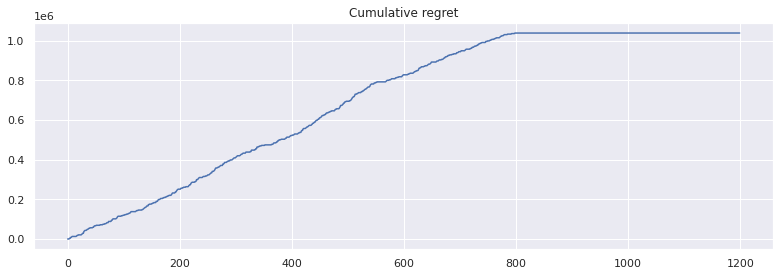

In [25]:
fig, ax = plt.subplots(figsize=(11, 4), nrows=1, ncols=1)

t = np.arange(T)

mean_regrets = np.mean(regrets, axis=0)
std_regrets = np.std(regrets, axis=0) / np.sqrt(regrets.shape[0])
ax.plot(t, mean_regrets)
ax.fill_between(t, mean_regrets - 2*std_regrets, mean_regrets + 2*std_regrets, alpha=0.15)
    
ax.set_title('Cumulative regret')

plt.tight_layout()
plt.show()

fig.savefig('neural_ucb_linear.pdf')

Text(0.5, 1.0, 'reward')

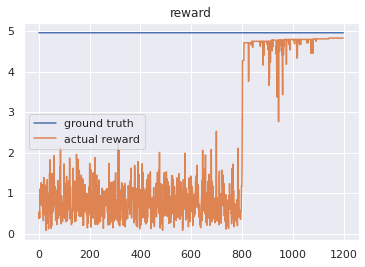

In [26]:
plt.plot([hwithoutconstraints(action)/(np.sqrt(args.card))**3]*T)
plt.plot(model.rewards_list)
plt.legend(['ground truth','actual reward'])
plt.title('reward')

Text(0.5, 1.0, 'infeasibility')

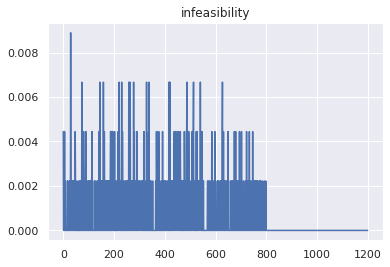

In [27]:
plt.plot(model.feasi)
plt.title('infeasibility')

Text(0.5, 1.0, 'reward')

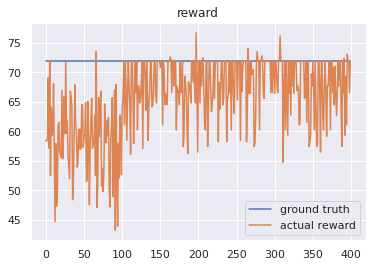

In [207]:
plt.plot([hwithoutconstraints(action)/(np.sqrt(args.card))]*T)
plt.plot(model.rewards_list)
plt.legend(['ground truth','actual reward'])
plt.title('reward')

Text(0.5, 1.0, 'infeasibility')

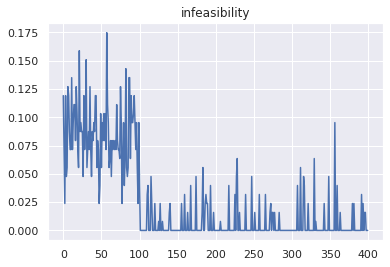

In [208]:
plt.plot(model.feasi)
plt.title('infeasibility')

In [209]:
hwithoutconstraints(action)/(np.sqrt(args.card))

71.87235975985492